In [1]:
write_images = False


wirte_output_txt = False 
# Specify everytime Simulation is called 
# WARNING --> Set to False when running more then 10 simulations 
#            (otherwise it will be super slow and might crash)

In [2]:
import numpy as np

In [3]:
from emukit.core import ContinuousParameter, ParameterSpace
from emukit.core.initial_designs import RandomDesign

import GPy
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper
from emukit.sensitivity.monte_carlo import MonteCarloSensitivity

import matplotlib.pyplot as plt
import mlai.plot as plot

In [4]:
%run Missile_utils.ipynb

In [5]:
simulation_output = 'range' 
# We divide by 1000 to avoid dealing with too large numbers

In [6]:
run_grid_simulation = True # If true takes much longer and does 3D plots and so on for MODEL with 2 FEATS


We consider missiles with only 1 stage

In [7]:

basic_param_spaces = {
    'payload':  [10, 2410],
    'missilediam':  [0.1, 9.9],
    'rvdiam':  [0.1, 9.9],
    'estrange': [100, 4900], 
    'fuelmass': [500, 6000], # [500, 6000], 
    'drymass':  [1000, 3000],
    'Isp0':  [100, 800],# [100, 800],
    'thrust0':  [10000, 69000],
}

In [8]:
from sklearn.metrics import mean_squared_error
import math

def compute_rmse(y_actual, y_predicted):
    MSE = mean_squared_error(y_actual, y_predicted)
    RMSE = math.sqrt(MSE)
 
    return RMSE

def evaluate_prediction(y_actual, y_predicted):
    return compute_rmse(y_actual, y_predicted)
    

# 1. Two params

In [9]:
m2_param_1 = 'fuelmass'
m2_domain_param_1 = basic_param_spaces[m2_param_1] 
m2_param_2 = 'Isp0'
m2_domain_param_2 = basic_param_spaces[m2_param_2] 

m2_space = ParameterSpace(
          [ContinuousParameter(m2_param_1, *m2_domain_param_1), 
           ContinuousParameter(m2_param_2, *m2_domain_param_2),
          ])

custom_param_names = [m2_param_1, m2_param_2]

In [10]:
def run_missile_sim(custom_params):
    """
    Recives in input an array of custom parameters.
    Each row represents a set of different parameters
    Each column is a different parameter (#cols = len(custom_param_names))
    """
    default_params_IRAQ = {
        'payload':500,
        'missilediam':0.88,
        'rvdiam':0,
        'estrange':600,
        'numstages':1,
        'fuelmass':[0,5600],
        'drymass':[0,1200],
        'Isp0':[0,226],
        'thrust0':[0,9177.4]
    }
    
    
    y = np.zeros((custom_params.shape[0], 1))
    for i in range(custom_params.shape[0]):
        params_to_use = default_params_IRAQ
        # Overwrite default param variables
        for j in range(custom_params.shape[1]):
            param_name = custom_param_names[j]
            if param_name in ['fuelmass', 'drymass', 'Isp0', 'thrust0']:
                params_to_use[param_name][1] = custom_params[i,j]
            else:
                params_to_use[param_name] = custom_params[i, j]
                
            if j==0:
                print('\nNew simulation \n')
            str_to_print = param_name + ': ' + str(custom_params[i,j])
            print(str_to_print)
                
        # Run simulation
        output_path = 'results/results_' + str(i) + '.txt'
        sim_output = run_one_sim(
            numstages=params_to_use["numstages"], 
            fuelmass=params_to_use["fuelmass"], 
            drymass=params_to_use["drymass"], 
            thrust0=params_to_use["thrust0"], 
            Isp0=params_to_use["Isp0"], 
            payload=params_to_use["payload"],  
            missilediam=params_to_use["missilediam"],  
            rvdiam=params_to_use["rvdiam"], 
            est_range=params_to_use["estrange"], 
            output_path=output_path, 
            simulation_output=simulation_output,
        )
        
        y[i, 0] = sim_output
    return y


def neg_run_missile_sim(custom_params):
    return -run_missile_sim(custom_params)
    
    

## 1. Experimental design

### Use model-free experimental design to start
 (RandomDesign or Latin Design)


New simulation 

fuelmass: 2461.699830729682
Isp0: 486.9259736726181


Stage 1 burnout
Velocity (km/s):  3.2928421666750873
Angle (deg h):  43.654711759668814
Range (km):  81.70654746630755
Time (sec):  130.59999999999687
Final results: 
Range (km):  1443.036540282888
Apogee (km):  445.40587370665315
Time to target (sec):  747.3000000001014




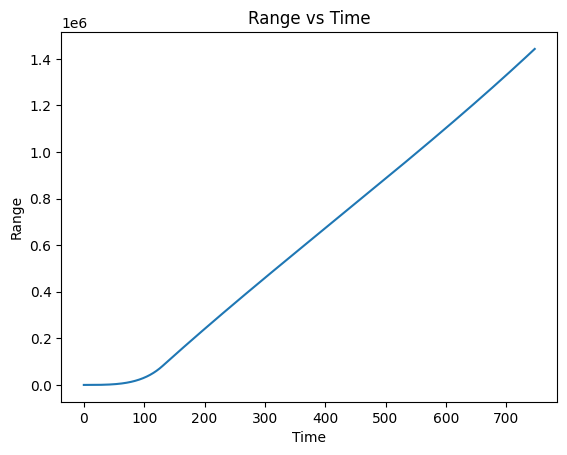

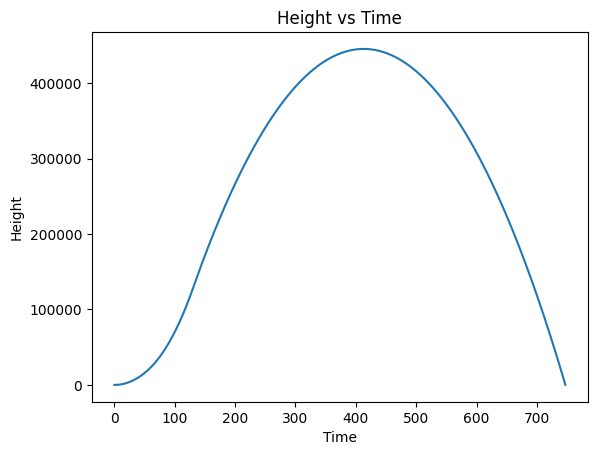

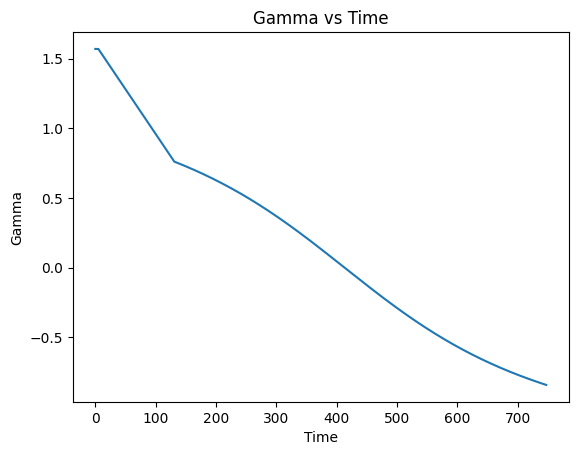

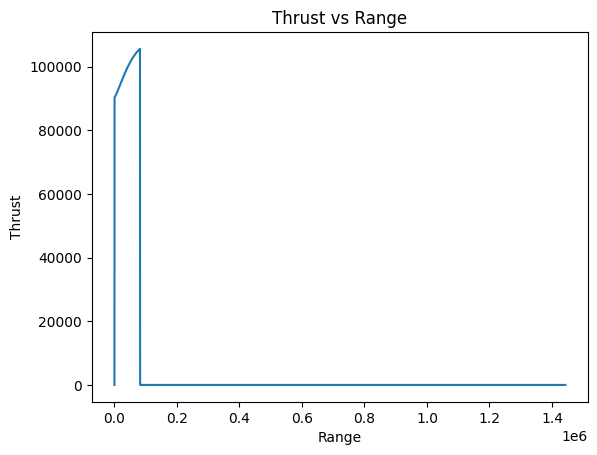

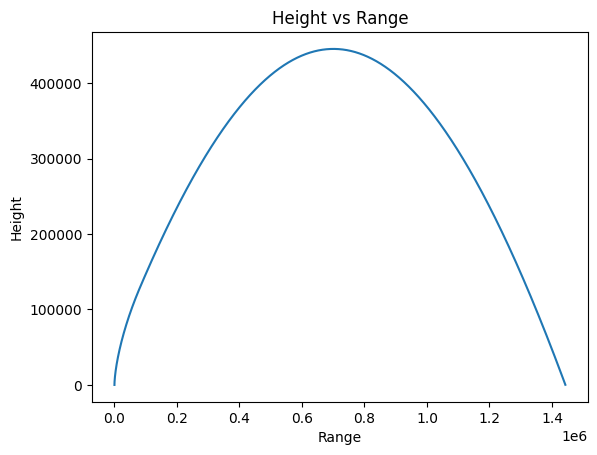

Data written to 'results/results_0.txt'

New simulation 

fuelmass: 920.1477703768564
Isp0: 599.8626891636919


Stage 1 burnout
Velocity (km/s):  1.8475465441910104
Angle (deg h):  43.666929694041904
Range (km):  23.859429394146524
Time (sec):  60.200000000000585
Final results: 
Range (km):  422.7984243339626
Apogee (km):  128.53208806192185
Time to target (sec):  365.4000000000146




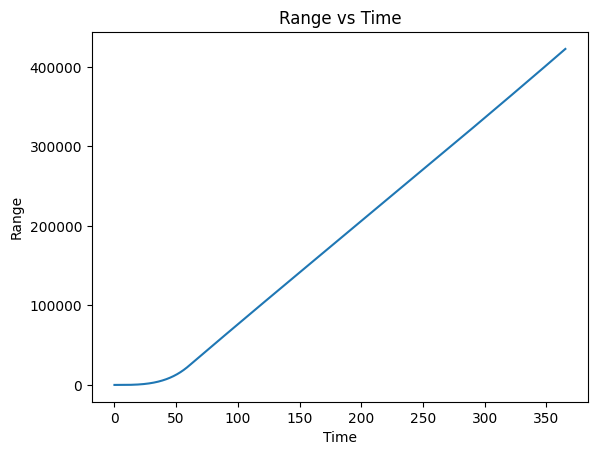

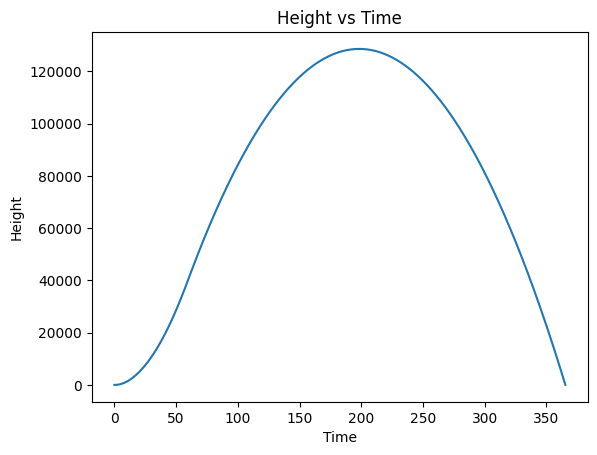

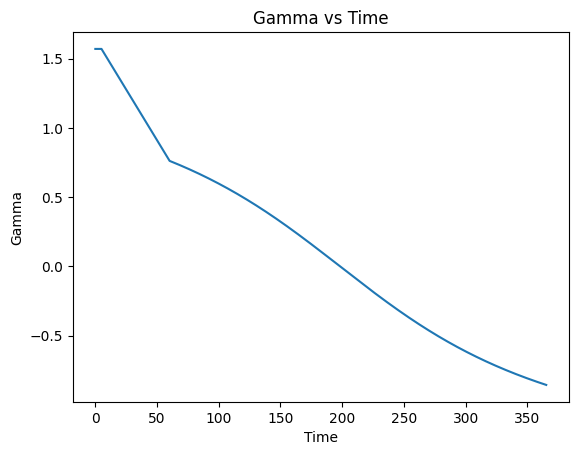

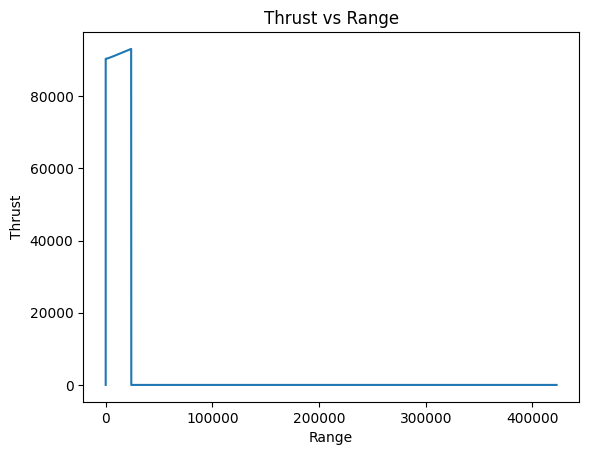

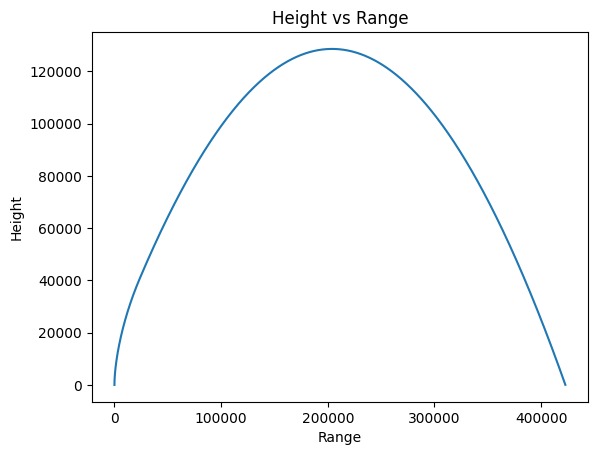

Data written to 'results/results_1.txt'

New simulation 

fuelmass: 5672.14884132695
Isp0: 167.5983593012405


Stage 1 burnout
Velocity (km/s):  1.4417597535653883
Angle (deg h):  43.66386706640104
Range (km):  23.8802344333796
Time (sec):  103.59999999999839
Final results: 
Range (km):  272.7963038431324
Apogee (km):  87.67103398367681
Time to target (sec):  345.7000000000101




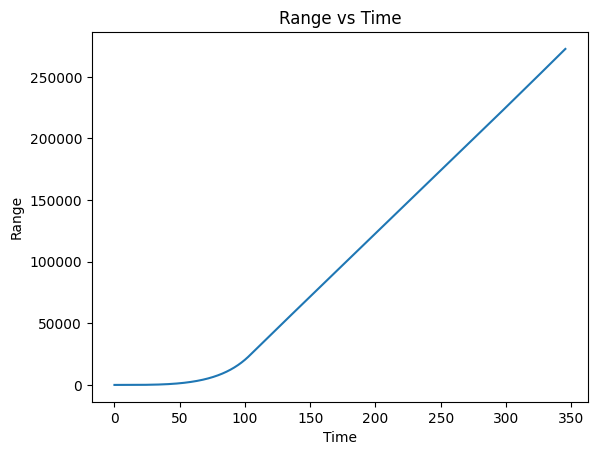

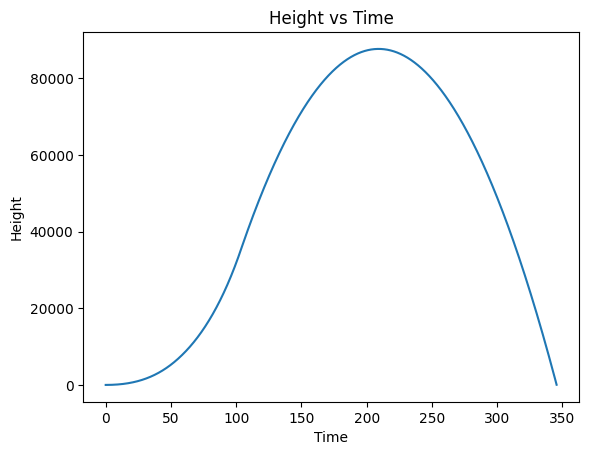

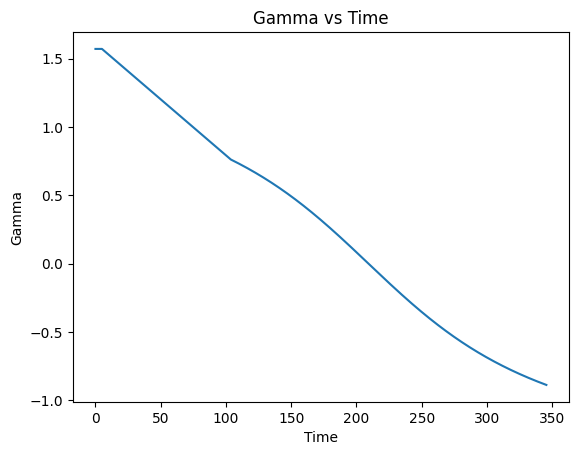

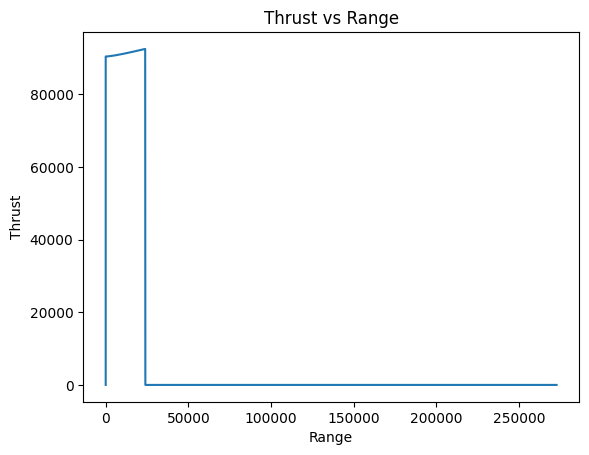

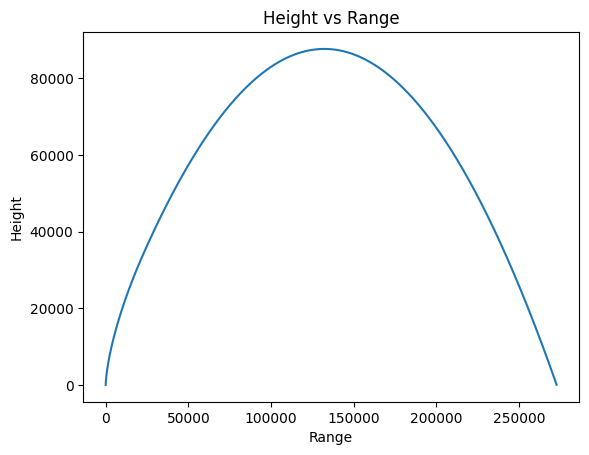

Data written to 'results/results_2.txt'

New simulation 

fuelmass: 1289.4787352316134
Isp0: 666.2904956492962


Stage 1 burnout
Velocity (km/s):  2.846157313086886
Angle (deg h):  43.660083041406125
Range (km):  55.14622505917165
Time (sec):  93.59999999999896
Final results: 
Range (km):  1039.241717666173
Apogee (km):  315.47440889796735
Time to target (sec):  598.4000000000675




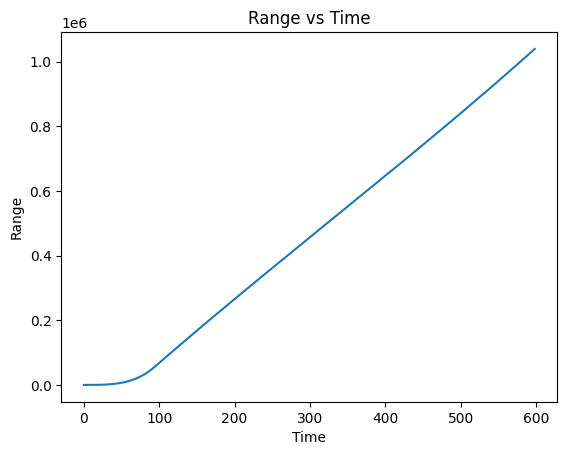

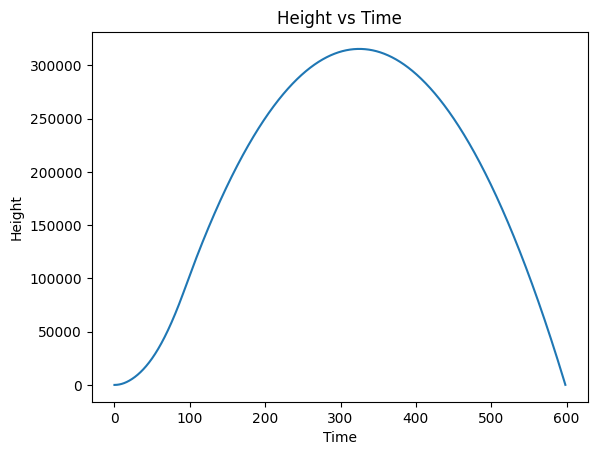

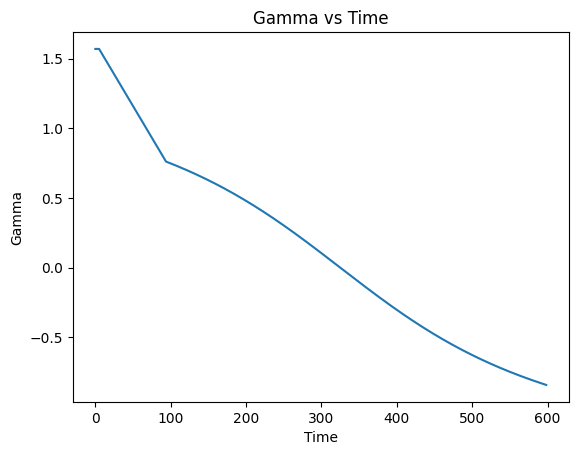

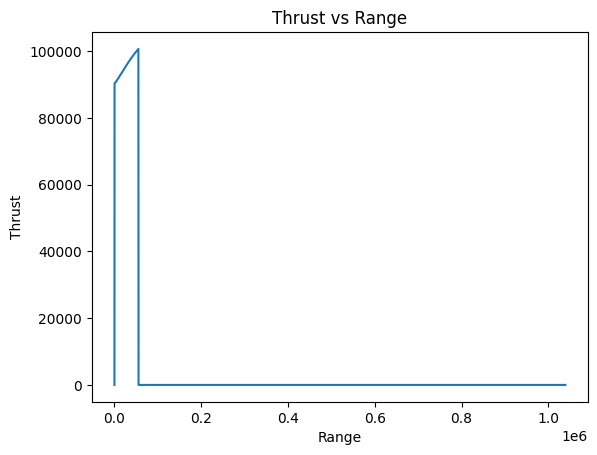

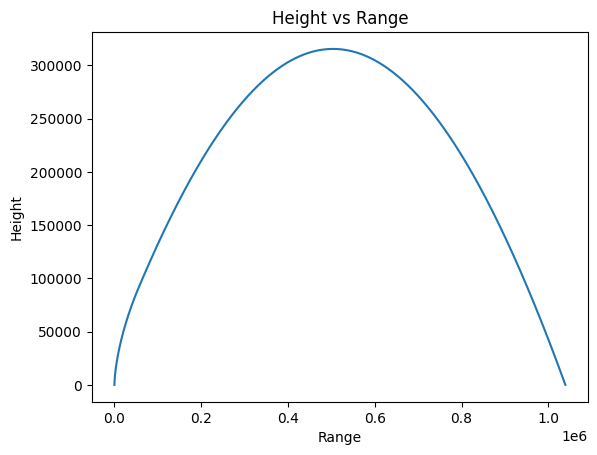

Data written to 'results/results_3.txt'

New simulation 

fuelmass: 5884.749310520711
Isp0: 614.8107619645466


Stage 1 burnout
Velocity (km/s):  6.840928406755898
Angle (deg h):  43.65348191761386
Range (km):  400.33202594915537
Time (sec):  394.30000000002116
Final results: 
Range (km):  8896.112873729066
Apogee (km):  3662.845779804255
Time to target (sec):  3364.1999999980358




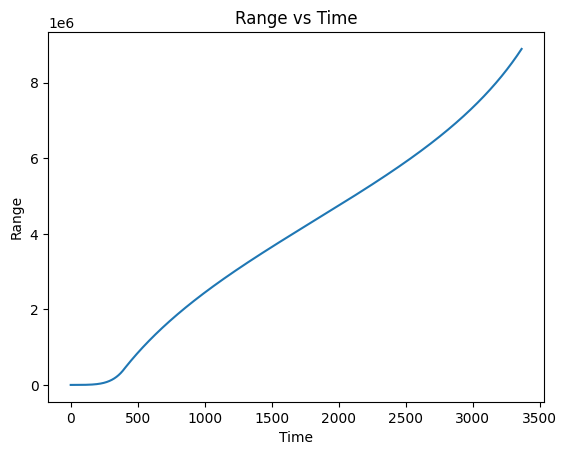

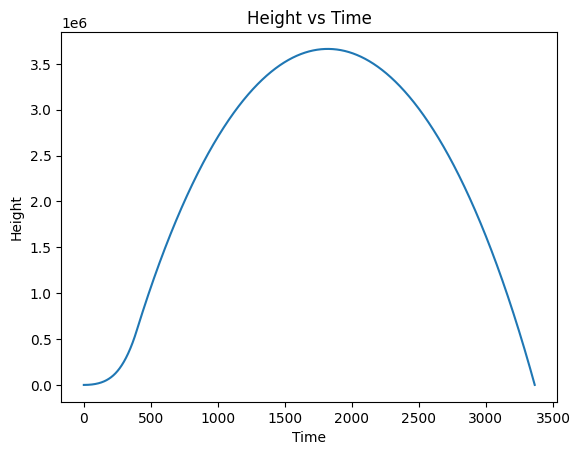

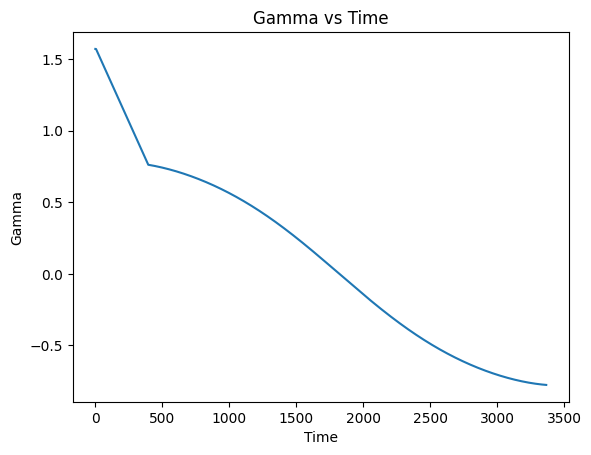

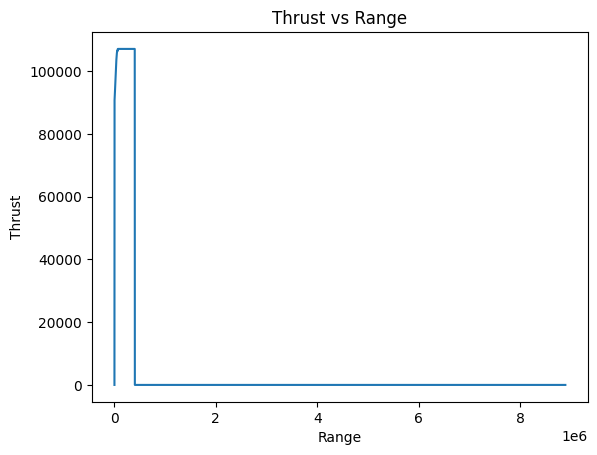

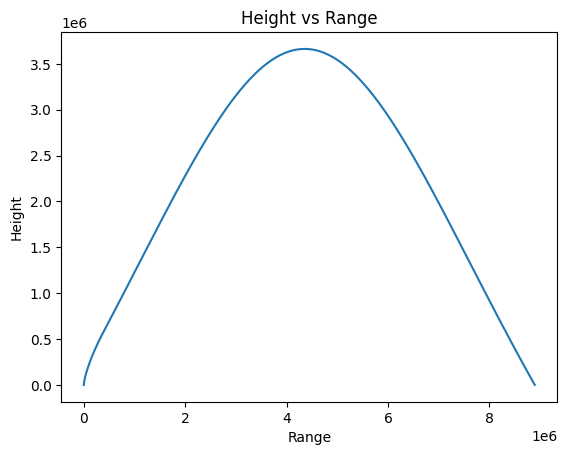

Data written to 'results/results_4.txt'

New simulation 

fuelmass: 984.2424643743145
Isp0: 562.9484052008906


Stage 1 burnout
Velocity (km/s):  1.8239142293971027
Angle (deg h):  43.69201511792158
Range (km):  23.533022260837498
Time (sec):  60.40000000000059
Final results: 
Range (km):  412.37779861564456
Apogee (km):  125.66449326051323
Time to target (sec):  361.70000000001374




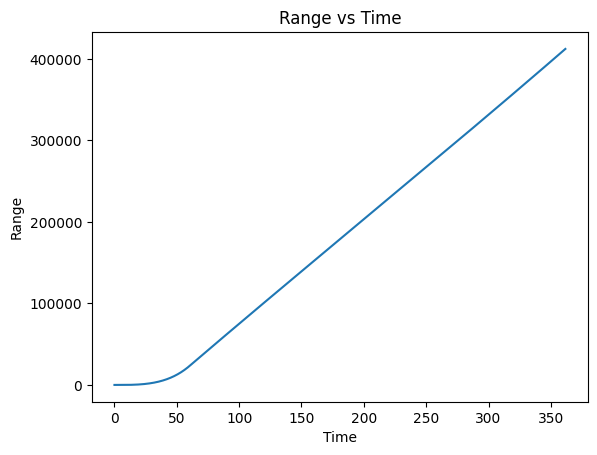

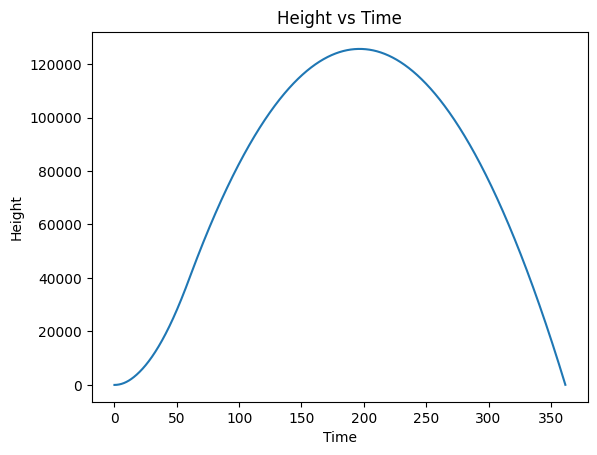

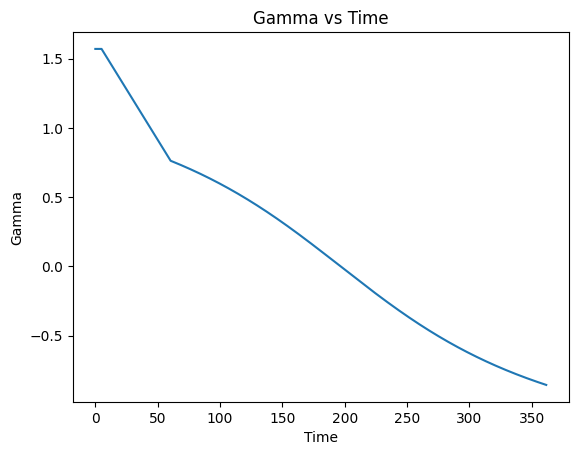

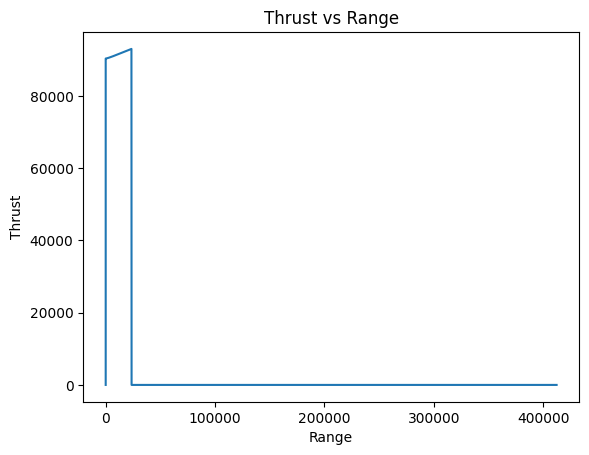

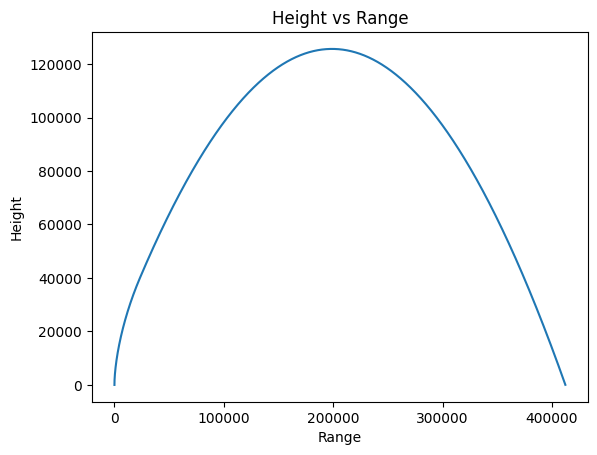

Data written to 'results/results_5.txt'


In [11]:
wirte_output_txt = True


# from emukit.core.initial_designs.latin_design import LatinDesign
# design = LatinDesign(parameter_space) 

m2_design = RandomDesign(m2_space)
m2_x = m2_design.get_samples(3*2)
m2_y = neg_run_missile_sim(m2_x)

In [12]:
# Build model
m2_var_kernel = (100)**2 
m2_lengthscale = 100 # 100 # 1
m2_var_noise = 1e-5 # small value

#kern = GPy.kern.RBF(input_dim=2, lengthscale=lengthscale, variance =var_kernel)  # , lengthscale=0.08, variance=20
# kern = GPy.kern.Matern32(input_dim=1)
# kern = GPy.kern.Linear(input_dim=1)

constrain_lengthscale = True

m2_rbf_kern = GPy.kern.RBF(input_dim=2, lengthscale=m2_lengthscale)
if constrain_lengthscale:
    m2_rbf_kern.lengthscale.constrain_bounded(m2_lengthscale, m2_lengthscale*1e12)

# m2_kern = m2_rbf_kern + \
#     GPy.kern.Linear(input_dim=2)
m2_kern = (GPy.kern.RBF(input_dim=2, lengthscale=500) * \
           GPy.kern.RBF(input_dim=2, lengthscale=100)) * \
    GPy.kern.Linear(input_dim=2)
# m2_kern = m2_rbf_kern

m2_model_gpy = GPRegression(m2_x,m2_y, kernel=m2_kern)
m2_model_gpy.kern.variance =  m2_var_kernel 
m2_model_gpy.likelihood.variance.fix(m2_var_noise)  

display(m2_model_gpy)




reconstraining parameters rbf.lengthscale


In [13]:
# m2_model_gpy_opt = m2_model_gpy
# m2_model_gpy_opt.optimize()
# m2_model_gpy_opt.plot()

In [14]:
m2_model_emukit = GPyModelWrapper(m2_model_gpy)
m2_model_emukit.optimize()

In [15]:
display(m2_model_gpy)

In [16]:
# Create data for plot
wirte_output_txt = False
nr_points_plot = 101
m2_param_1_x_plot = np.linspace(m2_space.parameters[0].min, m2_space.parameters[0].max, nr_points_plot)[:, None]
m2_param_2_x_plot = np.linspace(m2_space.parameters[1].min, m2_space.parameters[1].max, nr_points_plot)[:, None]
m2_x_plot_mesh, m2_y_plot_mesh = np.meshgrid(m2_param_1_x_plot, m2_param_2_x_plot)
m2_x_plot = np.array([m2_x_plot_mesh, m2_y_plot_mesh]).T.reshape(-1,2)


# TEMP read data from txt
# np.savetxt('test1.txt', a, fmt='%f')
# m2_y_plot = np.loadtxt('m2_y_plot_neg.txt', dtype=float)[:,None]

if run_grid_simulation:
    m2_y_plot = neg_run_missile_sim(m2_x_plot) # TAKES LONG TIME    
    m2_Z = m2_y_plot.reshape(m2_x_plot_mesh.shape)





New simulation 

fuelmass: 500.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.20141678595212545
Angle (deg h):  48.42747458604135
Range (km):  0.039225635558525145
Time (sec):  5.499999999999997
Final results: 
Range (km):  4.568720831271844
Apogee (km):  1.6703525359545364
Time to target (sec):  39.40000000000029



New simulation 

fuelmass: 500.0
Isp0: 107.0


Stage 1 burnout
Velocity (km/s):  0.21626480689820085
Angle (deg h):  45.10778788311837
Range (km):  0.0741876762780693
Time (sec):  5.899999999999996
Final results: 
Range (km):  5.3689349721459765
Apogee (km):  1.7783658154309772
Time to target (sec):  40.60000000000031



New simulation 

fuelmass: 500.0
Isp0: 114.0


Stage 1 burnout
Velocity (km/s):  0.22653704863045568
Angle (deg h):  44.06837815156451
Range (km):  0.094615557977128
Time (sec):  6.199999999999995
Final results: 
Range (km):  5.937694439446193
Apogee (km):  1.9048834231711183
Time to target (sec):  42.10000000000033



New simulation 

fuelmass: 500.

Final results: 
Range (km):  40.706846109864
Apogee (km):  12.743283248549096
Time to target (sec):  109.99999999999802



New simulation 

fuelmass: 500.0
Isp0: 331.0


Stage 1 burnout
Velocity (km/s):  0.5917299767912773
Angle (deg h):  43.701192520585515
Range (km):  2.2432236958730503
Time (sec):  18.09999999999999
Final results: 
Range (km):  42.40784650515263
Apogee (km):  13.249700836936801
Time to target (sec):  112.1999999999979



New simulation 

fuelmass: 500.0
Isp0: 338.0


Stage 1 burnout
Velocity (km/s):  0.5999298594099421
Angle (deg h):  43.7019464349671
Range (km):  2.3085709287850933
Time (sec):  18.399999999999995
Final results: 
Range (km):  43.632790735672295
Apogee (km):  13.640675072209964
Time to target (sec):  113.8999999999978



New simulation 

fuelmass: 500.0
Isp0: 345.0


Stage 1 burnout
Velocity (km/s):  0.6116562009769324
Angle (deg h):  43.907918215332444
Range (km):  2.418961179263114
Time (sec):  18.8
Final results: 
Range (km):  45.36822141792553
Ap

Final results: 
Range (km):  108.18906624339466
Apogee (km):  33.72939479889938
Time to target (sec):  180.79999999999401



New simulation 

fuelmass: 500.0
Isp0: 555.0


Stage 1 burnout
Velocity (km/s):  0.9520695865769746
Angle (deg h):  43.677327887074924
Range (km):  6.480011926587277
Time (sec):  30.300000000000164
Final results: 
Range (km):  111.14667405561293
Apogee (km):  34.59884329163989
Time to target (sec):  183.19999999999388



New simulation 

fuelmass: 500.0
Isp0: 562.0


Stage 1 burnout
Velocity (km/s):  0.9610027596498
Angle (deg h):  43.68462644131812
Range (km):  6.590941419729752
Time (sec):  30.60000000000017
Final results: 
Range (km):  113.25125515209041
Apogee (km):  35.27193490569514
Time to target (sec):  184.99999999999378



New simulation 

fuelmass: 500.0
Isp0: 569.0


Stage 1 burnout
Velocity (km/s):  0.9737029227292874
Angle (deg h):  43.65092236647102
Range (km):  6.773108132427766
Time (sec):  31.000000000000174
Final results: 
Range (km):  116.2876

Stage 1 burnout
Velocity (km/s):  1.3394910525619148
Angle (deg h):  43.72066487683481
Range (km):  12.503635400989925
Time (sec):  41.70000000000032
Final results: 
Range (km):  219.96225971961462
Apogee (km):  67.60724931640674
Time to target (sec):  258.4999999999903



New simulation 

fuelmass: 500.0
Isp0: 772.0


Stage 1 burnout
Velocity (km/s):  1.354591746604414
Angle (deg h):  43.69668556353024
Range (km):  12.763068857623098
Time (sec):  42.10000000000033
Final results: 
Range (km):  225.01239447962
Apogee (km):  69.04328302159149
Time to target (sec):  261.39999999999094



New simulation 

fuelmass: 500.0
Isp0: 779.0


Stage 1 burnout
Velocity (km/s):  1.3697788153270756
Angle (deg h):  43.67319661720521
Range (km):  13.025659891138934
Time (sec):  42.500000000000334
Final results: 
Range (km):  230.03235925903803
Apogee (km):  70.50216269862479
Time to target (sec):  264.1999999999916



New simulation 

fuelmass: 500.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  1.385

Final results: 
Range (km):  26.64918536453676
Apogee (km):  8.379570294761129
Time to target (sec):  89.09999999999921



New simulation 

fuelmass: 555.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  0.4820907378208549
Angle (deg h):  43.718594031284155
Range (km):  1.3559177763428627
Time (sec):  14.499999999999966
Final results: 
Range (km):  27.936508473836287
Apogee (km):  8.728859113081317
Time to target (sec):  90.89999999999911



New simulation 

fuelmass: 555.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s):  0.4964712775620271
Angle (deg h):  43.742634922036366
Range (km):  1.4729594921115579
Time (sec):  14.999999999999964
Final results: 
Range (km):  29.692040801450037
Apogee (km):  9.272552119106242
Time to target (sec):  93.79999999999895



New simulation 

fuelmass: 555.0
Isp0: 254.0


Stage 1 burnout
Velocity (km/s):  0.507408005626745
Angle (deg h):  43.84180506242319
Range (km):  1.5568724106056087
Time (sec):  15.399999999999963
Final results: 
Range (km):  31.04

Final results: 
Range (km):  90.73879455642194
Apogee (km):  28.336965098755055
Time to target (sec):  165.69999999999487



New simulation 

fuelmass: 555.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s):  0.8719265472059077
Angle (deg h):  43.72588194491502
Range (km):  5.456746360057073
Time (sec):  28.100000000000133
Final results: 
Range (km):  93.2363471989568
Apogee (km):  29.156060169498105
Time to target (sec):  168.09999999999474



New simulation 

fuelmass: 555.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  0.883773755432559
Angle (deg h):  43.77040215143975
Range (km):  5.610635333186996
Time (sec):  28.50000000000014
Final results: 
Range (km):  95.77384553695973
Apogee (km):  29.989437626549883
Time to target (sec):  170.4999999999946



New simulation 

fuelmass: 555.0
Isp0: 478.0


Stage 1 burnout
Velocity (km/s):  0.8956843970567758
Angle (deg h):  43.66414423427804
Range (km):  5.76675351952659
Time (sec):  28.900000000000144
Final results: 
Range (km):  98.4568486

Final results: 
Range (km):  193.05605771823505
Apogee (km):  59.538191021582534
Time to target (sec):  242.4999999999905



New simulation 

fuelmass: 555.0
Isp0: 667.0


Stage 1 burnout
Velocity (km/s):  1.271981497149362
Angle (deg h):  43.66780290732589
Range (km):  11.505381619069938
Time (sec):  40.400000000000304
Final results: 
Range (km):  198.70812201100003
Apogee (km):  61.20987907617068
Time to target (sec):  245.9999999999903



New simulation 

fuelmass: 555.0
Isp0: 674.0


Stage 1 burnout
Velocity (km/s):  1.2861946474900348
Angle (deg h):  43.69784412539168
Range (km):  11.736397848126794
Time (sec):  40.80000000000031
Final results: 
Range (km):  203.09758827590252
Apogee (km):  62.594936979337305
Time to target (sec):  248.79999999999015



New simulation 

fuelmass: 555.0
Isp0: 681.0


Stage 1 burnout
Velocity (km/s):  1.3005155392341785
Angle (deg h):  43.72718552952038
Range (km):  11.970168562477085
Time (sec):  41.200000000000315
Final results: 
Range (km):  207.

Final results: 
Range (km):  23.25910773533965
Apogee (km):  7.285080887830755
Time to target (sec):  83.09999999999955



New simulation 

fuelmass: 610.0
Isp0: 205.0


Stage 1 burnout
Velocity (km/s):  0.4547776151574452
Angle (deg h):  43.70021473275814
Range (km):  1.1850139578927235
Time (sec):  13.699999999999969
Final results: 
Range (km):  24.826480108469077
Apogee (km):  7.733443330040654
Time to target (sec):  85.6999999999994



New simulation 

fuelmass: 610.0
Isp0: 212.0


Stage 1 burnout
Velocity (km/s):  0.4652058664857189
Angle (deg h):  44.028412837584646
Range (km):  1.2554543688134172
Time (sec):  14.099999999999968
Final results: 
Range (km):  26.00583276448282
Apogee (km):  8.18291288880946
Time to target (sec):  88.19999999999926



New simulation 

fuelmass: 610.0
Isp0: 219.0


Stage 1 burnout
Velocity (km/s):  0.4791069503386451
Angle (deg h):  43.83966893720008
Range (km):  1.362179073752403
Time (sec):  14.599999999999966
Final results: 
Range (km):  27.621250


New simulation 

fuelmass: 610.0
Isp0: 450.0


Stage 1 burnout
Velocity (km/s):  0.9133672001071823
Angle (deg h):  43.67021622902122
Range (km):  6.075622578809642
Time (sec):  29.90000000000016
Final results: 
Range (km):  102.5368215598321
Apogee (km):  32.03635002248621
Time to target (sec):  176.69999999999425



New simulation 

fuelmass: 610.0
Isp0: 457.0


Stage 1 burnout
Velocity (km/s):  0.9286858170928016
Angle (deg h):  43.746016555559976
Range (km):  6.293321158833859
Time (sec):  30.400000000000166
Final results: 
Range (km):  105.96328459706305
Apogee (km):  33.16240383573141
Time to target (sec):  179.79999999999407



New simulation 

fuelmass: 610.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s):  0.944098201656541
Angle (deg h):  43.68192423790304
Range (km):  6.514972090280809
Time (sec):  30.900000000000173
Final results: 
Range (km):  109.5589035663471
Apogee (km):  34.20283345167765
Time to target (sec):  182.6999999999939



New simulation 

fuelmass: 610.0
Isp0

Final results: 
Range (km):  206.2764283582927
Apogee (km):  63.56475341763923
Time to target (sec):  251.19999999999



New simulation 

fuelmass: 610.0
Isp0: 632.0


Stage 1 burnout
Velocity (km/s):  1.3093476204501318
Angle (deg h):  43.66024943772102
Range (km):  12.23154955184087
Time (sec):  42.00000000000033
Final results: 
Range (km):  210.73824801072365
Apogee (km):  64.89228402591525
Time to target (sec):  253.89999999998986



New simulation 

fuelmass: 610.0
Isp0: 639.0


Stage 1 burnout
Velocity (km/s):  1.3276904795868538
Angle (deg h):  43.711284859750464
Range (km):  12.550260948233166
Time (sec):  42.500000000000334
Final results: 
Range (km):  216.63723832097403
Apogee (km):  66.7313256384406
Time to target (sec):  257.5999999999901



New simulation 

fuelmass: 610.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  1.3461687579986894
Angle (deg h):  43.668168827514165
Range (km):  12.873796864472471
Time (sec):  43.00000000000034
Final results: 
Range (km):  222.67840

Final results: 
Range (km):  29.537381713225237
Apogee (km):  9.280170929368413
Time to target (sec):  94.09999999999893



New simulation 

fuelmass: 665.0
Isp0: 219.0


Stage 1 burnout
Velocity (km/s):  0.5080668760222844
Angle (deg h):  43.86473858298336
Range (km):  1.6137561891123942
Time (sec):  15.899999999999961
Final results: 
Range (km):  31.234965352659053
Apogee (km):  9.817156131647408
Time to target (sec):  96.89999999999877



New simulation 

fuelmass: 665.0
Isp0: 226.0


Stage 1 burnout
Velocity (km/s):  0.5215479006840178
Angle (deg h):  43.88320081661751
Range (km):  1.724264044990312
Time (sec):  16.399999999999967
Final results: 
Range (km):  32.944720844677015
Apogee (km):  10.369791452415745
Time to target (sec):  99.59999999999862



New simulation 

fuelmass: 665.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  0.5350954131527107
Angle (deg h):  43.90016793545752
Range (km):  1.8379024733922555
Time (sec):  16.899999999999974
Final results: 
Range (km):  34.70

Final results: 
Range (km):  98.0027220839505
Apogee (km):  30.703477556188517
Time to target (sec):  173.19999999999445



New simulation 

fuelmass: 665.0
Isp0: 415.0


Stage 1 burnout
Velocity (km/s):  0.9072555566612224
Angle (deg h):  43.73822110194397
Range (km):  6.065439928781476
Time (sec):  30.10000000000016
Final results: 
Range (km):  101.25582472550921
Apogee (km):  31.7312016685191
Time to target (sec):  176.09999999999428



New simulation 

fuelmass: 665.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  0.9220819156847854
Angle (deg h):  43.749446760679945
Range (km):  6.27061980347357
Time (sec):  30.60000000000017
Final results: 
Range (km):  104.6373897914317
Apogee (km):  32.78043815916367
Time to target (sec):  179.0999999999941



New simulation 

fuelmass: 665.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  0.936997744597797
Angle (deg h):  43.76024542162232
Range (km):  6.47936502139367
Time (sec):  31.100000000000176
Final results: 
Range (km):  108.015579444

Stage 1 burnout
Velocity (km/s):  1.3545710199523948
Angle (deg h):  43.70100869388424
Range (km):  13.135446472445874
Time (sec):  43.80000000000035
Final results: 
Range (km):  225.7437955818818
Apogee (km):  69.49413769609178
Time to target (sec):  263.4999999999914



New simulation 

fuelmass: 665.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  1.3727048144156142
Angle (deg h):  43.7089271443965
Range (km):  13.450091112382527
Time (sec):  44.30000000000036
Final results: 
Range (km):  231.74714725725883
Apogee (km):  71.31916395786877
Time to target (sec):  266.9999999999922



New simulation 

fuelmass: 665.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  1.3909422426468299
Angle (deg h):  43.716645926219456
Range (km):  13.769212940864906
Time (sec):  44.80000000000037
Final results: 
Range (km):  237.94398773334615
Apogee (km):  73.1780157012283
Time to target (sec):  270.59999999999303



New simulation 

fuelmass: 665.0
Isp0: 625.0


Stage 1 burnout
Velocity (km/s):  1.40

Final results: 
Range (km):  11.17419815177229
Apogee (km):  3.5111929369062196
Time to target (sec):  57.70000000000055



New simulation 

fuelmass: 720.0
Isp0: 121.0


Stage 1 burnout
Velocity (km/s):  0.32370145543704937
Angle (deg h):  44.48380053023416
Range (km):  0.45250475234352217
Time (sec):  9.499999999999984
Final results: 
Range (km):  12.338041715891968
Apogee (km):  3.9235622792389724
Time to target (sec):  61.0000000000006



New simulation 

fuelmass: 720.0
Isp0: 128.0


Stage 1 burnout
Velocity (km/s):  0.342938114149306
Angle (deg h):  43.918317127366635
Range (km):  0.5414392658353575
Time (sec):  10.099999999999982
Final results: 
Range (km):  13.920346411227634
Apogee (km):  4.34351323145326
Time to target (sec):  64.30000000000062



New simulation 

fuelmass: 720.0
Isp0: 135.0


Stage 1 burnout
Velocity (km/s):  0.3576204080615904
Angle (deg h):  44.29373638494239
Range (km):  0.6098018793957869
Time (sec):  10.59999999999998
Final results: 
Range (km):  15.137

Final results: 
Range (km):  68.62846157630068
Apogee (km):  21.597701873778874
Time to target (sec):  144.89999999999606



New simulation 

fuelmass: 720.0
Isp0: 324.0


Stage 1 burnout
Velocity (km/s):  0.7612719265727165
Angle (deg h):  43.693852325175406
Range (km):  4.212302032455603
Time (sec):  25.400000000000095
Final results: 
Range (km):  71.16687977469137
Apogee (km):  22.369713387385683
Time to target (sec):  147.4999999999959



New simulation 

fuelmass: 720.0
Isp0: 331.0


Stage 1 burnout
Velocity (km/s):  0.7783681540997657
Angle (deg h):  43.74975141671404
Range (km):  4.428935549768535
Time (sec):  26.000000000000103
Final results: 
Range (km):  74.43505886728255
Apogee (km):  23.412539220230336
Time to target (sec):  150.9999999999957



New simulation 

fuelmass: 720.0
Isp0: 338.0


Stage 1 burnout
Velocity (km/s):  0.7919836226953908
Angle (deg h):  43.68810148545217
Range (km):  4.5934172327065586
Time (sec):  26.50000000000011
Final results: 
Range (km):  77.143

Stage 1 burnout
Velocity (km/s):  1.2134567166204326
Angle (deg h):  43.67963398172031
Range (km):  10.856299668642897
Time (sec):  40.3000000000003
Final results: 
Range (km):  181.48586154852842
Apogee (km):  56.24652696132712
Time to target (sec):  236.59999999999084



New simulation 

fuelmass: 720.0
Isp0: 520.0


Stage 1 burnout
Velocity (km/s):  1.2298724680027444
Angle (deg h):  43.742860036933706
Range (km):  11.121620476191449
Time (sec):  40.80000000000031
Final results: 
Range (km):  186.46951936962685
Apogee (km):  57.838520812708886
Time to target (sec):  240.09999999999064



New simulation 

fuelmass: 720.0
Isp0: 527.0


Stage 1 burnout
Velocity (km/s):  1.2506879849111463
Angle (deg h):  43.67670183012483
Range (km):  11.480807871457998
Time (sec):  41.40000000000032
Final results: 
Range (km):  192.80276514017666
Apogee (km):  59.64132526200608
Time to target (sec):  243.89999999999043



New simulation 

fuelmass: 720.0
Isp0: 534.0


Stage 1 burnout
Velocity (km/s): 

Final results: 
Range (km):  397.56675146655164
Apogee (km):  120.70617271219868
Time to target (sec):  351.60000000001145



New simulation 

fuelmass: 720.0
Isp0: 723.0


Stage 1 burnout
Velocity (km/s):  1.8191590882828377
Angle (deg h):  43.64953202103028
Range (km):  22.477758715678092
Time (sec):  56.80000000000054
Final results: 
Range (km):  408.2353942149079
Apogee (km):  123.67312985955155
Time to target (sec):  356.2000000000125



New simulation 

fuelmass: 720.0
Isp0: 730.0


Stage 1 burnout
Velocity (km/s):  1.837796355628398
Angle (deg h):  43.69318580315978
Range (km):  22.883909311674334
Time (sec):  57.300000000000544
Final results: 
Range (km):  416.67408384796295
Apogee (km):  126.36333750700996
Time to target (sec):  360.2000000000134



New simulation 

fuelmass: 720.0
Isp0: 737.0


Stage 1 burnout
Velocity (km/s):  1.8612281657173924
Angle (deg h):  43.64821301682873
Range (km):  23.427913718306712
Time (sec):  57.90000000000055
Final results: 
Range (km):  427.5

Final results: 
Range (km):  38.84440623076093
Apogee (km):  12.275350453781448
Time to target (sec):  108.89999999999809



New simulation 

fuelmass: 775.0
Isp0: 226.0


Stage 1 burnout
Velocity (km/s):  0.5808026975472507
Angle (deg h):  43.86066899696202
Range (km):  2.305389481529279
Time (sec):  19.100000000000005
Final results: 
Range (km):  41.165899147443774
Apogee (km):  12.996640802192815
Time to target (sec):  112.0999999999979



New simulation 

fuelmass: 775.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  0.5972225497614921
Angle (deg h):  43.82329713924148
Range (km):  2.460922632379442
Time (sec):  19.700000000000014
Final results: 
Range (km):  43.55778115255072
Apogee (km):  13.740595944748701
Time to target (sec):  115.29999999999772



New simulation 

fuelmass: 775.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  0.6135935994003985
Angle (deg h):  43.788863081176224
Range (km):  2.621129150239403
Time (sec):  20.300000000000022
Final results: 
Range (km):  46.0

Final results: 
Range (km):  155.39499456260705
Apogee (km):  48.34842609135332
Time to target (sec):  219.29999999999183



New simulation 

fuelmass: 775.0
Isp0: 457.0


Stage 1 burnout
Velocity (km/s):  1.14101396906024
Angle (deg h):  43.74313678460511
Range (km):  9.75051574754191
Time (sec):  38.60000000000028
Final results: 
Range (km):  160.71503403057392
Apogee (km):  50.082658103053
Time to target (sec):  223.2999999999916



New simulation 

fuelmass: 775.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s):  1.1603686120373826
Angle (deg h):  43.729510356301766
Range (km):  10.068575455993269
Time (sec):  39.20000000000029
Final results: 
Range (km):  166.16117503100998
Apogee (km):  51.73457870938581
Time to target (sec):  226.9999999999914



New simulation 

fuelmass: 775.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  1.1798685886948745
Angle (deg h):  43.71635298162771
Range (km):  10.392344827026651
Time (sec):  39.800000000000296
Final results: 
Range (km):  171.8010793

Time (sec):  54.600000000000506
Final results: 
Range (km):  360.2769156968657
Apogee (km):  109.65210839091625
Time to target (sec):  334.90000000000765



New simulation 

fuelmass: 775.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  1.731800346428995
Angle (deg h):  43.66899086478899
Range (km):  20.747382841861477
Time (sec):  55.200000000000514
Final results: 
Range (km):  369.91475513689795
Apogee (km):  112.49238010221654
Time to target (sec):  339.4000000000087



New simulation 

fuelmass: 775.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  1.75437965832292
Angle (deg h):  43.66073107643169
Range (km):  21.239356753980317
Time (sec):  55.80000000000052
Final results: 
Range (km):  379.6798379538026
Apogee (km):  115.37764554733114
Time to target (sec):  343.9000000000097



New simulation 

fuelmass: 775.0
Isp0: 667.0


Stage 1 burnout
Velocity (km/s):  1.7769952945846563
Angle (deg h):  43.652661780490384
Range (km):  21.737856995237895
Time (sec):  56.40000000000053
Fina

Stage 1 burnout
Velocity (km/s):  0.4122704226895643
Angle (deg h):  43.802716985945395
Range (km):  0.9646253256824283
Time (sec):  12.899999999999972
Final results: 
Range (km):  20.402992385130833
Apogee (km):  6.378248971327988
Time to target (sec):  78.29999999999983



New simulation 

fuelmass: 830.0
Isp0: 149.0


Stage 1 burnout
Velocity (km/s):  0.42759094939534403
Angle (deg h):  43.9687512584965
Range (km):  1.0673768937247374
Time (sec):  13.49999999999997
Final results: 
Range (km):  21.969301387850944
Apogee (km):  6.920109925041137
Time to target (sec):  81.49999999999964



New simulation 

fuelmass: 830.0
Isp0: 156.0


Stage 1 burnout
Velocity (km/s):  0.44284480384230723
Angle (deg h):  43.694419849995725
Range (km):  1.1741235066336857
Time (sec):  14.099999999999968
Final results: 
Range (km):  23.655632920568447
Apogee (km):  7.406456970832878
Time to target (sec):  84.39999999999948



New simulation 

fuelmass: 830.0
Isp0: 163.0


Stage 1 burnout
Velocity (km/s):

Final results: 
Range (km):  113.48325165915969
Apogee (km):  35.56176291216264
Time to target (sec):  187.59999999999363



New simulation 

fuelmass: 830.0
Isp0: 373.0


Stage 1 burnout
Velocity (km/s):  0.9794715312392497
Angle (deg h):  43.66478034659526
Range (km):  7.320428647697833
Time (sec):  33.80000000000021
Final results: 
Range (km):  118.57103099545579
Apogee (km):  37.12001755300235
Time to target (sec):  191.7999999999934



New simulation 

fuelmass: 830.0
Isp0: 380.0


Stage 1 burnout
Velocity (km/s):  0.9970013708372824
Angle (deg h):  43.716585788316706
Range (km):  7.578823879606012
Time (sec):  34.40000000000022
Final results: 
Range (km):  122.84376393292516
Apogee (km):  38.49767701557557
Time to target (sec):  195.39999999999318



New simulation 

fuelmass: 830.0
Isp0: 387.0


Stage 1 burnout
Velocity (km/s):  1.0146714462044621
Angle (deg h):  43.650974164739964
Range (km):  7.8421505851058315
Time (sec):  35.00000000000023
Final results: 
Range (km):  127.29

Final results: 
Range (km):  285.99978707681726
Apogee (km):  87.75404798185794
Time to target (sec):  298.6999999999994



New simulation 

fuelmass: 830.0
Isp0: 562.0


Stage 1 burnout
Velocity (km/s):  1.5488165505494649
Angle (deg h):  43.65309353578259
Range (km):  17.139667840730468
Time (sec):  50.90000000000045
Final results: 
Range (km):  295.9556245253318
Apogee (km):  90.52294740400255
Time to target (sec):  303.60000000000053



New simulation 

fuelmass: 830.0
Isp0: 569.0


Stage 1 burnout
Velocity (km/s):  1.570356218299134
Angle (deg h):  43.68611002286845
Range (km):  17.560024123274523
Time (sec):  51.50000000000046
Final results: 
Range (km):  304.21719905679845
Apogee (km):  93.0820970079746
Time to target (sec):  308.00000000000153



New simulation 

fuelmass: 830.0
Isp0: 576.0


Stage 1 burnout
Velocity (km/s):  1.5919416620024756
Angle (deg h):  43.71823956175488
Range (km):  17.98635075275642
Time (sec):  52.10000000000047
Final results: 
Range (km):  312.594988

Final results: 
Range (km):  567.9426835547721
Apogee (km):  171.63903823384504
Time to target (sec):  424.8000000000281



New simulation 

fuelmass: 830.0
Isp0: 744.0


Stage 1 burnout
Velocity (km/s):  2.1596310573765183
Angle (deg h):  43.698430798603766
Range (km):  31.23495326604797
Time (sec):  67.30000000000045
Final results: 
Range (km):  580.2564979468995
Apogee (km):  175.44939572455712
Time to target (sec):  429.80000000002923



New simulation 

fuelmass: 830.0
Isp0: 751.0


Stage 1 burnout
Velocity (km/s):  2.18708121639441
Angle (deg h):  43.64872404163461
Range (km):  31.980041078869768
Time (sec):  68.00000000000041
Final results: 
Range (km):  595.5380130827549
Apogee (km):  179.740672006283
Time to target (sec):  435.4000000000305



New simulation 

fuelmass: 830.0
Isp0: 758.0


Stage 1 burnout
Velocity (km/s):  2.2096364635378247
Angle (deg h):  43.67291319073429
Range (km):  32.5758519230416
Time (sec):  68.60000000000038
Final results: 
Range (km):  608.131106386

Stage 1 burnout
Velocity (km/s):  0.6191480790211721
Angle (deg h):  43.704653451979134
Range (km):  2.742418701135382
Time (sec):  21.100000000000033
Final results: 
Range (km):  47.032753712139936
Apogee (km):  14.833759277592794
Time to target (sec):  120.29999999999744



New simulation 

fuelmass: 885.0
Isp0: 226.0


Stage 1 burnout
Velocity (km/s):  0.6378769016485352
Angle (deg h):  43.84630160303196
Range (km):  2.938518306569421
Time (sec):  21.800000000000043
Final results: 
Range (km):  49.92095072460426
Apogee (km):  15.805803929512892
Time to target (sec):  124.19999999999722



New simulation 

fuelmass: 885.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  0.6565885215653074
Angle (deg h):  43.771810882788266
Range (km):  3.140895267337926
Time (sec):  22.500000000000053
Final results: 
Range (km):  52.972901970978285
Apogee (km):  16.727606171459822
Time to target (sec):  127.89999999999701



New simulation 

fuelmass: 885.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s

Final results: 
Range (km):  164.6629904797388
Apogee (km):  51.327409938502086
Time to target (sec):  226.7999999999914



New simulation 

fuelmass: 885.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  1.1760626124287104
Angle (deg h):  43.73992394840689
Range (km):  10.52026672408453
Time (sec):  40.70000000000031
Final results: 
Range (km):  171.0973829378762
Apogee (km):  53.35385993693298
Time to target (sec):  231.39999999999114



New simulation 

fuelmass: 885.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  1.1986183445297545
Angle (deg h):  43.706472086027176
Range (km):  10.906006897875248
Time (sec):  41.40000000000032
Final results: 
Range (km):  177.68888600480565
Apogee (km):  55.31209206077596
Time to target (sec):  235.6999999999909



New simulation 

fuelmass: 885.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  1.221506814186392
Angle (deg h):  43.67424939310974
Range (km):  11.299611750093908
Time (sec):  42.10000000000033
Final results: 
Range (km):  184.53689

Final results: 
Range (km):  419.91588537075774
Apogee (km):  127.77582674999385
Time to target (sec):  363.90000000001424



New simulation 

fuelmass: 885.0
Isp0: 625.0


Stage 1 burnout
Velocity (km/s):  1.8680513958881824
Angle (deg h):  43.68949161592241
Range (km):  24.203383038326375
Time (sec):  60.30000000000059
Final results: 
Range (km):  432.1028272148215
Apogee (km):  131.30985916082034
Time to target (sec):  369.20000000001545



New simulation 

fuelmass: 885.0
Isp0: 632.0


Stage 1 burnout
Velocity (km/s):  1.8941316795328813
Angle (deg h):  43.66840381061721
Range (km):  24.825646183326885
Time (sec):  61.0000000000006
Final results: 
Range (km):  444.3245057669711
Apogee (km):  134.90435838509646
Time to target (sec):  374.40000000001663



New simulation 

fuelmass: 885.0
Isp0: 639.0


Stage 1 burnout
Velocity (km/s):  1.9202559655608549
Angle (deg h):  43.6478190076421
Range (km):  25.456680279450545
Time (sec):  61.70000000000061
Final results: 
Range (km):  456.99

Final results: 
Range (km):  42.828368616026054
Apogee (km):  13.561850078240957
Time to target (sec):  115.09999999999773



New simulation 

fuelmass: 940.0
Isp0: 205.0


Stage 1 burnout
Velocity (km/s):  0.6091892338955582
Angle (deg h):  43.86624321938531
Range (km):  2.6775112611180143
Time (sec):  21.000000000000032
Final results: 
Range (km):  45.52692989278743
Apogee (km):  14.439659994809915
Time to target (sec):  118.79999999999752



New simulation 

fuelmass: 940.0
Isp0: 212.0


Stage 1 burnout
Velocity (km/s):  0.6273176048839004
Angle (deg h):  43.6902134976404
Range (km):  2.8622000043358566
Time (sec):  21.700000000000042
Final results: 
Range (km):  48.37804830641242
Apogee (km):  15.268231432655568
Time to target (sec):  122.29999999999733



New simulation 

fuelmass: 940.0
Isp0: 219.0


Stage 1 burnout
Velocity (km/s):  0.6489878602752169
Angle (deg h):  43.671408737532786
Range (km):  3.09950661995684
Time (sec):  22.500000000000053
Final results: 
Range (km):  51.

Stage 1 burnout
Velocity (km/s):  1.2438873293280746
Angle (deg h):  43.6476491436433
Range (km):  11.788928243710455
Time (sec):  43.300000000000345
Final results: 
Range (km):  191.6018905089857
Apogee (km):  59.45751334844686
Time to target (sec):  245.09999999999036



New simulation 

fuelmass: 940.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  1.2667748200893623
Angle (deg h):  43.66795246800997
Range (km):  12.182858525382079
Time (sec):  44.000000000000355
Final results: 
Range (km):  198.61856353947505
Apogee (km):  61.62655818962508
Time to target (sec):  249.5999999999901



New simulation 

fuelmass: 940.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  1.289920953328713
Angle (deg h):  43.687528792027294
Range (km):  12.584481506050189
Time (sec):  44.700000000000365
Final results: 
Range (km):  205.88959723668998
Apogee (km):  63.85540254623407
Time to target (sec):  254.19999999998984



New simulation 

fuelmass: 940.0
Isp0: 443.0


Stage 1 burnout
Velocity (km/s):  

Final results: 
Range (km):  484.73956903252326
Apogee (km):  147.09066868854202
Time to target (sec):  392.50000000002075



New simulation 

fuelmass: 940.0
Isp0: 632.0


Stage 1 burnout
Velocity (km/s):  2.0060144291020934
Angle (deg h):  43.657653900465846
Range (km):  27.795982922499988
Time (sec):  64.8000000000006
Final results: 
Range (km):  499.99110546253144
Apogee (km):  151.58249558835104
Time to target (sec):  398.8000000000222



New simulation 

fuelmass: 940.0
Isp0: 639.0


Stage 1 burnout
Velocity (km/s):  2.031629462944514
Angle (deg h):  43.67064833338838
Range (km):  28.43976212990828
Time (sec):  65.50000000000055
Final results: 
Range (km):  513.0935028816501
Apogee (km):  155.55795244952205
Time to target (sec):  404.30000000002343



New simulation 

fuelmass: 940.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  2.0572582861947613
Angle (deg h):  43.68333822368109
Range (km):  29.091684509994877
Time (sec):  66.20000000000051
Final results: 
Range (km):  526.35

Final results: 
Range (km):  30.167944211839725
Apogee (km):  9.51578611439757
Time to target (sec):  96.2999999999988



New simulation 

fuelmass: 995.0
Isp0: 163.0


Stage 1 burnout
Velocity (km/s):  0.5177040378839596
Angle (deg h):  43.83667819530113
Range (km):  1.8476424109458893
Time (sec):  17.699999999999985
Final results: 
Range (km):  32.750775549632515
Apogee (km):  10.367344341229526
Time to target (sec):  100.59999999999856



New simulation 

fuelmass: 995.0
Isp0: 170.0


Stage 1 burnout
Velocity (km/s):  0.5382630743850475
Angle (deg h):  43.68287151148566
Range (km):  2.034846076285916
Time (sec):  18.499999999999996
Final results: 
Range (km):  35.44791688849016
Apogee (km):  11.186371602612116
Time to target (sec):  104.49999999999834



New simulation 

fuelmass: 995.0
Isp0: 177.0


Stage 1 burnout
Velocity (km/s):  0.5554568880600276
Angle (deg h):  43.87221310142617
Range (km):  2.189520537664219
Time (sec):  19.200000000000006
Final results: 
Range (km):  37.795

Final results: 
Range (km):  188.34232768386377
Apogee (km):  58.66812644855102
Time to target (sec):  243.69999999999044



New simulation 

fuelmass: 995.0
Isp0: 408.0


Stage 1 burnout
Velocity (km/s):  1.2592676542257897
Angle (deg h):  43.66053993291778
Range (km):  12.157120817090197
Time (sec):  44.30000000000036
Final results: 
Range (km):  196.54067750524186
Apogee (km):  61.0312873135937
Time to target (sec):  248.79999999999015



New simulation 

fuelmass: 995.0
Isp0: 415.0


Stage 1 burnout
Velocity (km/s):  1.2816518339685148
Angle (deg h):  43.728673046762026
Range (km):  12.540365138401974
Time (sec):  45.00000000000037
Final results: 
Range (km):  203.4881151485091
Apogee (km):  63.26789060916667
Time to target (sec):  253.3999999999899



New simulation 

fuelmass: 995.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  1.308636217071138
Angle (deg h):  43.68059221427195
Range (km):  13.025034553508739
Time (sec):  45.80000000000038
Final results: 
Range (km):  212.0888

Final results: 
Range (km):  486.1328379041197
Apogee (km):  147.59112728960218
Time to target (sec):  393.700000000021



New simulation 

fuelmass: 995.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  2.0024325026193024
Angle (deg h):  43.69704167209966
Range (km):  27.92793662947057
Time (sec):  65.50000000000055
Final results: 
Range (km):  498.5607545651882
Apogee (km):  151.51295709705022
Time to target (sec):  399.20000000002227



New simulation 

fuelmass: 995.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  2.0320660952119565
Angle (deg h):  43.665463414702344
Range (km):  28.691538377940837
Time (sec):  66.30000000000051
Final results: 
Range (km):  513.7572994040253
Apogee (km):  155.90316038140972
Time to target (sec):  405.30000000002366



New simulation 

fuelmass: 995.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  2.056846373466879
Angle (deg h):  43.65277700651692
Range (km):  29.31856464991865
Time (sec):  67.00000000000047
Final results: 
Range (km):  526.73644

Final results: 
Range (km):  976.2895672388604
Apogee (km):  295.1122071424295
Time to target (sec):  572.6000000000616



New simulation 

fuelmass: 995.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  2.801506455858034
Angle (deg h):  43.65819404246072
Range (km):  51.427808602495446
Time (sec):  86.79999999999934
Final results: 
Range (km):  1000.0409920910895
Apogee (km):  302.06980392662945
Time to target (sec):  580.1000000000633



New simulation 

fuelmass: 1050.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.35686488530383553
Angle (deg h):  43.83251421411218
Range (km):  0.6857841913895595
Time (sec):  11.499999999999977
Final results: 
Range (km):  15.218719886347776
Apogee (km):  4.770681039636928
Time to target (sec):  68.00000000000041



New simulation 

fuelmass: 1050.0
Isp0: 107.0


Stage 1 burnout
Velocity (km/s):  0.37835471617967475
Angle (deg h):  43.81201794356544
Range (km):  0.8083196413129028
Time (sec):  12.299999999999974
Final results: 
Range (km):  17.

Final results: 
Range (km):  118.79691504046345
Apogee (km):  37.40290304795569
Time to target (sec):  193.79999999999328



New simulation 

fuelmass: 1050.0
Isp0: 317.0


Stage 1 burnout
Velocity (km/s):  1.00087417696304
Angle (deg h):  43.712407706166445
Range (km):  7.934043633460869
Time (sec):  36.300000000000246
Final results: 
Range (km):  124.36375619023785
Apogee (km):  39.13505824798263
Time to target (sec):  198.29999999999302



New simulation 

fuelmass: 1050.0
Isp0: 324.0


Stage 1 burnout
Velocity (km/s):  1.0238663178570993
Angle (deg h):  43.712079901945735
Range (km):  8.294811994715936
Time (sec):  37.10000000000026
Final results: 
Range (km):  130.1566799399068
Apogee (km):  40.920213506794504
Time to target (sec):  202.89999999999276



New simulation 

fuelmass: 1050.0
Isp0: 331.0


Stage 1 burnout
Velocity (km/s):  1.0470876859396434
Angle (deg h):  43.71178192369556
Range (km):  8.6643352268343
Time (sec):  37.90000000000027
Final results: 
Range (km):  136.10

Stage 1 burnout
Velocity (km/s):  1.6771950011529366
Angle (deg h):  43.70915940511033
Range (km):  20.426665048434813
Time (sec):  57.10000000000054
Final results: 
Range (km):  348.6090754371698
Apogee (km):  106.77976268085408
Time to target (sec):  332.8000000000072



New simulation 

fuelmass: 1050.0
Isp0: 506.0


Stage 1 burnout
Velocity (km/s):  1.7052511562647887
Angle (deg h):  43.709121137391755
Range (km):  21.04505883874522
Time (sec):  57.90000000000055
Final results: 
Range (km):  360.4371367287896
Apogee (km):  110.32195618600618
Time to target (sec):  338.50000000000847



New simulation 

fuelmass: 1050.0
Isp0: 513.0


Stage 1 burnout
Velocity (km/s):  1.7333600863992622
Angle (deg h):  43.709084358112534
Range (km):  21.67389297596488
Time (sec):  58.700000000000564
Final results: 
Range (km):  372.4618080597604
Apogee (km):  113.93513458166568
Time to target (sec):  344.20000000000977



New simulation 

fuelmass: 1050.0
Isp0: 520.0


Stage 1 burnout
Velocity (km/s)

Final results: 
Range (km):  778.3121594876353
Apogee (km):  235.49106832852803
Time to target (sec):  506.40000000004665



New simulation 

fuelmass: 1050.0
Isp0: 702.0


Stage 1 burnout
Velocity (km/s):  2.514412516329519
Angle (deg h):  43.66118457189754
Range (km):  42.626496483317055
Time (sec):  80.29999999999971
Final results: 
Range (km):  797.9388362747455
Apogee (km):  241.39565024347553
Time to target (sec):  513.3000000000482



New simulation 

fuelmass: 1050.0
Isp0: 709.0


Stage 1 burnout
Velocity (km/s):  2.5443414679254226
Angle (deg h):  43.66161147349615
Range (km):  43.55177750272521
Time (sec):  81.09999999999967
Final results: 
Range (km):  817.7966036866517
Apogee (km):  247.40558709550743
Time to target (sec):  520.2000000000497



New simulation 

fuelmass: 1050.0
Isp0: 716.0


Stage 1 burnout
Velocity (km/s):  2.574373923489681
Angle (deg h):  43.66202948525434
Range (km):  44.488063541102996
Time (sec):  81.89999999999962
Final results: 
Range (km):  838.075

Final results: 
Range (km):  54.04899957961969
Apogee (km):  17.114613919201467
Time to target (sec):  130.1999999999969



New simulation 

fuelmass: 1105.0
Isp0: 205.0


Stage 1 burnout
Velocity (km/s):  0.681223363447324
Angle (deg h):  43.78686604957262
Range (km):  3.5728925331713626
Time (sec):  24.700000000000085
Final results: 
Range (km):  57.35742584606224
Apogee (km):  18.21872776412671
Time to target (sec):  134.39999999999665



New simulation 

fuelmass: 1105.0
Isp0: 212.0


Stage 1 burnout
Velocity (km/s):  0.7045905111883408
Angle (deg h):  43.6516357773146
Range (km):  3.8547776910431613
Time (sec):  25.600000000000097
Final results: 
Range (km):  61.42805822857794
Apogee (km):  19.431214908722875
Time to target (sec):  138.8999999999964



New simulation 

fuelmass: 1105.0
Isp0: 219.0


Stage 1 burnout
Velocity (km/s):  0.7244636512971303
Angle (deg h):  43.74394228716179
Range (km):  4.094251126643096
Time (sec):  26.40000000000011
Final results: 
Range (km):  65.014

Final results: 
Range (km):  227.73598178533095
Apogee (km):  70.6502371719206
Time to target (sec):  269.0999999999927



New simulation 

fuelmass: 1105.0
Isp0: 408.0


Stage 1 burnout
Velocity (km/s):  1.3854314385394082
Angle (deg h):  43.64881661483784
Range (km):  14.659929879158737
Time (sec):  49.20000000000043
Final results: 
Range (km):  238.10421130254622
Apogee (km):  73.63044229909192
Time to target (sec):  274.899999999994



New simulation 

fuelmass: 1105.0
Isp0: 415.0


Stage 1 burnout
Velocity (km/s):  1.4117450208743585
Angle (deg h):  43.69306030340039
Range (km):  15.150628825080672
Time (sec):  50.00000000000044
Final results: 
Range (km):  247.19388827817323
Apogee (km):  76.45444412383257
Time to target (sec):  280.29999999999524



New simulation 

fuelmass: 1105.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  1.4381924618489001
Angle (deg h):  43.661618570351735
Range (km):  15.650998971738606
Time (sec):  50.80000000000045
Final results: 
Range (km):  256.4

Stage 1 burnout
Velocity (km/s):  2.1750108851230054
Angle (deg h):  43.6902800333308
Range (km):  33.002154117303576
Time (sec):  71.90000000000019
Final results: 
Range (km):  591.6149479264077
Apogee (km):  179.69414737855803
Time to target (sec):  438.30000000003116



New simulation 

fuelmass: 1105.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  2.2080884376729704
Angle (deg h):  43.65074614211235
Range (km):  33.9347020035174
Time (sec):  72.80000000000014
Final results: 
Range (km):  610.3238836170154
Apogee (km):  185.070217194146
Time to target (sec):  445.30000000003275



New simulation 

fuelmass: 1105.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  2.236277322525851
Angle (deg h):  43.67975603685537
Range (km):  34.72073128976535
Time (sec):  73.6000000000001
Final results: 
Range (km):  626.4367592204005
Apogee (km):  190.08630674742923
Time to target (sec):  451.7000000000342



New simulation 

fuelmass: 1105.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  2.2645

Final results: 
Range (km):  1236.5303821178195
Apogee (km):  374.48192852924336
Time to target (sec):  656.4000000000807



New simulation 

fuelmass: 1160.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.38005425552852623
Angle (deg h):  43.78462844172295
Range (km):  0.8459763396970122
Time (sec):  12.699999999999973
Final results: 
Range (km):  17.3756144056901
Apogee (km):  5.453214949427675
Time to target (sec):  73.00000000000013



New simulation 

fuelmass: 1160.0
Isp0: 107.0


Stage 1 burnout
Velocity (km/s):  0.4025445590846311
Angle (deg h):  43.68281604737302
Range (km):  0.9946436160713703
Time (sec):  13.59999999999997
Final results: 
Range (km):  19.57716620213627
Apogee (km):  6.1358060271501005
Time to target (sec):  77.49999999999987



New simulation 

fuelmass: 1160.0
Isp0: 114.0


Stage 1 burnout
Velocity (km/s):  0.42088692777458836
Angle (deg h):  43.69666496960507
Range (km):  1.1215813374774974
Time (sec):  14.399999999999967
Final results: 
Range (km):  21

Final results: 
Range (km):  114.68597565169235
Apogee (km):  36.16612844371857
Time to target (sec):  191.09999999999343



New simulation 

fuelmass: 1160.0
Isp0: 289.0


Stage 1 burnout
Velocity (km/s):  0.9850533371493364
Angle (deg h):  43.652683602926906
Range (km):  7.833621593222955
Time (sec):  36.60000000000025
Final results: 
Range (km):  120.79018234539704
Apogee (km):  38.02438675422009
Time to target (sec):  196.09999999999314



New simulation 

fuelmass: 1160.0
Isp0: 296.0


Stage 1 burnout
Velocity (km/s):  1.0065139843193078
Angle (deg h):  43.67031943320798
Range (km):  8.162461739433544
Time (sec):  37.40000000000026
Final results: 
Range (km):  126.1167693834473
Apogee (km):  39.71530256980815
Time to target (sec):  200.4999999999929



New simulation 

fuelmass: 1160.0
Isp0: 303.0


Stage 1 burnout
Velocity (km/s):  1.0321067509636
Angle (deg h):  43.74924747561297
Range (km):  8.573214407836884
Time (sec):  38.300000000000274
Final results: 
Range (km):  132.5818

Final results: 
Range (km):  420.0675292058243
Apogee (km):  128.3381897332453
Time to target (sec):  367.40000000001504



New simulation 

fuelmass: 1160.0
Isp0: 506.0


Stage 1 burnout
Velocity (km/s):  1.8691722689196453
Angle (deg h):  43.675423419568205
Range (km):  25.25365789860534
Time (sec):  64.00000000000064
Final results: 
Range (km):  434.75759723667187
Apogee (km):  132.67955633384489
Time to target (sec):  373.9000000000165



New simulation 

fuelmass: 1160.0
Isp0: 513.0


Stage 1 burnout
Velocity (km/s):  1.900571754520834
Angle (deg h):  43.66335266296637
Range (km):  26.03208354696445
Time (sec):  64.90000000000059
Final results: 
Range (km):  449.6958737194369
Apogee (km):  137.11093162901417
Time to target (sec):  380.400000000018



New simulation 

fuelmass: 1160.0
Isp0: 520.0


Stage 1 burnout
Velocity (km/s):  1.9320331147522405
Angle (deg h):  43.651633961371076
Range (km):  26.82355937464567
Time (sec):  65.80000000000054
Final results: 
Range (km):  464.881

Final results: 
Range (km):  922.1869625388072
Apogee (km):  279.4172390272605
Time to target (sec):  557.7000000000583



New simulation 

fuelmass: 1160.0
Isp0: 695.0


Stage 1 burnout
Velocity (km/s):  2.7258753412971997
Angle (deg h):  43.66387098699972
Range (km):  50.139783345084645
Time (sec):  87.89999999999928
Final results: 
Range (km):  946.56602653175
Apogee (km):  286.75452942771125
Time to target (sec):  565.7000000000601



New simulation 

fuelmass: 1160.0
Isp0: 702.0


Stage 1 burnout
Velocity (km/s):  2.759778358663187
Angle (deg h):  43.65538026315768
Range (km):  51.270562597969935
Time (sec):  88.79999999999923
Final results: 
Range (km):  971.6444158738551
Apogee (km):  294.2368786996926
Time to target (sec):  573.9000000000619



New simulation 

fuelmass: 1160.0
Isp0: 709.0


Stage 1 burnout
Velocity (km/s):  2.7885814656260917
Angle (deg h):  43.65945787484131
Range (km):  52.21592884543455
Time (sec):  89.59999999999918
Final results: 
Range (km):  993.1183909

Stage 1 burnout
Velocity (km/s):  0.8678000076295391
Angle (deg h):  43.65153874900692
Range (km):  6.121793265648127
Time (sec):  32.700000000000195
Final results: 
Range (km):  93.77985393978138
Apogee (km):  29.682314148644497
Time to target (sec):  172.99999999999446



New simulation 

fuelmass: 1215.0
Isp0: 254.0


Stage 1 burnout
Velocity (km/s):  0.8949776005249848
Angle (deg h):  43.64999631032042
Range (km):  6.526016333700546
Time (sec):  33.70000000000021
Final results: 
Range (km):  99.80225751073097
Apogee (km):  31.529811509929967
Time to target (sec):  178.49999999999415



New simulation 

fuelmass: 1215.0
Isp0: 261.0


Stage 1 burnout
Velocity (km/s):  0.9186672610735156
Angle (deg h):  43.6917691431992
Range (km):  6.877034381442823
Time (sec):  34.60000000000022
Final results: 
Range (km):  105.17023609501283
Apogee (km):  33.24437312146606
Time to target (sec):  183.39999999999387



New simulation 

fuelmass: 1215.0
Isp0: 268.0


Stage 1 burnout
Velocity (km/s):  

Final results: 
Range (km):  306.04916770187987
Apogee (km):  94.24053022050843
Time to target (sec):  313.30000000000274



New simulation 

fuelmass: 1215.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  1.5994047356189063
Angle (deg h):  43.712116161675205
Range (km):  19.213169629150777
Time (sec):  56.80000000000054
Final results: 
Range (km):  317.76714681509367
Apogee (km):  97.84440174620315
Time to target (sec):  319.4000000000041



New simulation 

fuelmass: 1215.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  1.63404824719846
Angle (deg h):  43.646743697760144
Range (km):  19.97551558935123
Time (sec):  57.80000000000055
Final results: 
Range (km):  331.7399583730148
Apogee (km):  101.83320172088435
Time to target (sec):  326.10000000000565



New simulation 

fuelmass: 1215.0
Isp0: 443.0


Stage 1 burnout
Velocity (km/s):  1.664072783359026
Angle (deg h):  43.66998378094544
Range (km):  20.63463220293231
Time (sec):  58.700000000000564
Final results: 
Range (km):  344.0

Final results: 
Range (km):  813.8786462606568
Apogee (km):  246.94299506480783
Time to target (sec):  521.8000000000501



New simulation 

fuelmass: 1215.0
Isp0: 639.0


Stage 1 burnout
Velocity (km/s):  2.5671709984450763
Angle (deg h):  43.69374357077929
Range (km):  45.33480074473484
Time (sec):  84.59999999999947
Final results: 
Range (km):  835.6498175125519
Apogee (km):  253.63327877294205
Time to target (sec):  529.5000000000518



New simulation 

fuelmass: 1215.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  2.604631288632278
Angle (deg h):  43.65116391039348
Range (km):  46.553470735263915
Time (sec):  85.59999999999941
Final results: 
Range (km):  861.2519091463778
Apogee (km):  261.0589918927218
Time to target (sec):  537.9000000000538



New simulation 

fuelmass: 1215.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  2.6370878494011216
Angle (deg h):  43.66643736471628
Range (km):  47.601099493237
Time (sec):  86.49999999999936
Final results: 
Range (km):  883.9923751

Final results: 
Range (km):  26.90800150852549
Apogee (km):  8.51609416154826
Time to target (sec):  91.79999999999906



New simulation 

fuelmass: 1270.0
Isp0: 128.0


Stage 1 burnout
Velocity (km/s):  0.48909510776764614
Angle (deg h):  43.698484634111296
Range (km):  1.7094664116604825
Time (sec):  17.699999999999985
Final results: 
Range (km):  29.354024361009955
Apogee (km):  9.308185252144574
Time to target (sec):  95.99999999999882



New simulation 

fuelmass: 1270.0
Isp0: 135.0


Stage 1 burnout
Velocity (km/s):  0.5129578505579885
Angle (deg h):  43.84882632028743
Range (km):  1.9250889580222939
Time (sec):  18.7
Final results: 
Range (km):  32.35460957535823
Apogee (km):  10.304681401304562
Time to target (sec):  101.09999999999853



New simulation 

fuelmass: 1270.0
Isp0: 142.0


Stage 1 burnout
Velocity (km/s):  0.5370282061176399
Angle (deg h):  43.734893395936396
Range (km):  2.1517131254547524
Time (sec):  19.700000000000014
Final results: 
Range (km):  35.53643991693

Final results: 
Range (km):  236.45946263280098
Apogee (km):  73.38463639157749
Time to target (sec):  275.6999999999942



New simulation 

fuelmass: 1270.0
Isp0: 373.0


Stage 1 burnout
Velocity (km/s):  1.406862313496537
Angle (deg h):  43.667723774712954
Range (km):  15.409822244851787
Time (sec):  51.60000000000046
Final results: 
Range (km):  246.25947272883292
Apogee (km):  76.34219362651011
Time to target (sec):  281.3999999999955



New simulation 

fuelmass: 1270.0
Isp0: 380.0


Stage 1 burnout
Velocity (km/s):  1.4398350779132238
Angle (deg h):  43.70718825083779
Range (km):  16.060199681278824
Time (sec):  52.60000000000048
Final results: 
Range (km):  257.7663617772463
Apogee (km):  79.89655710575794
Time to target (sec):  287.999999999997



New simulation 

fuelmass: 1270.0
Isp0: 387.0


Stage 1 burnout
Velocity (km/s):  1.4729865960494508
Angle (deg h):  43.676277436875964
Range (km):  16.72632723896377
Time (sec):  53.60000000000049
Final results: 
Range (km):  269.750

Stage 1 burnout
Velocity (km/s):  2.2574261495549166
Angle (deg h):  43.652612062943106
Range (km):  36.16122287669664
Time (sec):  76.79999999999991
Final results: 
Range (km):  640.574126071462
Apogee (km):  194.75215943884942
Time to target (sec):  459.500000000036



New simulation 

fuelmass: 1270.0
Isp0: 562.0


Stage 1 burnout
Velocity (km/s):  2.2927618437203
Angle (deg h):  43.68040136850304
Range (km):  37.20526582372757
Time (sec):  77.79999999999986
Final results: 
Range (km):  661.48226718758
Apogee (km):  201.14629442153864
Time to target (sec):  467.6000000000378



New simulation 

fuelmass: 1270.0
Isp0: 569.0


Stage 1 burnout
Velocity (km/s):  2.3282093626565508
Angle (deg h):  43.66041110518974
Range (km):  38.265526182699055
Time (sec):  78.7999999999998
Final results: 
Range (km):  682.7579585433048
Apogee (km):  207.43916317647054
Time to target (sec):  475.4000000000396



New simulation 

fuelmass: 1270.0
Isp0: 576.0


Stage 1 burnout
Velocity (km/s):  2.3587503

Final results: 
Range (km):  1313.550084097842
Apogee (km):  399.4345858865276
Time to target (sec):  683.5000000000869



New simulation 

fuelmass: 1270.0
Isp0: 744.0


Stage 1 burnout
Velocity (km/s):  3.2163873588844063
Angle (deg h):  43.667738522433915
Range (km):  68.36073929906698
Time (sec):  102.99999999999842
Final results: 
Range (km):  1348.6771352535484
Apogee (km):  409.9756833399701
Time to target (sec):  693.9000000000892



New simulation 

fuelmass: 1270.0
Isp0: 751.0


Stage 1 burnout
Velocity (km/s):  3.2554833355579964
Angle (deg h):  43.6529781674899
Range (km):  69.84147629031094
Time (sec):  103.99999999999837
Final results: 
Range (km):  1384.1774377930303
Apogee (km):  420.7420358589685
Time to target (sec):  704.3000000000916



New simulation 

fuelmass: 1270.0
Isp0: 758.0


Stage 1 burnout
Velocity (km/s):  3.2892331336564
Angle (deg h):  43.68488614929273
Range (km):  71.10599801370823
Time (sec):  104.89999999999831
Final results: 
Range (km):  1415.2378

Final results: 
Range (km):  95.41453780780444
Apogee (km):  30.236117474943708
Time to target (sec):  175.29999999999433



New simulation 

fuelmass: 1325.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  0.8999181489761912
Angle (deg h):  43.68497447527702
Range (km):  6.71568339342861
Time (sec):  34.70000000000022
Final results: 
Range (km):  101.09193475946415
Apogee (km):  32.04469013144199
Time to target (sec):  180.49999999999403



New simulation 

fuelmass: 1325.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s):  0.925983086464821
Angle (deg h):  43.69976616632683
Range (km):  7.110935430752412
Time (sec):  35.70000000000024
Final results: 
Range (km):  107.09535249770452
Apogee (km):  33.920689440287056
Time to target (sec):  185.89999999999372



New simulation 

fuelmass: 1325.0
Isp0: 254.0


Stage 1 burnout
Velocity (km/s):  0.9523423679647227
Angle (deg h):  43.71363938913508
Range (km):  7.518241805720506
Time (sec):  36.70000000000025
Final results: 
Range (km):  113.23

Final results: 
Range (km):  358.414004074901
Apogee (km):  110.0385037963148
Time to target (sec):  340.5000000000089



New simulation 

fuelmass: 1325.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  1.7295575939684955
Angle (deg h):  43.659165865003416
Range (km):  22.46210316180075
Time (sec):  62.00000000000061
Final results: 
Range (km):  372.65607033965347
Apogee (km):  114.32309766837795
Time to target (sec):  347.4000000000105



New simulation 

fuelmass: 1325.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  1.7625886189881643
Angle (deg h):  43.66760973406011
Range (km):  23.24106271498191
Time (sec):  63.000000000000625
Final results: 
Range (km):  387.1716947157175
Apogee (km):  118.70729471828314
Time to target (sec):  354.30000000001206



New simulation 

fuelmass: 1325.0
Isp0: 443.0


Stage 1 burnout
Velocity (km/s):  1.7956822576157472
Angle (deg h):  43.67576455605651
Range (km):  24.034851813517022
Time (sec):  64.00000000000064
Final results: 
Range (km):  401.9

Final results: 
Range (km):  853.3695798202626
Apogee (km):  259.1924715532736
Time to target (sec):  537.2000000000536



New simulation 

fuelmass: 1325.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  2.6263262038761988
Angle (deg h):  43.658593723636386
Range (km):  47.96298045770678
Time (sec):  88.19999999999926
Final results: 
Range (km):  878.0389685024389
Apogee (km):  266.70224113213254
Time to target (sec):  545.7000000000555



New simulation 

fuelmass: 1325.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  2.667133888129186
Angle (deg h):  43.65118482629081
Range (km):  49.33111435396397
Time (sec):  89.2999999999992
Final results: 
Range (km):  906.7770195832165
Apogee (km):  275.29988145115124
Time to target (sec):  555.3000000000577



New simulation 

fuelmass: 1325.0
Isp0: 625.0


Stage 1 burnout
Velocity (km/s):  2.7029300021622014
Angle (deg h):  43.657036955037896
Range (km):  50.52710948276671
Time (sec):  90.29999999999914
Final results: 
Range (km):  932.54536

Final results: 
Range (km):  1701.7378380558705
Apogee (km):  519.9636558253202
Time to target (sec):  798.2000000001129



New simulation 

fuelmass: 1325.0
Isp0: 793.0


Stage 1 burnout
Velocity (km/s):  3.6163788685329226
Angle (deg h):  43.680635370216876
Range (km):  84.63422356376427
Time (sec):  114.49999999999777
Final results: 
Range (km):  1742.6736835283002
Apogee (km):  532.9395175431407
Time to target (sec):  809.9000000001156



New simulation 

fuelmass: 1325.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  3.6554170082929662
Angle (deg h):  43.65127657290627
Range (km):  86.24843315229505
Time (sec):  115.49999999999771
Final results: 
Range (km):  1784.8301061485117
Apogee (km):  545.7034194256403
Time to target (sec):  821.5000000001182



New simulation 

fuelmass: 1380.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.420361342346515
Angle (deg h):  43.72450644440544
Range (km):  1.1850167211092275
Time (sec):  15.099999999999964
Final results: 
Range (km):  21.5

Stage 1 burnout
Velocity (km/s):  1.1270819998730517
Angle (deg h):  43.68401023078764
Range (km):  10.488071108345473
Time (sec):  43.50000000000035
Final results: 
Range (km):  158.72276292650122
Apogee (km):  49.930304335866765
Time to target (sec):  226.8999999999914



New simulation 

fuelmass: 1380.0
Isp0: 296.0


Stage 1 burnout
Velocity (km/s):  1.154942447242569
Angle (deg h):  43.66176059827928
Range (km):  10.97343974874746
Time (sec):  44.50000000000036
Final results: 
Range (km):  166.67627750574428
Apogee (km):  52.35461894739697
Time to target (sec):  232.49999999999108



New simulation 

fuelmass: 1380.0
Isp0: 303.0


Stage 1 burnout
Velocity (km/s):  1.1874395040399377
Angle (deg h):  43.688257972700185
Range (km):  11.556890321751496
Time (sec):  45.60000000000038
Final results: 
Range (km):  176.08314936187872
Apogee (km):  55.2628139954689
Time to target (sec):  238.9999999999907



New simulation 

fuelmass: 1380.0
Isp0: 310.0


Stage 1 burnout
Velocity (km/s):  

Final results: 
Range (km):  538.0656395390989
Apogee (km):  164.1344963973784
Time to target (sec):  420.70000000002716



New simulation 

fuelmass: 1380.0
Isp0: 492.0


Stage 1 burnout
Velocity (km/s):  2.1044158931578276
Angle (deg h):  43.68806880346761
Range (km):  32.306867211769706
Time (sec):  74.00000000000007
Final results: 
Range (km):  555.6556888221982
Apogee (km):  169.61322597428648
Time to target (sec):  428.10000000002884



New simulation 

fuelmass: 1380.0
Isp0: 499.0


Stage 1 burnout
Velocity (km/s):  2.142199519317676
Angle (deg h):  43.65622453218925
Range (km):  33.378746596481385
Time (sec):  75.10000000000001
Final results: 
Range (km):  576.2178873615592
Apogee (km):  175.65969384886455
Time to target (sec):  436.10000000003066



New simulation 

fuelmass: 1380.0
Isp0: 506.0


Stage 1 burnout
Velocity (km/s):  2.1751381833670744
Angle (deg h):  43.690497099651
Range (km):  34.31341741311865
Time (sec):  76.09999999999995
Final results: 
Range (km):  594.544

Final results: 
Range (km):  1222.495306773379
Apogee (km):  371.8494708962391
Time to target (sec):  657.800000000081



New simulation 

fuelmass: 1380.0
Isp0: 681.0


Stage 1 burnout
Velocity (km/s):  3.106485030779301
Angle (deg h):  43.651544177361124
Range (km):  65.22071291410853
Time (sec):  102.39999999999846
Final results: 
Range (km):  1253.7276206525742
Apogee (km):  381.353274837318
Time to target (sec):  667.3000000000832



New simulation 

fuelmass: 1380.0
Isp0: 688.0


Stage 1 burnout
Velocity (km/s):  3.1484003967691687
Angle (deg h):  43.66581164695237
Range (km):  66.79416823184775
Time (sec):  103.4999999999984
Final results: 
Range (km):  1290.161287270579
Apogee (km):  392.65475415796413
Time to target (sec):  678.5000000000857



New simulation 

fuelmass: 1380.0
Isp0: 695.0


Stage 1 burnout
Velocity (km/s):  3.185043839405976
Angle (deg h):  43.653937340502296
Range (km):  68.16190208680919
Time (sec):  104.49999999999834
Final results: 
Range (km):  1322.7995

Final results: 
Range (km):  77.46928693551442
Apogee (km):  24.683205516705637
Time to target (sec):  158.49999999999528



New simulation 

fuelmass: 1435.0
Isp0: 205.0


Stage 1 burnout
Velocity (km/s):  0.8144546148933023
Angle (deg h):  43.69446818413842
Range (km):  5.572173715084575
Time (sec):  32.100000000000186
Final results: 
Range (km):  82.96329202510509
Apogee (km):  26.3980095829419
Time to target (sec):  164.09999999999496



New simulation 

fuelmass: 1435.0
Isp0: 212.0


Stage 1 burnout
Velocity (km/s):  0.8417931410556542
Angle (deg h):  43.68349853824057
Range (km):  5.965864164554972
Time (sec):  33.2000000000002
Final results: 
Range (km):  88.61117591463707
Apogee (km):  28.184522833819766
Time to target (sec):  169.59999999999465



New simulation 

fuelmass: 1435.0
Isp0: 219.0


Stage 1 burnout
Velocity (km/s):  0.8694537221661442
Angle (deg h):  43.67338898400726
Range (km):  6.373454587297776
Time (sec):  34.30000000000022
Final results: 
Range (km):  94.6008

Stage 1 burnout
Velocity (km/s):  1.6356583014060515
Angle (deg h):  43.66102258855833
Range (km):  20.612465193128166
Time (sec):  60.50000000000059
Final results: 
Range (km):  333.73798163510776
Apogee (km):  102.8510466525825
Time to target (sec):  329.8000000000065



New simulation 

fuelmass: 1435.0
Isp0: 394.0


Stage 1 burnout
Velocity (km/s):  1.6712136744470871
Angle (deg h):  43.65635163182608
Range (km):  21.424879264451704
Time (sec):  61.600000000000605
Final results: 
Range (km):  348.49721662223027
Apogee (km):  107.26864341742379
Time to target (sec):  337.10000000000815



New simulation 

fuelmass: 1435.0
Isp0: 401.0


Stage 1 burnout
Velocity (km/s):  1.7068507632678964
Angle (deg h):  43.651857881915966
Range (km):  22.255026386543545
Time (sec):  62.70000000000062
Final results: 
Range (km):  363.57487565936964
Apogee (km):  111.79958789652132
Time to target (sec):  344.4000000000098



New simulation 

fuelmass: 1435.0
Isp0: 408.0


Stage 1 burnout
Velocity (km/

Final results: 
Range (km):  905.7436941078175
Apogee (km):  275.6021524560735
Time to target (sec):  557.1000000000581



New simulation 

fuelmass: 1435.0
Isp0: 590.0


Stage 1 burnout
Velocity (km/s):  2.702181127149605
Angle (deg h):  43.666446306045835
Range (km):  51.24528593658691
Time (sec):  92.29999999999903
Final results: 
Range (km):  933.7457513741557
Apogee (km):  284.05243357480094
Time to target (sec):  566.5000000000603



New simulation 

fuelmass: 1435.0
Isp0: 597.0


Stage 1 burnout
Velocity (km/s):  2.741157638944802
Angle (deg h):  43.66346816548848
Range (km):  52.58048793706383
Time (sec):  93.39999999999897
Final results: 
Range (km):  962.1443911487518
Apogee (km):  292.6970848937635
Time to target (sec):  575.9000000000624



New simulation 

fuelmass: 1435.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  2.780311814595272
Angle (deg h):  43.66056387586647
Range (km):  53.934754292202065
Time (sec):  94.4999999999989
Final results: 
Range (km):  991.34371757

Final results: 
Range (km):  1899.8744367575111
Apogee (km):  582.8646187487261
Time to target (sec):  856.6000000001262



New simulation 

fuelmass: 1435.0
Isp0: 779.0


Stage 1 burnout
Velocity (km/s):  3.7990370046701143
Angle (deg h):  43.653299734482005
Range (km):  93.65035651481197
Time (sec):  121.79999999999735
Final results: 
Range (km):  1948.1151519645423
Apogee (km):  598.1129315246453
Time to target (sec):  870.1000000001293



New simulation 

fuelmass: 1435.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  3.8413645695553376
Angle (deg h):  43.651128800997824
Range (km):  95.51552443795669
Time (sec):  122.89999999999729
Final results: 
Range (km):  1997.2095487262095
Apogee (km):  613.6599994131944
Time to target (sec):  883.8000000001324



New simulation 

fuelmass: 1435.0
Isp0: 793.0


Stage 1 burnout
Velocity (km/s):  3.8836354722903743
Angle (deg h):  43.68043906754983
Range (km):  97.40037319077936
Time (sec):  123.99999999999723
Final results: 
Range (km):  204

Final results: 
Range (km):  127.25195957122784
Apogee (km):  40.28404403909288
Time to target (sec):  203.8999999999927



New simulation 

fuelmass: 1490.0
Isp0: 254.0


Stage 1 burnout
Velocity (km/s):  1.0406904665904235
Angle (deg h):  43.66145990848459
Range (km):  9.160611556634336
Time (sec):  41.30000000000032
Final results: 
Range (km):  135.6362021324549
Apogee (km):  42.873644040571996
Time to target (sec):  210.49999999999233



New simulation 

fuelmass: 1490.0
Isp0: 261.0


Stage 1 burnout
Velocity (km/s):  1.0699513150078046
Angle (deg h):  43.70634454703549
Range (km):  9.655155700315216
Time (sec):  42.40000000000033
Final results: 
Range (km):  143.37388010400565
Apogee (km):  45.3201695680323
Time to target (sec):  216.59999999999198



New simulation 

fuelmass: 1490.0
Isp0: 268.0


Stage 1 burnout
Velocity (km/s):  1.0995720551081165
Angle (deg h):  43.664326351189814
Range (km):  10.164275006994057
Time (sec):  43.50000000000035
Final results: 
Range (km):  151.4

Final results: 
Range (km):  474.52543894459797
Apogee (km):  145.47754231602443
Time to target (sec):  395.8000000000215



New simulation 

fuelmass: 1490.0
Isp0: 443.0


Stage 1 burnout
Velocity (km/s):  1.9863849705170686
Angle (deg h):  43.64812100528961
Range (km):  29.523578807814612
Time (sec):  72.00000000000018
Final results: 
Range (km):  494.77488546197856
Apogee (km):  151.34171546616517
Time to target (sec):  404.2000000000234



New simulation 

fuelmass: 1490.0
Isp0: 450.0


Stage 1 burnout
Velocity (km/s):  2.0217476372481142
Angle (deg h):  43.67309175477911
Range (km):  30.482179769452753
Time (sec):  73.10000000000012
Final results: 
Range (km):  512.8965197571241
Apogee (km):  156.92624639116042
Time to target (sec):  412.0000000000252



New simulation 

fuelmass: 1490.0
Isp0: 457.0


Stage 1 burnout
Velocity (km/s):  2.057176608439975
Angle (deg h):  43.697242937652355
Range (km):  31.457578976949655
Time (sec):  74.20000000000006
Final results: 
Range (km):  531

Stage 1 burnout
Velocity (km/s):  3.0318019442294277
Angle (deg h):  43.65488093833716
Range (km):  63.36317028356004
Time (sec):  102.59999999999845
Final results: 
Range (km):  1192.2184281903938
Apogee (km):  363.12343169092077
Time to target (sec):  650.6000000000794



New simulation 

fuelmass: 1490.0
Isp0: 639.0


Stage 1 burnout
Velocity (km/s):  3.07651487552773
Angle (deg h):  43.6611298353967
Range (km):  65.0371779173097
Time (sec):  103.79999999999838
Final results: 
Range (km):  1230.0074369062208
Apogee (km):  374.71316880388105
Time to target (sec):  662.300000000082



New simulation 

fuelmass: 1490.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  3.116004548490884
Angle (deg h):  43.67802005077035
Range (km):  66.51352041383572
Time (sec):  104.89999999999831
Final results: 
Range (km):  1264.1700971411278
Apogee (km):  385.37100009942765
Time to target (sec):  673.0000000000845



New simulation 

fuelmass: 1490.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  3.1

Final results: 
Range (km):  68.81940346655222
Apogee (km):  22.018854215539204
Time to target (sec):  150.09999999999576



New simulation 

fuelmass: 1545.0
Isp0: 184.0


Stage 1 burnout
Velocity (km/s):  0.7701323755338022
Angle (deg h):  43.734354381825376
Range (km):  5.043422342511008
Time (sec):  31.000000000000174
Final results: 
Range (km):  74.27189136333752
Apogee (km):  23.730506884835865
Time to target (sec):  155.89999999999543



New simulation 

fuelmass: 1545.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s):  0.7990893682024807
Angle (deg h):  43.693570353024015
Range (km):  5.450225814410033
Time (sec):  32.20000000000019
Final results: 
Range (km):  80.01331162692435
Apogee (km):  25.519221795553445
Time to target (sec):  161.7999999999951



New simulation 

fuelmass: 1545.0
Isp0: 198.0


Stage 1 burnout
Velocity (km/s):  0.8283751153593168
Angle (deg h):  43.65622797456245
Range (km):  5.873040442053052
Time (sec):  33.400000000000205
Final results: 
Range (km):  85

Final results: 
Range (km):  347.32550321020244
Apogee (km):  107.24355410047113
Time to target (sec):  338.00000000000836



New simulation 

fuelmass: 1545.0
Isp0: 380.0


Stage 1 burnout
Velocity (km/s):  1.7054416789499631
Angle (deg h):  43.6851994587668
Range (km):  22.549755414762792
Time (sec):  64.00000000000064
Final results: 
Range (km):  363.63367093614306
Apogee (km):  112.07792620067063
Time to target (sec):  345.90000000001015



New simulation 

fuelmass: 1545.0
Isp0: 387.0


Stage 1 burnout
Velocity (km/s):  1.7437953603746699
Angle (deg h):  43.66801904802645
Range (km):  23.47530247264095
Time (sec):  65.20000000000057
Final results: 
Range (km):  380.31339717162297
Apogee (km):  117.04213607222671
Time to target (sec):  353.80000000001195



New simulation 

fuelmass: 1545.0
Isp0: 394.0


Stage 1 burnout
Velocity (km/s):  1.7822384863596377
Angle (deg h):  43.65149904297331
Range (km):  24.421618073829254
Time (sec):  66.4000000000005
Final results: 
Range (km):  39

Stage 1 burnout
Velocity (km/s):  2.6745040029837233
Angle (deg h):  43.65516061567948
Range (km):  51.03133816765259
Time (sec):  93.49999999999896
Final results: 
Range (km):  915.3726716418008
Apogee (km):  278.83056700916194
Time to target (sec):  562.2000000000593



New simulation 

fuelmass: 1545.0
Isp0: 562.0


Stage 1 burnout
Velocity (km/s):  2.711068317918289
Angle (deg h):  43.65689025665377
Range (km):  52.28031954751004
Time (sec):  94.5999999999989
Final results: 
Range (km):  941.9255452162763
Apogee (km):  286.97422562223375
Time to target (sec):  571.2000000000613



New simulation 

fuelmass: 1545.0
Isp0: 569.0


Stage 1 burnout
Velocity (km/s):  2.753043244692667
Angle (deg h):  43.68424153479373
Range (km):  53.742607984303135
Time (sec):  95.79999999999883
Final results: 
Range (km):  972.6322928826763
Apogee (km):  296.56353178702443
Time to target (sec):  581.6000000000637



New simulation 

fuelmass: 1545.0
Isp0: 576.0


Stage 1 burnout
Velocity (km/s):  2.795

Stage 1 burnout
Velocity (km/s):  3.8776060876673935
Angle (deg h):  43.65457496654733
Range (km):  98.49643644584498
Time (sec):  126.49999999999709
Final results: 
Range (km):  2042.8533803487867
Apogee (km):  629.1488247251754
Time to target (sec):  899.2000000001359



New simulation 

fuelmass: 1545.0
Isp0: 758.0


Stage 1 burnout
Velocity (km/s):  3.9174061225999215
Angle (deg h):  43.65384407686074
Range (km):  100.29550675754712
Time (sec):  127.59999999999702
Final results: 
Range (km):  2090.696320258144
Apogee (km):  644.5159109988708
Time to target (sec):  912.600000000139



New simulation 

fuelmass: 1545.0
Isp0: 765.0


Stage 1 burnout
Velocity (km/s):  3.9630617129878436
Angle (deg h):  43.67594493757584
Range (km):  102.39150296240872
Time (sec):  128.79999999999697
Final results: 
Range (km):  2145.778393744124
Apogee (km):  662.682807663692
Time to target (sec):  928.2000000001425



New simulation 

fuelmass: 1545.0
Isp0: 772.0


Stage 1 burnout
Velocity (km/s):  4.

Final results: 
Range (km):  180.11282125756884
Apogee (km):  56.64428756439154
Time to target (sec):  243.59999999999044



New simulation 

fuelmass: 1600.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  1.232856893437663
Angle (deg h):  43.68623281418537
Range (km):  12.743263739488166
Time (sec):  49.20000000000043
Final results: 
Range (km):  190.500862640781
Apogee (km):  59.839358109653745
Time to target (sec):  250.59999999999005



New simulation 

fuelmass: 1600.0
Isp0: 289.0


Stage 1 burnout
Velocity (km/s):  1.2676201853108455
Angle (deg h):  43.70618616021979
Range (km):  13.390960403274374
Time (sec):  50.400000000000446
Final results: 
Range (km):  201.2534117223249
Apogee (km):  63.166578696908736
Time to target (sec):  257.5999999999901



New simulation 

fuelmass: 1600.0
Isp0: 296.0


Stage 1 burnout
Velocity (km/s):  1.3028440990770895
Angle (deg h):  43.655807956431545
Range (km):  14.057777375435302
Time (sec):  51.60000000000046
Final results: 
Range (km):  212

Final results: 
Range (km):  601.280729777592
Apogee (km):  183.95956943043078
Time to target (sec):  449.5000000000337



New simulation 

fuelmass: 1600.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s):  2.221668698758848
Angle (deg h):  43.691899144634796
Range (km):  36.71685467097482
Time (sec):  80.89999999999968
Final results: 
Range (km):  623.2866383138165
Apogee (km):  190.7000935476067
Time to target (sec):  458.2000000000357



New simulation 

fuelmass: 1600.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  2.2603468243590155
Angle (deg h):  43.65967730011194
Range (km):  37.88785826055625
Time (sec):  82.09999999999961
Final results: 
Range (km):  645.835921684854
Apogee (km):  197.39280606705967
Time to target (sec):  466.7000000000376



New simulation 

fuelmass: 1600.0
Isp0: 478.0


Stage 1 burnout
Velocity (km/s):  2.304176219475404
Angle (deg h):  43.65577143324862
Range (km):  39.24377701389941
Time (sec):  83.39999999999954
Final results: 
Range (km):  672.02269059

Final results: 
Range (km):  1403.7866182590076
Apogee (km):  428.743662777088
Time to target (sec):  717.2000000000945



New simulation 

fuelmass: 1600.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  3.317698879051807
Angle (deg h):  43.65165914205944
Range (km):  75.31168399542292
Time (sec):  112.69999999999787
Final results: 
Range (km):  1449.4651945193884
Apogee (km):  442.79380334346934
Time to target (sec):  730.7000000000976



New simulation 

fuelmass: 1600.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  3.3611849279834405
Angle (deg h):  43.66041436679068
Range (km):  77.0507940671217
Time (sec):  113.8999999999978
Final results: 
Range (km):  1491.054446269709
Apogee (km):  455.8006224723074
Time to target (sec):  743.1000000001004



New simulation 

fuelmass: 1600.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  3.4048210324158004
Angle (deg h):  43.66897611436791
Range (km):  78.81248119559397
Time (sec):  115.09999999999773
Final results: 
Range (km):  1533.3171

Final results: 
Range (km):  33.40122022793515
Apogee (km):  10.680795395992748
Time to target (sec):  104.19999999999835



New simulation 

fuelmass: 1655.0
Isp0: 121.0


Stage 1 burnout
Velocity (km/s):  0.5477325510147191
Angle (deg h):  43.6330482916886
Range (km):  2.432351684430004
Time (sec):  21.900000000000045
Final results: 
Range (km):  37.328633094494116
Apogee (km):  11.91460769925486
Time to target (sec):  110.09999999999802



New simulation 

fuelmass: 1655.0
Isp0: 128.0


Stage 1 burnout
Velocity (km/s):  0.5737553188185947
Angle (deg h):  43.792510370661894
Range (km):  2.7014670636964104
Time (sec):  23.100000000000062
Final results: 
Range (km):  41.052086970843426
Apogee (km):  13.163213296551852
Time to target (sec):  115.89999999999769



New simulation 

fuelmass: 1655.0
Isp0: 135.0


Stage 1 burnout
Velocity (km/s):  0.6037312647399592
Angle (deg h):  43.69188700772456
Range (km):  3.0275864717476435
Time (sec):  24.40000000000008
Final results: 
Range (km):  

Final results: 
Range (km):  265.0267072571521
Apogee (km):  82.48060836855565
Time to target (sec):  295.9999999999988



New simulation 

fuelmass: 1655.0
Isp0: 324.0


Stage 1 burnout
Velocity (km/s):  1.495250846358427
Angle (deg h):  43.64935247027259
Range (km):  18.075648051388608
Time (sec):  58.50000000000056
Final results: 
Range (km):  279.81245169013573
Apogee (km):  86.85966968316275
Time to target (sec):  304.0000000000006



New simulation 

fuelmass: 1655.0
Isp0: 331.0


Stage 1 burnout
Velocity (km/s):  1.5309180239455855
Angle (deg h):  43.7023028464214
Range (km):  18.84482491666503
Time (sec):  59.70000000000058
Final results: 
Range (km):  293.25754437697395
Apogee (km):  91.08261391221238
Time to target (sec):  311.50000000000233



New simulation 

fuelmass: 1655.0
Isp0: 338.0


Stage 1 burnout
Velocity (km/s):  1.5713709742132989
Angle (deg h):  43.67007616968451
Range (km):  19.745462257888757
Time (sec):  61.0000000000006
Final results: 
Range (km):  309.05157

Final results: 
Range (km):  907.2080673705793
Apogee (km):  276.8298767946263
Time to target (sec):  561.4000000000591



New simulation 

fuelmass: 1655.0
Isp0: 534.0


Stage 1 burnout
Velocity (km/s):  2.7004245462122656
Angle (deg h):  43.687883938221105
Range (km):  52.63920368169178
Time (sec):  96.2999999999988
Final results: 
Range (km):  935.6005913877552
Apogee (km):  285.76156205969943
Time to target (sec):  571.3000000000613



New simulation 

fuelmass: 1655.0
Isp0: 541.0


Stage 1 burnout
Velocity (km/s):  2.7452194666963514
Angle (deg h):  43.66861843987686
Range (km):  54.21693749579829
Time (sec):  97.59999999999873
Final results: 
Range (km):  968.5019341481775
Apogee (km):  295.6136640198023
Time to target (sec):  582.1000000000638



New simulation 

fuelmass: 1655.0
Isp0: 548.0


Stage 1 burnout
Velocity (km/s):  2.7902512300786033
Angle (deg h):  43.64987245949652
Range (km):  55.82052809658954
Time (sec):  98.89999999999866
Final results: 
Range (km):  1002.34270

Stage 1 burnout
Velocity (km/s):  3.872538385963257
Angle (deg h):  43.65803472736277
Range (km):  99.58362528447215
Time (sec):  129.09999999999695
Final results: 
Range (km):  2040.262171780234
Apogee (km):  629.337543915188
Time to target (sec):  901.3000000001364



New simulation 

fuelmass: 1655.0
Isp0: 723.0


Stage 1 burnout
Velocity (km/s):  3.921187468377622
Angle (deg h):  43.67363241013175
Range (km):  101.8280534455512
Time (sec):  130.39999999999688
Final results: 
Range (km):  2098.3292149851413
Apogee (km):  648.2074553835379
Time to target (sec):  917.7000000001401



New simulation 

fuelmass: 1655.0
Isp0: 730.0


Stage 1 burnout
Velocity (km/s):  3.969869105755232
Angle (deg h):  43.65970803386131
Range (km):  104.0995414296387
Time (sec):  131.6999999999968
Final results: 
Range (km):  2157.7549543176165
Apogee (km):  667.035822073024
Time to target (sec):  934.0000000001438



New simulation 

fuelmass: 1655.0
Isp0: 737.0


Stage 1 burnout
Velocity (km/s):  4.01285

Final results: 
Range (km):  113.105905973173
Apogee (km):  36.01049748632142
Time to target (sec):  193.79999999999328



New simulation 

fuelmass: 1710.0
Isp0: 219.0


Stage 1 burnout
Velocity (km/s):  0.9806412697226902
Angle (deg h):  43.658151662899726
Range (km):  8.420273231032283
Time (sec):  40.80000000000031
Final results: 
Range (km):  120.99966760033746
Apogee (km):  38.47885206207246
Time to target (sec):  200.4999999999929



New simulation 

fuelmass: 1710.0
Isp0: 226.0


Stage 1 burnout
Velocity (km/s):  1.0136045025050158
Angle (deg h):  43.66325277639398
Range (km):  8.974661928864137
Time (sec):  42.10000000000033
Final results: 
Range (km):  129.28352858817843
Apogee (km):  41.057102397684474
Time to target (sec):  207.2999999999925



New simulation 

fuelmass: 1710.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  1.0470356716591895
Angle (deg h):  43.66800749056708
Range (km):  9.548505715313324
Time (sec):  43.40000000000035
Final results: 
Range (km):  137.894

Final results: 
Range (km):  489.3971271732082
Apogee (km):  150.32593637785624
Time to target (sec):  405.1000000000236



New simulation 

fuelmass: 1710.0
Isp0: 408.0


Stage 1 burnout
Velocity (km/s):  2.017608643426168
Angle (deg h):  43.64629911815261
Range (km):  31.243012013070718
Time (sec):  76.09999999999995
Final results: 
Range (km):  512.617518190334
Apogee (km):  157.22022995525163
Time to target (sec):  414.8000000000258



New simulation 

fuelmass: 1710.0
Isp0: 415.0


Stage 1 burnout
Velocity (km/s):  2.058274455597885
Angle (deg h):  43.649226279291064
Range (km):  32.3987242717252
Time (sec):  77.39999999999988
Final results: 
Range (km):  533.9067446661093
Apogee (km):  163.68100451261304
Time to target (sec):  423.70000000002784



New simulation 

fuelmass: 1710.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  2.0990494093623173
Angle (deg h):  43.65205049670471
Range (km):  33.57734890064571
Time (sec):  78.6999999999998
Final results: 
Range (km):  555.767035

Final results: 
Range (km):  1287.3474067379534
Apogee (km):  393.3681716430214
Time to target (sec):  684.300000000087



New simulation 

fuelmass: 1710.0
Isp0: 597.0


Stage 1 burnout
Velocity (km/s):  3.183487411357734
Angle (deg h):  43.65681525366488
Range (km):  70.97171282760307
Time (sec):  111.29999999999795
Final results: 
Range (km):  1328.0112639912497
Apogee (km):  405.9295530036156
Time to target (sec):  696.7000000000899



New simulation 

fuelmass: 1710.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  3.2294667081722204
Angle (deg h):  43.65868211071606
Range (km):  72.78308673734907
Time (sec):  112.59999999999788
Final results: 
Range (km):  1369.6533803341028
Apogee (km):  418.8109522795576
Time to target (sec):  709.3000000000927



New simulation 

fuelmass: 1710.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  3.2756373906025695
Angle (deg h):  43.66050504915846
Range (km):  74.62019722575297
Time (sec):  113.8999999999978
Final results: 
Range (km):  1412.277

Final results: 
Range (km):  2752.7711452633785
Apogee (km):  863.3417331370425
Time to target (sec):  1099.7000000000953



New simulation 

fuelmass: 1710.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  4.457583003043932
Angle (deg h):  43.66249943732715
Range (km):  129.21160841655262
Time (sec):  146.49999999999596
Final results: 
Range (km):  2822.0625877043512
Apogee (km):  886.7896002381905
Time to target (sec):  1118.800000000078



New simulation 

fuelmass: 1710.0
Isp0: 793.0


Stage 1 burnout
Velocity (km/s):  4.504589586798611
Angle (deg h):  43.66386094376739
Range (km):  131.71242856201636
Time (sec):  147.7999999999959
Final results: 
Range (km):  2892.7529873644244
Apogee (km):  910.7708485633783
Time to target (sec):  1138.3000000000602



New simulation 

fuelmass: 1710.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  4.551552892115454
Angle (deg h):  43.665197970123735
Range (km):  134.23745855588794
Time (sec):  149.09999999999582
Final results: 
Range (km):  296

Final results: 
Range (km):  236.3488718532742
Apogee (km):  73.95241309949209
Time to target (sec):  280.6999999999953



New simulation 

fuelmass: 1765.0
Isp0: 296.0


Stage 1 burnout
Velocity (km/s):  1.4146305935265522
Angle (deg h):  43.64709631536823
Range (km):  16.608256838929222
Time (sec):  57.00000000000054
Final results: 
Range (km):  250.97741770819437
Apogee (km):  78.27451381184905
Time to target (sec):  288.9999999999972



New simulation 

fuelmass: 1765.0
Isp0: 303.0


Stage 1 burnout
Velocity (km/s):  1.452427110551372
Angle (deg h):  43.68752125493896
Range (km):  17.399198538911662
Time (sec):  58.30000000000056
Final results: 
Range (km):  264.53015532046174
Apogee (km):  82.473260795465
Time to target (sec):  296.899999999999



New simulation 

fuelmass: 1765.0
Isp0: 310.0


Stage 1 burnout
Velocity (km/s):  1.4903902286376254
Angle (deg h):  43.66716839488279
Range (km):  18.21162954593318
Time (sec):  59.60000000000058
Final results: 
Range (km):  278.5032151

Final results: 
Range (km):  853.903596268564
Apogee (km):  260.90184478989494
Time to target (sec):  545.0000000000554



New simulation 

fuelmass: 1765.0
Isp0: 499.0


Stage 1 burnout
Velocity (km/s):  2.624525794079623
Angle (deg h):  43.67193023250116
Range (km):  50.69663282859369
Time (sec):  95.99999999999882
Final results: 
Range (km):  882.8570847270187
Apogee (km):  269.96516754535855
Time to target (sec):  555.2000000000577



New simulation 

fuelmass: 1765.0
Isp0: 506.0


Stage 1 burnout
Velocity (km/s):  2.6664777333763467
Angle (deg h):  43.65786212057553
Range (km):  52.15659263362366
Time (sec):  97.29999999999875
Final results: 
Range (km):  912.8680376647136
Apogee (km):  279.0047232046351
Time to target (sec):  565.40000000006



New simulation 

fuelmass: 1765.0
Isp0: 513.0


Stage 1 burnout
Velocity (km/s):  2.7138785076159713
Angle (deg h):  43.667792947160294
Range (km):  53.83310315848057
Time (sec):  98.69999999999867
Final results: 
Range (km):  947.15017002

Stage 1 burnout
Velocity (km/s):  3.891050573795876
Angle (deg h):  43.65675520013615
Range (km):  101.75273537552773
Time (sec):  132.29999999999677
Final results: 
Range (km):  2065.7122819017986
Apogee (km):  638.2487728535576
Time to target (sec):  911.1000000001386



New simulation 

fuelmass: 1765.0
Isp0: 695.0


Stage 1 burnout
Velocity (km/s):  3.9426891896885707
Angle (deg h):  43.666051563167095
Range (km):  104.17781499616966
Time (sec):  133.6999999999967
Final results: 
Range (km):  2127.767635018832
Apogee (km):  658.3768506521546
Time to target (sec):  928.5000000001426



New simulation 

fuelmass: 1765.0
Isp0: 702.0


Stage 1 burnout
Velocity (km/s):  3.988627217754464
Angle (deg h):  43.653952370469725
Range (km):  106.35232095914068
Time (sec):  134.99999999999662
Final results: 
Range (km):  2184.617640334255
Apogee (km):  676.5299820583836
Time to target (sec):  944.2000000001461



New simulation 

fuelmass: 1765.0
Isp0: 709.0


Stage 1 burnout
Velocity (km/s):  

Final results: 
Range (km):  133.1015847162198
Apogee (km):  42.276997677679404
Time to target (sec):  211.0999999999923



New simulation 

fuelmass: 1820.0
Isp0: 226.0


Stage 1 burnout
Velocity (km/s):  1.0593591436786136
Angle (deg h):  43.672682084570894
Range (km):  9.905511226913381
Time (sec):  44.80000000000037
Final results: 
Range (km):  141.4002378197806
Apogee (km):  44.92550423616142
Time to target (sec):  217.69999999999192



New simulation 

fuelmass: 1820.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  1.0956316513839257
Angle (deg h):  43.65866441992578
Range (km):  10.554281086618243
Time (sec):  46.20000000000039
Final results: 
Range (km):  151.23195116150907
Apogee (km):  47.94596843982112
Time to target (sec):  225.0999999999915



New simulation 

fuelmass: 1820.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  1.132420710283359
Angle (deg h):  43.71938452969443
Range (km):  11.22610058988866
Time (sec):  47.600000000000406
Final results: 
Range (km):  161.51

Final results: 
Range (km):  589.4467156989501
Apogee (km):  181.06363395879995
Time to target (sec):  448.2000000000334



New simulation 

fuelmass: 1820.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  2.2021541387915047
Angle (deg h):  43.686040648765044
Range (km):  37.14092369127387
Time (sec):  83.69999999999952
Final results: 
Range (km):  614.268099690483
Apogee (km):  188.53030723107534
Time to target (sec):  458.00000000003564



New simulation 

fuelmass: 1820.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  2.2459607845229517
Angle (deg h):  43.67869743446629
Range (km):  38.498013918146874
Time (sec):  85.09999999999944
Final results: 
Range (km):  639.5857010239054
Apogee (km):  196.19916914018307
Time to target (sec):  467.80000000003787



New simulation 

fuelmass: 1820.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  2.2899621665239724
Angle (deg h):  43.67160576704339
Range (km):  39.88171193410649
Time (sec):  86.49999999999936
Final results: 
Range (km):  665.7

Final results: 
Range (km):  1485.0081670795732
Apogee (km):  455.53644669650294
Time to target (sec):  746.3000000001011



New simulation 

fuelmass: 1820.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  3.3997609817372516
Angle (deg h):  43.67426820440819
Range (km):  80.67818036218407
Time (sec):  119.79999999999747
Final results: 
Range (km):  1533.332565668243
Apogee (km):  470.46020666055284
Time to target (sec):  760.5000000001044



New simulation 

fuelmass: 1820.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  3.449458742189237
Angle (deg h):  43.669372471214274
Range (km):  82.75929391854628
Time (sec):  121.19999999999739
Final results: 
Range (km):  1582.4558642315862
Apogee (km):  485.7740517771789
Time to target (sec):  774.8000000001076



New simulation 

fuelmass: 1820.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  3.4992887542700144
Angle (deg h):  43.664592871859575
Range (km):  84.87012824362678
Time (sec):  122.59999999999731
Final results: 
Range (km):  163

Final results: 
Range (km):  3259.060446277414
Apogee (km):  1038.0420304716997
Time to target (sec):  1242.7999999999652



New simulation 

fuelmass: 1820.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  4.782049823376717
Angle (deg h):  43.66116257920934
Range (km):  148.9343143106817
Time (sec):  158.69999999999527
Final results: 
Range (km):  3342.784261989782
Apogee (km):  1067.100242143806
Time to target (sec):  1265.999999999944



New simulation 

fuelmass: 1875.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.4968595396476834
Angle (deg h):  43.6610098986163
Range (km):  2.0106285039456444
Time (sec):  20.500000000000025
Final results: 
Range (km):  30.755328922490698
Apogee (km):  9.833113490778931
Time to target (sec):  100.59999999999856



New simulation 

fuelmass: 1875.0
Isp0: 107.0


Stage 1 burnout
Velocity (km/s):  0.5257031496174399
Angle (deg h):  43.740732981482346
Range (km):  2.298725649444616
Time (sec):  21.900000000000045
Final results: 
Range (km):  34.5

Stage 1 burnout
Velocity (km/s):  1.3571464956982346
Angle (deg h):  43.69819684401659
Range (km):  15.636366145473055
Time (sec):  56.20000000000053
Final results: 
Range (km):  231.4996981025808
Apogee (km):  72.6084296568071
Time to target (sec):  278.8999999999949



New simulation 

fuelmass: 1875.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  1.3969858075289499
Angle (deg h):  43.66345323717279
Range (km):  16.45534714151259
Time (sec):  57.60000000000055
Final results: 
Range (km):  245.21119476766987
Apogee (km):  76.72699089982078
Time to target (sec):  286.89999999999674



New simulation 

fuelmass: 1875.0
Isp0: 289.0


Stage 1 burnout
Velocity (km/s):  1.441672695004863
Angle (deg h):  43.661911494257645
Range (km):  17.402551838708913
Time (sec):  59.10000000000057
Final results: 
Range (km):  261.1064216541416
Apogee (km):  81.49284183113329
Time to target (sec):  295.9999999999988



New simulation 

fuelmass: 1875.0
Isp0: 296.0


Stage 1 burnout
Velocity (km/s):  1.4

Final results: 
Range (km):  909.8946716107996
Apogee (km):  278.71156047306744
Time to target (sec):  566.5000000000603



New simulation 

fuelmass: 1875.0
Isp0: 492.0


Stage 1 burnout
Velocity (km/s):  2.705353463863794
Angle (deg h):  43.65986297169092
Range (km):  54.23297543422892
Time (sec):  100.49999999999856
Final results: 
Range (km):  942.470694612488
Apogee (km):  288.50661226806255
Time to target (sec):  577.4000000000627



New simulation 

fuelmass: 1875.0
Isp0: 499.0


Stage 1 burnout
Velocity (km/s):  2.755705752093734
Angle (deg h):  43.6615498978229
Range (km):  56.05238806692913
Time (sec):  101.99999999999848
Final results: 
Range (km):  979.6582447646061
Apogee (km):  299.81083838637255
Time to target (sec):  589.8000000000656



New simulation 

fuelmass: 1875.0
Isp0: 506.0


Stage 1 burnout
Velocity (km/s):  2.801059841878936
Angle (deg h):  43.67568769421144
Range (km):  57.705033474678366
Time (sec):  103.3999999999984
Final results: 
Range (km):  1013.75922

Stage 1 burnout
Velocity (km/s):  3.9378795364592167
Angle (deg h):  43.66900689776321
Range (km):  105.2784962868804
Time (sec):  136.29999999999654
Final results: 
Range (km):  2125.3027408080393
Apogee (km):  658.4431231360231
Time to target (sec):  930.600000000143



New simulation 

fuelmass: 1875.0
Isp0: 674.0


Stage 1 burnout
Velocity (km/s):  3.9866352930248437
Angle (deg h):  43.6516438528355
Range (km):  107.62065135029971
Time (sec):  137.69999999999646
Final results: 
Range (km):  2185.6117444051865
Apogee (km):  677.6305016073014
Time to target (sec):  947.2000000001468



New simulation 

fuelmass: 1875.0
Isp0: 681.0


Stage 1 burnout
Velocity (km/s):  4.041045511231693
Angle (deg h):  43.655074361253114
Range (km):  110.27475885796125
Time (sec):  139.19999999999638
Final results: 
Range (km):  2253.949318730893
Apogee (km):  699.7661020121378
Time to target (sec):  966.2000000001511



New simulation 

fuelmass: 1875.0
Isp0: 688.0


Stage 1 burnout
Velocity (km/s):  4

Stage 1 burnout
Velocity (km/s):  0.8231433655752023
Angle (deg h):  43.6786716161108
Range (km):  6.131250956233282
Time (sec):  35.80000000000024
Final results: 
Range (km):  85.54276619364234
Apogee (km):  27.439267252075048
Time to target (sec):  169.79999999999464



New simulation 

fuelmass: 1930.0
Isp0: 177.0


Stage 1 burnout
Velocity (km/s):  0.8579332111720479
Angle (deg h):  43.637038134259754
Range (km):  6.667222207613942
Time (sec):  37.30000000000026
Final results: 
Range (km):  92.9826871769497
Apogee (km):  29.748628722281698
Time to target (sec):  176.99999999999423



New simulation 

fuelmass: 1930.0
Isp0: 184.0


Stage 1 burnout
Velocity (km/s):  0.8893829318704858
Angle (deg h):  43.7365501915471
Range (km):  7.162301554063184
Time (sec):  38.70000000000028
Final results: 
Range (km):  99.91085051557359
Apogee (km):  32.04323762968183
Time to target (sec):  183.79999999999384



New simulation 

fuelmass: 1930.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s):  0.9

Stage 1 burnout
Velocity (km/s):  2.0808290136854413
Angle (deg h):  43.68498638040293
Range (km):  33.944130727637315
Time (sec):  81.39999999999965
Final results: 
Range (km):  547.8594724566159
Apogee (km):  168.61967070514288
Time to target (sec):  432.90000000002993



New simulation 

fuelmass: 1930.0
Isp0: 394.0


Stage 1 burnout
Velocity (km/s):  2.126656624133313
Angle (deg h):  43.66784104592916
Range (km):  35.31932832677363
Time (sec):  82.89999999999957
Final results: 
Range (km):  572.7055982417725
Apogee (km):  176.1118278333484
Time to target (sec):  442.9000000000322



New simulation 

fuelmass: 1930.0
Isp0: 401.0


Stage 1 burnout
Velocity (km/s):  2.1726466906659843
Angle (deg h):  43.65133286617177
Range (km):  36.72415952450903
Time (sec):  84.39999999999948
Final results: 
Range (km):  598.4046370302434
Apogee (km):  183.8179779556593
Time to target (sec):  453.1000000000345



New simulation 

fuelmass: 1930.0
Isp0: 408.0


Stage 1 burnout
Velocity (km/s):  2.21

Final results: 
Range (km):  1502.382140672867
Apogee (km):  461.11008794142634
Time to target (sec):  753.5000000001028



New simulation 

fuelmass: 1930.0
Isp0: 583.0


Stage 1 burnout
Velocity (km/s):  3.412475901330836
Angle (deg h):  43.652556202506865
Range (km):  82.22709429407928
Time (sec):  122.59999999999731
Final results: 
Range (km):  1548.3761831558945
Apogee (km):  475.50891392684747
Time to target (sec):  767.1000000001059



New simulation 

fuelmass: 1930.0
Isp0: 590.0


Stage 1 burnout
Velocity (km/s):  3.4650552912635493
Angle (deg h):  43.67154476547406
Range (km):  84.463643946937
Time (sec):  124.09999999999722
Final results: 
Range (km):  1600.6908902950952
Apogee (km):  492.12384072906684
Time to target (sec):  782.6000000001094



New simulation 

fuelmass: 1930.0
Isp0: 597.0


Stage 1 burnout
Velocity (km/s):  3.5177716731659348
Angle (deg h):  43.66066336300723
Range (km):  86.73398733392682
Time (sec):  125.59999999999714
Final results: 
Range (km):  1654.

Final results: 
Range (km):  3286.1579215267748
Apogee (km):  1048.8833267685777
Time to target (sec):  1253.6999999999553



New simulation 

fuelmass: 1930.0
Isp0: 772.0


Stage 1 burnout
Velocity (km/s):  4.798013437326883
Angle (deg h):  43.660963641874915
Range (km):  151.7803384432926
Time (sec):  162.39999999999506
Final results: 
Range (km):  3375.1455975990093
Apogee (km):  1079.7311355080726
Time to target (sec):  1278.2999999999329



New simulation 

fuelmass: 1930.0
Isp0: 779.0


Stage 1 burnout
Velocity (km/s):  4.850557905743349
Angle (deg h):  43.65280763040605
Range (km):  154.86398838901488
Time (sec):  163.89999999999498
Final results: 
Range (km):  3465.6948923049076
Apogee (km):  1111.3862361933764
Time to target (sec):  1303.39999999991



New simulation 

fuelmass: 1930.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  4.897435904745118
Angle (deg h):  43.673705815473646
Range (km):  157.637440639475
Time (sec):  165.2999999999949
Final results: 
Range (km):  354

Final results: 
Range (km):  302.87911386168696
Apogee (km):  94.22839222394535
Time to target (sec):  320.00000000000426



New simulation 

fuelmass: 1985.0
Isp0: 303.0


Stage 1 burnout
Velocity (km/s):  1.5945783418524497
Angle (deg h):  43.6545487793219
Range (km):  21.096752512836524
Time (sec):  65.60000000000055
Final results: 
Range (km):  319.9176640030258
Apogee (km):  99.43042756376478
Time to target (sec):  329.0000000000063



New simulation 

fuelmass: 1985.0
Isp0: 310.0


Stage 1 burnout
Velocity (km/s):  1.6376910531938154
Angle (deg h):  43.66506787180355
Range (km):  22.130886517564328
Time (sec):  67.10000000000046
Final results: 
Range (km):  337.4199402928639
Apogee (km):  104.79999301509825
Time to target (sec):  338.00000000000836



New simulation 

fuelmass: 1985.0
Isp0: 317.0


Stage 1 burnout
Velocity (km/s):  1.680903865091003
Angle (deg h):  43.675086202311896
Range (km):  23.1927428432027
Time (sec):  68.60000000000038
Final results: 
Range (km):  355.627

Final results: 
Range (km):  1037.9232945394613
Apogee (km):  318.1062965428321
Time to target (sec):  611.1000000000704



New simulation 

fuelmass: 1985.0
Isp0: 499.0


Stage 1 burnout
Velocity (km/s):  2.8838405897055064
Angle (deg h):  43.65238871414727
Range (km):  61.54242645011813
Time (sec):  107.99999999999814
Final results: 
Range (km):  1079.8876258864395
Apogee (km):  330.87067096595575
Time to target (sec):  624.6000000000735



New simulation 

fuelmass: 1985.0
Isp0: 506.0


Stage 1 burnout
Velocity (km/s):  2.9326158746754034
Angle (deg h):  43.65869869574395
Range (km):  63.39595515697247
Time (sec):  109.49999999999805
Final results: 
Range (km):  1118.8940837407388
Apogee (km):  342.92812415388335
Time to target (sec):  637.2000000000763



New simulation 

fuelmass: 1985.0
Isp0: 513.0


Stage 1 burnout
Velocity (km/s):  2.9816759338614305
Angle (deg h):  43.66482975268388
Range (km):  65.28053356187279
Time (sec):  110.99999999999797
Final results: 
Range (km):  115

Final results: 
Range (km):  2568.237384378176
Apogee (km):  804.065330710802
Time to target (sec):  1056.2000000001349



New simulation 

fuelmass: 1985.0
Isp0: 695.0


Stage 1 burnout
Velocity (km/s):  4.330924851099588
Angle (deg h):  43.652068891464616
Range (km):  126.572432216044
Time (sec):  150.39999999999574
Final results: 
Range (km):  2648.2781804017995
Apogee (km):  830.6336236287966
Time to target (sec):  1078.2000000001149



New simulation 

fuelmass: 1985.0
Isp0: 702.0


Stage 1 burnout
Velocity (km/s):  4.382174441872633
Angle (deg h):  43.65657232142247
Range (km):  129.3172258163127
Time (sec):  151.89999999999566
Final results: 
Range (km):  2722.112401361139
Apogee (km):  855.5025958034289
Time to target (sec):  1098.7000000000962



New simulation 

fuelmass: 1985.0
Isp0: 709.0


Stage 1 burnout
Velocity (km/s):  4.433429149869179
Angle (deg h):  43.660984181265746
Range (km):  132.09248067351442
Time (sec):  153.39999999999557
Final results: 
Range (km):  2797.3

Final results: 
Range (km):  179.09984917590316
Apogee (km):  56.77669489956733
Time to target (sec):  246.99999999999025



New simulation 

fuelmass: 2040.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  1.234432238475778
Angle (deg h):  43.6652843290175
Range (km):  13.481388906671267
Time (sec):  53.40000000000049
Final results: 
Range (km):  192.3064469541141
Apogee (km):  60.74511246322642
Time to target (sec):  255.69999999998976



New simulation 

fuelmass: 2040.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s):  1.274246914194198
Angle (deg h):  43.65492873485687
Range (km):  14.260434103209244
Time (sec):  54.90000000000051
Final results: 
Range (km):  204.87597169763444
Apogee (km):  64.57741005264002
Time to target (sec):  263.8999999999915



New simulation 

fuelmass: 2040.0
Isp0: 254.0


Stage 1 burnout
Velocity (km/s):  1.3190521517351281
Angle (deg h):  43.67546692155943
Range (km):  15.160467206473422
Time (sec):  56.50000000000053
Final results: 
Range (km):  219.332

Stage 1 burnout
Velocity (km/s):  2.358820939717152
Angle (deg h):  43.66112472265821
Range (km):  43.19411099868636
Time (sec):  92.29999999999903
Final results: 
Range (km):  710.1561453860432
Apogee (km):  218.14869018224448
Time to target (sec):  498.00000000004474



New simulation 

fuelmass: 2040.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  2.4032884923980364
Angle (deg h):  43.65307382207822
Range (km):  44.679391217074745
Time (sec):  93.79999999999895
Final results: 
Range (km):  738.1922895734011
Apogee (km):  226.6942736804819
Time to target (sec):  508.4000000000471



New simulation 

fuelmass: 2040.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  2.4531030735261035
Angle (deg h):  43.66712712473521
Range (km):  46.36756060175261
Time (sec):  95.39999999999885
Final results: 
Range (km):  770.0907336341538
Apogee (km):  236.50536061709153
Time to target (sec):  520.1000000000497



New simulation 

fuelmass: 2040.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  2.4

Final results: 
Range (km):  1942.5236108873416
Apogee (km):  600.7321836909094
Time to target (sec):  883.1000000001322



New simulation 

fuelmass: 2040.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  3.835114172253336
Angle (deg h):  43.66844674157814
Range (km):  102.29992739210424
Time (sec):  137.39999999999648
Final results: 
Range (km):  2006.8897760277787
Apogee (km):  621.5334122985666
Time to target (sec):  901.4000000001364



New simulation 

fuelmass: 2040.0
Isp0: 625.0


Stage 1 burnout
Velocity (km/s):  3.8909176430147574
Angle (deg h):  43.65311353863536
Range (km):  104.96663750814015
Time (sec):  138.9999999999964
Final results: 
Range (km):  2073.211440791958
Apogee (km):  642.5038843427384
Time to target (sec):  919.8000000001406



New simulation 

fuelmass: 2040.0
Isp0: 632.0


Stage 1 burnout
Velocity (km/s):  3.94104480293406
Angle (deg h):  43.672328438109844
Range (km):  107.39255474340548
Time (sec):  140.4999999999963
Final results: 
Range (km):  2134.04

Final results: 
Range (km):  4038.740174153551
Apogee (km):  1321.3000722954519
Time to target (sec):  1469.6999999997588



New simulation 

fuelmass: 2040.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  5.213565533015173
Angle (deg h):  43.65445116565194
Range (km):  179.2363426535165
Time (sec):  177.89999999999418
Final results: 
Range (km):  4148.272046787393
Apogee (km):  1361.4090048786225
Time to target (sec):  1500.8999999997304



New simulation 

fuelmass: 2095.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.5267143489384241
Angle (deg h):  43.64604510574504
Range (km):  2.396218710373063
Time (sec):  22.90000000000006
Final results: 
Range (km):  34.80937076988994
Apogee (km):  11.184149201799586
Time to target (sec):  108.09999999999813



New simulation 

fuelmass: 2095.0
Isp0: 107.0


Stage 1 burnout
Velocity (km/s):  0.5594616319719614
Angle (deg h):  43.639775887625035
Range (km):  2.749392786442429
Time (sec):  24.50000000000008
Final results: 
Range (km):  39.3

Final results: 
Range (km):  259.12937017984325
Apogee (km):  81.19881772215275
Time to target (sec):  297.2999999999991



New simulation 

fuelmass: 2095.0
Isp0: 275.0


Stage 1 burnout
Velocity (km/s):  1.4785282353232372
Angle (deg h):  43.68586126697307
Range (km):  18.6694511642731
Time (sec):  62.80000000000062
Final results: 
Range (km):  275.47722531527984
Apogee (km):  86.1805598766743
Time to target (sec):  306.5000000000012



New simulation 

fuelmass: 2095.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  1.5235461230682967
Angle (deg h):  43.68345523404198
Range (km):  19.693300908084176
Time (sec):  64.40000000000062
Final results: 
Range (km):  292.44921882912155
Apogee (km):  91.34380179028959
Time to target (sec):  315.8000000000033



New simulation 

fuelmass: 2095.0
Isp0: 289.0


Stage 1 burnout
Velocity (km/s):  1.5687217724808733
Angle (deg h):  43.68117580154919
Range (km):  20.748311601424145
Time (sec):  66.00000000000053
Final results: 
Range (km):  310.0497

Final results: 
Range (km):  943.3204424566885
Apogee (km):  289.4193091840001
Time to target (sec):  581.5000000000637



New simulation 

fuelmass: 2095.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s):  2.7527900785366497
Angle (deg h):  43.64787698627991
Range (km):  57.36640456742378
Time (sec):  105.99999999999825
Final results: 
Range (km):  980.5489131758716
Apogee (km):  300.8124431063638
Time to target (sec):  594.0000000000665



New simulation 

fuelmass: 2095.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  2.7981078273396833
Angle (deg h):  43.659402159016075
Range (km):  59.0553292614186
Time (sec):  107.49999999999817
Final results: 
Range (km):  1014.9056107259092
Apogee (km):  311.52785511490606
Time to target (sec):  605.6000000000691



New simulation 

fuelmass: 2095.0
Isp0: 478.0


Stage 1 burnout
Velocity (km/s):  2.849011628734711
Angle (deg h):  43.65835636091652
Range (km):  60.97452653735102
Time (sec):  109.09999999999808
Final results: 
Range (km):  1054.23

Final results: 
Range (km):  2450.706189770437
Apogee (km):  766.3127514391456
Time to target (sec):  1026.7000000001617



New simulation 

fuelmass: 2095.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  4.239894863877464
Angle (deg h):  43.66468268030237
Range (km):  123.26688250316626
Time (sec):  150.69999999999573
Final results: 
Range (km):  2524.637818788067
Apogee (km):  790.6995557302276
Time to target (sec):  1047.200000000143



New simulation 

fuelmass: 2095.0
Isp0: 667.0


Stage 1 burnout
Velocity (km/s):  4.293903636469096
Angle (deg h):  43.663975159685705
Range (km):  126.13646472795752
Time (sec):  152.29999999999563
Final results: 
Range (km):  2599.7792525307686
Apogee (km):  815.7228583346512
Time to target (sec):  1068.0000000001241



New simulation 

fuelmass: 2095.0
Isp0: 674.0


Stage 1 burnout
Velocity (km/s):  4.347854624648363
Angle (deg h):  43.66328300379217
Range (km):  129.03995696884903
Time (sec):  153.89999999999554
Final results: 
Range (km):  2676

Final results: 
Range (km):  146.04019711442
Apogee (km):  46.499698968336745
Time to target (sec):  223.79999999999157



New simulation 

fuelmass: 2150.0
Isp0: 212.0


Stage 1 burnout
Velocity (km/s):  1.112212650864352
Angle (deg h):  43.68308311699961
Range (km):  11.304759762015646
Time (sec):  49.700000000000436
Final results: 
Range (km):  156.6437369590411
Apogee (km):  49.87241741022004
Time to target (sec):  231.8999999999911



New simulation 

fuelmass: 2150.0
Isp0: 219.0


Stage 1 burnout
Velocity (km/s):  1.1516850230712148
Angle (deg h):  43.65619151989669
Range (km):  12.052297948833072
Time (sec):  51.30000000000046
Final results: 
Range (km):  167.89699868522968
Apogee (km):  53.34166438473647
Time to target (sec):  239.99999999999065



New simulation 

fuelmass: 2150.0
Isp0: 226.0


Stage 1 burnout
Velocity (km/s):  1.1965376825526428
Angle (deg h):  43.66154046735303
Range (km):  12.913740428148852
Time (sec):  53.00000000000048
Final results: 
Range (km):  181.13

Stage 1 burnout
Velocity (km/s):  2.2574316383013056
Angle (deg h):  43.668644461216495
Range (km):  40.386419597041
Time (sec):  90.69999999999912
Final results: 
Range (km):  649.7001808353494
Apogee (km):  200.06954222690752
Time to target (sec):  476.8000000000399



New simulation 

fuelmass: 2150.0
Isp0: 394.0


Stage 1 burnout
Velocity (km/s):  2.3037977292252925
Angle (deg h):  43.652308731235074
Range (km):  41.90574424840962
Time (sec):  92.29999999999903
Final results: 
Range (km):  677.4747778628446
Apogee (km):  208.50910698940206
Time to target (sec):  487.4000000000423



New simulation 

fuelmass: 2150.0
Isp0: 401.0


Stage 1 burnout
Velocity (km/s):  2.355479630664141
Angle (deg h):  43.65768199174039
Range (km):  43.624236433865555
Time (sec):  93.99999999999893
Final results: 
Range (km):  709.2203907946384
Apogee (km):  218.15729828196348
Time to target (sec):  499.40000000004505



New simulation 

fuelmass: 2150.0
Isp0: 408.0


Stage 1 burnout
Velocity (km/s):  2.

Final results: 
Range (km):  1875.803371648177
Apogee (km):  580.3860738333268
Time to target (sec):  866.9000000001286



New simulation 

fuelmass: 2150.0
Isp0: 590.0


Stage 1 burnout
Velocity (km/s):  3.7710227657842985
Angle (deg h):  43.657755471443934
Range (km):  100.4650874271153
Time (sec):  138.19999999999644
Final results: 
Range (km):  1935.6452460251132
Apogee (km):  599.2941305403881
Time to target (sec):  883.8000000001324



New simulation 

fuelmass: 2150.0
Isp0: 597.0


Stage 1 burnout
Velocity (km/s):  3.829383138768606
Angle (deg h):  43.66371314441018
Range (km):  103.24835464943966
Time (sec):  139.89999999999634
Final results: 
Range (km):  2003.3463492306578
Apogee (km):  620.9653378572258
Time to target (sec):  903.0000000001368



New simulation 

fuelmass: 2150.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  3.882231378314706
Angle (deg h):  43.67719717530113
Range (km):  105.79916469093138
Time (sec):  141.49999999999625
Final results: 
Range (km):  2065.

Final results: 
Range (km):  4006.4846705360665
Apogee (km):  1310.1272068924393
Time to target (sec):  1463.6999999997643



New simulation 

fuelmass: 2150.0
Isp0: 772.0


Stage 1 burnout
Velocity (km/s):  5.195928994692214
Angle (deg h):  43.661978852820454
Range (km):  180.3006573595995
Time (sec):  180.899999999994
Final results: 
Range (km):  4119.564700858197
Apogee (km):  1352.4284805808961
Time to target (sec):  1496.3999999997345



New simulation 

fuelmass: 2150.0
Isp0: 779.0


Stage 1 burnout
Velocity (km/s):  5.248106145648896
Angle (deg h):  43.672371232137536
Range (km):  183.67990625478652
Time (sec):  182.49999999999392
Final results: 
Range (km):  4223.493709439366
Apogee (km):  1392.183234687337
Time to target (sec):  1526.8999999997068



New simulation 

fuelmass: 2150.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  5.305942137366017
Angle (deg h):  43.6567101348346
Range (km):  187.45552126304025
Time (sec):  184.19999999999382
Final results: 
Range (km):  4342

Stage 1 burnout
Velocity (km/s):  1.6311071606417358
Angle (deg h):  43.6533154019402
Range (km):  22.52829172454484
Time (sec):  69.50000000000033
Final results: 
Range (km):  335.82778918489396
Apogee (km):  104.57835448845626
Time to target (sec):  339.70000000000874



New simulation 

fuelmass: 2205.0
Isp0: 296.0


Stage 1 burnout
Velocity (km/s):  1.6740161505729558
Angle (deg h):  43.663551231542
Range (km):  23.607164540059046
Time (sec):  71.10000000000024
Final results: 
Range (km):  353.9420985046446
Apogee (km):  110.14104796469168
Time to target (sec):  349.00000000001086



New simulation 

fuelmass: 2205.0
Isp0: 303.0


Stage 1 burnout
Velocity (km/s):  1.7217897322288573
Angle (deg h):  43.65082667688534
Range (km):  24.8377621254294
Time (sec):  72.80000000000014
Final results: 
Range (km):  374.5686563926085
Apogee (km):  116.3707180942081
Time to target (sec):  359.10000000001315



New simulation 

fuelmass: 2205.0
Isp0: 310.0


Stage 1 burnout
Velocity (km/s):  1.7

Final results: 
Range (km):  1285.7383491365892
Apogee (km):  395.5594908051657
Time to target (sec):  694.2000000000893



New simulation 

fuelmass: 2205.0
Isp0: 506.0


Stage 1 burnout
Velocity (km/s):  3.1811934786603375
Angle (deg h):  43.669794746808236
Range (km):  74.92460632899775
Time (sec):  121.59999999999737
Final results: 
Range (km):  1335.1826415417302
Apogee (km):  410.7703223766289
Time to target (sec):  709.3000000000927



New simulation 

fuelmass: 2205.0
Isp0: 513.0


Stage 1 burnout
Velocity (km/s):  3.2369137012348457
Angle (deg h):  43.662523047358576
Range (km):  77.23715175138994
Time (sec):  123.29999999999727
Final results: 
Range (km):  1385.8424813018967
Apogee (km):  426.4439368063136
Time to target (sec):  724.6000000000962



New simulation 

fuelmass: 2205.0
Isp0: 520.0


Stage 1 burnout
Velocity (km/s):  3.292897653896447
Angle (deg h):  43.65545626948625
Range (km):  79.5896530690077
Time (sec):  124.99999999999717
Final results: 
Range (km):  1438.

Stage 1 burnout
Velocity (km/s):  4.680528315922286
Angle (deg h):  43.66957408089794
Range (km):  149.4991805509072
Time (sec):  166.9999999999948
Final results: 
Range (km):  3191.4734621035605
Apogee (km):  1018.6371696099471
Time to target (sec):  1235.399999999972



New simulation 

fuelmass: 2205.0
Isp0: 702.0


Stage 1 burnout
Velocity (km/s):  4.736947227636196
Angle (deg h):  43.664329657897156
Range (km):  152.8361405916741
Time (sec):  168.6999999999947
Final results: 
Range (km):  3285.0950602040393
Apogee (km):  1051.058959699496
Time to target (sec):  1261.3999999999482



New simulation 

fuelmass: 2205.0
Isp0: 709.0


Stage 1 burnout
Velocity (km/s):  4.793320386584501
Angle (deg h):  43.6591922027893
Range (km):  156.20917674602157
Time (sec):  170.3999999999946
Final results: 
Range (km):  3380.2815743834994
Apogee (km):  1084.3882101615782
Time to target (sec):  1287.8999999999241



New simulation 

fuelmass: 2205.0
Isp0: 716.0


Stage 1 burnout
Velocity (km/s):  4

Final results: 
Range (km):  155.70786777482894
Apogee (km):  49.68007249712052
Time to target (sec):  232.1999999999911



New simulation 

fuelmass: 2260.0
Isp0: 212.0


Stage 1 burnout
Velocity (km/s):  1.1493392442091026
Angle (deg h):  43.65719493129214
Range (km):  12.15965259143015
Time (sec):  52.20000000000047
Final results: 
Range (km):  167.52269203658102
Apogee (km):  53.300723936549666
Time to target (sec):  240.6999999999906



New simulation 

fuelmass: 2260.0
Isp0: 219.0


Stage 1 burnout
Velocity (km/s):  1.1962922011638042
Angle (deg h):  43.64646409451568
Range (km):  13.06956035488789
Time (sec):  54.0000000000005
Final results: 
Range (km):  181.3806280310328
Apogee (km):  57.51124667281114
Time to target (sec):  250.29999999999006



New simulation 

fuelmass: 2260.0
Isp0: 226.0


Stage 1 burnout
Velocity (km/s):  1.2398603766516205
Angle (deg h):  43.668508109890624
Range (km):  13.928231499912085
Time (sec):  55.70000000000052
Final results: 
Range (km):  194.66

Final results: 
Range (km):  870.7617446315465
Apogee (km):  267.7890248599363
Time to target (sec):  559.5000000000587



New simulation 

fuelmass: 2260.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  2.6490033747924087
Angle (deg h):  43.65795446058429
Range (km):  54.54120225576003
Time (sec):  105.69999999999827
Final results: 
Range (km):  906.7640637248145
Apogee (km):  278.89191758780873
Time to target (sec):  572.1000000000615



New simulation 

fuelmass: 2260.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  2.7000839025215218
Angle (deg h):  43.668717677532875
Range (km):  56.431601275807814
Time (sec):  107.39999999999817
Final results: 
Range (km):  943.6520331434523
Apogee (km):  290.33901133825316
Time to target (sec):  584.8000000000644



New simulation 

fuelmass: 2260.0
Isp0: 443.0


Stage 1 burnout
Velocity (km/s):  2.7515002495956997
Angle (deg h):  43.67912631777282
Range (km):  58.35801546779209
Time (sec):  109.09999999999808
Final results: 
Range (km):  981.

Final results: 
Range (km):  2400.9325743708705
Apogee (km):  751.3199836414774
Time to target (sec):  1017.3000000001628



New simulation 

fuelmass: 2260.0
Isp0: 625.0


Stage 1 burnout
Velocity (km/s):  4.199830959300749
Angle (deg h):  43.65413427497109
Range (km):  123.32497133262922
Time (sec):  153.89999999999554
Final results: 
Range (km):  2475.5040017205815
Apogee (km):  775.5580461197613
Time to target (sec):  1037.8000000001516



New simulation 

fuelmass: 2260.0
Isp0: 632.0


Stage 1 burnout
Velocity (km/s):  4.2605585932413215
Angle (deg h):  43.65512926608205
Range (km):  126.5801822153145
Time (sec):  155.69999999999544
Final results: 
Range (km):  2558.8951684210265
Apogee (km):  803.1796567979463
Time to target (sec):  1060.9000000001306



New simulation 

fuelmass: 2260.0
Isp0: 639.0


Stage 1 burnout
Velocity (km/s):  4.315588179962629
Angle (deg h):  43.66241025880842
Range (km):  129.57661766729953
Time (sec):  157.39999999999534
Final results: 
Range (km):  26

Final results: 
Range (km):  98.56160211414696
Apogee (km):  31.740938863009298
Time to target (sec):  185.09999999999377



New simulation 

fuelmass: 2315.0
Isp0: 170.0


Stage 1 burnout
Velocity (km/s):  0.9204729390454471
Angle (deg h):  43.70831695842688
Range (km):  8.046618943464091
Time (sec):  42.90000000000034
Final results: 
Range (km):  107.74826122494758
Apogee (km):  34.677733360000246
Time to target (sec):  193.5999999999933



New simulation 

fuelmass: 2315.0
Isp0: 177.0


Stage 1 burnout
Velocity (km/s):  0.96153154654262
Angle (deg h):  43.665678771070034
Range (km):  8.755798884635581
Time (sec):  44.700000000000365
Final results: 
Range (km):  117.55727523881744
Apogee (km):  37.72198711898199
Time to target (sec):  202.0999999999928



New simulation 

fuelmass: 2315.0
Isp0: 184.0


Stage 1 burnout
Velocity (km/s):  0.9993003769317635
Angle (deg h):  43.66649322825329
Range (km):  9.425286626609466
Time (sec):  46.40000000000039
Final results: 
Range (km):  126.96

Final results: 
Range (km):  635.9302810122641
Apogee (km):  196.16181550534415
Time to target (sec):  473.80000000003923



New simulation 

fuelmass: 2315.0
Isp0: 373.0


Stage 1 burnout
Velocity (km/s):  2.2787396498621666
Angle (deg h):  43.681237501704096
Range (km):  41.83782238688873
Time (sec):  94.09999999999893
Final results: 
Range (km):  663.936686818613
Apogee (km):  204.94920769185927
Time to target (sec):  485.0000000000418



New simulation 

fuelmass: 2315.0
Isp0: 380.0


Stage 1 burnout
Velocity (km/s):  2.3312368418518203
Angle (deg h):  43.66329964391519
Range (km):  43.599316503145936
Time (sec):  95.89999999999883
Final results: 
Range (km):  695.91247226061
Apogee (km):  214.5813385788989
Time to target (sec):  497.10000000004453



New simulation 

fuelmass: 2315.0
Isp0: 387.0


Stage 1 burnout
Velocity (km/s):  2.3840499803405435
Angle (deg h):  43.64604748077767
Range (km):  45.40058045976186
Time (sec):  97.69999999999872
Final results: 
Range (km):  728.8029

Final results: 
Range (km):  1996.2290234414575
Apogee (km):  619.5119197168432
Time to target (sec):  904.8000000001372



New simulation 

fuelmass: 2315.0
Isp0: 576.0


Stage 1 burnout
Velocity (km/s):  3.87345069477229
Angle (deg h):  43.67502790327417
Range (km):  107.21223240258367
Time (sec):  145.29999999999603
Final results: 
Range (km):  2059.940509921272
Apogee (km):  640.5143098190146
Time to target (sec):  923.2000000001414



New simulation 

fuelmass: 2315.0
Isp0: 583.0


Stage 1 burnout
Velocity (km/s):  3.93289400266042
Angle (deg h):  43.66365826336866
Range (km):  110.17073202509312
Time (sec):  147.09999999999593
Final results: 
Range (km):  2131.9673063234013
Apogee (km):  663.5471946202654
Time to target (sec):  943.3000000001459



New simulation 

fuelmass: 2315.0
Isp0: 590.0


Stage 1 burnout
Velocity (km/s):  3.992285032151707
Angle (deg h):  43.6525678221224
Range (km):  113.1724081481254
Time (sec):  148.89999999999583
Final results: 
Range (km):  2205.67989

Final results: 
Range (km):  4459.742640792829
Apogee (km):  1483.2062792185075
Time to target (sec):  1600.9999999996394



New simulation 

fuelmass: 2315.0
Isp0: 765.0


Stage 1 burnout
Velocity (km/s):  5.415789228886571
Angle (deg h):  43.66492778890878
Range (km):  198.23319183049034
Time (sec):  192.99999999999332
Final results: 
Range (km):  4584.652173724165
Apogee (km):  1532.1670383258668
Time to target (sec):  1638.3999999996054



New simulation 

fuelmass: 2315.0
Isp0: 772.0


Stage 1 burnout
Velocity (km/s):  5.474612348975625
Angle (deg h):  43.65651666203914
Range (km):  202.25417170863565
Time (sec):  194.79999999999322
Final results: 
Range (km):  4713.049880221748
Apogee (km):  1581.9512533013635
Time to target (sec):  1676.4999999995707



New simulation 

fuelmass: 2315.0
Isp0: 779.0


Stage 1 burnout
Velocity (km/s):  5.527750164128687
Angle (deg h):  43.651488861482896
Range (km):  205.93324406114425
Time (sec):  196.49999999999312
Final results: 
Range (km):  4

Stage 1 burnout
Velocity (km/s):  1.6694940113835237
Angle (deg h):  43.64456065457191
Range (km):  23.91847433208354
Time (sec):  72.90000000000013
Final results: 
Range (km):  352.77589391679663
Apogee (km):  109.9241913566898
Time to target (sec):  350.20000000001113



New simulation 

fuelmass: 2370.0
Isp0: 289.0


Stage 1 burnout
Velocity (km/s):  1.718078563397168
Angle (deg h):  43.64998158130173
Range (km):  25.19076428570143
Time (sec):  74.70000000000003
Final results: 
Range (km):  373.82211916415355
Apogee (km):  116.33838935576225
Time to target (sec):  360.7000000000135



New simulation 

fuelmass: 2370.0
Isp0: 296.0


Stage 1 burnout
Velocity (km/s):  1.7667886171913698
Angle (deg h):  43.65512856643058
Range (km):  26.49941901771122
Time (sec):  76.49999999999993
Final results: 
Range (km):  395.467224445188
Apogee (km):  122.97205514406079
Time to target (sec):  371.2000000000159



New simulation 

fuelmass: 2370.0
Isp0: 303.0


Stage 1 burnout
Velocity (km/s):  1.8

Stage 1 burnout
Velocity (km/s):  3.0203182693629795
Angle (deg h):  43.64972153360849
Range (km):  69.59083800475916
Time (sec):  119.89999999999746
Final results: 
Range (km):  1197.6411007850688
Apogee (km):  368.63850033789964
Time to target (sec):  669.7000000000837



New simulation 

fuelmass: 2370.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  3.0762693257531755
Angle (deg h):  43.652913317914496
Range (km):  71.8684565532088
Time (sec):  121.69999999999736
Final results: 
Range (km):  1245.326424085913
Apogee (km):  383.4523688584726
Time to target (sec):  684.7000000000871



New simulation 

fuelmass: 2370.0
Isp0: 478.0


Stage 1 burnout
Velocity (km/s):  3.1325439586075405
Angle (deg h):  43.6560090668708
Range (km):  74.18764289244176
Time (sec):  123.49999999999726
Final results: 
Range (km):  1294.474519793535
Apogee (km):  398.73621633082115
Time to target (sec):  700.0000000000906



New simulation 

fuelmass: 2370.0
Isp0: 485.0


Stage 1 burnout
Velocity (km/s):  3

Final results: 
Range (km):  2855.5339809618545
Apogee (km):  904.0439557920095
Time to target (sec):  1146.4000000000528



New simulation 

fuelmass: 2370.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  4.525217411037386
Angle (deg h):  43.65242973437315
Range (km):  142.95846444919465
Time (sec):  166.8999999999948
Final results: 
Range (km):  2951.487763843116
Apogee (km):  936.6256279120953
Time to target (sec):  1172.9000000000287



New simulation 

fuelmass: 2370.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  4.5826109411661635
Angle (deg h):  43.654684426731784
Range (km):  146.3103779301515
Time (sec):  168.6999999999947
Final results: 
Range (km):  3041.1131632544484
Apogee (km):  967.5228379023584
Time to target (sec):  1197.900000000006



New simulation 

fuelmass: 2370.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  4.639985996500441
Angle (deg h):  43.65689023734263
Range (km):  149.70146518547404
Time (sec):  170.4999999999946
Final results: 
Range (km):  3132.7

Final results: 
Range (km):  158.32019913355748
Apogee (km):  50.56610816137911
Time to target (sec):  235.4999999999909



New simulation 

fuelmass: 2425.0
Isp0: 205.0


Stage 1 burnout
Velocity (km/s):  1.162492841797222
Angle (deg h):  43.68123168245821
Range (km):  12.640320862359278
Time (sec):  54.2000000000005
Final results: 
Range (km):  171.76555591035466
Apogee (km):  54.7368149985624
Time to target (sec):  245.19999999999035



New simulation 

fuelmass: 2425.0
Isp0: 212.0


Stage 1 burnout
Velocity (km/s):  1.206330018180838
Angle (deg h):  43.66719884310857
Range (km):  13.505497111521938
Time (sec):  56.000000000000526
Final results: 
Range (km):  184.86549858956187
Apogee (km):  58.77809620340366
Time to target (sec):  254.29999999998984



New simulation 

fuelmass: 2425.0
Isp0: 219.0


Stage 1 burnout
Velocity (km/s):  1.2554329927169237
Angle (deg h):  43.67877818698705
Range (km):  14.494919668358964
Time (sec):  57.90000000000055
Final results: 
Range (km):  200.02

Final results: 
Range (km):  888.6519208337369
Apogee (km):  273.94955782084423
Time to target (sec):  568.8000000000608



New simulation 

fuelmass: 2425.0
Isp0: 415.0


Stage 1 burnout
Velocity (km/s):  2.6778692125212578
Angle (deg h):  43.663416607838144
Range (km):  56.58087584755278
Time (sec):  109.69999999999804
Final results: 
Range (km):  929.6865889866139
Apogee (km):  286.5249264015593
Time to target (sec):  583.000000000064



New simulation 

fuelmass: 2425.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  2.7301241728907697
Angle (deg h):  43.654120327673645
Range (km):  58.56181085392595
Time (sec):  111.49999999999794
Final results: 
Range (km):  968.2523029540703
Apogee (km):  298.3288667086893
Time to target (sec):  596.100000000067



New simulation 

fuelmass: 2425.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  2.7880579582330016
Angle (deg h):  43.66292475768101
Range (km):  60.779620660754674
Time (sec):  113.39999999999783
Final results: 
Range (km):  1011.7

Final results: 
Range (km):  2379.571115583014
Apogee (km):  745.539505607055
Time to target (sec):  1015.7000000001624



New simulation 

fuelmass: 2425.0
Isp0: 597.0


Stage 1 burnout
Velocity (km/s):  4.186381274056314
Angle (deg h):  43.6591474860942
Range (km):  124.71014665114052
Time (sec):  157.79999999999532
Final results: 
Range (km):  2462.3644458294184
Apogee (km):  772.4711824117
Time to target (sec):  1038.500000000151



New simulation 

fuelmass: 2425.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  4.242371097163455
Angle (deg h):  43.67402497355416
Range (km):  127.7659562413141
Time (sec):  159.59999999999522
Final results: 
Range (km):  2538.8050923075693
Apogee (km):  798.4012149846942
Time to target (sec):  1060.1000000001313



New simulation 

fuelmass: 2425.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  4.303951630642782
Angle (deg h):  43.658937922544375
Range (km):  131.16076330488553
Time (sec):  161.4999999999951
Final results: 
Range (km):  2625.42180

Final results: 
Range (km):  5259.550794979085
Apogee (km):  1804.0856667609357
Time to target (sec):  1847.8999999994148



New simulation 

fuelmass: 2425.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  5.764368588974286
Angle (deg h):  43.66850489831563
Range (km):  225.22967570326443
Time (sec):  207.69999999999249
Final results: 
Range (km):  5394.2135893977875
Apogee (km):  1861.0035085782565
Time to target (sec):  1890.7999999993758



New simulation 

fuelmass: 2425.0
Isp0: 793.0


Stage 1 burnout
Velocity (km/s):  5.825701298110217
Angle (deg h):  43.657024203704175
Range (km):  229.70433219377946
Time (sec):  209.59999999999238
Final results: 
Range (km):  5546.556206831827
Apogee (km):  1924.422112171479
Time to target (sec):  1938.7999999993322



New simulation 

fuelmass: 2425.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  5.8813428053804735
Angle (deg h):  43.66819786900048
Range (km):  233.81794053240216
Time (sec):  211.39999999999227
Final results: 
Range (km):  

Final results: 
Range (km):  397.56040576358015
Apogee (km):  123.94633494624685
Time to target (sec):  373.8000000000165



New simulation 

fuelmass: 2480.0
Isp0: 296.0


Stage 1 burnout
Velocity (km/s):  1.8210847545963067
Angle (deg h):  43.68421788625146
Range (km):  28.32885439070179
Time (sec):  79.99999999999973
Final results: 
Range (km):  421.07006255702845
Apogee (km):  131.09707350368643
Time to target (sec):  384.900000000019



New simulation 

fuelmass: 2480.0
Isp0: 303.0


Stage 1 burnout
Velocity (km/s):  1.872283366890647
Angle (deg h):  43.678469364055864
Range (km):  29.790785269072927
Time (sec):  81.89999999999962
Final results: 
Range (km):  445.40077802702757
Apogee (km):  138.50548764964523
Time to target (sec):  396.10000000002157



New simulation 

fuelmass: 2480.0
Isp0: 310.0


Stage 1 burnout
Velocity (km/s):  1.9237383750006243
Angle (deg h):  43.672998736185086
Range (km):  31.29298655274925
Time (sec):  83.79999999999951
Final results: 
Range (km):  470

Final results: 
Range (km):  1505.0409292592308
Apogee (km):  464.84515960424375
Time to target (sec):  766.3000000001057



New simulation 

fuelmass: 2480.0
Isp0: 499.0


Stage 1 burnout
Velocity (km/s):  3.417106424364476
Angle (deg h):  43.65738166597059
Range (km):  87.32691892738612
Time (sec):  134.89999999999662
Final results: 
Range (km):  1564.084062326968
Apogee (km):  483.3291868026614
Time to target (sec):  783.8000000001097



New simulation 

fuelmass: 2480.0
Isp0: 506.0


Stage 1 burnout
Velocity (km/s):  3.4772599996275084
Angle (deg h):  43.654448853045224
Range (km):  90.03811555273865
Time (sec):  136.79999999999652
Final results: 
Range (km):  1624.9055786125941
Apogee (km):  502.3749719449254
Time to target (sec):  801.7000000001137



New simulation 

fuelmass: 2480.0
Isp0: 513.0


Stage 1 burnout
Velocity (km/s):  3.537499050574118
Angle (deg h):  43.65159940019651
Range (km):  92.79560327943192
Time (sec):  138.6999999999964
Final results: 
Range (km):  1687.23


New simulation 

fuelmass: 2480.0
Isp0: 681.0


Stage 1 burnout
Velocity (km/s):  4.966697089401119
Angle (deg h):  43.653092438964606
Range (km):  171.68967214061084
Time (sec):  184.09999999999383
Final results: 
Range (km):  3700.3390198498555
Apogee (km):  1201.3687109345394
Time to target (sec):  1386.3999999998346



New simulation 

fuelmass: 2480.0
Isp0: 688.0


Stage 1 burnout
Velocity (km/s):  5.020701961800864
Angle (deg h):  43.655309668812635
Range (km):  175.18679680631735
Time (sec):  185.89999999999372
Final results: 
Range (km):  3800.4200263259627
Apogee (km):  1238.0719249479318
Time to target (sec):  1415.0999999998085



New simulation 

fuelmass: 2480.0
Isp0: 695.0


Stage 1 burnout
Velocity (km/s):  5.080400998671596
Angle (deg h):  43.65313417413663
Range (km):  179.07043031604525
Time (sec):  187.79999999999362
Final results: 
Range (km):  3913.4793559483114
Apogee (km):  1279.3634880386128
Time to target (sec):  1447.399999999779



New simulation 

fuelmass:

Final results: 
Range (km):  230.0061235351448
Apogee (km):  72.6210205982915
Time to target (sec):  284.29999999999615



New simulation 

fuelmass: 2535.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  1.3940494181162908
Angle (deg h):  43.66940168818602
Range (km):  17.638535794570352
Time (sec):  64.40000000000062
Final results: 
Range (km):  246.57023069285646
Apogee (km):  77.77660380961981
Time to target (sec):  294.39999999999844



New simulation 

fuelmass: 2535.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  1.4424616367208314
Angle (deg h):  43.69433406097838
Range (km):  18.739097597432334
Time (sec):  66.30000000000051
Final results: 
Range (km):  263.94552966974874
Apogee (km):  83.150082370685
Time to target (sec):  304.7000000000008



New simulation 

fuelmass: 2535.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s):  1.4957640956753038
Angle (deg h):  43.64449372779655
Range (km):  19.98544452223212
Time (sec):  68.3000000000004
Final results: 
Range (km):  283.69650

Final results: 
Range (km):  995.817081590915
Apogee (km):  307.11591536115753
Time to target (sec):  607.3000000000695



New simulation 

fuelmass: 2535.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  2.8204143172999525
Angle (deg h):  43.665915594905
Range (km):  62.727669458494674
Time (sec):  116.59999999999765
Final results: 
Range (km):  1038.2255738490012
Apogee (km):  320.2953730389997
Time to target (sec):  621.6000000000728



New simulation 

fuelmass: 2535.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  2.8760253635399264
Angle (deg h):  43.67947567408616
Range (km):  64.92872118871512
Time (sec):  118.49999999999754
Final results: 
Range (km):  1081.8586901842302
Apogee (km):  333.9109875334644
Time to target (sec):  636.1000000000761



New simulation 

fuelmass: 2535.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  2.937425488455953
Angle (deg h):  43.652452124712966
Range (km):  67.38158544043408
Time (sec):  120.49999999999743
Final results: 
Range (km):  1131.24

Final results: 
Range (km):  2738.120706077605
Apogee (km):  865.5264619728936
Time to target (sec):  1118.2000000000785



New simulation 

fuelmass: 2535.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  4.437654982933074
Angle (deg h):  43.66531083708881
Range (km):  140.25874510325798
Time (sec):  168.7999999999947
Final results: 
Range (km):  2824.221877499321
Apogee (km):  895.0705338559701
Time to target (sec):  1142.4000000000565



New simulation 

fuelmass: 2535.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  4.495904987009519
Angle (deg h):  43.65226327755128
Range (km):  143.66213492317894
Time (sec):  170.6999999999946
Final results: 
Range (km):  2912.872682251497
Apogee (km):  924.9602536507945
Time to target (sec):  1166.9000000000342



New simulation 

fuelmass: 2535.0
Isp0: 625.0


Stage 1 burnout
Velocity (km/s):  4.559793168183471
Angle (deg h):  43.65607803133378
Range (km):  147.42456623266102
Time (sec):  172.69999999999447
Final results: 
Range (km):  3011.87

Final results: 
Range (km):  6003.437740221213
Apogee (km):  2124.6196624225104
Time to target (sec):  2092.2999999991926



New simulation 

fuelmass: 2535.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  6.057055327623847
Angle (deg h):  43.66522011270945
Range (km):  249.78860760606267
Time (sec):  220.99999999999173
Final results: 
Range (km):  6159.111429469661
Apogee (km):  2195.2495667895487
Time to target (sec):  2145.0999999991445



New simulation 

fuelmass: 2590.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.5873340869201972
Angle (deg h):  43.62472059478124
Range (km):  3.2863365177399584
Time (sec):  28.300000000000136
Final results: 
Range (km):  43.83683863187316
Apogee (km):  14.199643314782385
Time to target (sec):  123.89999999999723



New simulation 

fuelmass: 2590.0
Isp0: 107.0


Stage 1 burnout
Velocity (km/s):  0.6225706702992406
Angle (deg h):  43.76437909444183
Range (km):  3.7287381509657807
Time (sec):  30.200000000000163
Final results: 
Range (km):  

Stage 1 burnout
Velocity (km/s):  1.8783014433392342
Angle (deg h):  43.65170332909543
Range (km):  30.306048583386474
Time (sec):  83.59999999999953
Final results: 
Range (km):  448.95971224932197
Apogee (km):  139.66060717829873
Time to target (sec):  399.0000000000222



New simulation 

fuelmass: 2590.0
Isp0: 303.0


Stage 1 burnout
Velocity (km/s):  1.9269365339376814
Angle (deg h):  43.65722296929582
Range (km):  31.75218475960018
Time (sec):  85.49999999999942
Final results: 
Range (km):  473.04213370267934
Apogee (km):  147.06541921243397
Time to target (sec):  410.0000000000247



New simulation 

fuelmass: 2590.0
Isp0: 310.0


Stage 1 burnout
Velocity (km/s):  1.980607257335717
Angle (deg h):  43.68056694422868
Range (km):  33.37704635659066
Time (sec):  87.4999999999993
Final results: 
Range (km):  500.07737023433305
Apogee (km):  155.44286192487178
Time to target (sec):  422.00000000002746



New simulation 

fuelmass: 2590.0
Isp0: 317.0


Stage 1 burnout
Velocity (km/s):  

Final results: 
Range (km):  1490.2704289951548
Apogee (km):  460.99042645321276
Time to target (sec):  764.5000000001053



New simulation 

fuelmass: 2590.0
Isp0: 485.0


Stage 1 burnout
Velocity (km/s):  3.402136586758012
Angle (deg h):  43.66761967372143
Range (km):  87.5959002874681
Time (sec):  136.8999999999965
Final results: 
Range (km):  1551.351818136163
Apogee (km):  480.02513747668655
Time to target (sec):  782.6000000001094



New simulation 

fuelmass: 2590.0
Isp0: 492.0


Stage 1 burnout
Velocity (km/s):  3.464697441835209
Angle (deg h):  43.65901152106758
Range (km):  90.43409044548196
Time (sec):  138.8999999999964
Final results: 
Range (km):  1614.2813449142875
Apogee (km):  499.662446305324
Time to target (sec):  801.1000000001136



New simulation 

fuelmass: 2590.0
Isp0: 499.0


Stage 1 burnout
Velocity (km/s):  3.5273470610328252
Angle (deg h):  43.650654033516396
Range (km):  93.32277316981033
Time (sec):  140.89999999999628
Final results: 
Range (km):  1678.7860

Stage 1 burnout
Velocity (km/s):  4.991150132590206
Angle (deg h):  43.655890748301545
Range (km):  175.18780655639145
Time (sec):  188.2999999999936
Final results: 
Range (km):  3750.5460841880295
Apogee (km):  1220.9177416449015
Time to target (sec):  1404.1999999998184



New simulation 

fuelmass: 2590.0
Isp0: 674.0


Stage 1 burnout
Velocity (km/s):  5.047561129236122
Angle (deg h):  43.65403760823797
Range (km):  178.8978641645696
Time (sec):  190.19999999999348
Final results: 
Range (km):  3856.662510643022
Apogee (km):  1259.687138574522
Time to target (sec):  1434.5999999997907



New simulation 

fuelmass: 2590.0
Isp0: 681.0


Stage 1 burnout
Velocity (km/s):  5.109644418059441
Angle (deg h):  43.66859159515286
Range (km):  182.99914988962846
Time (sec):  192.19999999999337
Final results: 
Range (km):  3974.7510214027707
Apogee (km):  1303.8585603155698
Time to target (sec):  1468.8999999997595



New simulation 

fuelmass: 2590.0
Isp0: 688.0


Stage 1 burnout
Velocity (km/s)

Stage 1 burnout
Velocity (km/s):  1.2810438047956323
Angle (deg h):  43.65088324069796
Range (km):  15.366626926518173
Time (sec):  61.1000000000006
Final results: 
Range (km):  208.89636976311115
Apogee (km):  66.28993009681162
Time to target (sec):  272.1999999999934



New simulation 

fuelmass: 2645.0
Isp0: 219.0


Stage 1 burnout
Velocity (km/s):  1.3306294388217679
Angle (deg h):  43.66480178748363
Range (km):  16.43108077677348
Time (sec):  63.10000000000063
Final results: 
Range (km):  225.22258220196576
Apogee (km):  71.33531659220452
Time to target (sec):  282.59999999999576



New simulation 

fuelmass: 2645.0
Isp0: 226.0


Stage 1 burnout
Velocity (km/s):  1.3852296170552467
Angle (deg h):  43.64954242112931
Range (km):  17.63685518150972
Time (sec):  65.20000000000057
Final results: 
Range (km):  243.84426786859245
Apogee (km):  76.99095877271084
Time to target (sec):  293.7999999999983



New simulation 

fuelmass: 2645.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  1.

Final results: 
Range (km):  1058.8002284065196
Apogee (km):  326.9995141153404
Time to target (sec):  630.4000000000748



New simulation 

fuelmass: 2645.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  2.908486586522528
Angle (deg h):  43.64857194248226
Range (km):  66.93581667422808
Time (sec):  121.69999999999736
Final results: 
Range (km):  1109.3114769887197
Apogee (km):  342.44065769807673
Time to target (sec):  646.8000000000785



New simulation 

fuelmass: 2645.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  2.967061542042896
Angle (deg h):  43.655551242521376
Range (km):  69.32286515908048
Time (sec):  123.69999999999725
Final results: 
Range (km):  1157.1078600367418
Apogee (km):  357.31621722674095
Time to target (sec):  662.300000000082



New simulation 

fuelmass: 2645.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  3.0260289688148485
Angle (deg h):  43.662298943344005
Range (km):  71.7573329433421
Time (sec):  125.69999999999713
Final results: 
Range (km):  1206.

Final results: 
Range (km):  2838.977344606219
Apogee (km):  900.8145617857807
Time to target (sec):  1149.50000000005



New simulation 

fuelmass: 2645.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  4.5053356066574715
Angle (deg h):  43.66649934406181
Range (km):  145.78442528441232
Time (sec):  174.0999999999944
Final results: 
Range (km):  2931.0048223755816
Apogee (km):  932.4778132184907
Time to target (sec):  1175.3000000000266



New simulation 

fuelmass: 2645.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  4.565909862165797
Angle (deg h):  43.67113930704265
Range (km):  149.41411748519153
Time (sec):  176.09999999999428
Final results: 
Range (km):  3025.433110909934
Apogee (km):  965.101442687691
Time to target (sec):  1201.8000000000025



New simulation 

fuelmass: 2645.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  4.626424282808446
Angle (deg h):  43.654162565133795
Range (km):  153.0877922394974
Time (sec):  178.09999999999417
Final results: 
Range (km):  3122.37

Final results: 
Range (km):  6301.424737786463
Apogee (km):  2260.467741674603
Time to target (sec):  2197.199999999097



New simulation 

fuelmass: 2645.0
Isp0: 793.0


Stage 1 burnout
Velocity (km/s):  6.165602280274325
Angle (deg h):  43.65890000775696
Range (km):  261.0306867993043
Time (sec):  228.5999999999913
Final results: 
Range (km):  6470.114836608657
Apogee (km):  2339.0154242916783
Time to target (sec):  2255.8999999990438



New simulation 

fuelmass: 2645.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  6.226103713709188
Angle (deg h):  43.66249869057478
Range (km):  265.82359389622843
Time (sec):  230.59999999999118
Final results: 
Range (km):  6642.573108937778
Apogee (km):  2420.6506332849185
Time to target (sec):  2316.8999999989883



New simulation 

fuelmass: 2700.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.5995988256825121
Angle (deg h):  43.621388579059705
Range (km):  3.4863683743261413
Time (sec):  29.500000000000153
Final results: 
Range (km):  45.8

Final results: 
Range (km):  375.42417120675265
Apogee (km):  117.33288629817444
Time to target (sec):  365.60000000001463



New simulation 

fuelmass: 2700.0
Isp0: 275.0


Stage 1 burnout
Velocity (km/s):  1.7678110098253395
Angle (deg h):  43.65402212519033
Range (km):  27.459026997113675
Time (sec):  80.89999999999968
Final results: 
Range (km):  397.8529820314773
Apogee (km):  124.22408771287223
Time to target (sec):  376.60000000001713



New simulation 

fuelmass: 2700.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  1.8227604730015587
Angle (deg h):  43.668421478294505
Range (km):  29.0252531247643
Time (sec):  82.99999999999956
Final results: 
Range (km):  423.2262167849362
Apogee (km):  132.0089909597968
Time to target (sec):  388.7000000000199



New simulation 

fuelmass: 2700.0
Isp0: 289.0


Stage 1 burnout
Velocity (km/s):  1.8780936133581418
Angle (deg h):  43.64461364519592
Range (km):  30.63896072449557
Time (sec):  85.09999999999944
Final results: 
Range (km):  449.5

Stage 1 burnout
Velocity (km/s):  3.3144822232889686
Angle (deg h):  43.654066242679036
Range (km):  84.57613406595694
Time (sec):  136.49999999999653
Final results: 
Range (km):  1467.8982042030502
Apogee (km):  454.2604171277463
Time to target (sec):  759.9000000001042



New simulation 

fuelmass: 2700.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  3.3791993606603263
Angle (deg h):  43.665243603981935
Range (km):  87.47678337394845
Time (sec):  138.5999999999964
Final results: 
Range (km):  1530.6357723359213
Apogee (km):  474.02607029339555
Time to target (sec):  778.8000000001085



New simulation 

fuelmass: 2700.0
Isp0: 478.0


Stage 1 burnout
Velocity (km/s):  3.4440926656063464
Angle (deg h):  43.65128058294269
Range (km):  90.43242189822207
Time (sec):  140.6999999999963
Final results: 
Range (km):  1595.5295059837044
Apogee (km):  494.1462242533189
Time to target (sec):  797.9000000001129



New simulation 

fuelmass: 2700.0
Isp0: 485.0


Stage 1 burnout
Velocity (km/s): 

Stage 1 burnout
Velocity (km/s):  4.9418730096109655
Angle (deg h):  43.659799849046294
Range (km):  173.86228726281936
Time (sec):  190.09999999999349
Final results: 
Range (km):  3665.5652804422207
Apogee (km):  1191.2507711929472
Time to target (sec):  1383.4999999998372



New simulation 

fuelmass: 2700.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  5.000601543964798
Angle (deg h):  43.65408413960319
Range (km):  177.73218444640364
Time (sec):  192.09999999999337
Final results: 
Range (km):  3774.0646106720014
Apogee (km):  1230.5547136332127
Time to target (sec):  1414.399999999809



New simulation 

fuelmass: 2700.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  5.065023573474725
Angle (deg h):  43.66439973163627
Range (km):  181.9945330788867
Time (sec):  194.19999999999325
Final results: 
Range (km):  3894.687182159903
Apogee (km):  1275.218229242056
Time to target (sec):  1449.1999999997774



New simulation 

fuelmass: 2700.0
Isp0: 667.0


Stage 1 burnout
Velocity (km/s

Final results: 
Range (km):  174.01477500965714
Apogee (km):  55.57651267530354
Time to target (sec):  249.5999999999901



New simulation 

fuelmass: 2755.0
Isp0: 198.0


Stage 1 burnout
Velocity (km/s):  1.2170450869996212
Angle (deg h):  43.65106174082738
Range (km):  14.190800500746166
Time (sec):  59.500000000000576
Final results: 
Range (km):  189.001354552101
Apogee (km):  60.2175207233096
Time to target (sec):  259.9999999999906



New simulation 

fuelmass: 2755.0
Isp0: 205.0


Stage 1 burnout
Velocity (km/s):  1.2677853778506034
Angle (deg h):  43.6523409884679
Range (km):  15.251655603620007
Time (sec):  61.600000000000605
Final results: 
Range (km):  204.90802185121285
Apogee (km):  65.1213377108682
Time to target (sec):  270.59999999999303



New simulation 

fuelmass: 2755.0
Isp0: 212.0


Stage 1 burnout
Velocity (km/s):  1.3191688402579658
Angle (deg h):  43.65353971527292
Range (km):  16.357533312608094
Time (sec):  63.700000000000635
Final results: 
Range (km):  221.73

Final results: 
Range (km):  1030.7239137351453
Apogee (km):  318.8184642945542
Time to target (sec):  623.3000000000732



New simulation 

fuelmass: 2755.0
Isp0: 408.0


Stage 1 burnout
Velocity (km/s):  2.867286348659578
Angle (deg h):  43.670121688523935
Range (km):  65.97707637362414
Time (sec):  122.49999999999731
Final results: 
Range (km):  1077.8445685225772
Apogee (km):  333.36946806031256
Time to target (sec):  638.9000000000767



New simulation 

fuelmass: 2755.0
Isp0: 415.0


Stage 1 burnout
Velocity (km/s):  2.927890846962598
Angle (deg h):  43.67043748267018
Range (km):  68.44637870825498
Time (sec):  124.5999999999972
Final results: 
Range (km):  1126.5595265083653
Apogee (km):  348.4388189802539
Time to target (sec):  654.8000000000803



New simulation 

fuelmass: 2755.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  2.988928001446305
Angle (deg h):  43.670744262705796
Range (km):  70.96714180073063
Time (sec):  126.69999999999708
Final results: 
Range (km):  1176.8

Final results: 
Range (km):  2928.0177839024836
Apogee (km):  931.9954190870535
Time to target (sec):  1177.4000000000246



New simulation 

fuelmass: 2755.0
Isp0: 597.0


Stage 1 burnout
Velocity (km/s):  4.563337377019026
Angle (deg h):  43.655006922997565
Range (km):  150.85788226077202
Time (sec):  179.1999999999941
Final results: 
Range (km):  3025.9415647021942
Apogee (km):  965.7199265083583
Time to target (sec):  1204.7999999999997



New simulation 

fuelmass: 2755.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  4.626155439500885
Angle (deg h):  43.65531375358615
Range (km):  154.7085585969064
Time (sec):  181.299999999994
Final results: 
Range (km):  3126.222261448653
Apogee (km):  1000.4829842686845
Time to target (sec):  1232.8999999999742



New simulation 

fuelmass: 2755.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  4.688949614228786
Angle (deg h):  43.6556133566474
Range (km):  158.60760049314857
Time (sec):  183.39999999999387
Final results: 
Range (km):  3229.1

Final results: 
Range (km):  6400.68056973332
Apogee (km):  2308.240377980856
Time to target (sec):  2235.899999999062



New simulation 

fuelmass: 2755.0
Isp0: 779.0


Stage 1 burnout
Velocity (km/s):  6.200261612011696
Angle (deg h):  43.65916430661279
Range (km):  266.6144844113511
Time (sec):  233.899999999991
Final results: 
Range (km):  6578.85480916049
Apogee (km):  2391.5325079411236
Time to target (sec):  2298.299999999005



New simulation 

fuelmass: 2755.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  6.263093912075334
Angle (deg h):  43.65944813838735
Range (km):  271.6645410072337
Time (sec):  235.99999999999088
Final results: 
Range (km):  6760.375650852072
Apogee (km):  2478.253642135667
Time to target (sec):  2363.0999999989463



New simulation 

fuelmass: 2755.0
Isp0: 793.0


Stage 1 burnout
Velocity (km/s):  6.325939232256811
Angle (deg h):  43.659727306426085
Range (km):  276.7577997265367
Time (sec):  238.09999999999076
Final results: 
Range (km):  6946.0425405

Final results: 
Range (km):  370.85521047773744
Apogee (km):  116.1164599838066
Time to target (sec):  364.80000000001445



New simulation 

fuelmass: 2810.0
Isp0: 268.0


Stage 1 burnout
Velocity (km/s):  1.7626101559418588
Angle (deg h):  43.664110723777036
Range (km):  27.608935672875447
Time (sec):  82.09999999999961
Final results: 
Range (km):  396.0094726543727
Apogee (km):  123.82328003468415
Time to target (sec):  377.10000000001725



New simulation 

fuelmass: 2810.0
Isp0: 275.0


Stage 1 burnout
Velocity (km/s):  1.8146409410476894
Angle (deg h):  43.65162967751686
Range (km):  29.111714010798586
Time (sec):  84.19999999999949
Final results: 
Range (km):  420.06394249775406
Apogee (km):  131.18369957817828
Time to target (sec):  388.60000000001986



New simulation 

fuelmass: 2810.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  1.8718997353370557
Angle (deg h):  43.656075008936895
Range (km):  30.79225928381858
Time (sec):  86.39999999999937
Final results: 
Range (km):  

Final results: 
Range (km):  1563.6825668680845
Apogee (km):  484.879120869907
Time to target (sec):  791.1000000001113



New simulation 

fuelmass: 2810.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  3.471991907684082
Angle (deg h):  43.655482738026215
Range (km):  92.6794482863718
Time (sec):  144.1999999999961
Final results: 
Range (km):  1625.9788698264513
Apogee (km):  504.49169869015606
Time to target (sec):  809.5000000001155



New simulation 

fuelmass: 2810.0
Isp0: 478.0


Stage 1 burnout
Velocity (km/s):  3.539303325171125
Angle (deg h):  43.66088693608259
Range (km):  95.85198293770544
Time (sec):  146.39999999999597
Final results: 
Range (km):  1695.9227974130933
Apogee (km):  526.569451700616
Time to target (sec):  830.1000000001202



New simulation 

fuelmass: 2810.0
Isp0: 485.0


Stage 1 burnout
Velocity (km/s):  3.600940817685605
Angle (deg h):  43.65102050333162
Range (km):  98.82890667979129
Time (sec):  148.49999999999585
Final results: 
Range (km):  1761.85771

Final results: 
Range (km):  4034.8176536052047
Apogee (km):  1327.9011693839761
Time to target (sec):  1492.8999999997377



New simulation 

fuelmass: 2810.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  5.195648393619518
Angle (deg h):  43.666504419843
Range (km):  192.84568090246097
Time (sec):  202.0999999999928
Final results: 
Range (km):  4155.7401041442
Apogee (km):  1373.6665959097413
Time to target (sec):  1528.3999999997054



New simulation 

fuelmass: 2810.0
Isp0: 667.0


Stage 1 burnout
Velocity (km/s):  5.262339280937831
Angle (deg h):  43.65324722578229
Range (km):  197.45642068460293
Time (sec):  204.29999999999268
Final results: 
Range (km):  4291.176932385377
Apogee (km):  1424.2399902781606
Time to target (sec):  1567.5999999996698



New simulation 

fuelmass: 2810.0
Isp0: 674.0


Stage 1 burnout
Velocity (km/s):  5.3233099061971
Angle (deg h):  43.66327947497709
Range (km):  201.75133518130087
Time (sec):  206.39999999999256
Final results: 
Range (km):  4417.757

Final results: 
Range (km):  232.95437636793093
Apogee (km):  73.9160046573147
Time to target (sec):  289.59999999999735



New simulation 

fuelmass: 2865.0
Isp0: 219.0


Stage 1 burnout
Velocity (km/s):  1.405566633096187
Angle (deg h):  43.672319205611814
Range (km):  18.49476139408432
Time (sec):  68.40000000000039
Final results: 
Range (km):  251.85295637815543
Apogee (km):  79.67401399439076
Time to target (sec):  300.99999999999994



New simulation 

fuelmass: 2865.0
Isp0: 226.0


Stage 1 burnout
Velocity (km/s):  1.459807754956247
Angle (deg h):  43.66136812955439
Range (km):  19.77895586650787
Time (sec):  70.60000000000026
Final results: 
Range (km):  271.5150463125306
Apogee (km):  85.69588757434482
Time to target (sec):  312.40000000000254



New simulation 

fuelmass: 2865.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  1.5142797804221448
Angle (deg h):  43.6511232262427
Range (km):  21.112153284847228
Time (sec):  72.80000000000014
Final results: 
Range (km):  292.1494

Final results: 
Range (km):  1091.366674663742
Apogee (km):  337.9044816822733
Time to target (sec):  645.5000000000782



New simulation 

fuelmass: 2865.0
Isp0: 408.0


Stage 1 burnout
Velocity (km/s):  2.94525704115521
Angle (deg h):  43.66562506600138
Range (km):  69.87289947361829
Time (sec):  127.39999999999704
Final results: 
Range (km):  1142.2924860079472
Apogee (km):  353.6351552785977
Time to target (sec):  662.000000000082



New simulation 

fuelmass: 2865.0
Isp0: 415.0


Stage 1 burnout
Velocity (km/s):  3.008694765247397
Angle (deg h):  43.6600150500846
Range (km):  72.52556764885745
Time (sec):  129.59999999999692
Final results: 
Range (km):  1195.1204524265152
Apogee (km):  369.93990960143407
Time to target (sec):  678.9000000000858



New simulation 

fuelmass: 2865.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  3.072561099343895
Angle (deg h):  43.65460016106198
Range (km):  75.23428706811721
Time (sec):  131.7999999999968
Final results: 
Range (km):  1249.8706979

Final results: 
Range (km):  3013.2483500887147
Apogee (km):  962.047056588806
Time to target (sec):  1204.3000000000002



New simulation 

fuelmass: 2865.0
Isp0: 590.0


Stage 1 burnout
Velocity (km/s):  4.617707675553546
Angle (deg h):  43.66780977939906
Range (km):  155.78864652262808
Time (sec):  184.19999999999382
Final results: 
Range (km):  3116.5681029209595
Apogee (km):  998.3271188725313
Time to target (sec):  1233.5999999999735



New simulation 

fuelmass: 2865.0
Isp0: 597.0


Stage 1 burnout
Velocity (km/s):  4.682762284585974
Angle (deg h):  43.66394108555442
Range (km):  159.86020569519974
Time (sec):  186.3999999999937
Final results: 
Range (km):  3222.599397057979
Apogee (km):  1035.2823010161894
Time to target (sec):  1263.2999999999465



New simulation 

fuelmass: 2865.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  4.747789776602384
Angle (deg h):  43.66016495797394
Range (km):  163.98362100065455
Time (sec):  188.59999999999357
Final results: 
Range (km):  3331

Final results: 
Range (km):  6645.722127890568
Apogee (km):  2424.432137570848
Time to target (sec):  2326.09999999898



New simulation 

fuelmass: 2865.0
Isp0: 772.0


Stage 1 burnout
Velocity (km/s):  6.284875226351153
Angle (deg h):  43.651375048690525
Range (km):  276.3268079788479
Time (sec):  240.9999999999906
Final results: 
Range (km):  6836.06580784554
Apogee (km):  2515.49522240786
Time to target (sec):  2394.299999998918



New simulation 

fuelmass: 2865.0
Isp0: 779.0


Stage 1 burnout
Velocity (km/s):  6.3500034305085515
Angle (deg h):  43.666224810453706
Range (km):  281.66981845749837
Time (sec):  243.19999999999047
Final results: 
Range (km):  7028.34185448621
Apogee (km):  2611.5206355163937
Time to target (sec):  2465.699999998853



New simulation 

fuelmass: 2865.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  6.415126262906046
Angle (deg h):  43.66333214591681
Range (km):  287.0582906035651
Time (sec):  245.39999999999034
Final results: 
Range (km):  7227.158373

Final results: 
Range (km):  391.64573665214215
Apogee (km):  122.6104908255157
Time to target (sec):  376.30000000001706



New simulation 

fuelmass: 2920.0
Isp0: 268.0


Stage 1 burnout
Velocity (km/s):  1.805702350257053
Angle (deg h):  43.67036885672651
Range (km):  29.15903592667395
Time (sec):  85.29999999999943
Final results: 
Range (km):  416.4724090993235
Apogee (km):  130.27620335016212
Time to target (sec):  388.4000000000198



New simulation 

fuelmass: 2920.0
Isp0: 275.0


Stage 1 burnout
Velocity (km/s):  1.8599418524473705
Angle (deg h):  43.68526486787693
Range (km):  30.770264726544813
Time (sec):  87.4999999999993
Final results: 
Range (km):  442.08257136168453
Apogee (km):  138.24446521899915
Time to target (sec):  400.50000000002257



New simulation 

fuelmass: 2920.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  1.91928819214338
Angle (deg h):  43.6447132135845
Range (km):  32.566481486378294
Time (sec):  89.79999999999917
Final results: 
Range (km):  471.1545

Final results: 
Range (km):  1589.0689419764692
Apogee (km):  493.2188789612151
Time to target (sec):  801.0000000001136



New simulation 

fuelmass: 2920.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s):  3.5029863462828117
Angle (deg h):  43.65240975970718
Range (km):  95.06971359923281
Time (sec):  147.6999999999959
Final results: 
Range (km):  1659.9958479231152
Apogee (km):  515.5803265568265
Time to target (sec):  821.9000000001183



New simulation 

fuelmass: 2920.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  3.566895739219014
Angle (deg h):  43.661210173169316
Range (km):  98.15476543269791
Time (sec):  149.89999999999577
Final results: 
Range (km):  1727.2440896079918
Apogee (km):  537.0861948446308
Time to target (sec):  841.8000000001228



New simulation 

fuelmass: 2920.0
Isp0: 478.0


Stage 1 burnout
Velocity (km/s):  3.6306861513908855
Angle (deg h):  43.66974386622081
Range (km):  101.29403810185528
Time (sec):  152.09999999999565
Final results: 
Range (km):  1796.

Final results: 
Range (km):  4159.7832846034835
Apogee (km):  1375.825561664018
Time to target (sec):  1532.7999999997014



New simulation 

fuelmass: 2920.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  5.258044124512544
Angle (deg h):  43.662327560456944
Range (km):  199.21892049747854
Time (sec):  207.79999999999248
Final results: 
Range (km):  4287.976456197988
Apogee (km):  1424.752937367577
Time to target (sec):  1570.599999999667



New simulation 

fuelmass: 2920.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  5.321246179561195
Angle (deg h):  43.66844821257151
Range (km):  203.71068225598805
Time (sec):  209.99999999999235
Final results: 
Range (km):  4419.261468444793
Apogee (km):  1475.3814404029367
Time to target (sec):  1609.5999999996316



New simulation 

fuelmass: 2920.0
Isp0: 667.0


Stage 1 burnout
Velocity (km/s):  5.3901680028459555
Angle (deg h):  43.652080917844415
Range (km):  208.62224119799626
Time (sec):  212.29999999999222
Final results: 
Range (km):  4

Stage 1 burnout
Velocity (km/s):  1.2221504391746907
Angle (deg h):  43.66357820680897
Range (km):  14.60757576307311
Time (sec):  61.90000000000061
Final results: 
Range (km):  191.14361442944278
Apogee (km):  61.08736887013158
Time to target (sec):  263.59999999999144



New simulation 

fuelmass: 2975.0
Isp0: 198.0


Stage 1 burnout
Velocity (km/s):  1.276689665791874
Angle (deg h):  43.686444364694644
Range (km):  15.77369100402578
Time (sec):  64.20000000000063
Final results: 
Range (km):  208.35064940125943
Apogee (km):  66.425796013219
Time to target (sec):  275.09999999999405



New simulation 

fuelmass: 2975.0
Isp0: 205.0


Stage 1 burnout
Velocity (km/s):  1.3318746672679425
Angle (deg h):  43.66208563375384
Range (km):  16.992256095594595
Time (sec):  66.5000000000005
Final results: 
Range (km):  226.6407076748646
Apogee (km):  71.98337147091227
Time to target (sec):  286.6999999999967



New simulation 

fuelmass: 2975.0
Isp0: 212.0


Stage 1 burnout
Velocity (km/s):  1.38

Final results: 
Range (km):  1002.4376643270834
Apogee (km):  310.7515705657501
Time to target (sec):  618.000000000072



New simulation 

fuelmass: 2975.0
Isp0: 387.0


Stage 1 burnout
Velocity (km/s):  2.8307415811593724
Angle (deg h):  43.65877996383018
Range (km):  65.83298735855124
Time (sec):  125.49999999999714
Final results: 
Range (km):  1051.8571241100465
Apogee (km):  325.94227810942454
Time to target (sec):  634.4000000000757



New simulation 

fuelmass: 2975.0
Isp0: 394.0


Stage 1 burnout
Velocity (km/s):  2.8955408876696995
Angle (deg h):  43.647128316565635
Range (km):  68.49554073040497
Time (sec):  127.79999999999701
Final results: 
Range (km):  1103.4294232547543
Apogee (km):  341.71213922949784
Time to target (sec):  651.3000000000795



New simulation 

fuelmass: 2975.0
Isp0: 401.0


Stage 1 burnout
Velocity (km/s):  2.9553883952142823
Angle (deg h):  43.67296214803471
Range (km):  71.0073946426692
Time (sec):  129.9999999999969
Final results: 
Range (km):  1152.

Final results: 
Range (km):  2884.109033455181
Apogee (km):  918.9237945093242
Time to target (sec):  1171.50000000003



New simulation 

fuelmass: 2975.0
Isp0: 569.0


Stage 1 burnout
Velocity (km/s):  4.5343137362609225
Angle (deg h):  43.65832279998293
Range (km):  152.1654025049772
Time (sec):  184.4999999999938
Final results: 
Range (km):  2988.2009175662997
Apogee (km):  954.3709916879465
Time to target (sec):  1200.5000000000036



New simulation 

fuelmass: 2975.0
Isp0: 576.0


Stage 1 burnout
Velocity (km/s):  4.59592997310097
Angle (deg h):  43.65579227290637
Range (km):  156.02314273419762
Time (sec):  186.69999999999368
Final results: 
Range (km):  3085.978164222222
Apogee (km):  988.2693874193568
Time to target (sec):  1227.9999999999786



New simulation 

fuelmass: 2975.0
Isp0: 583.0


Stage 1 burnout
Velocity (km/s):  4.663189043113307
Angle (deg h):  43.667993598148925
Range (km):  160.25331428479552
Time (sec):  188.99999999999355
Final results: 
Range (km):  3194.73

Final results: 
Range (km):  6508.002492833025
Apogee (km):  2361.775485397557
Time to target (sec):  2282.09999999902



New simulation 

fuelmass: 2975.0
Isp0: 751.0


Stage 1 burnout
Velocity (km/s):  6.236107670946877
Angle (deg h):  43.65832786388155
Range (km):  275.1328215571984
Time (sec):  243.49999999999045
Final results: 
Range (km):  6701.879143357059
Apogee (km):  2452.952113758718
Time to target (sec):  2350.4999999989577



New simulation 

fuelmass: 2975.0
Isp0: 758.0


Stage 1 burnout
Velocity (km/s):  6.297734760641063
Angle (deg h):  43.65422185388055
Range (km):  280.24452092185777
Time (sec):  245.69999999999033
Final results: 
Range (km):  6883.895907597522
Apogee (km):  2540.657640761595
Time to target (sec):  2416.199999998898



New simulation 

fuelmass: 2975.0
Isp0: 765.0


Stage 1 burnout
Velocity (km/s):  6.365066901675013
Angle (deg h):  43.66567492294577
Range (km):  285.82784839625316
Time (sec):  247.9999999999902
Final results: 
Range (km):  7084.81556

Final results: 
Range (km):  410.3479209906647
Apogee (km):  128.558983390411
Time to target (sec):  386.9000000000195



New simulation 

fuelmass: 3030.0
Isp0: 268.0


Stage 1 burnout
Velocity (km/s):  1.8473554087891755
Angle (deg h):  43.67614633844926
Range (km):  30.711262372833882
Time (sec):  88.49999999999925
Final results: 
Range (km):  436.67952170112306
Apogee (km):  136.69876026788987
Time to target (sec):  399.4000000000223



New simulation 

fuelmass: 3030.0
Isp0: 275.0


Stage 1 burnout
Velocity (km/s):  1.9036206153609039
Angle (deg h):  43.68161161129738
Range (km):  32.43217036782993
Time (sec):  90.79999999999912
Final results: 
Range (km):  464.09701319704845
Apogee (km):  145.15103976297405
Time to target (sec):  412.1000000000252



New simulation 

fuelmass: 3030.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  1.960093949828156
Angle (deg h):  43.65333143667255
Range (km):  34.20416928151339
Time (sec):  93.09999999999899
Final results: 
Range (km):  492.6044

Final results: 
Range (km):  1612.068251991161
Apogee (km):  501.1246261932695
Time to target (sec):  810.4000000001157



New simulation 

fuelmass: 3030.0
Isp0: 457.0


Stage 1 burnout
Velocity (km/s):  3.5204789313546647
Angle (deg h):  43.66825768915329
Range (km):  96.86290925737819
Time (sec):  150.8999999999957
Final results: 
Range (km):  1680.4428053302356
Apogee (km):  522.832739031393
Time to target (sec):  830.7000000001203



New simulation 

fuelmass: 3030.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s):  3.5865254295123252
Angle (deg h):  43.6715843721936
Range (km):  100.099737792106
Time (sec):  153.19999999999558
Final results: 
Range (km):  1750.4112118746104
Apogee (km):  545.207623048947
Time to target (sec):  851.300000000125



New simulation 

fuelmass: 3030.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  3.652387709583106
Angle (deg h):  43.65229235729464
Range (km):  103.39494111345905
Time (sec):  155.49999999999545
Final results: 
Range (km):  1822.4690255

Final results: 
Range (km):  4136.7759013366085
Apogee (km):  1368.426520433043
Time to target (sec):  1529.7999999997041



New simulation 

fuelmass: 3030.0
Isp0: 639.0


Stage 1 burnout
Velocity (km/s):  5.24588064726634
Angle (deg h):  43.66310511133007
Range (km):  200.37844270705097
Time (sec):  210.9999999999923
Final results: 
Range (km):  4269.199100793322
Apogee (km):  1418.6194857473213
Time to target (sec):  1568.6999999996688



New simulation 

fuelmass: 3030.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  5.311266525114722
Angle (deg h):  43.66553863769348
Range (km):  205.0583451501903
Time (sec):  213.29999999999217
Final results: 
Range (km):  4404.6430936159195
Apogee (km):  1470.612189490028
Time to target (sec):  1608.7999999996323



New simulation 

fuelmass: 3030.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  5.376677018331398
Angle (deg h):  43.667919366895866
Range (km):  209.7907212661038
Time (sec):  215.59999999999204
Final results: 
Range (km):  4543.

Final results: 
Range (km):  67.47252848289874
Apogee (km):  21.970173719446237
Time to target (sec):  157.19999999999536



New simulation 

fuelmass: 3085.0
Isp0: 121.0


Stage 1 burnout
Velocity (km/s):  0.7654735547415464
Angle (deg h):  43.69488484932105
Range (km):  6.0878545060818725
Time (sec):  40.70000000000031
Final results: 
Range (km):  75.43487301271949
Apogee (km):  24.612841956032636
Time to target (sec):  166.49999999999483



New simulation 

fuelmass: 3085.0
Isp0: 128.0


Stage 1 burnout
Velocity (km/s):  0.8115227642211326
Angle (deg h):  43.63471219471595
Range (km):  6.8415699279813404
Time (sec):  43.10000000000034
Final results: 
Range (km):  84.783656475304
Apogee (km):  27.57774328460016
Time to target (sec):  176.39999999999426



New simulation 

fuelmass: 3085.0
Isp0: 135.0


Stage 1 burnout
Velocity (km/s):  0.8545438074561891
Angle (deg h):  43.69628920150348
Range (km):  7.579514789864701
Time (sec):  45.400000000000375
Final results: 
Range (km):  94.07

Stage 1 burnout
Velocity (km/s):  2.2771654260562264
Angle (deg h):  43.662232924381186
Range (km):  45.123168706107876
Time (sec):  106.59999999999822
Final results: 
Range (km):  669.8232474556031
Apogee (km):  208.44870588181257
Time to target (sec):  499.40000000004505



New simulation 

fuelmass: 3085.0
Isp0: 324.0


Stage 1 burnout
Velocity (km/s):  2.334288338847162
Angle (deg h):  43.65669343460645
Range (km):  47.19474793275206
Time (sec):  108.89999999999809
Final results: 
Range (km):  704.9937947030879
Apogee (km):  219.29291412133986
Time to target (sec):  513.1000000000481



New simulation 

fuelmass: 3085.0
Isp0: 331.0


Stage 1 burnout
Velocity (km/s):  2.39698203306357
Angle (deg h):  43.66467460985388
Range (km):  49.48874894509997
Time (sec):  111.29999999999795
Final results: 
Range (km):  744.6308395477683
Apogee (km):  231.48897435471778
Time to target (sec):  528.2000000000515



New simulation 

fuelmass: 3085.0
Isp0: 338.0


Stage 1 burnout
Velocity (km/s):  

Final results: 
Range (km):  2196.490910222169
Apogee (km):  689.1575615376064
Time to target (sec):  980.7000000001544



New simulation 

fuelmass: 3085.0
Isp0: 506.0


Stage 1 burnout
Velocity (km/s):  4.03291034951601
Angle (deg h):  43.66991093725773
Range (km):  124.06002145984529
Time (sec):  170.09999999999462
Final results: 
Range (km):  2278.2826096851454
Apogee (km):  716.3472906018171
Time to target (sec):  1004.2000000001598



New simulation 

fuelmass: 3085.0
Isp0: 513.0


Stage 1 burnout
Velocity (km/s):  4.102669119105857
Angle (deg h):  43.6567713448854
Range (km):  127.96363542848431
Time (sec):  172.4999999999945
Final results: 
Range (km):  2369.43491649785
Apogee (km):  746.0706910312487
Time to target (sec):  1029.700000000159



New simulation 

fuelmass: 3085.0
Isp0: 520.0


Stage 1 burnout
Velocity (km/s):  4.166725981791645
Angle (deg h):  43.671278944103065
Range (km):  131.63791667130653
Time (sec):  174.79999999999436
Final results: 
Range (km):  2455.2391

Final results: 
Range (km):  5455.317751000296
Apogee (km):  1894.4094652042152
Time to target (sec):  1933.599999999337



New simulation 

fuelmass: 3085.0
Isp0: 695.0


Stage 1 burnout
Velocity (km/s):  5.838930807270131
Angle (deg h):  43.65336795788794
Range (km):  245.83414552530695
Time (sec):  233.699999999991
Final results: 
Range (km):  5629.745611248778
Apogee (km):  1967.9254384581568
Time to target (sec):  1989.2999999992862



New simulation 

fuelmass: 3085.0
Isp0: 702.0


Stage 1 burnout
Velocity (km/s):  5.902607195142549
Angle (deg h):  43.66408000197301
Range (km):  250.88025738295696
Time (sec):  235.99999999999088
Final results: 
Range (km):  5792.667086935602
Apogee (km):  2039.5382029318496
Time to target (sec):  2043.0999999992373



New simulation 

fuelmass: 3085.0
Isp0: 709.0


Stage 1 burnout
Velocity (km/s):  5.97202797048842
Angle (deg h):  43.654721494752515
Range (km):  256.38156184096374
Time (sec):  238.39999999999074
Final results: 
Range (km):  5975.

Final results: 
Range (km):  205.65789124613167
Apogee (km):  65.63248633787677
Time to target (sec):  274.799999999994



New simulation 

fuelmass: 3140.0
Isp0: 198.0


Stage 1 burnout
Velocity (km/s):  1.3223717527276493
Angle (deg h):  43.654127603108066
Range (km):  17.036331553793694
Time (sec):  67.80000000000042
Final results: 
Range (km):  223.9230631911621
Apogee (km):  71.24629120865987
Time to target (sec):  286.59999999999667



New simulation 

fuelmass: 3140.0
Isp0: 205.0


Stage 1 burnout
Velocity (km/s):  1.378318487382994
Angle (deg h):  43.65066006604144
Range (km):  18.32847146526393
Time (sec):  70.20000000000029
Final results: 
Range (km):  243.11867296241977
Apogee (km):  77.14933922498543
Time to target (sec):  298.4999999999994



New simulation 

fuelmass: 3140.0
Isp0: 212.0


Stage 1 burnout
Velocity (km/s):  1.4346033147900001
Angle (deg h):  43.64743969156853
Range (km):  19.67492612242309
Time (sec):  72.60000000000015
Final results: 
Range (km):  263.2394

Final results: 
Range (km):  1132.4760434156142
Apogee (km):  351.43524830954584
Time to target (sec):  664.2000000000825



New simulation 

fuelmass: 3140.0
Isp0: 394.0


Stage 1 burnout
Velocity (km/s):  2.9947071193672086
Angle (deg h):  43.652614230395805
Range (km):  73.73982131187903
Time (sec):  134.79999999999663
Final results: 
Range (km):  1187.2542151624152
Apogee (km):  368.4321722545535
Time to target (sec):  681.9000000000865



New simulation 

fuelmass: 3140.0
Isp0: 401.0


Stage 1 burnout
Velocity (km/s):  3.0612646825483507
Angle (deg h):  43.6508333256801
Range (km):  76.62022243718864
Time (sec):  137.1999999999965
Final results: 
Range (km):  1244.2667553207998
Apogee (km):  386.0744419189455
Time to target (sec):  700.1000000000906



New simulation 

fuelmass: 3140.0
Isp0: 408.0


Stage 1 burnout
Velocity (km/s):  3.1282518112329063
Angle (deg h):  43.673032285320566
Range (km):  79.56339306470781
Time (sec):  139.59999999999636
Final results: 
Range (km):  1302

Final results: 
Range (km):  3352.333828955163
Apogee (km):  1083.1990705705084
Time to target (sec):  1308.0999999999058



New simulation 

fuelmass: 3140.0
Isp0: 583.0


Stage 1 burnout
Velocity (km/s):  4.821096283080392
Angle (deg h):  43.6628329233503
Range (km):  172.97980860042716
Time (sec):  199.49999999999295
Final results: 
Range (km):  3469.1344647703304
Apogee (km):  1124.6873764668474
Time to target (sec):  1341.1999999998757



New simulation 

fuelmass: 3140.0
Isp0: 590.0


Stage 1 burnout
Velocity (km/s):  4.888664556774323
Angle (deg h):  43.661617375700764
Range (km):  177.50015261945975
Time (sec):  201.89999999999281
Final results: 
Range (km):  3588.6546474880115
Apogee (km):  1167.6185127958274
Time to target (sec):  1375.1999999998447



New simulation 

fuelmass: 3140.0
Isp0: 597.0


Stage 1 burnout
Velocity (km/s):  4.956218918780783
Angle (deg h):  43.66043160486295
Range (km):  182.07754560011324
Time (sec):  204.29999999999268
Final results: 
Range (km):  

Final results: 
Range (km):  7537.340549006246
Apogee (km):  2873.6345045045446
Time to target (sec):  2669.899999998667



New simulation 

fuelmass: 3140.0
Isp0: 765.0


Stage 1 burnout
Velocity (km/s):  6.573249268110287
Angle (deg h):  43.65680036072918
Range (km):  307.97976150147963
Time (sec):  261.79999999999103
Final results: 
Range (km):  7755.305963627818
Apogee (km):  2989.4704427911024
Time to target (sec):  2756.3999999985886



New simulation 

fuelmass: 3140.0
Isp0: 772.0


Stage 1 burnout
Velocity (km/s):  6.641103835098299
Angle (deg h):  43.655945364252894
Range (km):  313.902165195891
Time (sec):  264.1999999999916
Final results: 
Range (km):  7978.088436988004
Apogee (km):  3110.947495771681
Time to target (sec):  2847.099999998506



New simulation 

fuelmass: 3140.0
Isp0: 779.0


Stage 1 burnout
Velocity (km/s):  6.708961165855117
Angle (deg h):  43.65510647838322
Range (km):  319.87395768730744
Time (sec):  266.5999999999921
Final results: 
Range (km):  8205.429

Stage 1 burnout
Velocity (km/s):  1.9069702467052094
Angle (deg h):  43.651296552098
Range (km):  33.03872018635573
Time (sec):  93.29999999999897
Final results: 
Range (km):  466.8440478730559
Apogee (km):  146.11751931494766
Time to target (sec):  415.500000000026



New simulation 

fuelmass: 3195.0
Isp0: 275.0


Stage 1 burnout
Velocity (km/s):  1.9686655771429749
Angle (deg h):  43.651107001471146
Range (km):  34.996246177415955
Time (sec):  95.79999999999883
Final results: 
Range (km):  497.92553320576627
Apogee (km):  155.65482189806016
Time to target (sec):  429.40000000002914



New simulation 

fuelmass: 3195.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  2.025725015182097
Angle (deg h):  43.66962141983074
Range (km):  36.86957706405154
Time (sec):  98.1999999999987
Final results: 
Range (km):  527.8519719009997
Apogee (km):  164.95775678903442
Time to target (sec):  442.70000000003216



New simulation 

fuelmass: 3195.0
Isp0: 289.0


Stage 1 burnout
Velocity (km/s):  2.0

Stage 1 burnout
Velocity (km/s):  3.5755993623487012
Angle (deg h):  43.66118768923858
Range (km):  100.9902763956322
Time (sec):  156.69999999999538
Final results: 
Range (km):  1741.9626622068338
Apogee (km):  543.0394377348722
Time to target (sec):  852.5000000001253



New simulation 

fuelmass: 3195.0
Isp0: 457.0


Stage 1 burnout
Velocity (km/s):  3.6418716051049507
Angle (deg h):  43.67226218385089
Range (km):  104.35262759889274
Time (sec):  159.09999999999525
Final results: 
Range (km):  1814.0505632267284
Apogee (km):  566.3288753133759
Time to target (sec):  873.8000000001301



New simulation 

fuelmass: 3195.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s):  3.714266080447223
Angle (deg h):  43.653400755858
Range (km):  108.03663353168196
Time (sec):  161.5999999999951
Final results: 
Range (km):  1895.0122869985687
Apogee (km):  591.8998040918801
Time to target (sec):  897.0000000001354



New simulation 

fuelmass: 3195.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  3.

Stage 1 burnout
Velocity (km/s):  5.41468287178373
Angle (deg h):  43.66017352838463
Range (km):  215.70602206903266
Time (sec):  222.49999999999164
Final results: 
Range (km):  4634.998816638235
Apogee (km):  1561.5566213906122
Time to target (sec):  1682.9999999995648



New simulation 

fuelmass: 3195.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  5.480420467259333
Angle (deg h):  43.66795716847348
Range (km):  220.63084219155752
Time (sec):  224.8999999999915
Final results: 
Range (km):  4780.296788282056
Apogee (km):  1619.4403122144524
Time to target (sec):  1727.2999999995245



New simulation 

fuelmass: 3195.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  5.551862061634829
Angle (deg h):  43.654733864935665
Range (km):  225.98906874599214
Time (sec):  227.39999999999137
Final results: 
Range (km):  4942.613212365571
Apogee (km):  1683.4953276073663
Time to target (sec):  1776.3999999994799



New simulation 

fuelmass: 3195.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):

Final results: 
Range (km):  232.631946555978
Apogee (km):  74.06999039229305
Time to target (sec):  293.2999999999982



New simulation 

fuelmass: 3250.0
Isp0: 205.0


Stage 1 burnout
Velocity (km/s):  1.4048553210449588
Angle (deg h):  43.68940097724146
Range (km):  19.152756318042567
Time (sec):  72.60000000000015
Final results: 
Range (km):  252.81247765353118
Apogee (km):  80.34890006858097
Time to target (sec):  305.700000000001



New simulation 

fuelmass: 3250.0
Isp0: 212.0


Stage 1 burnout
Velocity (km/s):  1.4629893439039294
Angle (deg h):  43.67429829005787
Range (km):  20.580576405830428
Time (sec):  75.10000000000001
Final results: 
Range (km):  274.1328537078803
Apogee (km):  86.86028439594723
Time to target (sec):  318.20000000000385



New simulation 

fuelmass: 3250.0
Isp0: 219.0


Stage 1 burnout
Velocity (km/s):  1.521359997795518
Angle (deg h):  43.66022615292856
Range (km):  22.06639483299798
Time (sec):  77.59999999999987
Final results: 
Range (km):  296.326411

Stage 1 burnout
Velocity (km/s):  2.928785603999443
Angle (deg h):  43.66419043221591
Range (km):  71.596426779461
Time (sec):  134.59999999999664
Final results: 
Range (km):  1133.9379512224018
Apogee (km):  352.27543097561085
Time to target (sec):  666.9000000000831



New simulation 

fuelmass: 3250.0
Isp0: 387.0


Stage 1 burnout
Velocity (km/s):  2.996985381334177
Angle (deg h):  43.65668621524076
Range (km):  74.52631382785486
Time (sec):  137.0999999999965
Final results: 
Range (km):  1190.6602124731392
Apogee (km):  369.7854628275419
Time to target (sec):  685.2000000000872



New simulation 

fuelmass: 3250.0
Isp0: 394.0


Stage 1 burnout
Velocity (km/s):  3.065682419502009
Angle (deg h):  43.64946039168335
Range (km):  77.52320973555322
Time (sec):  139.59999999999636
Final results: 
Range (km):  1249.4693769072662
Apogee (km):  387.9775401718684
Time to target (sec):  703.9000000000915



New simulation 

fuelmass: 3250.0
Isp0: 401.0


Stage 1 burnout
Velocity (km/s):  3.129

Final results: 
Range (km):  3406.08108424611
Apogee (km):  1102.735847043487
Time to target (sec):  1326.3999999998891



New simulation 

fuelmass: 3250.0
Isp0: 576.0


Stage 1 burnout
Velocity (km/s):  4.851741170571607
Angle (deg h):  43.66460414974969
Range (km):  176.72179783431642
Time (sec):  203.9999999999927
Final results: 
Range (km):  3527.405523222918
Apogee (km):  1146.5864786913814
Time to target (sec):  1361.1999999998575



New simulation 

fuelmass: 3250.0
Isp0: 583.0


Stage 1 burnout
Velocity (km/s):  4.921391857295753
Angle (deg h):  43.659691537734155
Range (km):  181.4482470785544
Time (sec):  206.49999999999255
Final results: 
Range (km):  3652.5283293678035
Apogee (km):  1191.5094448721256
Time to target (sec):  1396.799999999825



New simulation 

fuelmass: 3250.0
Isp0: 590.0


Stage 1 burnout
Velocity (km/s):  4.991030451234555
Angle (deg h):  43.65489891701756
Range (km):  186.23560502417197
Time (sec):  208.9999999999924
Final results: 
Range (km):  3780.9

Final results: 
Range (km):  7742.310380583591
Apogee (km):  2984.1998592422747
Time to target (sec):  2755.799999998589



New simulation 

fuelmass: 3250.0
Isp0: 758.0


Stage 1 burnout
Velocity (km/s):  6.635883697986881
Angle (deg h):  43.65501539930772
Range (km):  316.4882113163239
Time (sec):  268.49999999999255
Final results: 
Range (km):  7972.352531582256
Apogee (km):  3108.9545430585026
Time to target (sec):  2849.0999999985042



New simulation 

fuelmass: 3250.0
Isp0: 765.0


Stage 1 burnout
Velocity (km/s):  6.700140444295191
Angle (deg h):  43.65255961008662
Range (km):  322.24334042292594
Time (sec):  270.8999999999931
Final results: 
Range (km):  8188.646518964951
Apogee (km):  3229.9259154125843
Time to target (sec):  2939.499999998422



New simulation 

fuelmass: 3250.0
Isp0: 772.0


Stage 1 burnout
Velocity (km/s):  6.770166269384746
Angle (deg h):  43.66510517513785
Range (km):  328.498826242982
Time (sec):  273.39999999999367
Final results: 
Range (km):  8425.272

Final results: 
Range (km):  457.19152779837043
Apogee (km):  143.42385595860858
Time to target (sec):  412.70000000002534



New simulation 

fuelmass: 3305.0
Isp0: 268.0


Stage 1 burnout
Velocity (km/s):  1.9448821701423404
Angle (deg h):  43.65747796086906
Range (km):  34.58655188299098
Time (sec):  96.49999999999879
Final results: 
Range (km):  486.5219052252502
Apogee (km):  152.38910740091768
Time to target (sec):  426.00000000002836



New simulation 

fuelmass: 3305.0
Isp0: 275.0


Stage 1 burnout
Velocity (km/s):  2.0085652115490955
Angle (deg h):  43.64896970084024
Range (km):  36.65700421157384
Time (sec):  99.09999999999864
Final results: 
Range (km):  519.4885420519039
Apogee (km):  162.43140311538724
Time to target (sec):  440.50000000003166



New simulation 

fuelmass: 3305.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  2.0676404244165605
Angle (deg h):  43.65917646421953
Range (km):  38.644453442344776
Time (sec):  101.5999999999985
Final results: 
Range (km):  551

Stage 1 burnout
Velocity (km/s):  3.584059255985073
Angle (deg h):  43.652717353038746
Range (km):  102.35457564366867
Time (sec):  159.59999999999522
Final results: 
Range (km):  1753.1024328615879
Apogee (km):  546.9262776207541
Time to target (sec):  858.2000000001266



New simulation 

fuelmass: 3305.0
Isp0: 450.0


Stage 1 burnout
Velocity (km/s):  3.6525660391417314
Angle (deg h):  43.658970469575564
Range (km):  105.85977957644805
Time (sec):  162.09999999999508
Final results: 
Range (km):  1828.140008742705
Apogee (km):  571.030022579774
Time to target (sec):  880.3000000001316



New simulation 

fuelmass: 3305.0
Isp0: 457.0


Stage 1 burnout
Velocity (km/s):  3.7213590505347107
Angle (deg h):  43.66502733764238
Range (km):  109.42933754567005
Time (sec):  164.59999999999494
Final results: 
Range (km):  1905.4643875160668
Apogee (km):  596.0042879696523
Time to target (sec):  902.9000000001367



New simulation 

fuelmass: 3305.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s):

Final results: 
Range (km):  4426.787340984205
Apogee (km):  1481.416728753043
Time to target (sec):  1624.2999999996182



New simulation 

fuelmass: 3305.0
Isp0: 625.0


Stage 1 burnout
Velocity (km/s):  5.382588279193256
Angle (deg h):  43.66360231522906
Range (km):  215.388831168521
Time (sec):  225.0999999999915
Final results: 
Range (km):  4571.337371816712
Apogee (km):  1537.8599390179472
Time to target (sec):  1667.6999999995787



New simulation 

fuelmass: 3305.0
Isp0: 632.0


Stage 1 burnout
Velocity (km/s):  5.450397666458343
Angle (deg h):  43.66790190430836
Range (km):  220.48454913722966
Time (sec):  227.59999999999135
Final results: 
Range (km):  4719.471948400338
Apogee (km):  1596.4788750229739
Time to target (sec):  1712.5999999995379



New simulation 

fuelmass: 3305.0
Isp0: 639.0


Stage 1 burnout
Velocity (km/s):  5.518212893934487
Angle (deg h):  43.65473763423605
Range (km):  225.63679257335497
Time (sec):  230.0999999999912
Final results: 
Range (km):  4872.74

Final results: 
Range (km):  9667.394578080022
Apogee (km):  4158.301412409879
Time to target (sec):  3634.6999999977897



New simulation 

fuelmass: 3360.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.6607814173476282
Angle (deg h):  43.66792597535973
Range (km):  4.634759497515443
Time (sec):  36.60000000000025
Final results: 
Range (km):  56.38827327896639
Apogee (km):  18.47709981101438
Time to target (sec):  145.19999999999604



New simulation 

fuelmass: 3360.0
Isp0: 107.0


Stage 1 burnout
Velocity (km/s):  0.706748568696802
Angle (deg h):  43.69480953178738
Range (km):  5.325108108350928
Time (sec):  39.20000000000029
Final results: 
Range (km):  64.55124899653276
Apogee (km):  21.140243720063413
Time to target (sec):  155.49999999999545



New simulation 

fuelmass: 3360.0
Isp0: 114.0


Stage 1 burnout
Velocity (km/s):  0.7534249823467062
Angle (deg h):  43.644425359073765
Range (km):  6.063986951433641
Time (sec):  41.800000000000324
Final results: 
Range (km):  73.407

Final results: 
Range (km):  631.6220358960121
Apogee (km):  197.25942677791485
Time to target (sec):  488.6000000000426



New simulation 

fuelmass: 3360.0
Isp0: 303.0


Stage 1 burnout
Velocity (km/s):  2.2733647815656064
Angle (deg h):  43.649362923656945
Range (km):  46.10264572055314
Time (sec):  110.99999999999797
Final results: 
Range (km):  669.746492762783
Apogee (km):  208.89391460875484
Time to target (sec):  503.70000000004603



New simulation 

fuelmass: 3360.0
Isp0: 310.0


Stage 1 burnout
Velocity (km/s):  2.3326796015740037
Angle (deg h):  43.67636137932164
Range (km):  48.30544651139759
Time (sec):  113.49999999999783
Final results: 
Range (km):  706.3554481925927
Apogee (km):  220.37727731188767
Time to target (sec):  518.3000000000493



New simulation 

fuelmass: 3360.0
Isp0: 317.0


Stage 1 burnout
Velocity (km/s):  2.3976264315566698
Angle (deg h):  43.66041295488075
Range (km):  50.736215204198956
Time (sec):  116.09999999999768
Final results: 
Range (km):  747

Final results: 
Range (km):  2203.2704590758844
Apogee (km):  692.8490419230325
Time to target (sec):  989.7000000001565



New simulation 

fuelmass: 3360.0
Isp0: 485.0


Stage 1 burnout
Velocity (km/s):  4.040690992856787
Angle (deg h):  43.66177565622303
Range (km):  127.45824367647612
Time (sec):  177.5999999999942
Final results: 
Range (km):  2295.324631800162
Apogee (km):  723.2866914790894
Time to target (sec):  1016.0000000001625



New simulation 

fuelmass: 3360.0
Isp0: 492.0


Stage 1 burnout
Velocity (km/s):  4.112776033074751
Angle (deg h):  43.65189911230654
Range (km):  131.60424858865983
Time (sec):  180.19999999999405
Final results: 
Range (km):  2390.1718771635337
Apogee (km):  754.3918970672945
Time to target (sec):  1042.7000000001472



New simulation 

fuelmass: 3360.0
Isp0: 499.0


Stage 1 burnout
Velocity (km/s):  4.179149953309541
Angle (deg h):  43.66837791759145
Range (km):  135.52602729900383
Time (sec):  182.6999999999939
Final results: 
Range (km):  2479.7

Final results: 
Range (km):  5675.732860604265
Apogee (km):  1992.0093576237373
Time to target (sec):  2014.9999999992629



New simulation 

fuelmass: 3360.0
Isp0: 674.0


Stage 1 burnout
Velocity (km/s):  5.921421104306827
Angle (deg h):  43.66037105133011
Range (km):  258.51545480664015
Time (sec):  246.79999999999026
Final results: 
Range (km):  5862.00954604506
Apogee (km):  2072.5629554667134
Time to target (sec):  2075.8999999992075



New simulation 

fuelmass: 3360.0
Isp0: 681.0


Stage 1 burnout
Velocity (km/s):  5.993206271582756
Angle (deg h):  43.653319232745034
Range (km):  264.3620706360718
Time (sec):  249.39999999999011
Final results: 
Range (km):  6053.048338450725
Apogee (km):  2156.719337561842
Time to target (sec):  2139.3999999991497



New simulation 

fuelmass: 3360.0
Isp0: 688.0


Stage 1 burnout
Velocity (km/s):  6.059303936173054
Angle (deg h):  43.66517887630614
Range (km):  269.8577824653791
Time (sec):  251.89999999998997
Final results: 
Range (km):  6232.

Final results: 
Range (km):  208.601425801474
Apogee (km):  66.72661180489487
Time to target (sec):  279.49999999999505



New simulation 

fuelmass: 3415.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s):  1.3311318098082594
Angle (deg h):  43.67253010885666
Range (km):  17.664110367252103
Time (sec):  71.10000000000024
Final results: 
Range (km):  227.62219553843988
Apogee (km):  72.63512913554545
Time to target (sec):  291.79999999999785



New simulation 

fuelmass: 3415.0
Isp0: 198.0


Stage 1 burnout
Velocity (km/s):  1.3890737058246987
Angle (deg h):  43.67513094713646
Range (km):  19.045617057616397
Time (sec):  73.70000000000009
Final results: 
Range (km):  247.72023585822
Apogee (km):  78.85326643223583
Time to target (sec):  304.3000000000007



New simulation 

fuelmass: 3415.0
Isp0: 205.0


Stage 1 burnout
Velocity (km/s):  1.4473252460862172
Angle (deg h):  43.67754214323828
Range (km):  20.48659084868733
Time (sec):  76.29999999999994
Final results: 
Range (km):  268.79797

Final results: 
Range (km):  1211.2575907426703
Apogee (km):  376.7211586705655
Time to target (sec):  695.2000000000895



New simulation 

fuelmass: 3415.0
Isp0: 387.0


Stage 1 burnout
Velocity (km/s):  3.087791670446342
Angle (deg h):  43.65296393180019
Range (km):  79.6069340680758
Time (sec):  143.9999999999961
Final results: 
Range (km):  1271.0849111097573
Apogee (km):  395.41161903462427
Time to target (sec):  714.3000000000939



New simulation 

fuelmass: 3415.0
Isp0: 394.0


Stage 1 burnout
Velocity (km/s):  3.1574362491416976
Angle (deg h):  43.65448487369105
Range (km):  82.7563652017739
Time (sec):  146.59999999999596
Final results: 
Range (km):  1333.243841096228
Apogee (km):  414.82342563077276
Time to target (sec):  733.9000000000983



New simulation 

fuelmass: 3415.0
Isp0: 401.0


Stage 1 burnout
Velocity (km/s):  3.2274527235259844
Angle (deg h):  43.65595087437623
Range (km):  85.97551654728802
Time (sec):  149.1999999999958
Final results: 
Range (km):  1397.5073

Stage 1 burnout
Velocity (km/s):  4.9251181507841295
Angle (deg h):  43.65312816346739
Range (km):  184.2621680218506
Time (sec):  211.79999999999225
Final results: 
Range (km):  3666.378696557288
Apogee (km):  1197.4898683781964
Time to target (sec):  1405.699999999817



New simulation 

fuelmass: 3415.0
Isp0: 576.0


Stage 1 burnout
Velocity (km/s):  4.9949702097616075
Angle (deg h):  43.65426206086278
Range (km):  189.14994060250345
Time (sec):  214.3999999999921
Final results: 
Range (km):  3795.5527020615127
Apogee (km):  1244.7049084751225
Time to target (sec):  1442.8999999997832



New simulation 

fuelmass: 3415.0
Isp0: 583.0


Stage 1 burnout
Velocity (km/s):  5.0647890749306335
Angle (deg h):  43.65536866066274
Range (km):  194.09919622967925
Time (sec):  216.99999999999196
Final results: 
Range (km):  3928.1596538303625
Apogee (km):  1293.6513419662165
Time to target (sec):  1481.2999999997483



New simulation 

fuelmass: 3415.0
Isp0: 590.0


Stage 1 burnout
Velocity (km/

Final results: 
Range (km):  8373.651260248647
Apogee (km):  3338.8656693733005
Time to target (sec):  3025.9999999983434



New simulation 

fuelmass: 3415.0
Isp0: 758.0


Stage 1 burnout
Velocity (km/s):  6.8200119998609585
Angle (deg h):  43.65971985756278
Range (km):  337.7047260965202
Time (sec):  282.09999999999565
Final results: 
Range (km):  8617.21905139973
Apogee (km):  3482.8773861142863
Time to target (sec):  3133.4999999982456



New simulation 

fuelmass: 3415.0
Isp0: 765.0


Stage 1 burnout
Velocity (km/s):  6.890318638603466
Angle (deg h):  43.66052113815169
Range (km):  344.17892916894834
Time (sec):  284.69999999999624
Final results: 
Range (km):  8866.542898897242
Apogee (km):  3634.5523642209664
Time to target (sec):  3246.8999999981424



New simulation 

fuelmass: 3415.0
Isp0: 772.0


Stage 1 burnout
Velocity (km/s):  6.960663258526575
Angle (deg h):  43.661308133636055
Range (km):  350.70810070949983
Time (sec):  287.2999999999968
Final results: 
Range (km):  912

Final results: 
Range (km):  425.38186662019837
Apogee (km):  133.800847500737
Time to target (sec):  400.00000000002245



New simulation 

fuelmass: 3470.0
Isp0: 254.0


Stage 1 burnout
Velocity (km/s):  1.8817436829834966
Angle (deg h):  43.650123948779765
Range (km):  33.03358779266753
Time (sec):  96.09999999999881
Final results: 
Range (km):  455.9076213934028
Apogee (km):  143.067399848613
Time to target (sec):  414.2000000000257



New simulation 

fuelmass: 3470.0
Isp0: 261.0


Stage 1 burnout
Velocity (km/s):  1.9403180831067082
Angle (deg h):  43.6733966599154
Range (km):  34.93647302938369
Time (sec):  98.69999999999867
Final results: 
Range (km):  485.1742818260959
Apogee (km):  152.237070011742
Time to target (sec):  427.8000000000288



New simulation 

fuelmass: 3470.0
Isp0: 268.0


Stage 1 burnout
Velocity (km/s):  2.004134746695829
Angle (deg h):  43.64731737320485
Range (km):  37.04086734621431
Time (sec):  101.39999999999851
Final results: 
Range (km):  518.14733899

Final results: 
Range (km):  1714.912761387138
Apogee (km):  535.4875314955261
Time to target (sec):  850.9000000001249



New simulation 

fuelmass: 3470.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  3.6195613796092387
Angle (deg h):  43.65771778559643
Range (km):  105.59323422197703
Time (sec):  164.89999999999492
Final results: 
Range (km):  1794.9738026662444
Apogee (km):  561.0796651573052
Time to target (sec):  874.5000000001303



New simulation 

fuelmass: 3470.0
Isp0: 443.0


Stage 1 burnout
Velocity (km/s):  3.6885830153154315
Angle (deg h):  43.67105570709399
Range (km):  109.20409730407295
Time (sec):  167.49999999999477
Final results: 
Range (km):  1871.464609445741
Apogee (km):  585.9891231531484
Time to target (sec):  897.1000000001354



New simulation 

fuelmass: 3470.0
Isp0: 450.0


Stage 1 burnout
Velocity (km/s):  3.763136431500116
Angle (deg h):  43.65591656431975
Range (km):  113.14587502581837
Time (sec):  170.19999999999462
Final results: 
Range (km):  1956.

Final results: 
Range (km):  4754.776314970917
Apogee (km):  1611.5273825953645
Time to target (sec):  1728.6999999995232



New simulation 

fuelmass: 3470.0
Isp0: 625.0


Stage 1 burnout
Velocity (km/s):  5.530075392077912
Angle (deg h):  43.65365245108535
Range (km):  229.72812893957067
Time (sec):  236.29999999999086
Final results: 
Range (km):  4909.325505254869
Apogee (km):  1672.8579290342525
Time to target (sec):  1775.7999999994804



New simulation 

fuelmass: 3470.0
Isp0: 632.0


Stage 1 burnout
Velocity (km/s):  5.6037868279324545
Angle (deg h):  43.659828211567905
Range (km):  235.43605393173576
Time (sec):  238.9999999999907
Final results: 
Range (km):  5079.534258301666
Apogee (km):  1742.1224388852854
Time to target (sec):  1828.5999999994324



New simulation 

fuelmass: 3470.0
Isp0: 639.0


Stage 1 burnout
Velocity (km/s):  5.671791709214436
Angle (deg h):  43.65230337686041
Range (km):  240.8213251973514
Time (sec):  241.59999999999056
Final results: 
Range (km):  52

Final results: 
Range (km):  10440.890575863901
Apogee (km):  4724.390885798553
Time to target (sec):  4065.499999997398



New simulation 

fuelmass: 3525.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.6749850869983197
Angle (deg h):  43.66408416501191
Range (km):  4.928313304612745
Time (sec):  38.400000000000276
Final results: 
Range (km):  59.00729228989248
Apogee (km):  19.36172809997892
Time to target (sec):  149.4999999999958



New simulation 

fuelmass: 3525.0
Isp0: 107.0


Stage 1 burnout
Velocity (km/s):  0.7213083566724667
Angle (deg h):  43.72112362178494
Range (km):  5.647765591313148
Time (sec):  41.100000000000314
Final results: 
Range (km):  67.40860807253027
Apogee (km):  22.13327719410522
Time to target (sec):  159.9999999999952



New simulation 

fuelmass: 3525.0
Isp0: 114.0


Stage 1 burnout
Velocity (km/s):  0.7684305599063669
Angle (deg h):  43.70233461505175
Range (km):  6.4173029423958035
Time (sec):  43.80000000000035
Final results: 
Range (km):  76.5174

Final results: 
Range (km):  630.8896690075541
Apogee (km):  197.27949259601365
Time to target (sec):  490.9000000000431



New simulation 

fuelmass: 3525.0
Isp0: 296.0


Stage 1 burnout
Velocity (km/s):  2.269992281383776
Angle (deg h):  43.67411211634838
Range (km):  46.648977051159086
Time (sec):  113.69999999999781
Final results: 
Range (km):  669.1199558912896
Apogee (km):  209.17744965815436
Time to target (sec):  506.40000000004665



New simulation 

fuelmass: 3525.0
Isp0: 303.0


Stage 1 burnout
Velocity (km/s):  2.3346011828967517
Angle (deg h):  43.6689909936855
Range (km):  49.06023673936731
Time (sec):  116.39999999999766
Final results: 
Range (km):  708.7840796795889
Apogee (km):  221.43953214101225
Time to target (sec):  521.9000000000501



New simulation 

fuelmass: 3525.0
Isp0: 310.0


Stage 1 burnout
Velocity (km/s):  2.3997815461309173
Angle (deg h):  43.66411460207221
Range (km):  51.5386741507349
Time (sec):  119.09999999999751
Final results: 
Range (km):  750.29

Final results: 
Range (km):  2260.1301656837345
Apogee (km):  712.4750651279379
Time to target (sec):  1010.2000000001611



New simulation 

fuelmass: 3525.0
Isp0: 478.0


Stage 1 burnout
Velocity (km/s):  4.08251992287853
Angle (deg h):  43.66938588761563
Range (km):  131.65416571258854
Time (sec):  183.59999999999386
Final results: 
Range (km):  2354.094417682769
Apogee (km):  743.8447339117895
Time to target (sec):  1037.2000000001522



New simulation 

fuelmass: 3525.0
Isp0: 485.0


Stage 1 burnout
Velocity (km/s):  4.15474790954926
Angle (deg h):  43.66633663084173
Range (km):  135.92033761919586
Time (sec):  186.2999999999937
Final results: 
Range (km):  2450.821618873616
Apogee (km):  775.9497454397571
Time to target (sec):  1064.6000000001272



New simulation 

fuelmass: 3525.0
Isp0: 492.0


Stage 1 burnout
Velocity (km/s):  4.22687793885152
Angle (deg h):  43.663376734696186
Range (km):  140.2560282181996
Time (sec):  188.99999999999355
Final results: 
Range (km):  2550.241

Final results: 
Range (km):  5721.888493650754
Apogee (km):  2012.7991323546578
Time to target (sec):  2035.5999999992441



New simulation 

fuelmass: 3525.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  5.934921647874071
Angle (deg h):  43.651397223014165
Range (km):  263.2571882009414
Time (sec):  253.49999999998988
Final results: 
Range (km):  5909.831848058649
Apogee (km):  2094.843586838413
Time to target (sec):  2097.5999999991877



New simulation 

fuelmass: 3525.0
Isp0: 667.0


Stage 1 burnout
Velocity (km/s):  6.006877454866524
Angle (deg h):  43.665454863348266
Range (km):  269.2264102925261
Time (sec):  256.19999999998976
Final results: 
Range (km):  6101.753756935049
Apogee (km):  2181.3973741289765
Time to target (sec):  2162.6999999991285



New simulation 

fuelmass: 3525.0
Isp0: 674.0


Stage 1 burnout
Velocity (km/s):  6.07885680903929
Angle (deg h):  43.663332918106846
Range (km):  275.2576220989722
Time (sec):  258.89999999999037
Final results: 
Range (km):  6299

Stage 1 burnout
Velocity (km/s):  1.3081504224116978
Angle (deg h):  43.673769183489476
Range (km):  17.37299483502203
Time (sec):  71.8000000000002
Final results: 
Range (km):  220.31999623349057
Apogee (km):  70.48786115194225
Time to target (sec):  288.79999999999717



New simulation 

fuelmass: 3580.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s):  1.3660689762089928
Angle (deg h):  43.6554342508396
Range (km):  18.75708091024378
Time (sec):  74.50000000000004
Final results: 
Range (km):  240.1991953920778
Apogee (km):  76.603409706008
Time to target (sec):  301.40000000000003



New simulation 

fuelmass: 3580.0
Isp0: 198.0


Stage 1 burnout
Velocity (km/s):  1.4289865914320379
Angle (deg h):  43.647613719873796
Range (km):  20.304695262939727
Time (sec):  77.29999999999988
Final results: 
Range (km):  262.61743075482366
Apogee (km):  83.48702061573277
Time to target (sec):  314.9000000000031



New simulation 

fuelmass: 3580.0
Isp0: 205.0


Stage 1 burnout
Velocity (km/s):  1.4

Final results: 
Range (km):  1227.1539124787987
Apogee (km):  382.1973623307569
Time to target (sec):  703.7000000000914



New simulation 

fuelmass: 3580.0
Isp0: 380.0


Stage 1 burnout
Velocity (km/s):  3.1098515547317915
Angle (deg h):  43.65110939333254
Range (km):  81.65433376290339
Time (sec):  148.29999999999586
Final results: 
Range (km):  1292.7219708071564
Apogee (km):  402.5538835738203
Time to target (sec):  724.5000000000962



New simulation 

fuelmass: 3580.0
Isp0: 387.0


Stage 1 burnout
Velocity (km/s):  3.179871832068438
Angle (deg h):  43.660969513214255
Range (km):  84.88563794393362
Time (sec):  150.9999999999957
Final results: 
Range (km):  1355.8723064787869
Apogee (km):  422.45109420294426
Time to target (sec):  744.5000000001007



New simulation 

fuelmass: 3580.0
Isp0: 394.0


Stage 1 burnout
Velocity (km/s):  3.250231124487222
Angle (deg h):  43.67046882458438
Range (km):  88.18856592506798
Time (sec):  153.69999999999555
Final results: 
Range (km):  1421.1

Final results: 
Range (km):  3643.657489434119
Apogee (km):  1191.2299206781556
Time to target (sec):  1404.7999999998178



New simulation 

fuelmass: 3580.0
Isp0: 562.0


Stage 1 burnout
Velocity (km/s):  4.9847333892415815
Angle (deg h):  43.652903883618706
Range (km):  191.00945299516178
Time (sec):  219.29999999999183
Final results: 
Range (km):  3783.1474225977654
Apogee (km):  1241.425547787466
Time to target (sec):  1444.4999999997817



New simulation 

fuelmass: 3580.0
Isp0: 569.0


Stage 1 burnout
Velocity (km/s):  5.0546741846259176
Angle (deg h):  43.65952509480104
Range (km):  196.04336860267816
Time (sec):  221.99999999999167
Final results: 
Range (km):  3915.6341573177633
Apogee (km):  1290.6271629980622
Time to target (sec):  1483.0999999997466



New simulation 

fuelmass: 3580.0
Isp0: 576.0


Stage 1 burnout
Velocity (km/s):  5.124613025417554
Angle (deg h):  43.665982402447334
Range (km):  201.14087405769436
Time (sec):  224.69999999999152
Final results: 
Range (km)

Stage 1 burnout
Velocity (km/s):  6.853301276873921
Angle (deg h):  43.65409507728988
Range (km):  345.41931031906006
Time (sec):  290.2999999999975
Final results: 
Range (km):  8753.34953924312
Apogee (km):  3565.6110410512683
Time to target (sec):  3201.099999998184



New simulation 

fuelmass: 3580.0
Isp0: 751.0


Stage 1 burnout
Velocity (km/s):  6.923782632942867
Angle (deg h):  43.65908666076293
Range (km):  352.04218307993517
Time (sec):  292.9999999999981
Final results: 
Range (km):  9005.236831400187
Apogee (km):  3722.687311200634
Time to target (sec):  3318.3999999980774



New simulation 

fuelmass: 3580.0
Isp0: 758.0


Stage 1 burnout
Velocity (km/s):  6.994301863889242
Angle (deg h):  43.663984985262665
Range (km):  358.72090095369975
Time (sec):  295.69999999999874
Final results: 
Range (km):  9262.03553188475
Apogee (km):  3888.3768601344236
Time to target (sec):  3442.199999997965



New simulation 

fuelmass: 3580.0
Isp0: 765.0


Stage 1 burnout
Velocity (km/s):  7.0

Stage 1 burnout
Velocity (km/s):  1.8689794721079012
Angle (deg h):  43.64663815025738
Range (km):  33.08705204217252
Time (sec):  97.89999999999871
Final results: 
Range (km):  450.46092910621036
Apogee (km):  141.6022612219538
Time to target (sec):  413.9000000000256



New simulation 

fuelmass: 3635.0
Isp0: 254.0


Stage 1 burnout
Velocity (km/s):  1.9275575384965304
Angle (deg h):  43.653106895841184
Range (km):  35.012916021582086
Time (sec):  100.59999999999856
Final results: 
Range (km):  479.7216496706559
Apogee (km):  150.70668730375942
Time to target (sec):  427.60000000002873



New simulation 

fuelmass: 3635.0
Isp0: 261.0


Stage 1 burnout
Velocity (km/s):  1.9913659175056384
Angle (deg h):  43.66844363146241
Range (km):  37.140618677540274
Time (sec):  103.3999999999984
Final results: 
Range (km):  512.4835370106234
Apogee (km):  160.88541854756357
Time to target (sec):  442.4000000000321



New simulation 

fuelmass: 3635.0
Isp0: 268.0


Stage 1 burnout
Velocity (km/s):

Final results: 
Range (km):  2083.86926295479
Apogee (km):  655.0893866835008
Time to target (sec):  962.4000000001503



New simulation 

fuelmass: 3635.0
Isp0: 457.0


Stage 1 burnout
Velocity (km/s):  3.935957850577625
Angle (deg h):  43.6532620023093
Range (km):  124.30942075688675
Time (sec):  180.999999999994
Final results: 
Range (km):  2168.6993592521508
Apogee (km):  682.9344946443882
Time to target (sec):  986.9000000001558



New simulation 

fuelmass: 3635.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s):  4.010256400732272
Angle (deg h):  43.665021963357376
Range (km):  128.5749662873843
Time (sec):  183.79999999999384
Final results: 
Range (km):  2262.538999655083
Apogee (km):  714.0067358104322
Time to target (sec):  1013.900000000162



New simulation 

fuelmass: 3635.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  4.08450208533329
Angle (deg h):  43.65793143685128
Range (km):  132.91595379839885
Time (sec):  186.59999999999368
Final results: 
Range (km):  2359.4724031

Final results: 
Range (km):  5610.349061110157
Apogee (km):  1966.611397249955
Time to target (sec):  2003.6999999992731



New simulation 

fuelmass: 3635.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  5.8908920591057345
Angle (deg h):  43.661008528501384
Range (km):  261.9452790403348
Time (sec):  255.89999999998975
Final results: 
Range (km):  5800.6329449776895
Apogee (km):  2048.631698656716
Time to target (sec):  2065.7999999992167



New simulation 

fuelmass: 3635.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  5.964779065205375
Angle (deg h):  43.655990240792406
Range (km):  268.0810478481455
Time (sec):  258.6999999999903
Final results: 
Range (km):  5996.367906527822
Apogee (km):  2134.395408620621
Time to target (sec):  2130.6999999991576



New simulation 

fuelmass: 3635.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  6.033003000941368
Angle (deg h):  43.65331983425472
Range (km):  273.8742186559604
Time (sec):  261.39999999999094
Final results: 
Range (km):  6181.

Final results: 
Range (km):  208.34506358801028
Apogee (km):  66.82183836542167
Time to target (sec):  281.9999999999956



New simulation 

fuelmass: 3690.0
Isp0: 184.0


Stage 1 burnout
Velocity (km/s):  1.330156486147193
Angle (deg h):  43.676251504951225
Range (km):  18.056094207278985
Time (sec):  74.00000000000007
Final results: 
Range (km):  228.03257763495637
Apogee (km):  72.94915601698696
Time to target (sec):  294.89999999999856



New simulation 

fuelmass: 3690.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s):  1.3897994808955778
Angle (deg h):  43.68483994368653
Range (km):  19.513647693694065
Time (sec):  76.79999999999991
Final results: 
Range (km):  248.8531796355273
Apogee (km):  79.40542532567659
Time to target (sec):  308.00000000000153



New simulation 

fuelmass: 3690.0
Isp0: 198.0


Stage 1 burnout
Velocity (km/s):  1.4497398933851018
Angle (deg h):  43.65750436705124
Range (km):  21.035648062295873
Time (sec):  79.59999999999975
Final results: 
Range (km):  270.

Stage 1 burnout
Velocity (km/s):  3.019556168260247
Angle (deg h):  43.65909250119616
Range (km):  78.25979553375109
Time (sec):  147.19999999999592
Final results: 
Range (km):  1215.4004053683796
Apogee (km):  378.87481914711077
Time to target (sec):  702.2000000000911



New simulation 

fuelmass: 3690.0
Isp0: 373.0


Stage 1 burnout
Velocity (km/s):  3.09100596004596
Angle (deg h):  43.66372449896392
Range (km):  81.50962898161495
Time (sec):  149.99999999999577
Final results: 
Range (km):  1277.573054165133
Apogee (km):  398.31956108580044
Time to target (sec):  722.2000000000957



New simulation 

fuelmass: 3690.0
Isp0: 380.0


Stage 1 burnout
Velocity (km/s):  3.1628940733331876
Angle (deg h):  43.668181715984744
Range (km):  84.83502685578668
Time (sec):  152.7999999999956
Final results: 
Range (km):  1341.9223959181857
Apogee (km):  418.5347644686871
Time to target (sec):  742.6000000001003



New simulation 

fuelmass: 3690.0
Isp0: 387.0


Stage 1 burnout
Velocity (km/s):  3.

Final results: 
Range (km):  3670.3948231733975
Apogee (km):  1201.0548941161767
Time to target (sec):  1415.499999999808



New simulation 

fuelmass: 3690.0
Isp0: 555.0


Stage 1 burnout
Velocity (km/s):  4.993197674753667
Angle (deg h):  43.65739815667013
Range (km):  193.3273334401691
Time (sec):  223.1999999999916
Final results: 
Range (km):  3803.3964088736566
Apogee (km):  1249.9330432614504
Time to target (sec):  1453.999999999773



New simulation 

fuelmass: 3690.0
Isp0: 562.0


Stage 1 burnout
Velocity (km/s):  5.065072422966028
Angle (deg h):  43.660469779740446
Range (km):  198.5462155812946
Time (sec):  225.99999999999145
Final results: 
Range (km):  3940.4974224041493
Apogee (km):  1300.6761407798776
Time to target (sec):  1493.8999999997368



New simulation 

fuelmass: 3690.0
Isp0: 569.0


Stage 1 burnout
Velocity (km/s):  5.136942682760231
Angle (deg h):  43.663464824851914
Range (km):  203.8323446620189
Time (sec):  228.7999999999913
Final results: 
Range (km):  4081

Final results: 
Range (km):  8618.725587825178
Apogee (km):  3485.356288648482
Time to target (sec):  3144.899999998235



New simulation 

fuelmass: 3690.0
Isp0: 737.0


Stage 1 burnout
Velocity (km/s):  6.8896920394617505
Angle (deg h):  43.65454583883874
Range (km):  351.9233926269228
Time (sec):  296.3999999999989
Final results: 
Range (km):  8894.81321601284
Apogee (km):  3653.8110202820053
Time to target (sec):  3270.7999999981207



New simulation 

fuelmass: 3690.0
Isp0: 744.0


Stage 1 burnout
Velocity (km/s):  6.9621437656259895
Angle (deg h):  43.65689491644424
Range (km):  358.8074475093153
Time (sec):  299.19999999999953
Final results: 
Range (km):  9157.344066360663
Apogee (km):  3819.958720247241
Time to target (sec):  3395.0999999980077



New simulation 

fuelmass: 3690.0
Isp0: 751.0


Stage 1 burnout
Velocity (km/s):  7.034655494548852
Angle (deg h):  43.659200018065434
Range (km):  365.7518580044919
Time (sec):  302.00000000000017
Final results: 
Range (km):  9425.12


New simulation 

fuelmass: 3745.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s):  1.8962494727335035
Angle (deg h):  43.675777760722916
Range (km):  34.29539062162353
Time (sec):  100.79999999999855
Final results: 
Range (km):  464.4570555419623
Apogee (km):  146.24069089843593
Time to target (sec):  422.2000000000275



New simulation 

fuelmass: 3745.0
Isp0: 254.0


Stage 1 burnout
Velocity (km/s):  1.961539254032763
Angle (deg h):  43.654787072618724
Range (km):  36.4593653289502
Time (sec):  103.69999999999838
Final results: 
Range (km):  497.55601410271004
Apogee (km):  156.35057495072965
Time to target (sec):  437.2000000000309



New simulation 

fuelmass: 3745.0
Isp0: 261.0


Stage 1 burnout
Velocity (km/s):  2.022243963677444
Angle (deg h):  43.65338807803312
Range (km):  38.55008285773922
Time (sec):  106.49999999999822
Final results: 
Range (km):  529.4956711945399
Apogee (km):  166.27351967249407
Time to target (sec):  451.50000000003416



New simulation 

fuelmass: 3745.

Final results: 
Range (km):  1814.809736154269
Apogee (km):  568.5774652539395
Time to target (sec):  886.9000000001331



New simulation 

fuelmass: 3745.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  3.709676832826998
Angle (deg h):  43.65938651276894
Range (km):  112.72085500738064
Time (sec):  175.09999999999434
Final results: 
Range (km):  1900.914536611864
Apogee (km):  596.2811675602336
Time to target (sec):  912.2000000001389



New simulation 

fuelmass: 3745.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  3.7805231719311743
Angle (deg h):  43.65549467551092
Range (km):  116.62162819079612
Time (sec):  177.89999999999418
Final results: 
Range (km):  1982.8702445291349
Apogee (km):  622.878326544312
Time to target (sec):  936.1000000001443



New simulation 

fuelmass: 3745.0
Isp0: 443.0


Stage 1 burnout
Velocity (km/s):  3.8569468004302236
Angle (deg h):  43.66278418309323
Range (km):  120.86488163055833
Time (sec):  180.79999999999401
Final results: 
Range (km):  2073.8

Final results: 
Range (km):  4955.282402308472
Apogee (km):  1694.3714166389245
Time to target (sec):  1799.7999999994586



New simulation 

fuelmass: 3745.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  5.619649384950552
Angle (deg h):  43.6533611656812
Range (km):  241.9930698491099
Time (sec):  249.39999999999011
Final results: 
Range (km):  5132.530338312678
Apogee (km):  1766.002097115365
Time to target (sec):  1854.5999999994087



New simulation 

fuelmass: 3745.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  5.689683393228125
Angle (deg h):  43.66402174716949
Range (km):  247.68970818885953
Time (sec):  252.19999999998996
Final results: 
Range (km):  5300.662215981701
Apogee (km):  1836.3475824436114
Time to target (sec):  1908.09999999936



New simulation 

fuelmass: 3745.0
Isp0: 625.0


Stage 1 burnout
Velocity (km/s):  5.765437569311287
Angle (deg h):  43.65591229591125
Range (km):  253.84144923526713
Time (sec):  255.0999999999898
Final results: 
Range (km):  5487.348

Final results: 
Range (km):  11098.822820682586
Apogee (km):  5259.738359584125
Time to target (sec):  4479.899999998766



New simulation 

fuelmass: 3745.0
Isp0: 793.0


Stage 1 burnout
Velocity (km/s):  7.530671917001842
Angle (deg h):  43.66501195307945
Range (km):  416.45111075116745
Time (sec):  323.6000000000051
Final results: 
Range (km):  11390.387430295477
Apogee (km):  5518.400686565504
Time to target (sec):  4675.499999999478



New simulation 

fuelmass: 3745.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  7.607386988813111
Angle (deg h):  43.658707716574675
Range (km):  424.22064410422274
Time (sec):  326.50000000000574
Final results: 
Range (km):  11711.429217154246
Apogee (km):  5813.8026346928145
Time to target (sec):  4900.100000000295



New simulation 

fuelmass: 3800.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.6970933335430746
Angle (deg h):  43.6585243737372
Range (km):  5.4105191929746645
Time (sec):  41.40000000000032
Final results: 
Range (km):  63.21

Stage 1 burnout
Velocity (km/s):  2.234907082781607
Angle (deg h):  43.66142932801489
Range (km):  46.38849902637122
Time (sec):  116.79999999999764
Final results: 
Range (km):  649.9931010202733
Apogee (km):  203.6620112908704
Time to target (sec):  503.1000000000459



New simulation 

fuelmass: 3800.0
Isp0: 289.0


Stage 1 burnout
Velocity (km/s):  2.301058582233033
Angle (deg h):  43.66068417162137
Range (km):  48.88606958081539
Time (sec):  119.69999999999747
Final results: 
Range (km):  690.078686597435
Apogee (km):  216.09375816644112
Time to target (sec):  519.1000000000495



New simulation 

fuelmass: 3800.0
Isp0: 296.0


Stage 1 burnout
Velocity (km/s):  2.3678199609504733
Angle (deg h):  43.65997946737914
Range (km):  51.45604330111061
Time (sec):  122.59999999999731
Final results: 
Range (km):  732.0618257500885
Apogee (km):  229.06069250857445
Time to target (sec):  535.5000000000532



New simulation 

fuelmass: 3800.0
Isp0: 303.0


Stage 1 burnout
Velocity (km/s):  2.43

Final results: 
Range (km):  2402.204770029337
Apogee (km):  760.7017641181824
Time to target (sec):  1057.8000000001334



New simulation 

fuelmass: 3800.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  4.187851541943576
Angle (deg h):  43.64984919238192
Range (km):  140.90119004327127
Time (sec):  195.0999999999932
Final results: 
Range (km):  2503.045443549572
Apogee (km):  794.3860770257514
Time to target (sec):  1086.5000000001073



New simulation 

fuelmass: 3800.0
Isp0: 478.0


Stage 1 burnout
Velocity (km/s):  4.261915602600469
Angle (deg h):  43.64960888325555
Range (km):  145.495073745383
Time (sec):  197.99999999999304
Final results: 
Range (km):  2606.911499049947
Apogee (km):  829.2761199515813
Time to target (sec):  1116.0000000000805



New simulation 

fuelmass: 3800.0
Isp0: 485.0


Stage 1 burnout
Velocity (km/s):  4.330248393937699
Angle (deg h):  43.65539866663193
Range (km):  149.86137144549525
Time (sec):  200.79999999999288
Final results: 
Range (km):  2705.743

Final results: 
Range (km):  6384.704937554865
Apogee (km):  2313.2449942422336
Time to target (sec):  2270.2999999990307



New simulation 

fuelmass: 3800.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  6.1762607537940015
Angle (deg h):  43.662633480003755
Range (km):  289.85221321904027
Time (sec):  273.29999999999364
Final results: 
Range (km):  6595.760070622341
Apogee (km):  2411.9659738218065
Time to target (sec):  2344.599999998963



New simulation 

fuelmass: 3800.0
Isp0: 667.0


Stage 1 burnout
Velocity (km/s):  6.250304615693764
Angle (deg h):  43.66234108513393
Range (km):  296.3486479064841
Time (sec):  276.1999999999943
Final results: 
Range (km):  6811.5764994400915
Apogee (km):  2515.5371727474476
Time to target (sec):  2422.2999999988924



New simulation 

fuelmass: 3800.0
Isp0: 674.0


Stage 1 burnout
Velocity (km/s):  6.324357812690666
Angle (deg h):  43.66205546225702
Range (km):  302.9097281870917
Time (sec):  279.09999999999496
Final results: 
Range (km):  703

Final results: 
Range (km):  219.0758524478906
Apogee (km):  70.1934574376705
Time to target (sec):  290.6999999999976



New simulation 

fuelmass: 3855.0
Isp0: 184.0


Stage 1 burnout
Velocity (km/s):  1.3616605663257515
Angle (deg h):  43.67968658375996
Range (km):  19.072309038106095
Time (sec):  77.29999999999988
Final results: 
Range (km):  239.32812504300443
Apogee (km):  76.56261063164109
Time to target (sec):  303.8000000000006



New simulation 

fuelmass: 3855.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s):  1.4261356943114603
Angle (deg h):  43.6420861852905
Range (km):  20.691426821684942
Time (sec):  80.29999999999971
Final results: 
Range (km):  262.342020674539
Apogee (km):  83.5934999335186
Time to target (sec):  317.70000000000374



New simulation 

fuelmass: 3855.0
Isp0: 198.0


Stage 1 burnout
Velocity (km/s):  1.486193629799885
Angle (deg h):  43.66653861394143
Range (km):  22.277828700788373
Time (sec):  83.19999999999955
Final results: 
Range (km):  284.9311093

Stage 1 burnout
Velocity (km/s):  3.0202726806540263
Angle (deg h):  43.67130997424558
Range (km):  79.302053311773
Time (sec):  150.79999999999572
Final results: 
Range (km):  1218.144866061382
Apogee (km):  380.32926671085517
Time to target (sec):  706.7000000000921



New simulation 

fuelmass: 3855.0
Isp0: 366.0


Stage 1 burnout
Velocity (km/s):  3.097388437007839
Angle (deg h):  43.65249431465929
Range (km):  82.82634220352348
Time (sec):  153.79999999999555
Final results: 
Range (km):  1285.3169503830086
Apogee (km):  401.03721090967247
Time to target (sec):  728.000000000097



New simulation 

fuelmass: 3855.0
Isp0: 373.0


Stage 1 burnout
Velocity (km/s):  3.1694154579594676
Angle (deg h):  43.66494588497058
Range (km):  86.2133794187908
Time (sec):  156.69999999999538
Final results: 
Range (km):  1349.8981937166184
Apogee (km):  421.52554152679227
Time to target (sec):  748.6000000001017



New simulation 

fuelmass: 3855.0
Isp0: 380.0


Stage 1 burnout
Velocity (km/s):  3.2

Final results: 
Range (km):  4036.3700554765323
Apogee (km):  1337.3272176241578
Time to target (sec):  1526.9999999997067



New simulation 

fuelmass: 3855.0
Isp0: 562.0


Stage 1 burnout
Velocity (km/s):  5.18267114242294
Angle (deg h):  43.660967320419175
Range (km):  209.91377256062296
Time (sec):  236.09999999999087
Final results: 
Range (km):  4179.9404602004215
Apogee (km):  1391.7502650576446
Time to target (sec):  1569.499999999668



New simulation 

fuelmass: 3855.0
Isp0: 569.0


Stage 1 burnout
Velocity (km/s):  5.254526522374815
Angle (deg h):  43.652886303127815
Range (km):  215.39879191563472
Time (sec):  238.9999999999907
Final results: 
Range (km):  4327.624520895632
Apogee (km):  1447.7648865802914
Time to target (sec):  1613.0999999996284



New simulation 

fuelmass: 3855.0
Isp0: 576.0


Stage 1 burnout
Velocity (km/s):  5.332059225958397
Angle (deg h):  43.65717243803884
Range (km):  221.31713945441948
Time (sec):  241.99999999999054
Final results: 
Range (km):  4

Final results: 
Range (km):  9473.373844735639
Apogee (km):  4029.9337195525072
Time to target (sec):  3558.0999999978594



New simulation 

fuelmass: 3855.0
Isp0: 744.0


Stage 1 burnout
Velocity (km/s):  7.1152992381860045
Angle (deg h):  43.653802995555886
Range (km):  378.4372353115769
Time (sec):  312.50000000000256
Final results: 
Range (km):  9749.799258842324
Apogee (km):  4217.35738017638
Time to target (sec):  3698.9999999977313



New simulation 

fuelmass: 3855.0
Isp0: 751.0


Stage 1 burnout
Velocity (km/s):  7.19367049808734
Angle (deg h):  43.65935854182293
Range (km):  386.0986812555661
Time (sec):  315.50000000000324
Final results: 
Range (km):  10049.53932490054
Apogee (km):  4432.041931914622
Time to target (sec):  3859.999999997585



New simulation 

fuelmass: 3855.0
Isp0: 758.0


Stage 1 burnout
Velocity (km/s):  7.2663493019373595
Angle (deg h):  43.65089992987116
Range (km):  393.3478061096522
Time (sec):  318.4000000000039
Final results: 
Range (km):  10336.64

Final results: 
Range (km):  455.9586632976747
Apogee (km):  143.68467448399883
Time to target (sec):  420.4000000000271



New simulation 

fuelmass: 3910.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s):  1.9424654381585793
Angle (deg h):  43.64695599185589
Range (km):  36.29285798817821
Time (sec):  105.29999999999829
Final results: 
Range (km):  488.6617141731612
Apogee (km):  153.76122427815372
Time to target (sec):  435.5000000000305



New simulation 

fuelmass: 3910.0
Isp0: 254.0


Stage 1 burnout
Velocity (km/s):  2.0029993033138296
Angle (deg h):  43.65791634363663
Range (km):  38.39735284966892
Time (sec):  108.19999999999813
Final results: 
Range (km):  520.2148304417509
Apogee (km):  163.65921487640222
Time to target (sec):  449.9000000000338



New simulation 

fuelmass: 3910.0
Isp0: 261.0


Stage 1 burnout
Velocity (km/s):  2.0689214349549307
Angle (deg h):  43.67569187237747
Range (km):  40.71453886301932
Time (sec):  111.19999999999796
Final results: 
Range (km):  555.6

Final results: 
Range (km):  2099.115087374497
Apogee (km):  661.3771332433315
Time to target (sec):  973.9000000001529



New simulation 

fuelmass: 3910.0
Isp0: 443.0


Stage 1 burnout
Velocity (km/s):  3.9512950895633083
Angle (deg h):  43.653349300277874
Range (km):  127.8292210954505
Time (sec):  188.79999999999356
Final results: 
Range (km):  2193.709744417241
Apogee (km):  692.2499451755858
Time to target (sec):  1001.1000000001591



New simulation 

fuelmass: 3910.0
Isp0: 450.0


Stage 1 burnout
Velocity (km/s):  4.027452686363333
Angle (deg h):  43.64905461155208
Range (km):  132.3204787592502
Time (sec):  191.7999999999934
Final results: 
Range (km):  2290.879939089866
Apogee (km):  724.2338186557967
Time to target (sec):  1028.9000000001597



New simulation 

fuelmass: 3910.0
Isp0: 457.0


Stage 1 burnout
Velocity (km/s):  4.097824173243002
Angle (deg h):  43.65161034970916
Range (km):  136.60475218770088
Time (sec):  194.69999999999322
Final results: 
Range (km):  2383.91

Final results: 
Range (km):  5625.586961027531
Apogee (km):  1975.5691737721668
Time to target (sec):  2018.6999999992595



New simulation 

fuelmass: 3910.0
Isp0: 625.0


Stage 1 burnout
Velocity (km/s):  5.892033386480285
Angle (deg h):  43.66234948696623
Range (km):  267.77019497878814
Time (sec):  266.29999999999205
Final results: 
Range (km):  5821.320511731902
Apogee (km):  2060.3125584763056
Time to target (sec):  2082.899999999201



New simulation 

fuelmass: 3910.0
Isp0: 632.0


Stage 1 burnout
Velocity (km/s):  5.967845115416389
Angle (deg h):  43.65922742307157
Range (km):  274.21045355492504
Time (sec):  269.29999999999274
Final results: 
Range (km):  6022.410791411137
Apogee (km):  2149.082016340197
Time to target (sec):  2149.99999999914



New simulation 

fuelmass: 3910.0
Isp0: 639.0


Stage 1 burnout
Velocity (km/s):  6.043661809511644
Angle (deg h):  43.656175664219845
Range (km):  280.72048122778864
Time (sec):  272.2999999999934
Final results: 
Range (km):  6229.4

Final results: 
Range (km):  12454.6483477744
Apogee (km):  6567.116239532912
Time to target (sec):  5482.900000002415



New simulation 

fuelmass: 3965.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.7094739188536943
Angle (deg h):  43.65560713288016
Range (km):  5.6946979621348435
Time (sec):  43.200000000000344
Final results: 
Range (km):  65.64547093533352
Apogee (km):  21.603985453265885
Time to target (sec):  160.39999999999517



New simulation 

fuelmass: 3965.0
Isp0: 107.0


Stage 1 burnout
Velocity (km/s):  0.7616484707886202
Angle (deg h):  43.62968296366099
Range (km):  6.5606830837439825
Time (sec):  46.30000000000039
Final results: 
Range (km):  75.63635832570478
Apogee (km):  24.826422128371718
Time to target (sec):  172.0999999999945



New simulation 

fuelmass: 3965.0
Isp0: 114.0


Stage 1 burnout
Velocity (km/s):  0.811031967778212
Angle (deg h):  43.65627204021704
Range (km):  7.431648371672381
Time (sec):  49.30000000000043
Final results: 
Range (km):  85.7620

Final results: 
Range (km):  682.6235190134058
Apogee (km):  213.95063151265276
Time to target (sec):  518.8000000000494



New simulation 

fuelmass: 3965.0
Isp0: 289.0


Stage 1 burnout
Velocity (km/s):  2.3535470860378265
Angle (deg h):  43.65842918613662
Range (km):  51.562841965744376
Time (sec):  124.89999999999718
Final results: 
Range (km):  724.267398144185
Apogee (km):  226.92205709986408
Time to target (sec):  535.3000000000532



New simulation 

fuelmass: 3965.0
Isp0: 296.0


Stage 1 burnout
Velocity (km/s):  2.420820275747787
Angle (deg h):  43.667554566593715
Range (km):  54.23042915673996
Time (sec):  127.89999999999701
Final results: 
Range (km):  767.6781800139414
Apogee (km):  240.4569475713276
Time to target (sec):  552.100000000057



New simulation 

fuelmass: 3965.0
Isp0: 303.0


Stage 1 burnout
Velocity (km/s):  2.488772459283494
Angle (deg h):  43.65374759957596
Range (km):  56.97336973060204
Time (sec):  130.89999999999685
Final results: 
Range (km):  813.0313

Stage 1 burnout
Velocity (km/s):  4.35361773122951
Angle (deg h):  43.65423680458394
Range (km):  153.25935261687994
Time (sec):  206.49999999999255
Final results: 
Range (km):  2744.362361027843
Apogee (km):  877.041562199247
Time to target (sec):  1159.9000000000406



New simulation 

fuelmass: 3965.0
Isp0: 485.0


Stage 1 burnout
Velocity (km/s):  4.43313793312635
Angle (deg h):  43.653943464189865
Range (km):  158.40422945122606
Time (sec):  209.59999999999238
Final results: 
Range (km):  2863.4437883161113
Apogee (km):  917.5883470154079
Time to target (sec):  1193.60000000001



New simulation 

fuelmass: 3965.0
Isp0: 492.0


Stage 1 burnout
Velocity (km/s):  4.506967185044839
Angle (deg h):  43.65943756070844
Range (km):  163.32099771657448
Time (sec):  212.5999999999922
Final results: 
Range (km):  2977.3167243291264
Apogee (km):  957.1222871870987
Time to target (sec):  1226.0999999999804



New simulation 

fuelmass: 3965.0
Isp0: 499.0


Stage 1 burnout
Velocity (km/s):  4.5

Stage 1 burnout
Velocity (km/s):  6.311885130181093
Angle (deg h):  43.6566712654277
Range (km):  305.62425704166316
Time (sec):  285.19999999999635
Final results: 
Range (km):  7008.691485610968
Apogee (km):  2612.878844669927
Time to target (sec):  2500.799999998821



New simulation 

fuelmass: 3965.0
Isp0: 667.0


Stage 1 burnout
Velocity (km/s):  6.385926517133164
Angle (deg h):  43.66068455067956
Range (km):  312.3428779332944
Time (sec):  288.19999999999703
Final results: 
Range (km):  7235.014682017749
Apogee (km):  2726.865936305458
Time to target (sec):  2586.1999999987434



New simulation 

fuelmass: 3965.0
Isp0: 674.0


Stage 1 burnout
Velocity (km/s):  6.460024045860769
Angle (deg h):  43.66461368465138
Range (km):  319.12906206036183
Time (sec):  291.1999999999977
Final results: 
Range (km):  7467.330207775753
Apogee (km):  2846.724862597522
Time to target (sec):  2675.9999999986617



New simulation 

fuelmass: 3965.0
Isp0: 681.0


Stage 1 burnout
Velocity (km/s):  6.53

Final results: 
Range (km):  229.49144514435287
Apogee (km):  73.4800564262835
Time to target (sec):  299.0999999999995



New simulation 

fuelmass: 4020.0
Isp0: 184.0


Stage 1 burnout
Velocity (km/s):  1.3913965053710866
Angle (deg h):  43.682814696876015
Range (km):  20.076051977337222
Time (sec):  80.5999999999997
Final results: 
Range (km):  250.3648841879447
Apogee (km):  80.07293854559768
Time to target (sec):  312.50000000000256



New simulation 

fuelmass: 4020.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s):  1.4559172033256342
Angle (deg h):  43.66191348425896
Range (km):  21.753839412658657
Time (sec):  83.69999999999952
Final results: 
Range (km):  273.9292157221278
Apogee (km):  87.34231248725914
Time to target (sec):  326.60000000000576



New simulation 

fuelmass: 4020.0
Isp0: 198.0


Stage 1 burnout
Velocity (km/s):  1.5206934782431765
Angle (deg h):  43.642576993526305
Range (km):  23.507084866394866
Time (sec):  86.79999999999934
Final results: 
Range (km):  298.7

Final results: 
Range (km):  1568.1949052156947
Apogee (km):  490.84314972717397
Time to target (sec):  819.7000000001178



New simulation 

fuelmass: 4020.0
Isp0: 394.0


Stage 1 burnout
Velocity (km/s):  3.4730706695220457
Angle (deg h):  43.665307748398895
Range (km):  102.39013951223798
Time (sec):  172.59999999999448
Final results: 
Range (km):  1647.9419905049997
Apogee (km):  516.3026995699202
Time to target (sec):  843.9000000001233



New simulation 

fuelmass: 4020.0
Isp0: 401.0


Stage 1 burnout
Velocity (km/s):  3.5510919643586853
Angle (deg h):  43.65602559459792
Range (km):  106.4857003887802
Time (sec):  175.6999999999943
Final results: 
Range (km):  1730.4521030311623
Apogee (km):  542.4232736876363
Time to target (sec):  868.5000000001289



New simulation 

fuelmass: 4020.0
Isp0: 408.0


Stage 1 burnout
Velocity (km/s):  3.6240427660865246
Angle (deg h):  43.65541726928242
Range (km):  110.4135740130271
Time (sec):  178.69999999999413
Final results: 
Range (km):  180

Final results: 
Range (km):  4741.1180254533665
Apogee (km):  1610.204544151026
Time to target (sec):  1743.29999999951



New simulation 

fuelmass: 4020.0
Isp0: 583.0


Stage 1 burnout
Velocity (km/s):  5.520414173277394
Angle (deg h):  43.661120517626024
Range (km):  239.11494806259114
Time (sec):  255.39999999998977
Final results: 
Range (km):  4915.321049508078
Apogee (km):  1680.519829484641
Time to target (sec):  1797.099999999461



New simulation 

fuelmass: 4020.0
Isp0: 590.0


Stage 1 burnout
Velocity (km/s):  5.597931378878461
Angle (deg h):  43.65493331296881
Range (km):  245.38710504918112
Time (sec):  258.4999999999903
Final results: 
Range (km):  5095.95056644917
Apogee (km):  1753.4154368661534
Time to target (sec):  1852.9999999994102



New simulation 

fuelmass: 4020.0
Isp0: 597.0


Stage 1 burnout
Velocity (km/s):  5.669743035949804
Angle (deg h):  43.65178830622897
Range (km):  251.3476429381806
Time (sec):  261.49999999999096
Final results: 
Range (km):  5268.646

Final results: 
Range (km):  10983.94249881323
Apogee (km):  5162.129819464584
Time to target (sec):  4416.899999998537



New simulation 

fuelmass: 4020.0
Isp0: 765.0


Stage 1 burnout
Velocity (km/s):  7.495544409441415
Angle (deg h):  43.664094153547666
Range (km):  421.6679738698338
Time (sec):  335.1000000000077
Final results: 
Range (km):  11281.901739388246
Apogee (km):  5421.740495309287
Time to target (sec):  4613.099999999251



New simulation 

fuelmass: 4020.0
Isp0: 772.0


Stage 1 burnout
Velocity (km/s):  7.574133195925504
Angle (deg h):  43.659373989702736
Range (km):  429.77064399852173
Time (sec):  338.2000000000084
Final results: 
Range (km):  11610.235683893725
Apogee (km):  5718.136847533708
Time to target (sec):  4838.400000000071



New simulation 

fuelmass: 4020.0
Isp0: 779.0


Stage 1 burnout
Velocity (km/s):  7.652779156874625
Angle (deg h):  43.65474039170508
Range (km):  437.93995419041784
Time (sec):  341.3000000000091
Final results: 
Range (km):  11942.89

Stage 1 burnout
Velocity (km/s):  1.9161507158734463
Angle (deg h):  43.6613386730376
Range (km):  35.874076353644504
Time (sec):  106.59999999999822
Final results: 
Range (km):  476.2121270313141
Apogee (km):  150.16845003777573
Time to target (sec):  432.3000000000298



New simulation 

fuelmass: 4075.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s):  1.9813713820827532
Angle (deg h):  43.66481583364011
Range (km):  38.124537271590775
Time (sec):  109.69999999999804
Final results: 
Range (km):  509.6431563099411
Apogee (km):  160.59326928942048
Time to target (sec):  447.6000000000333



New simulation 

fuelmass: 4075.0
Isp0: 254.0


Stage 1 burnout
Velocity (km/s):  2.0470320305217524
Angle (deg h):  43.66809546313587
Range (km):  40.44948185379959
Time (sec):  112.79999999999787
Final results: 
Range (km):  544.6577230302539
Apogee (km):  171.47837110110706
Time to target (sec):  463.2000000000368



New simulation 

fuelmass: 4075.0
Isp0: 261.0


Stage 1 burnout
Velocity (km/s): 

Final results: 
Range (km):  2206.484287668412
Apogee (km):  697.4931905499792
Time to target (sec):  1009.400000000161



New simulation 

fuelmass: 4075.0
Isp0: 443.0


Stage 1 burnout
Velocity (km/s):  4.034609396980455
Angle (deg h):  43.651607225062925
Range (km):  134.42633435922363
Time (sec):  196.6999999999931
Final results: 
Range (km):  2304.215383480982
Apogee (km):  729.5011334284837
Time to target (sec):  1037.300000000152



New simulation 

fuelmass: 4075.0
Isp0: 450.0


Stage 1 burnout
Velocity (km/s):  4.110521192922996
Angle (deg h):  43.653540320857594
Range (km):  139.07283261208738
Time (sec):  199.79999999999293
Final results: 
Range (km):  2404.5444784013594
Apogee (km):  762.9643934350605
Time to target (sec):  1066.1000000001259



New simulation 

fuelmass: 4075.0
Isp0: 457.0


Stage 1 burnout
Velocity (km/s):  4.186356464357034
Angle (deg h):  43.655412701029725
Range (km):  143.80080722466408
Time (sec):  202.89999999999276
Final results: 
Range (km):  2507

Final results: 
Range (km):  6152.663998969305
Apogee (km):  2208.734798720909
Time to target (sec):  2200.2999999990943



New simulation 

fuelmass: 4075.0
Isp0: 632.0


Stage 1 burnout
Velocity (km/s):  6.09304371254373
Angle (deg h):  43.65273390496352
Range (km):  288.5483810775601
Time (sec):  280.6999999999953
Final results: 
Range (km):  6378.1931789967575
Apogee (km):  2311.545198561367
Time to target (sec):  2277.8999999990237



New simulation 

fuelmass: 4075.0
Isp0: 639.0


Stage 1 burnout
Velocity (km/s):  6.168816961693583
Angle (deg h):  43.65417874018701
Range (km):  295.27154838002957
Time (sec):  283.79999999999603
Final results: 
Range (km):  6594.030155121781
Apogee (km):  2412.8025398138225
Time to target (sec):  2354.0999999989544



New simulation 

fuelmass: 4075.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  6.244622432221871
Angle (deg h):  43.65559237846971
Range (km):  302.0656828425756
Time (sec):  286.89999999999674
Final results: 
Range (km):  6815.50

Stage 1 burnout
Velocity (km/s):  1.349149816785596
Angle (deg h):  43.65485218640514
Range (km):  19.162479804187324
Time (sec):  79.69999999999975
Final results: 
Range (km):  235.69800848375115
Apogee (km):  75.51497030750865
Time to target (sec):  304.3000000000007



New simulation 

fuelmass: 4130.0
Isp0: 184.0


Stage 1 burnout
Velocity (km/s):  1.4102622796606086
Angle (deg h):  43.65283626222406
Range (km):  20.737023902536887
Time (sec):  82.79999999999957
Final results: 
Range (km):  257.40070729796184
Apogee (km):  82.29348083384558
Time to target (sec):  317.9000000000038



New simulation 

fuelmass: 4130.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s):  1.476326838264236
Angle (deg h):  43.65513008835716
Range (km):  22.48785595538264
Time (sec):  85.99999999999939
Final results: 
Range (km):  281.90834776279314
Apogee (km):  89.88667706257442
Time to target (sec):  332.5000000000071



New simulation 

fuelmass: 4130.0
Isp0: 198.0


Stage 1 burnout
Velocity (km/s):  1.5

Final results: 
Range (km):  1469.6408056806483
Apogee (km):  459.88636348003644
Time to target (sec):  791.9000000001115



New simulation 

fuelmass: 4130.0
Isp0: 380.0


Stage 1 burnout
Velocity (km/s):  3.367730932421082
Angle (deg h):  43.652771118525095
Range (km):  97.7774288247392
Time (sec):  170.99999999999457
Final results: 
Range (km):  1542.6926701887762
Apogee (km):  483.0173715083295
Time to target (sec):  814.4000000001166



New simulation 

fuelmass: 4130.0
Isp0: 387.0


Stage 1 burnout
Velocity (km/s):  3.4478051977439965
Angle (deg h):  43.657408034815695
Range (km):  101.87087136274525
Time (sec):  174.1999999999944
Final results: 
Range (km):  1623.5859513242713
Apogee (km):  508.6938189885199
Time to target (sec):  839.0000000001222



New simulation 

fuelmass: 4130.0
Isp0: 394.0


Stage 1 burnout
Velocity (km/s):  3.52202254198969
Angle (deg h):  43.65276901746556
Range (km):  105.80845331967411
Time (sec):  177.2999999999942
Final results: 
Range (km):  1701.1

Final results: 
Range (km):  4568.902617225331
Apogee (km):  1543.187016358471
Time to target (sec):  1694.799999999554



New simulation 

fuelmass: 4130.0
Isp0: 569.0


Stage 1 burnout
Velocity (km/s):  5.44159973235263
Angle (deg h):  43.65863060361203
Range (km):  234.6780134347175
Time (sec):  256.09999999998973
Final results: 
Range (km):  4742.513258277129
Apogee (km):  1611.9188793737724
Time to target (sec):  1747.699999999506



New simulation 

fuelmass: 4130.0
Isp0: 576.0


Stage 1 burnout
Velocity (km/s):  5.515181752493712
Angle (deg h):  43.65275118073628
Range (km):  240.67566136839676
Time (sec):  259.19999999999044
Final results: 
Range (km):  4909.670196057748
Apogee (km):  1678.5640549337706
Time to target (sec):  1798.9999999994593



New simulation 

fuelmass: 4130.0
Isp0: 583.0


Stage 1 burnout
Velocity (km/s):  5.59449807540697
Angle (deg h):  43.65870880414531
Range (km):  247.1276839622587
Time (sec):  262.39999999999117
Final results: 
Range (km):  5093.3559

Final results: 
Range (km):  10743.635148908312
Apogee (km):  4964.169260476335
Time to target (sec):  4271.699999998009



New simulation 

fuelmass: 4130.0
Isp0: 751.0


Stage 1 burnout
Velocity (km/s):  7.440264839387759
Angle (deg h):  43.65959510928541
Range (km):  419.3342713278488
Time (sec):  338.00000000000836
Final results: 
Range (km):  11068.328058781926
Apogee (km):  5235.456067367906
Time to target (sec):  4476.499999998754



New simulation 

fuelmass: 4130.0
Isp0: 758.0


Stage 1 burnout
Velocity (km/s):  7.5149144765144245
Angle (deg h):  43.65274203680264
Range (km):  427.13481859359473
Time (sec):  341.10000000000906
Final results: 
Range (km):  11379.78554721884
Apogee (km):  5505.169456056325
Time to target (sec):  4681.399999999499



New simulation 

fuelmass: 4130.0
Isp0: 765.0


Stage 1 burnout
Velocity (km/s):  7.59535179242257
Angle (deg h):  43.65966507795657
Range (km):  435.49262097391824
Time (sec):  344.3000000000098
Final results: 
Range (km):  11713.99

Final results: 
Range (km):  456.73023897244667
Apogee (km):  144.18328973042483
Time to target (sec):  424.70000000002807



New simulation 

fuelmass: 4185.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  1.9424476773913517
Angle (deg h):  43.65044372342715
Range (km):  37.07508709026554
Time (sec):  109.49999999999805
Final results: 
Range (km):  490.063108307556
Apogee (km):  154.54774886580105
Time to target (sec):  440.2000000000316



New simulation 

fuelmass: 4185.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s):  2.00937931164735
Angle (deg h):  43.64722040018163
Range (km):  39.42342666423639
Time (sec):  112.69999999999787
Final results: 
Range (km):  525.0095844909453
Apogee (km):  165.3798045810765
Time to target (sec):  456.0000000000352



New simulation 

fuelmass: 4185.0
Isp0: 254.0


Stage 1 burnout
Velocity (km/s):  2.0767981813256498
Angle (deg h):  43.64418578045004
Range (km):  41.85028066810269
Time (sec):  115.89999999999769
Final results: 
Range (km):  561.620

Final results: 
Range (km):  2184.21484132278
Apogee (km):  690.2079017898534
Time to target (sec):  1005.5000000001601



New simulation 

fuelmass: 4185.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  4.017133430549411
Angle (deg h):  43.64884933555285
Range (km):  134.38112753510916
Time (sec):  198.89999999999299
Final results: 
Range (km):  2283.485202862468
Apogee (km):  722.9158283696382
Time to target (sec):  1034.100000000155



New simulation 

fuelmass: 4185.0
Isp0: 443.0


Stage 1 burnout
Velocity (km/s):  4.089171808217491
Angle (deg h):  43.6538871051307
Range (km):  138.8588729653993
Time (sec):  201.9999999999928
Final results: 
Range (km):  2378.3759197632544
Apogee (km):  754.7294556521382
Time to target (sec):  1061.60000000013



New simulation 

fuelmass: 4185.0
Isp0: 450.0


Stage 1 burnout
Velocity (km/s):  4.166795346078745
Angle (deg h):  43.6520045562315
Range (km):  143.70384008625274
Time (sec):  205.19999999999263
Final results: 
Range (km):  2483.5856244

Final results: 
Range (km):  5965.985181930704
Apogee (km):  2125.4003597255246
Time to target (sec):  2140.8999999991483



New simulation 

fuelmass: 4185.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  6.01195181648912
Angle (deg h):  43.653335971679475
Range (km):  283.79860738266353
Time (sec):  281.7999999999956
Final results: 
Range (km):  6160.6908198420215
Apogee (km):  2213.1808754172766
Time to target (sec):  2207.199999999088



New simulation 

fuelmass: 4185.0
Isp0: 625.0


Stage 1 burnout
Velocity (km/s):  6.089488455979277
Angle (deg h):  43.651996231898345
Range (km):  290.6443370042926
Time (sec):  284.9999999999963
Final results: 
Range (km):  6376.343728294075
Apogee (km):  2311.674391349852
Time to target (sec):  2281.5999999990204



New simulation 

fuelmass: 4185.0
Isp0: 632.0


Stage 1 burnout
Velocity (km/s):  6.167058278597373
Angle (deg h):  43.66505192937966
Range (km):  297.56518803445687
Time (sec):  288.19999999999703
Final results: 
Range (km):  6595.

Final results: 
Range (km):  13271.100018559573
Apogee (km):  7522.699071801846
Time to target (sec):  6233.900000005147



New simulation 

fuelmass: 4185.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  8.03174166491486
Angle (deg h):  43.65199160006774
Range (km):  484.1897546665258
Time (sec):  364.80000000001445
Final results: 
Range (km):  13620.132630057307
Apogee (km):  7983.372618781978
Time to target (sec):  6593.700000006456



New simulation 

fuelmass: 4240.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.7287243348045619
Angle (deg h):  43.651310850662966
Range (km):  6.158094778144958
Time (sec):  46.20000000000039
Final results: 
Range (km):  69.5135919834767
Apogee (km):  22.91265489020345
Time to target (sec):  166.7999999999948



New simulation 

fuelmass: 4240.0
Isp0: 107.0


Stage 1 burnout
Velocity (km/s):  0.7825058358404875
Angle (deg h):  43.63536427160567
Range (km):  7.087185891937333
Time (sec):  49.50000000000043
Final results: 
Range (km):  80.1176165

Final results: 
Range (km):  732.314582145334
Apogee (km):  229.94778848557328
Time to target (sec):  543.300000000055



New simulation 

fuelmass: 4240.0
Isp0: 289.0


Stage 1 burnout
Velocity (km/s):  2.4319541416481614
Angle (deg h):  43.657765235111626
Range (km):  55.82226872762253
Time (sec):  133.4999999999967
Final results: 
Range (km):  777.2164685772984
Apogee (km):  243.86014783718537
Time to target (sec):  560.6000000000589



New simulation 

fuelmass: 4240.0
Isp0: 296.0


Stage 1 burnout
Velocity (km/s):  2.5068998656534953
Angle (deg h):  43.65538434159719
Range (km):  58.880156788333025
Time (sec):  136.79999999999652
Final results: 
Range (km):  827.4869499943511
Apogee (km):  259.3843576149053
Time to target (sec):  579.4000000000632



New simulation 

fuelmass: 4240.0
Isp0: 303.0


Stage 1 burnout
Velocity (km/s):  2.577374487574559
Angle (deg h):  43.66711988368658
Range (km):  61.845968515042664
Time (sec):  139.99999999999633
Final results: 
Range (km):  876.554

Final results: 
Range (km):  2747.1560797806674
Apogee (km):  879.3800283784128
Time to target (sec):  1168.6000000000327



New simulation 

fuelmass: 4240.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  4.4262993114680365
Angle (deg h):  43.65170280012354
Range (km):  161.19935256069184
Time (sec):  217.59999999999192
Final results: 
Range (km):  2860.7763441624134
Apogee (km):  918.103803177481
Time to target (sec):  1200.9000000000033



New simulation 

fuelmass: 4240.0
Isp0: 478.0


Stage 1 burnout
Velocity (km/s):  4.507392048527641
Angle (deg h):  43.65346323913819
Range (km):  166.64374616083472
Time (sec):  220.89999999999173
Final results: 
Range (km):  2985.5797603566944
Apogee (km):  961.2398302182801
Time to target (sec):  1236.399999999971



New simulation 

fuelmass: 4240.0
Isp0: 485.0


Stage 1 burnout
Velocity (km/s):  4.582774077965732
Angle (deg h):  43.66074406048597
Range (km):  171.85998682441897
Time (sec):  224.09999999999155
Final results: 
Range (km):  310

Stage 1 burnout
Velocity (km/s):  6.438613570829551
Angle (deg h):  43.66314702427995
Range (km):  323.6512822019823
Time (sec):  301.7000000000001
Final results: 
Range (km):  7421.225085683956
Apogee (km):  2824.969235835569
Time to target (sec):  2668.999999998668



New simulation 

fuelmass: 4240.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  6.520121153241537
Angle (deg h):  43.65293139789963
Range (km):  331.2288920645862
Time (sec):  305.00000000000085
Final results: 
Range (km):  7682.737082049234
Apogee (km):  2961.0838577757618
Time to target (sec):  2771.299999998575



New simulation 

fuelmass: 4240.0
Isp0: 667.0


Stage 1 burnout
Velocity (km/s):  6.595948373290031
Angle (deg h):  43.658215071367685
Range (km):  338.44439524225487
Time (sec):  308.2000000000016
Final results: 
Range (km):  7931.369568253671
Apogee (km):  3096.505910536461
Time to target (sec):  2872.699999998483



New simulation 

fuelmass: 4240.0
Isp0: 674.0


Stage 1 burnout
Velocity (km/s):  6.671

Stage 1 burnout
Velocity (km/s):  1.3761438643308193
Angle (deg h):  43.64355514399576
Range (km):  20.087841846899842
Time (sec):  82.89999999999957
Final results: 
Range (km):  245.60429245063514
Apogee (km):  78.63662652996422
Time to target (sec):  312.3000000000025



New simulation 

fuelmass: 4295.0
Isp0: 184.0


Stage 1 burnout
Velocity (km/s):  1.437168018307612
Angle (deg h):  43.65739713084285
Range (km):  21.714465394404495
Time (sec):  86.09999999999938
Final results: 
Range (km):  267.768782284033
Apogee (km):  85.61469298049592
Time to target (sec):  326.10000000000565



New simulation 

fuelmass: 4295.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s):  1.5031104151878882
Angle (deg h):  43.673069086800005
Range (km):  23.52002353994003
Time (sec):  89.3999999999992
Final results: 
Range (km):  292.76987142730997
Apogee (km):  93.41851268754692
Time to target (sec):  340.900000000009



New simulation 

fuelmass: 4295.0
Isp0: 198.0


Stage 1 burnout
Velocity (km/s):  1.56

Final results: 
Range (km):  1460.3392499229512
Apogee (km):  457.50409406037414
Time to target (sec):  792.9000000001117



New simulation 

fuelmass: 4295.0
Isp0: 373.0


Stage 1 burnout
Velocity (km/s):  3.361139277577756
Angle (deg h):  43.65861691551147
Range (km):  98.55359086477785
Time (sec):  174.59999999999437
Final results: 
Range (km):  1538.3854956720998
Apogee (km):  482.0904394721781
Time to target (sec):  816.9000000001172



New simulation 

fuelmass: 4295.0
Isp0: 380.0


Stage 1 burnout
Velocity (km/s):  3.441019166690783
Angle (deg h):  43.6521871520438
Range (km):  102.6900929319032
Time (sec):  177.89999999999418
Final results: 
Range (km):  1618.9850082883852
Apogee (km):  507.6091139223031
Time to target (sec):  841.4000000001228



New simulation 

fuelmass: 4295.0
Isp0: 387.0


Stage 1 burnout
Velocity (km/s):  3.5150113369114813
Angle (deg h):  43.65475916206521
Range (km):  106.67252561667608
Time (sec):  181.099999999994
Final results: 
Range (km):  1696.465

Final results: 
Range (km):  4635.392818499517
Apogee (km):  1570.3993214443315
Time to target (sec):  1720.5999999995306



New simulation 

fuelmass: 4295.0
Isp0: 562.0


Stage 1 burnout
Velocity (km/s):  5.463157285279872
Angle (deg h):  43.65342481328364
Range (km):  239.29071107929957
Time (sec):  262.9999999999913
Final results: 
Range (km):  4799.230657229589
Apogee (km):  1635.4423749895425
Time to target (sec):  1770.799999999485



New simulation 

fuelmass: 4295.0
Isp0: 569.0


Stage 1 burnout
Velocity (km/s):  5.542235833164312
Angle (deg h):  43.66372525984949
Range (km):  245.77013051362886
Time (sec):  266.29999999999205
Final results: 
Range (km):  4979.3009611467005
Apogee (km):  1708.5119051445222
Time to target (sec):  1826.799999999434



New simulation 

fuelmass: 4295.0
Isp0: 576.0


Stage 1 burnout
Velocity (km/s):  5.621336825932783
Angle (deg h):  43.6594735734974
Range (km):  252.33147882444786
Time (sec):  269.5999999999928
Final results: 
Range (km):  5165.3

Final results: 
Range (km):  10997.155024585876
Apogee (km):  5173.190391805006
Time to target (sec):  4436.399999998608



New simulation 

fuelmass: 4295.0
Isp0: 744.0


Stage 1 burnout
Velocity (km/s):  7.4975672049717605
Angle (deg h):  43.66294750903887
Range (km):  430.36885193026205
Time (sec):  348.2000000000107
Final results: 
Range (km):  11324.894335345369
Apogee (km):  5459.6168475379445
Time to target (sec):  4652.999999999396



New simulation 

fuelmass: 4295.0
Isp0: 751.0


Stage 1 burnout
Velocity (km/s):  7.577850640385929
Angle (deg h):  43.659722289556555
Range (km):  438.81884146422215
Time (sec):  351.5000000000114
Final results: 
Range (km):  11661.616759763865
Apogee (km):  5765.810708906687
Time to target (sec):  4886.000000000244



New simulation 

fuelmass: 4295.0
Isp0: 758.0


Stage 1 burnout
Velocity (km/s):  7.65818221582443
Angle (deg h):  43.65655797023731
Range (km):  447.33871315663606
Time (sec):  354.8000000000122
Final results: 
Range (km):  12003.

Final results: 
Range (km):  475.0887027339798
Apogee (km):  150.02218103147678
Time to target (sec):  435.70000000003057



New simulation 

fuelmass: 4350.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  1.977657972006574
Angle (deg h):  43.65646670657156
Range (km):  38.780434136163116
Time (sec):  113.79999999999781
Final results: 
Range (km):  509.2236715697702
Apogee (km):  160.69612848213524
Time to target (sec):  451.50000000003416



New simulation 

fuelmass: 4350.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s):  2.0446130822755686
Angle (deg h):  43.66388393951044
Range (km):  41.199375375188325
Time (sec):  117.09999999999762
Final results: 
Range (km):  544.9936273879398
Apogee (km):  171.85309561699688
Time to target (sec):  467.6000000000378



New simulation 

fuelmass: 4350.0
Isp0: 254.0


Stage 1 burnout
Velocity (km/s):  2.112108118547826
Angle (deg h):  43.67087858586066
Range (km):  43.698238964505684
Time (sec):  120.39999999999743
Final results: 
Range (km):  58

Final results: 
Range (km):  2185.1236241082274
Apogee (km):  691.0425270450379
Time to target (sec):  1010.1000000001611



New simulation 

fuelmass: 4350.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  4.014973677910345
Angle (deg h):  43.65361348116675
Range (km):  135.82547317120554
Time (sec):  203.39999999999273
Final results: 
Range (km):  2284.038588315965
Apogee (km):  723.8801368224786
Time to target (sec):  1038.8000000001507



New simulation 

fuelmass: 4350.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  4.092415214464398
Angle (deg h):  43.65782136629722
Range (km):  140.64716881935772
Time (sec):  206.69999999999254
Final results: 
Range (km):  2386.0946306915425
Apogee (km):  757.9220079770614
Time to target (sec):  1068.3000000001239



New simulation 

fuelmass: 4350.0
Isp0: 443.0


Stage 1 burnout
Velocity (km/s):  4.169805874291142
Angle (deg h):  43.661893545638094
Range (km):  145.5563456272262
Time (sec):  209.99999999999235
Final results: 
Range (km):  249

Final results: 
Range (km):  6257.751866043144
Apogee (km):  2258.4630274925767
Time to target (sec):  2246.799999999052



New simulation 

fuelmass: 4350.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  6.1264408986593
Angle (deg h):  43.65294035827924
Range (km):  297.3348466859849
Time (sec):  292.9999999999981
Final results: 
Range (km):  6490.563564625495
Apogee (km):  2366.151893864099
Time to target (sec):  2327.999999998978



New simulation 

fuelmass: 4350.0
Isp0: 625.0


Stage 1 burnout
Velocity (km/s):  6.203816045861656
Angle (deg h):  43.65587826944357
Range (km):  304.379553753383
Time (sec):  296.2999999999989
Final results: 
Range (km):  6714.367759397399
Apogee (km):  2472.5281215473074
Time to target (sec):  2408.0999999989053



New simulation 

fuelmass: 4350.0
Isp0: 632.0


Stage 1 burnout
Velocity (km/s):  6.281209946770599
Angle (deg h):  43.658750670969866
Range (km):  311.4987427446076
Time (sec):  299.5999999999996
Final results: 
Range (km):  6944.06191920

Final results: 
Range (km):  13942.094891073571
Apogee (km):  8440.605673526607
Time to target (sec):  6960.30000000779



New simulation 

fuelmass: 4350.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  8.177909198498693
Angle (deg h):  43.66304458694662
Range (km):  506.15211796249315
Time (sec):  379.2000000000177
Final results: 
Range (km):  14294.081292122159
Apogee (km):  8980.424142710968
Time to target (sec):  7387.800000009345



New simulation 

fuelmass: 4405.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.7394799584027318
Angle (deg h):  43.702394795205954
Range (km):  6.429199439231055
Time (sec):  48.00000000000041
Final results: 
Range (km):  71.72236831499654
Apogee (km):  23.687457227579777
Time to target (sec):  170.5999999999946



New simulation 

fuelmass: 4405.0
Isp0: 107.0


Stage 1 burnout
Velocity (km/s):  0.7933694630804002
Angle (deg h):  43.65836075360263
Range (km):  7.383627557383217
Time (sec):  51.40000000000046
Final results: 
Range (km):  82.53301

Stage 1 burnout
Velocity (km/s):  2.4085817403964462
Angle (deg h):  43.65556257538168
Range (km):  55.49926139715396
Time (sec):  135.3999999999966
Final results: 
Range (km):  762.9993467688947
Apogee (km):  239.608444380493
Time to target (sec):  558.0000000000583



New simulation 

fuelmass: 4405.0
Isp0: 289.0


Stage 1 burnout
Velocity (km/s):  2.4778528761221024
Angle (deg h):  43.65607920323107
Range (km):  58.3852905139021
Time (sec):  138.6999999999964
Final results: 
Range (km):  809.1964423357991
Apogee (km):  254.01786403535445
Time to target (sec):  575.7000000000623



New simulation 

fuelmass: 4405.0
Isp0: 296.0


Stage 1 burnout
Velocity (km/s):  2.553151681801169
Angle (deg h):  43.662350464252036
Range (km):  61.53574247392
Time (sec):  142.09999999999621
Final results: 
Range (km):  860.8579661125273
Apogee (km):  270.08848996253096
Time to target (sec):  594.9000000000667



New simulation 

fuelmass: 4405.0
Isp0: 303.0


Stage 1 burnout
Velocity (km/s):  2.629294

Final results: 
Range (km):  2993.931243017848
Apogee (km):  965.1121889613337
Time to target (sec):  1243.8999999999642



New simulation 

fuelmass: 4405.0
Isp0: 478.0


Stage 1 burnout
Velocity (km/s):  4.5904963601137405
Angle (deg h):  43.65212244573256
Range (km):  174.36901960030895
Time (sec):  229.49999999999125
Final results: 
Range (km):  3123.075745032328
Apogee (km):  1009.8520416491699
Time to target (sec):  1280.5999999999308



New simulation 

fuelmass: 4405.0
Isp0: 485.0


Stage 1 burnout
Velocity (km/s):  4.665586584471668
Angle (deg h):  43.66440547386142
Range (km):  179.73978482963312
Time (sec):  232.79999999999106
Final results: 
Range (km):  3246.7326191865536
Apogee (km):  1053.9502127002615
Time to target (sec):  1316.3999999998982



New simulation 

fuelmass: 4405.0
Isp0: 492.0


Stage 1 burnout
Velocity (km/s):  4.7463351683557615
Angle (deg h):  43.65629279395845
Range (km):  185.52011552538022
Time (sec):  236.19999999999087
Final results: 
Range (km):  

Stage 1 burnout
Velocity (km/s):  6.555869521592103
Angle (deg h):  43.65382844403227
Range (km):  338.5265693903349
Time (sec):  313.5000000000028
Final results: 
Range (km):  7812.539943578758
Apogee (km):  3032.1200267713853
Time to target (sec):  2830.3999999985213



New simulation 

fuelmass: 4405.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  6.631493924133162
Angle (deg h):  43.662800733498564
Range (km):  345.86760964904875
Time (sec):  316.80000000000354
Final results: 
Range (km):  8063.339090039517
Apogee (km):  3171.5162906312153
Time to target (sec):  2934.6999999984264



New simulation 

fuelmass: 4405.0
Isp0: 667.0


Stage 1 burnout
Velocity (km/s):  6.7128933390776515
Angle (deg h):  43.65688327200858
Range (km):  353.72691806527337
Time (sec):  320.2000000000043
Final results: 
Range (km):  8341.023247868188
Apogee (km):  3328.1097405889277
Time to target (sec):  3052.2999999983194



New simulation 

fuelmass: 4405.0
Isp0: 674.0


Stage 1 burnout
Velocity (km/s):

Final results: 
Range (km):  230.59504742527534
Apogee (km):  74.10952353322057
Time to target (sec):  304.7000000000008



New simulation 

fuelmass: 4460.0
Isp0: 177.0


Stage 1 burnout
Velocity (km/s):  1.396933818654506
Angle (deg h):  43.661004060191466
Range (km):  20.89623366826622
Time (sec):  85.99999999999939
Final results: 
Range (km):  253.5462385763137
Apogee (km):  81.26652911108688
Time to target (sec):  319.3000000000041



New simulation 

fuelmass: 4460.0
Isp0: 184.0


Stage 1 burnout
Velocity (km/s):  1.4624497868786648
Angle (deg h):  43.66160054884018
Range (km):  22.6730125371469
Time (sec):  89.3999999999992
Final results: 
Range (km):  277.70420343539485
Apogee (km):  88.81248447222484
Time to target (sec):  334.00000000000745



New simulation 

fuelmass: 4460.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s):  1.5329435789888761
Angle (deg h):  43.636883612799465
Range (km):  24.640608068741347
Time (sec):  92.899999999999
Final results: 
Range (km):  305.018497

Final results: 
Range (km):  1372.9166241840583
Apogee (km):  430.18283914011994
Time to target (sec):  769.1000000001063



New simulation 

fuelmass: 4460.0
Isp0: 359.0


Stage 1 burnout
Velocity (km/s):  3.2657329702759683
Angle (deg h):  43.658885097866225
Range (km):  94.78100801698109
Time (sec):  174.49999999999437
Final results: 
Range (km):  1447.620923584436
Apogee (km):  453.75832190234075
Time to target (sec):  792.6000000001117



New simulation 

fuelmass: 4460.0
Isp0: 366.0


Stage 1 burnout
Velocity (km/s):  3.345399492774151
Angle (deg h):  43.659378876643125
Range (km):  98.8505120899509
Time (sec):  177.89999999999418
Final results: 
Range (km):  1524.9220785128155
Apogee (km):  478.27556745183665
Time to target (sec):  816.6000000001171



New simulation 

fuelmass: 4460.0
Isp0: 373.0


Stage 1 burnout
Velocity (km/s):  3.4250203800961874
Angle (deg h):  43.65985318751305
Range (km):  103.01611208523585
Time (sec):  181.299999999994
Final results: 
Range (km):  1605

Stage 1 burnout
Velocity (km/s):  5.321926745188085
Angle (deg h):  43.65318577148319
Range (km):  230.51834833439239
Time (sec):  262.8999999999913
Final results: 
Range (km):  4495.6544922230505
Apogee (km):  1516.867728437292
Time to target (sec):  1684.0999999995638



New simulation 

fuelmass: 4460.0
Isp0: 548.0


Stage 1 burnout
Velocity (km/s):  5.400679527746762
Angle (deg h):  43.65348025084685
Range (km):  236.92431535344804
Time (sec):  266.29999999999205
Final results: 
Range (km):  4666.910508286102
Apogee (km):  1584.0519564153155
Time to target (sec):  1736.0999999995165



New simulation 

fuelmass: 4460.0
Isp0: 555.0


Stage 1 burnout
Velocity (km/s):  5.479471320806802
Angle (deg h):  43.65376716160751
Range (km):  243.41479888320342
Time (sec):  269.6999999999928
Final results: 
Range (km):  4843.523097443047
Apogee (km):  1654.2758813685923
Time to target (sec):  1790.2999999994672



New simulation 

fuelmass: 4460.0
Isp0: 562.0


Stage 1 burnout
Velocity (km/s): 

Final results: 
Range (km):  10892.973527382028
Apogee (km):  5088.257412526396
Time to target (sec):  4378.4999999983975



New simulation 

fuelmass: 4460.0
Isp0: 730.0


Stage 1 burnout
Velocity (km/s):  7.467805370569211
Angle (deg h):  43.65906147986526
Range (km):  432.13828134945186
Time (sec):  354.8000000000122
Final results: 
Range (km):  11222.01745103798
Apogee (km):  5367.285027845304
Time to target (sec):  4589.999999999167



New simulation 

fuelmass: 4460.0
Isp0: 737.0


Stage 1 burnout
Velocity (km/s):  7.547825240728663
Angle (deg h):  43.65932528922774
Range (km):  440.6609029451809
Time (sec):  358.20000000001295
Final results: 
Range (km):  11555.698284616794
Apogee (km):  5666.554918970101
Time to target (sec):  4817.399999999994



New simulation 

fuelmass: 4460.0
Isp0: 744.0


Stage 1 burnout
Velocity (km/s):  7.627910695865973
Angle (deg h):  43.659584584411874
Range (km):  449.2555636468688
Time (sec):  361.6000000000137
Final results: 
Range (km):  11894.23

Final results: 
Range (km):  492.7215465261763
Apogee (km):  155.66402766400972
Time to target (sec):  446.300000000033



New simulation 

fuelmass: 4515.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  2.010848686250037
Angle (deg h):  43.66202563973227
Range (km):  40.45006807651526
Time (sec):  118.09999999999756
Final results: 
Range (km):  527.6193786447664
Apogee (km):  166.62931286905985
Time to target (sec):  462.40000000003664



New simulation 

fuelmass: 4515.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s):  2.077780221523204
Angle (deg h):  43.65734652476961
Range (km):  42.93628466225663
Time (sec):  121.49999999999737
Final results: 
Range (km):  564.0757727790935
Apogee (km):  178.00305926482025
Time to target (sec):  478.6000000000403



New simulation 

fuelmass: 4515.0
Isp0: 254.0


Stage 1 burnout
Velocity (km/s):  2.1503492654492584
Angle (deg h):  43.656934287432044
Range (km):  45.65747834167055
Time (sec):  124.99999999999717
Final results: 
Range (km):  604.94

Stage 1 burnout
Velocity (km/s):  3.9260289124556396
Angle (deg h):  43.659194725647595
Range (km):  131.90027692259636
Time (sec):  204.19999999999268
Final results: 
Range (km):  2174.040914691954
Apogee (km):  688.1888184341997
Time to target (sec):  1011.5000000001614



New simulation 

fuelmass: 4515.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  4.003243381928514
Angle (deg h):  43.653342328993006
Range (km):  136.67691873378638
Time (sec):  207.5999999999925
Final results: 
Range (km):  2272.337710612571
Apogee (km):  720.7006515315759
Time to target (sec):  1040.0000000001496



New simulation 

fuelmass: 4515.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  4.086058894866996
Angle (deg h):  43.65639479798681
Range (km):  141.82841465179277
Time (sec):  211.0999999999923
Final results: 
Range (km):  2380.87365805208
Apogee (km):  756.7843423192706
Time to target (sec):  1071.3000000001211



New simulation 

fuelmass: 4515.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  

Final results: 
Range (km):  6110.853573226429
Apogee (km):  2192.94226727199
Time to target (sec):  2202.699999999092



New simulation 

fuelmass: 4515.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  6.069260748790998
Angle (deg h):  43.65650022124044
Range (km):  295.5611880160314
Time (sec):  297.1999999999991
Final results: 
Range (km):  6338.834440886956
Apogee (km):  2297.128734244671
Time to target (sec):  2281.3999999990206



New simulation 

fuelmass: 4515.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  6.146305810283023
Angle (deg h):  43.66340761285143
Range (km):  302.63182295212886
Time (sec):  300.59999999999985
Final results: 
Range (km):  6557.639270678991
Apogee (km):  2399.966561784273
Time to target (sec):  2358.89999999895



New simulation 

fuelmass: 4515.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  6.229127485583308
Angle (deg h):  43.65466585751513
Range (km):  310.20005744524286
Time (sec):  304.10000000000065
Final results: 
Range (km):  6799.848107

Final results: 
Range (km):  13858.495656574507
Apogee (km):  8312.365682507945
Time to target (sec):  6867.200000007451



New simulation 

fuelmass: 4515.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  8.153361110604452
Angle (deg h):  43.66225860392881
Range (km):  509.1146868046392
Time (sec):  386.70000000001943
Final results: 
Range (km):  14208.613992746297
Apogee (km):  8840.48169910562
Time to target (sec):  7284.500000008969



New simulation 

fuelmass: 4515.0
Isp0: 793.0


Stage 1 burnout
Velocity (km/s):  8.237747243656882
Angle (deg h):  43.655493923785585
Range (km):  518.6258565294338
Time (sec):  390.2000000000202
Final results: 
Range (km):  14589.379446086725
Apogee (km):  9455.523216250222
Time to target (sec):  7775.600000010756



New simulation 

fuelmass: 4515.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  8.316420098293412
Angle (deg h):  43.66077112269152
Range (km):  527.6765261578208
Time (sec):  393.600000000021
Final results: 
Range (km):  14942.15033

Final results: 
Range (km):  697.8446693730243
Apogee (km):  219.6031220826571
Time to target (sec):  535.3000000000532



New simulation 

fuelmass: 4570.0
Isp0: 275.0


Stage 1 burnout
Velocity (km/s):  2.377998684246669
Angle (deg h):  43.64958098802452
Range (km):  54.87073746798822
Time (sec):  136.9999999999965
Final results: 
Range (km):  744.2254681431095
Apogee (km):  233.96427078981665
Time to target (sec):  553.6000000000573



New simulation 

fuelmass: 4570.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  2.45193197116618
Angle (deg h):  43.644912062017546
Range (km):  57.92730032198643
Time (sec):  140.4999999999963
Final results: 
Range (km):  792.8309224328628
Apogee (km):  249.00962797268917
Time to target (sec):  572.3000000000616



New simulation 

fuelmass: 4570.0
Isp0: 289.0


Stage 1 burnout
Velocity (km/s):  2.521423992091585
Angle (deg h):  43.65451930207298
Range (km):  60.897135299061375
Time (sec):  143.8999999999961
Final results: 
Range (km):  840.0883034

Final results: 
Range (km):  2870.249106099257
Apogee (km):  923.0400870694718
Time to target (sec):  1213.399999999992



New simulation 

fuelmass: 4570.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s):  4.507881212710642
Angle (deg h):  43.65646516917426
Range (km):  170.52144340693772
Time (sec):  231.09999999999116
Final results: 
Range (km):  2995.1802764253684
Apogee (km):  966.1524005716175
Time to target (sec):  1249.0999999999594



New simulation 

fuelmass: 4570.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  4.588329403364249
Angle (deg h):  43.65362910331362
Range (km):  176.18369161224348
Time (sec):  234.59999999999096
Final results: 
Range (km):  3123.8606920353845
Apogee (km):  1010.9937385365994
Time to target (sec):  1285.899999999926



New simulation 

fuelmass: 4570.0
Isp0: 478.0


Stage 1 burnout
Velocity (km/s):  4.668776432017251
Angle (deg h):  43.65087863753768
Range (km):  181.938800292853
Time (sec):  238.09999999999076
Final results: 
Range (km):  3256.8

Stage 1 burnout
Velocity (km/s):  6.499026671220011
Angle (deg h):  43.6638552088227
Range (km):  336.9541981116305
Time (sec):  318.20000000000385
Final results: 
Range (km):  7639.124899600739
Apogee (km):  2941.63020809647
Time to target (sec):  2768.199999998578



New simulation 

fuelmass: 4570.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  6.580050575634102
Angle (deg h):  43.661734764530124
Range (km):  344.769052244649
Time (sec):  321.70000000000465
Final results: 
Range (km):  7904.601343775218
Apogee (km):  3084.5295961562124
Time to target (sec):  2875.4999999984802



New simulation 

fuelmass: 4570.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  6.661107904403031
Angle (deg h):  43.65966112969656
Range (km):  352.66360107178014
Time (sec):  325.20000000000545
Final results: 
Range (km):  8176.568565530874
Apogee (km):  3235.8207416057726
Time to target (sec):  2988.999999998377



New simulation 

fuelmass: 4570.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  6.74

Final results: 
Range (km):  239.23137186879362
Apogee (km):  76.8787054462383
Time to target (sec):  312.00000000000244



New simulation 

fuelmass: 4625.0
Isp0: 177.0


Stage 1 burnout
Velocity (km/s):  1.4209061663678262
Angle (deg h):  43.65086100198586
Range (km):  21.78539428018001
Time (sec):  89.1999999999992
Final results: 
Range (km):  262.6139377625632
Apogee (km):  84.16112367212297
Time to target (sec):  326.7000000000058



New simulation 

fuelmass: 4625.0
Isp0: 184.0


Stage 1 burnout
Velocity (km/s):  1.490906584014953
Angle (deg h):  43.63943975436139
Range (km):  23.717743000625475
Time (sec):  92.799999999999
Final results: 
Range (km):  288.97176101006283
Apogee (km):  92.29938136461864
Time to target (sec):  342.40000000000936



New simulation 

fuelmass: 4625.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s):  1.5564008305526953
Angle (deg h):  43.65414400666664
Range (km):  25.628965486294213
Time (sec):  96.2999999999988
Final results: 
Range (km):  314.9384321

Final results: 
Range (km):  1669.0902623897366
Apogee (km):  524.6876032409567
Time to target (sec):  864.7000000001281



New simulation 

fuelmass: 4625.0
Isp0: 380.0


Stage 1 burnout
Velocity (km/s):  3.5643950672039706
Angle (deg h):  43.65156133098969
Range (km):  111.76768043569139
Time (sec):  191.4999999999934
Final results: 
Range (km):  1754.0255177836707
Apogee (km):  551.7987471622541
Time to target (sec):  890.3000000001339



New simulation 

fuelmass: 4625.0
Isp0: 387.0


Stage 1 burnout
Velocity (km/s):  3.6495451843888818
Angle (deg h):  43.65004484139093
Range (km):  116.50069811111483
Time (sec):  195.0999999999932
Final results: 
Range (km):  1847.7247391562355
Apogee (km):  581.8345626810444
Time to target (sec):  918.2000000001402



New simulation 

fuelmass: 4625.0
Isp0: 394.0


Stage 1 burnout
Velocity (km/s):  3.7288246525334303
Angle (deg h):  43.65683332746787
Range (km):  121.07748807140922
Time (sec):  198.599999999993
Final results: 
Range (km):  1938.1

Final results: 
Range (km):  5058.099305920069
Apogee (km):  1742.6938283960633
Time to target (sec):  1863.2999999994008



New simulation 

fuelmass: 4625.0
Isp0: 562.0


Stage 1 burnout
Velocity (km/s):  5.653626366094412
Angle (deg h):  43.65170327011426
Range (km):  260.84195819208315
Time (sec):  283.2999999999959
Final results: 
Range (km):  5259.433504189106
Apogee (km):  1824.6851793836672
Time to target (sec):  1926.2999999993435



New simulation 

fuelmass: 4625.0
Isp0: 569.0


Stage 1 burnout
Velocity (km/s):  5.732142683644653
Angle (deg h):  43.656360306437605
Range (km):  267.6706988105293
Time (sec):  286.7999999999967
Final results: 
Range (km):  5452.3409458110145
Apogee (km):  1906.081304167068
Time to target (sec):  1988.399999999287



New simulation 

fuelmass: 4625.0
Isp0: 576.0


Stage 1 burnout
Velocity (km/s):  5.810710524053245
Angle (deg h):  43.66090301169127
Range (km):  274.58324052501195
Time (sec):  290.2999999999975
Final results: 
Range (km):  5650.8

Final results: 
Range (km):  12077.815295331358
Apogee (km):  6167.155320754143
Time to target (sec):  5207.0000000014115



New simulation 

fuelmass: 4625.0
Isp0: 744.0


Stage 1 burnout
Velocity (km/s):  7.751272440751571
Angle (deg h):  43.65646420931124
Range (km):  467.7448071259588
Time (sec):  375.00000000001677
Final results: 
Range (km):  12445.564961991877
Apogee (km):  6551.474322426688
Time to target (sec):  5501.800000002484



New simulation 

fuelmass: 4625.0
Isp0: 751.0


Stage 1 burnout
Velocity (km/s):  7.831245739470175
Angle (deg h):  43.65994751820179
Range (km):  476.6177401043324
Time (sec):  378.50000000001756
Final results: 
Range (km):  12793.430491403737
Apogee (km):  6941.285814145415
Time to target (sec):  5802.200000003577



New simulation 

fuelmass: 4625.0
Isp0: 758.0


Stage 1 burnout
Velocity (km/s):  7.911288625435265
Angle (deg h):  43.66336612962685
Range (km):  485.5616419691945
Time (sec):  382.00000000001836
Final results: 
Range (km):  13145.2

Final results: 
Range (km):  405.66611342211553
Apogee (km):  128.80185372353841
Time to target (sec):  406.800000000024



New simulation 

fuelmass: 4680.0
Isp0: 219.0


Stage 1 burnout
Velocity (km/s):  1.8347172082295589
Angle (deg h):  43.66435230685015
Range (km):  34.65303306431713
Time (sec):  111.69999999999793
Final results: 
Range (km):  438.80199982808267
Apogee (km):  139.1137874506187
Time to target (sec):  423.30000000002775



New simulation 

fuelmass: 4680.0
Isp0: 226.0


Stage 1 burnout
Velocity (km/s):  1.9050127950319167
Angle (deg h):  43.65135105882577
Range (km):  37.08769585036638
Time (sec):  115.29999999999772
Final results: 
Range (km):  473.39530372735715
Apogee (km):  149.84922558517084
Time to target (sec):  439.8000000000315



New simulation 

fuelmass: 4680.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  1.970811855481019
Angle (deg h):  43.65812192084092
Range (km):  39.47075863257059
Time (sec):  118.79999999999752
Final results: 
Range (km):  507.

Final results: 
Range (km):  1958.826131396699
Apogee (km):  618.2644759161565
Time to target (sec):  952.8000000001481



New simulation 

fuelmass: 4680.0
Isp0: 401.0


Stage 1 burnout
Velocity (km/s):  3.8284921403392524
Angle (deg h):  43.66394823418643
Range (km):  127.42947895514197
Time (sec):  204.49999999999267
Final results: 
Range (km):  2056.7395255335864
Apogee (km):  650.3711129860693
Time to target (sec):  981.7000000001547



New simulation 

fuelmass: 4680.0
Isp0: 408.0


Stage 1 burnout
Velocity (km/s):  3.911137750674307
Angle (deg h):  43.656935880380495
Range (km):  132.41898060092356
Time (sec):  208.09999999999246
Final results: 
Range (km):  2158.357328209859
Apogee (km):  683.4771924394565
Time to target (sec):  1011.3000000001614



New simulation 

fuelmass: 4680.0
Isp0: 415.0


Stage 1 burnout
Velocity (km/s):  3.9936741229499106
Angle (deg h):  43.65016586390227
Range (km):  137.50946029178093
Time (sec):  211.69999999999226
Final results: 
Range (km):  226

Final results: 
Range (km):  5737.315848875996
Apogee (km):  2028.367744411988
Time to target (sec):  2083.3999999992006



New simulation 

fuelmass: 4680.0
Isp0: 583.0


Stage 1 burnout
Velocity (km/s):  5.919576599035588
Angle (deg h):  43.66422229540571
Range (km):  285.3115022465724
Time (sec):  297.2999999999991
Final results: 
Range (km):  5938.220898076361
Apogee (km):  2117.8247842692
Time to target (sec):  2151.099999999139



New simulation 

fuelmass: 4680.0
Isp0: 590.0


Stage 1 burnout
Velocity (km/s):  6.00191343730968
Angle (deg h):  43.65942156355738
Range (km):  292.7152856565183
Time (sec):  300.8999999999999
Final results: 
Range (km):  6161.371145894933
Apogee (km):  2217.2917779241375
Time to target (sec):  2226.5999999990704



New simulation 

fuelmass: 4680.0
Isp0: 597.0


Stage 1 burnout
Velocity (km/s):  6.084274434868885
Angle (deg h):  43.65473600873784
Range (km):  300.206080721274
Time (sec):  304.50000000000074
Final results: 
Range (km):  6390.997281719

Final results: 
Range (km):  13345.318401906205
Apogee (km):  7610.782394833909
Time to target (sec):  6324.900000005478



New simulation 

fuelmass: 4680.0
Isp0: 765.0


Stage 1 burnout
Velocity (km/s):  8.032727607344427
Angle (deg h):  43.65206817940831
Range (km):  501.018805581062
Time (sec):  390.1000000000202
Final results: 
Range (km):  13695.644277099847
Apogee (km):  8076.377713377745
Time to target (sec):  6689.700000006806



New simulation 

fuelmass: 4680.0
Isp0: 772.0


Stage 1 burnout
Velocity (km/s):  8.116692714270407
Angle (deg h):  43.661093922069995
Range (km):  510.51971153310143
Time (sec):  393.700000000021
Final results: 
Range (km):  14067.981771818131
Apogee (km):  8619.168937281327
Time to target (sec):  7117.10000000836



New simulation 

fuelmass: 4680.0
Isp0: 779.0


Stage 1 burnout
Velocity (km/s):  8.200737770026763
Angle (deg h):  43.657515526824675
Range (km):  520.0960332556987
Time (sec):  397.30000000002184
Final results: 
Range (km):  14446.5628

Final results: 
Range (km):  512.9140387701235
Apogee (km):  162.25456153640718
Time to target (sec):  459.2000000000359



New simulation 

fuelmass: 4735.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  2.0554388606625382
Angle (deg h):  43.6428248846837
Range (km):  42.713318746964354
Time (sec):  123.89999999999723
Final results: 
Range (km):  552.766733860256
Apogee (km):  174.56272524021156
Time to target (sec):  476.90000000003994



New simulation 

fuelmass: 4735.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s):  2.125663500567841
Angle (deg h):  43.64762464717511
Range (km):  45.38856059109022
Time (sec):  127.49999999999703
Final results: 
Range (km):  592.0157124831538
Apogee (km):  186.8138515332548
Time to target (sec):  494.10000000004385



New simulation 

fuelmass: 4735.0
Isp0: 254.0


Stage 1 burnout
Velocity (km/s):  2.196555340067907
Angle (deg h):  43.65215388973048
Range (km):  48.15305310599546
Time (sec):  131.09999999999684
Final results: 
Range (km):  633.274

Final results: 
Range (km):  2398.2877083090466
Apogee (km):  763.0729792927584
Time to target (sec):  1082.3000000001111



New simulation 

fuelmass: 4735.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  4.175995505812953
Angle (deg h):  43.65265338102998
Range (km):  149.72270582357734
Time (sec):  221.3999999999917
Final results: 
Range (km):  2507.9001707008742
Apogee (km):  799.9339290678638
Time to target (sec):  1114.0000000000823



New simulation 

fuelmass: 4735.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  4.256226993728614
Angle (deg h):  43.65519957850016
Range (km):  155.05219821036167
Time (sec):  224.9999999999915
Final results: 
Range (km):  2620.9229882811255
Apogee (km):  838.2190802170398
Time to target (sec):  1146.6000000000527



New simulation 

fuelmass: 4735.0
Isp0: 443.0


Stage 1 burnout
Velocity (km/s):  4.336396686290443
Angle (deg h):  43.657664096736326
Range (km):  160.47669795362145
Time (sec):  228.5999999999913
Final results: 
Range (km):  2737

Final results: 
Range (km):  6955.322506147509
Apogee (km):  2591.9118409050197
Time to target (sec):  2511.3999999988114



New simulation 

fuelmass: 4735.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  6.356979325429672
Angle (deg h):  43.65677469587819
Range (km):  326.90514423678286
Time (sec):  318.900000000004
Final results: 
Range (km):  7201.117903199052
Apogee (km):  2714.731380386086
Time to target (sec):  2603.7999999987273



New simulation 

fuelmass: 4735.0
Isp0: 625.0


Stage 1 burnout
Velocity (km/s):  6.4375341996260795
Angle (deg h):  43.658509911411336
Range (km):  334.6540753690678
Time (sec):  322.50000000000483
Final results: 
Range (km):  7453.723128783346
Apogee (km):  2844.438515634669
Time to target (sec):  2701.2999999986387



New simulation 

fuelmass: 4735.0
Isp0: 632.0


Stage 1 burnout
Velocity (km/s):  6.518143715445827
Angle (deg h):  43.660206809110264
Range (km):  342.48583136988657
Time (sec):  326.10000000000565
Final results: 
Range (km):  7713

Final results: 
Range (km):  15386.516312810283
Apogee (km):  10946.775192826195
Time to target (sec):  8996.100000015196



New simulation 

fuelmass: 4735.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  8.489716442977967
Angle (deg h):  43.65798814301456
Range (km):  555.6431917125614
Time (sec):  412.80000000002536
Final results: 
Range (km):  15757.132181395153
Apogee (km):  11759.979633352981
Time to target (sec):  9667.80000001764



New simulation 

fuelmass: 4790.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.7623800430376184
Angle (deg h):  43.68981872499888
Range (km):  7.038663081366389
Time (sec):  52.20000000000047
Final results: 
Range (km):  76.54698820996757
Apogee (km):  25.319400631754426
Time to target (sec):  178.79999999999413



New simulation 

fuelmass: 4790.0
Isp0: 107.0


Stage 1 burnout
Velocity (km/s):  0.8188965551540532
Angle (deg h):  43.64458039688349
Range (km):  8.086904480380117
Time (sec):  55.900000000000524
Final results: 
Range (km):  88.30

Final results: 
Range (km):  728.9793773421742
Apogee (km):  229.62722941570865
Time to target (sec):  551.7000000000569



New simulation 

fuelmass: 4790.0
Isp0: 275.0


Stage 1 burnout
Velocity (km/s):  2.428730689768907
Angle (deg h):  43.64673453213942
Range (km):  57.80353662771081
Time (sec):  143.59999999999613
Final results: 
Range (km):  778.8418101571893
Apogee (km):  244.98742320366927
Time to target (sec):  571.0000000000613



New simulation 

fuelmass: 4790.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  2.50106944432141
Angle (deg h):  43.66445718060256
Range (km):  60.904520273749434
Time (sec):  147.19999999999592
Final results: 
Range (km):  827.6010637959163
Apogee (km):  260.34716680931524
Time to target (sec):  589.8000000000656



New simulation 

fuelmass: 4790.0
Isp0: 289.0


Stage 1 burnout
Velocity (km/s):  2.579558523773307
Angle (deg h):  43.649544310210445
Range (km):  64.28134672608797
Time (sec):  150.8999999999957
Final results: 
Range (km):  882.3779

Final results: 
Range (km):  3023.7946236193716
Apogee (km):  976.7160230764011
Time to target (sec):  1263.799999999946



New simulation 

fuelmass: 4790.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s):  4.600518749850166
Angle (deg h):  43.660681952793986
Range (km):  179.64882145991348
Time (sec):  242.19999999999052
Final results: 
Range (km):  3149.632616755478
Apogee (km):  1021.1845481674236
Time to target (sec):  1300.2999999999129



New simulation 

fuelmass: 4790.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  4.68419186087329
Angle (deg h):  43.651725564406775
Range (km):  185.71141764511773
Time (sec):  245.8999999999903
Final results: 
Range (km):  3288.796748307315
Apogee (km):  1069.943531743901
Time to target (sec):  1340.0999999998767



New simulation 

fuelmass: 4790.0
Isp0: 478.0


Stage 1 burnout
Velocity (km/s):  4.762140788494981
Angle (deg h):  43.661983450827876
Range (km):  191.54312020756663
Time (sec):  249.4999999999901
Final results: 
Range (km):  3422

Final results: 
Range (km):  8085.838778029494
Apogee (km):  3184.9204555559663
Time to target (sec):  2959.299999998404



New simulation 

fuelmass: 4790.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  6.713303659931932
Angle (deg h):  43.65939990177925
Range (km):  363.01180272072867
Time (sec):  337.2000000000082
Final results: 
Range (km):  8372.744795971466
Apogee (km):  3349.167209750411
Time to target (sec):  3082.399999998292



New simulation 

fuelmass: 4790.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  6.797795781779518
Angle (deg h):  43.65300802941735
Range (km):  371.4498170782015
Time (sec):  340.900000000009
Final results: 
Range (km):  8669.315341111027
Apogee (km):  3522.964038130868
Time to target (sec):  3213.099999998173



New simulation 

fuelmass: 4790.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  6.876617639315468
Angle (deg h):  43.660399752901895
Range (km):  379.51859331306076
Time (sec):  344.50000000000983
Final results: 
Range (km):  8951.00041

Final results: 
Range (km):  249.8929666147991
Apogee (km):  80.2373920577965
Time to target (sec):  321.20000000000454



New simulation 

fuelmass: 4845.0
Isp0: 177.0


Stage 1 burnout
Velocity (km/s):  1.4522371447737858
Angle (deg h):  43.646609290862344
Range (km):  22.974315033695444
Time (sec):  93.49999999999896
Final results: 
Range (km):  274.7761924935605
Apogee (km):  88.00667157635935
Time to target (sec):  336.60000000000804



New simulation 

fuelmass: 4845.0
Isp0: 184.0


Stage 1 burnout
Velocity (km/s):  1.5202338365036343
Angle (deg h):  43.64474343094865
Range (km):  24.934205268940676
Time (sec):  97.19999999999875
Final results: 
Range (km):  301.0586066131198
Apogee (km):  96.19551828684538
Time to target (sec):  352.2000000000116



New simulation 

fuelmass: 4845.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s):  1.5884524415190462
Angle (deg h):  43.64301863866021
Range (km):  26.98244898104639
Time (sec):  100.89999999999854
Final results: 
Range (km):  328.76

Final results: 
Range (km):  1749.888125805908
Apogee (km):  551.0690912879157
Time to target (sec):  894.6000000001349



New simulation 

fuelmass: 4845.0
Isp0: 380.0


Stage 1 burnout
Velocity (km/s):  3.6404207975069736
Angle (deg h):  43.65373773637018
Range (km):  117.67434167604327
Time (sec):  200.5999999999929
Final results: 
Range (km):  1841.0597980949372
Apogee (km):  580.3786763245881
Time to target (sec):  922.0000000001411



New simulation 

fuelmass: 4845.0
Isp0: 387.0


Stage 1 burnout
Velocity (km/s):  3.7229330068451927
Angle (deg h):  43.65263482525704
Range (km):  122.47560700872341
Time (sec):  204.29999999999268
Final results: 
Range (km):  1934.7835983068442
Apogee (km):  610.8104445262625
Time to target (sec):  949.9000000001474



New simulation 

fuelmass: 4845.0
Isp0: 394.0


Stage 1 burnout
Velocity (km/s):  3.8052596936208487
Angle (deg h):  43.65157206913471
Range (km):  127.37991529201686
Time (sec):  207.99999999999247
Final results: 
Range (km):  2031

Final results: 
Range (km):  5332.07660475801
Apogee (km):  1857.3703163275532
Time to target (sec):  1958.2999999993144



New simulation 

fuelmass: 4845.0
Isp0: 562.0


Stage 1 burnout
Velocity (km/s):  5.761285723282432
Angle (deg h):  43.66321347106486
Range (km):  274.1608756524383
Time (sec):  296.69999999999897
Final results: 
Range (km):  5535.906581336427
Apogee (km):  1943.4106012849013
Time to target (sec):  2024.0999999992546



New simulation 

fuelmass: 4845.0
Isp0: 569.0


Stage 1 burnout
Velocity (km/s):  5.84311717599683
Angle (deg h):  43.66246861350361
Range (km):  281.4616842936164
Time (sec):  300.3999999999998
Final results: 
Range (km):  5745.405581432062
Apogee (km):  2033.7687894618832
Time to target (sec):  2092.899999999192



New simulation 

fuelmass: 4845.0
Isp0: 576.0


Stage 1 burnout
Velocity (km/s):  5.92498845551856
Angle (deg h):  43.66174296297715
Range (km):  288.8522194668889
Time (sec):  304.10000000000065
Final results: 
Range (km):  5961.49825

Final results: 
Range (km):  12762.942521224519
Apogee (km):  6904.150970815084
Time to target (sec):  5783.500000003509



New simulation 

fuelmass: 4845.0
Isp0: 744.0


Stage 1 burnout
Velocity (km/s):  7.901565790282833
Angle (deg h):  43.66060104748349
Range (km):  491.39685336443324
Time (sec):  392.8000000000208
Final results: 
Range (km):  13130.444964105944
Apogee (km):  7339.754695433984
Time to target (sec):  6121.300000004738



New simulation 

fuelmass: 4845.0
Isp0: 751.0


Stage 1 burnout
Velocity (km/s):  7.985051631056823
Angle (deg h):  43.660078482003826
Range (km):  500.8697869704728
Time (sec):  396.50000000002166
Final results: 
Range (km):  13501.231420235794
Apogee (km):  7813.339440352887
Time to target (sec):  6490.800000006082



New simulation 

fuelmass: 4845.0
Isp0: 758.0


Stage 1 burnout
Velocity (km/s):  8.06859928933276
Angle (deg h):  43.65956614981506
Range (km):  510.41786658640024
Time (sec):  400.2000000000225
Final results: 
Range (km):  13874.96

Stage 1 burnout
Velocity (km/s):  1.9409838857823982
Angle (deg h):  43.657904513505
Range (km):  38.94568798954064
Time (sec):  120.69999999999742
Final results: 
Range (km):  492.85002256602894
Apogee (km):  156.0854461686103
Time to target (sec):  452.40000000003437



New simulation 

fuelmass: 4900.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  2.0098090844686163
Angle (deg h):  43.652135625907256
Range (km):  41.498600023878616
Time (sec):  124.3999999999972
Final results: 
Range (km):  529.0364152911511
Apogee (km):  167.39493210610848
Time to target (sec):  469.10000000003816



New simulation 

fuelmass: 4900.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  2.0842430635227007
Angle (deg h):  43.64839722847476
Range (km):  44.289099339269164
Time (sec):  128.199999999997
Final results: 
Range (km):  569.6263597313781
Apogee (km):  179.97185371662462
Time to target (sec):  487.10000000004226



New simulation 

fuelmass: 4900.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s): 

Final results: 
Range (km):  2264.73281378744
Apogee (km):  719.1617515158399
Time to target (sec):  1048.2000000001422



New simulation 

fuelmass: 4900.0
Isp0: 415.0


Stage 1 burnout
Velocity (km/s):  4.071953865318726
Angle (deg h):  43.66047633617254
Range (km):  144.50139764393506
Time (sec):  221.5999999999917
Final results: 
Range (km):  2369.6560350773852
Apogee (km):  754.3238725872587
Time to target (sec):  1078.9000000001142



New simulation 

fuelmass: 4900.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  4.151801172826706
Angle (deg h):  43.6538266704064
Range (km):  149.7555378056068
Time (sec):  225.29999999999148
Final results: 
Range (km):  2477.871680580294
Apogee (km):  790.5537372784688
Time to target (sec):  1110.2000000000858



New simulation 

fuelmass: 4900.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  4.237242595492347
Angle (deg h):  43.655237468638504
Range (km):  155.40175034788217
Time (sec):  229.09999999999127
Final results: 
Range (km):  2597.32

Final results: 
Range (km):  6490.861842451167
Apogee (km):  2369.8091902938704
Time to target (sec):  2349.7999999989584



New simulation 

fuelmass: 4900.0
Isp0: 597.0


Stage 1 burnout
Velocity (km/s):  6.200477912351123
Angle (deg h):  43.65632376146126
Range (km):  315.4143271864086
Time (sec):  318.800000000004
Final results: 
Range (km):  6738.404428118255
Apogee (km):  2487.5603753503137
Time to target (sec):  2438.5999999988776



New simulation 

fuelmass: 4900.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  6.2804953988188785
Angle (deg h):  43.66183626152675
Range (km):  323.07304554991316
Time (sec):  322.50000000000483
Final results: 
Range (km):  6976.86773148194
Apogee (km):  2604.4338476171206
Time to target (sec):  2526.5999999987976



New simulation 

fuelmass: 4900.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  6.366288112044403
Angle (deg h):  43.65280083684958
Range (km):  331.2432451685317
Time (sec):  326.3000000000057
Final results: 
Range (km):  7240.51

Final results: 
Range (km):  14798.675261000219
Apogee (km):  9809.853442754025
Time to target (sec):  8079.300000011861



New simulation 

fuelmass: 4900.0
Isp0: 779.0


Stage 1 burnout
Velocity (km/s):  8.35988833383004
Angle (deg h):  43.654512047430615
Range (km):  546.0646279211223
Time (sec):  416.0000000000261
Final results: 
Range (km):  15195.525188721052
Apogee (km):  10549.552579060348
Time to target (sec):  8679.700000014045



New simulation 

fuelmass: 4900.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  8.441761615236999
Angle (deg h):  43.658762614271055
Range (km):  555.8020571386344
Time (sec):  419.70000000002693
Final results: 
Range (km):  15564.84955534744
Apogee (km):  11318.700555159165
Time to target (sec):  9310.800000016341



New simulation 

fuelmass: 4900.0
Isp0: 793.0


Stage 1 burnout
Velocity (km/s):  8.523704854769127
Angle (deg h):  43.66293765084702
Range (km):  565.6095170336499
Time (sec):  423.4000000000278
Final results: 
Range (km):  15933.47

Final results: 
Range (km):  703.1480217895892
Apogee (km):  221.7215828843299
Time to target (sec):  544.4000000000552



New simulation 

fuelmass: 4955.0
Isp0: 268.0


Stage 1 burnout
Velocity (km/s):  2.3850163466424386
Angle (deg h):  43.667818731661086
Range (km):  56.60115505373895
Time (sec):  144.69999999999607
Final results: 
Range (km):  751.3281283964919
Apogee (km):  236.8038857873338
Time to target (sec):  563.6000000000596



New simulation 

fuelmass: 4955.0
Isp0: 275.0


Stage 1 burnout
Velocity (km/s):  2.4617404453355083
Angle (deg h):  43.6609044832648
Range (km):  59.85033260490958
Time (sec):  148.49999999999585
Final results: 
Range (km):  802.0808075427377
Apogee (km):  252.5349030615595
Time to target (sec):  583.200000000064



New simulation 

fuelmass: 4955.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  2.539378019454931
Angle (deg h):  43.654349530552224
Range (km):  63.20203445565373
Time (sec):  152.29999999999563
Final results: 
Range (km):  855.23805

Final results: 
Range (km):  2996.4305154665603
Apogee (km):  968.10695301298
Time to target (sec):  1261.1999999999484



New simulation 

fuelmass: 4955.0
Isp0: 457.0


Stage 1 burnout
Velocity (km/s):  4.586072537158155
Angle (deg h):  43.65323559380692
Range (km):  180.433820256575
Time (sec):  246.79999999999026
Final results: 
Range (km):  3130.1608877364106
Apogee (km):  1014.5933220544604
Time to target (sec):  1299.5999999999135



New simulation 

fuelmass: 4955.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s):  4.663576862590068
Angle (deg h):  43.65453517633316
Range (km):  186.20703875777411
Time (sec):  250.49999999999005
Final results: 
Range (km):  3258.461968212131
Apogee (km):  1060.1716865851406
Time to target (sec):  1336.7999999998797



New simulation 

fuelmass: 4955.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  4.746742075154654
Angle (deg h):  43.66434303692054
Range (km):  192.3990648150066
Time (sec):  254.29999999998984
Final results: 
Range (km):  3399.9

Final results: 
Range (km):  8413.796677495975
Apogee (km):  3372.5231852602324
Time to target (sec):  3106.59999999827



New simulation 

fuelmass: 4955.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  6.805202864476755
Angle (deg h):  43.661153882356224
Range (km):  376.18585571484437
Time (sec):  348.8000000000108
Final results: 
Range (km):  8707.877727537596
Apogee (km):  3548.3030656239653
Time to target (sec):  3238.39999999815



New simulation 

fuelmass: 4955.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  6.889339124761805
Angle (deg h):  43.658405911603154
Range (km):  384.7963803020196
Time (sec):  352.6000000000117
Final results: 
Range (km):  9010.763392561934
Apogee (km):  3734.5717640544694
Time to target (sec):  3378.399999998023



New simulation 

fuelmass: 4955.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  6.973525968166537
Angle (deg h):  43.6557176912338
Range (km):  393.4927681235784
Time (sec):  356.40000000001254
Final results: 
Range (km):  9321.37637

Final results: 
Range (km):  256.3107019151831
Apogee (km):  82.32644214658626
Time to target (sec):  327.3000000000059



New simulation 

fuelmass: 5010.0
Isp0: 177.0


Stage 1 burnout
Velocity (km/s):  1.4729739236844193
Angle (deg h):  43.63726666716983
Range (km):  23.814618104871457
Time (sec):  96.69999999999878
Final results: 
Range (km):  283.1359499761827
Apogee (km):  90.6254989680508
Time to target (sec):  343.60000000000963



New simulation 

fuelmass: 5010.0
Isp0: 184.0


Stage 1 burnout
Velocity (km/s):  1.5405650467467014
Angle (deg h):  43.64838986272503
Range (km):  25.817357244909903
Time (sec):  100.49999999999856
Final results: 
Range (km):  309.6610892144329
Apogee (km):  98.95717717513095
Time to target (sec):  359.3000000000132



New simulation 

fuelmass: 5010.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s):  1.6083717643402216
Angle (deg h):  43.65865523769214
Range (km):  27.90885279991866
Time (sec):  104.29999999999835
Final results: 
Range (km):  337.593

Final results: 
Range (km):  1719.5750629324948
Apogee (km):  541.546027206132
Time to target (sec):  889.5000000001337



New simulation 

fuelmass: 5010.0
Isp0: 373.0


Stage 1 burnout
Velocity (km/s):  3.615391970555066
Angle (deg h):  43.647801083824746
Range (km):  117.35684257619214
Time (sec):  203.6999999999927
Final results: 
Range (km):  1815.1378024971339
Apogee (km):  572.1401235761152
Time to target (sec):  918.2000000001402



New simulation 

fuelmass: 5010.0
Isp0: 380.0


Stage 1 burnout
Velocity (km/s):  3.697419002444253
Angle (deg h):  43.652895807869236
Range (km):  122.16509211786102
Time (sec):  207.4999999999925
Final results: 
Range (km):  1907.5961901051282
Apogee (km):  602.2401685411924
Time to target (sec):  946.0000000001465



New simulation 

fuelmass: 5010.0
Isp0: 387.0


Stage 1 burnout
Velocity (km/s):  3.77931380954617
Angle (deg h):  43.65780171111593
Range (km):  127.07768879622397
Time (sec):  211.29999999999228
Final results: 
Range (km):  2003.10

Final results: 
Range (km):  5331.793250192662
Apogee (km):  1857.4605799262815
Time to target (sec):  1963.9999999993092



New simulation 

fuelmass: 5010.0
Isp0: 555.0


Stage 1 burnout
Velocity (km/s):  5.757737244094617
Angle (deg h):  43.66021968696608
Range (km):  276.6720352654759
Time (sec):  303.0000000000004
Final results: 
Range (km):  5534.455970441783
Apogee (km):  1943.3366893001007
Time to target (sec):  2029.6999999992495



New simulation 

fuelmass: 5010.0
Isp0: 562.0


Stage 1 burnout
Velocity (km/s):  5.8390991638004355
Angle (deg h):  43.66349535221022
Range (km):  284.0334119550613
Time (sec):  306.80000000000126
Final results: 
Range (km):  5742.80856009419
Apogee (km):  2033.52171763826
Time to target (sec):  2098.399999999187



New simulation 

fuelmass: 5010.0
Isp0: 569.0


Stage 1 burnout
Velocity (km/s):  5.926192748090651
Angle (deg h):  43.65153348035999
Range (km):  291.88524766488825
Time (sec):  310.70000000000215
Final results: 
Range (km):  5972.794

Final results: 
Range (km):  12871.967179856825
Apogee (km):  7023.845421829872
Time to target (sec):  5884.400000003876



New simulation 

fuelmass: 5010.0
Isp0: 737.0


Stage 1 burnout
Velocity (km/s):  7.926633202371002
Angle (deg h):  43.6551593765896
Range (km):  499.27989798913876
Time (sec):  402.400000000023
Final results: 
Range (km):  13262.510578992444
Apogee (km):  7498.266910582337
Time to target (sec):  6252.9000000052165



New simulation 

fuelmass: 5010.0
Isp0: 744.0


Stage 1 burnout
Velocity (km/s):  8.009706127180444
Angle (deg h):  43.657687098691945
Range (km):  508.8595581439963
Time (sec):  406.20000000002386
Final results: 
Range (km):  13632.112227207395
Apogee (km):  7984.402983312912
Time to target (sec):  6633.000000006599



New simulation 

fuelmass: 5010.0
Isp0: 751.0


Stage 1 burnout
Velocity (km/s):  8.092878852283993
Angle (deg h):  43.66016762702365
Range (km):  518.5180000004324
Time (sec):  410.0000000000247
Final results: 
Range (km):  14004.219

Stage 1 burnout
Velocity (km/s):  1.9684744184335623
Angle (deg h):  43.64308943673445
Range (km):  40.363095034196355
Time (sec):  124.79999999999718
Final results: 
Range (km):  507.8083215136219
Apogee (km):  160.77965914702668
Time to target (sec):  461.8000000000365



New simulation 

fuelmass: 5065.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  2.0370406275106245
Angle (deg h):  43.667230475789374
Range (km):  42.97099180124548
Time (sec):  128.59999999999698
Final results: 
Range (km):  544.4629839721993
Apogee (km):  172.38881612110478
Time to target (sec):  478.80000000004037



New simulation 

fuelmass: 5065.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  2.111276503784951
Angle (deg h):  43.65358727983849
Range (km):  45.819340261604545
Time (sec):  132.49999999999676
Final results: 
Range (km):  585.6235591811595
Apogee (km):  185.13900776075351
Time to target (sec):  496.9000000000445



New simulation 

fuelmass: 5065.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s)

Final results: 
Range (km):  2337.2041762849976
Apogee (km):  743.9583683962263
Time to target (sec):  1074.1000000001186



New simulation 

fuelmass: 5065.0
Isp0: 415.0


Stage 1 burnout
Velocity (km/s):  4.1304505228693005
Angle (deg h):  43.652099083142375
Range (km):  149.79052883854385
Time (sec):  229.09999999999127
Final results: 
Range (km):  2451.4227933539464
Apogee (km):  781.9168111540489
Time to target (sec):  1107.1000000000886



New simulation 

fuelmass: 5065.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  4.209733630545952
Angle (deg h):  43.65110587023046
Range (km):  155.15915694930703
Time (sec):  232.89999999999105
Final results: 
Range (km):  2561.8717156395473
Apogee (km):  819.1722400941552
Time to target (sec):  1139.2000000000594



New simulation 

fuelmass: 5065.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  4.294624948450902
Angle (deg h):  43.65764649581183
Range (km):  160.9242132821712
Time (sec):  236.79999999999083
Final results: 
Range (km):  2

Final results: 
Range (km):  6748.465859276299
Apogee (km):  2492.51499494692
Time to target (sec):  2448.4999999988686



New simulation 

fuelmass: 5065.0
Isp0: 597.0


Stage 1 burnout
Velocity (km/s):  6.280187116677656
Angle (deg h):  43.66098959073539
Range (km):  326.3597017546437
Time (sec):  329.5000000000064
Final results: 
Range (km):  6985.859669140455
Apogee (km):  2609.365557117975
Time to target (sec):  2536.4999999987886



New simulation 

fuelmass: 5065.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  6.365502635402271
Angle (deg h):  43.655807034358666
Range (km):  334.5977658704888
Time (sec):  333.4000000000073
Final results: 
Range (km):  7247.8913797522955
Apogee (km):  2739.971865087406
Time to target (sec):  2634.999999998699



New simulation 

fuelmass: 5065.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  6.445153373893166
Angle (deg h):  43.65226098398236
Range (km):  342.49813991549166
Time (sec):  337.2000000000082
Final results: 
Range (km):  7500.28046

Final results: 
Range (km):  15321.301160166702
Apogee (km):  10795.877655195727
Time to target (sec):  8889.500000014808



New simulation 

fuelmass: 5065.0
Isp0: 779.0


Stage 1 burnout
Velocity (km/s):  8.470087243447065
Angle (deg h):  43.65515652307998
Range (km):  564.8177715805815
Time (sec):  430.0000000000293
Final results: 
Range (km):  15716.118445589345
Apogee (km):  11641.472366272563
Time to target (sec):  9587.100000017346



New simulation 

fuelmass: 5065.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  8.551649175485435
Angle (deg h):  43.662056838444286
Range (km):  574.7390321841646
Time (sec):  433.80000000003014
Final results: 
Range (km):  16082.521998156997
Apogee (km):  12525.135515357759
Time to target (sec):  10325.500000020033



New simulation 

fuelmass: 5065.0
Isp0: 793.0


Stage 1 burnout
Velocity (km/s):  8.639066749408348
Angle (deg h):  43.658127744344206
Range (km):  585.2767370368562
Time (sec):  437.700000000031
Final results: 
Range (km):  16476

Final results: 
Range (km):  772.7291186085165
Apogee (km):  243.5759873256913
Time to target (sec):  575.0000000000622



New simulation 

fuelmass: 5120.0
Isp0: 275.0


Stage 1 burnout
Velocity (km/s):  2.4979836050730313
Angle (deg h):  43.64292797483524
Range (km):  62.01290907359418
Time (sec):  153.49999999999557
Final results: 
Range (km):  827.7339480546349
Apogee (km):  260.5104563395596
Time to target (sec):  595.9000000000669



New simulation 

fuelmass: 5120.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  2.575615994493721
Angle (deg h):  43.644911458475036
Range (km):  65.43781402401798
Time (sec):  157.39999999999534
Final results: 
Range (km):  881.8510373487886
Apogee (km):  277.4165606202252
Time to target (sec):  616.2000000000716



New simulation 

fuelmass: 5120.0
Isp0: 289.0


Stage 1 burnout
Velocity (km/s):  2.654180963715645
Angle (deg h):  43.646800241638836
Range (km):  68.96807986955723
Time (sec):  161.29999999999512
Final results: 
Range (km):  938.8191

Final results: 
Range (km):  3096.4422913470557
Apogee (km):  1003.3780455084876
Time to target (sec):  1295.0999999999176



New simulation 

fuelmass: 5120.0
Isp0: 457.0


Stage 1 burnout
Velocity (km/s):  4.645586086503405
Angle (deg h):  43.656176786821206
Range (km):  186.68245260900508
Time (sec):  254.9999999999898
Final results: 
Range (km):  3231.9937564775005
Apogee (km):  1051.2600325425446
Time to target (sec):  1334.299999999882



New simulation 

fuelmass: 5120.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s):  4.728233797670783
Angle (deg h):  43.65718298588055
Range (km):  192.9011348807119
Time (sec):  258.89999999999037
Final results: 
Range (km):  3372.430652104065
Apogee (km):  1101.1718215711721
Time to target (sec):  1374.999999999845



New simulation 

fuelmass: 5120.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  4.810866015165483
Angle (deg h):  43.65815952097684
Range (km):  199.2204934533813
Time (sec):  262.79999999999126
Final results: 
Range (km):  3516

Final results: 
Range (km):  8434.934017254975
Apogee (km):  3387.0214668183785
Time to target (sec):  3123.6999999982545



New simulation 

fuelmass: 5120.0
Isp0: 639.0


Stage 1 burnout
Velocity (km/s):  6.808008630218838
Angle (deg h):  43.662119943767806
Range (km):  380.3112468590174
Time (sec):  356.50000000001256
Final results: 
Range (km):  8729.760738048379
Apogee (km):  3562.3185318197593
Time to target (sec):  3255.4999999981346



New simulation 

fuelmass: 5120.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  6.89164646291892
Angle (deg h):  43.66279160892671
Range (km):  388.995267161359
Time (sec):  360.40000000001345
Final results: 
Range (km):  9031.750442447199
Apogee (km):  3748.8964389897264
Time to target (sec):  3395.799999998007



New simulation 

fuelmass: 5120.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  6.97535402795833
Angle (deg h):  43.65127219714443
Range (km):  397.7669455313367
Time (sec):  364.30000000001434
Final results: 
Range (km):  9342.817

Stage 1 burnout
Velocity (km/s):  1.4207550048204252
Angle (deg h):  43.65421910637304
Range (km):  22.574975503441426
Time (sec):  95.89999999999883
Final results: 
Range (km):  263.85919507369323
Apogee (km):  84.73046486254898
Time to target (sec):  333.9000000000074



New simulation 

fuelmass: 5175.0
Isp0: 177.0


Stage 1 burnout
Velocity (km/s):  1.4876570083773655
Angle (deg h):  43.6545602576636
Range (km):  24.523824809360434
Time (sec):  99.7999999999986
Final results: 
Range (km):  289.23605783740464
Apogee (km):  92.7005395630679
Time to target (sec):  349.50000000001097



New simulation 

fuelmass: 5175.0
Isp0: 184.0


Stage 1 burnout
Velocity (km/s):  1.559532662229109
Angle (deg h):  43.651783636035475
Range (km):  26.673717316761394
Time (sec):  103.79999999999838
Final results: 
Range (km):  317.75755927607474
Apogee (km):  101.57808379657183
Time to target (sec):  366.10000000001475



New simulation 

fuelmass: 5175.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s): 

Final results: 
Range (km):  1686.729906480383
Apogee (km):  531.2046254326542
Time to target (sec):  883.5000000001323



New simulation 

fuelmass: 5175.0
Isp0: 366.0


Stage 1 burnout
Velocity (km/s):  3.576706570156161
Angle (deg h):  43.66115073649537
Range (km):  116.31192927095739
Time (sec):  206.39999999999256
Final results: 
Range (km):  1774.685215658171
Apogee (km):  559.7255577990298
Time to target (sec):  910.5000000001385



New simulation 

fuelmass: 5175.0
Isp0: 373.0


Stage 1 burnout
Velocity (km/s):  3.6639309142161154
Angle (deg h):  43.649200222162094
Range (km):  121.36595152966458
Time (sec):  210.39999999999233
Final results: 
Range (km):  1871.6965877415762
Apogee (km):  590.8077536224255
Time to target (sec):  939.5000000001451



New simulation 

fuelmass: 5175.0
Isp0: 380.0


Stage 1 burnout
Velocity (km/s):  3.7453135308618952
Angle (deg h):  43.659830325096266
Range (km):  126.27283555031207
Time (sec):  214.2999999999921
Final results: 
Range (km):  1965

Final results: 
Range (km):  5308.357042851921
Apogee (km):  1848.314645218258
Time to target (sec):  1962.6999999993104



New simulation 

fuelmass: 5175.0
Isp0: 548.0


Stage 1 burnout
Velocity (km/s):  5.744786959788907
Angle (deg h):  43.65219130552399
Range (km):  278.3200272169446
Time (sec):  309.00000000000176
Final results: 
Range (km):  5509.490353088123
Apogee (km):  1932.9640168638816
Time to target (sec):  2027.5999999992514



New simulation 

fuelmass: 5175.0
Isp0: 555.0


Stage 1 burnout
Velocity (km/s):  5.831305035870701
Angle (deg h):  43.656702781344144
Range (km):  286.1212883097575
Time (sec):  313.0000000000027
Final results: 
Range (km):  5729.960194957751
Apogee (km):  2028.0338186102274
Time to target (sec):  2100.0999999991855



New simulation 

fuelmass: 5175.0
Isp0: 562.0


Stage 1 burnout
Velocity (km/s):  5.912159556756067
Angle (deg h):  43.651322994584476
Range (km):  293.62317690514124
Time (sec):  316.90000000000356
Final results: 
Range (km):  5943

Final results: 
Range (km):  12950.737630524394
Apogee (km):  7118.0993523348625
Time to target (sec):  5964.800000004168



New simulation 

fuelmass: 5175.0
Isp0: 730.0


Stage 1 burnout
Velocity (km/s):  7.940600222249816
Angle (deg h):  43.65546526005169
Range (km):  505.89765054831224
Time (sec):  411.7000000000251
Final results: 
Range (km):  13343.227495565128
Apogee (km):  7598.157628114695
Time to target (sec):  6338.800000005529



New simulation 

fuelmass: 5175.0
Isp0: 737.0


Stage 1 burnout
Velocity (km/s):  8.023210953821499
Angle (deg h):  43.66085084920605
Range (km):  515.5700799843955
Time (sec):  415.600000000026
Final results: 
Range (km):  13711.578525718272
Apogee (km):  8091.351550503142
Time to target (sec):  6725.000000006934



New simulation 

fuelmass: 5175.0
Isp0: 744.0


Stage 1 burnout
Velocity (km/s):  8.111677618118232
Angle (deg h):  43.654959777256686
Range (km):  525.8409603414191
Time (sec):  419.6000000000269
Final results: 
Range (km):  14109.844

Final results: 
Range (km):  519.5367114103914
Apogee (km):  164.71973075097623
Time to target (sec):  470.1000000000384



New simulation 

fuelmass: 5230.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  2.062620899610236
Angle (deg h):  43.662405897418836
Range (km):  44.39909942295358
Time (sec):  132.79999999999674
Final results: 
Range (km):  559.2315720038989
Apogee (km):  177.0796959302804
Time to target (sec):  488.1000000000425



New simulation 

fuelmass: 5230.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  2.1366022695559215
Angle (deg h):  43.65843225422982
Range (km):  47.30151772900833
Time (sec):  136.79999999999652
Final results: 
Range (km):  600.8886692168794
Apogee (km):  190.0578252243923
Time to target (sec):  506.40000000004665



New simulation 

fuelmass: 5230.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s):  2.211368287434589
Angle (deg h):  43.65469682738163
Range (km):  50.305313834290736
Time (sec):  140.7999999999963
Final results: 
Range (km):  644.724

Final results: 
Range (km):  2406.96762614309
Apogee (km):  767.488297578343
Time to target (sec):  1099.1000000000959



New simulation 

fuelmass: 5230.0
Isp0: 415.0


Stage 1 burnout
Velocity (km/s):  4.179630576367178
Angle (deg h):  43.664265506973784
Range (km):  154.6353339210713
Time (sec):  236.49999999999085
Final results: 
Range (km):  2522.347838426002
Apogee (km):  806.5878493083093
Time to target (sec):  1132.8000000000652



New simulation 

fuelmass: 5230.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  4.263976942809547
Angle (deg h):  43.66204400033127
Range (km):  160.40338567944877
Time (sec):  240.49999999999062
Final results: 
Range (km):  2641.9206281405236
Apogee (km):  847.024886926357
Time to target (sec):  1167.4000000000337



New simulation 

fuelmass: 5230.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  4.348241244146342
Angle (deg h):  43.65989701134764
Range (km):  166.27888683718086
Time (sec):  244.4999999999904
Final results: 
Range (km):  2765.204

Stage 1 burnout
Velocity (km/s):  6.354933848118614
Angle (deg h):  43.6531940722195
Range (km):  336.9783999957871
Time (sec):  340.20000000000886
Final results: 
Range (km):  7225.397085589624
Apogee (km):  2729.1287266772156
Time to target (sec):  2633.1999999987006



New simulation 

fuelmass: 5230.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  6.439752938168278
Angle (deg h):  43.65168306554217
Range (km):  345.3623465871199
Time (sec):  344.20000000000977
Final results: 
Range (km):  7493.04179519402
Apogee (km):  2866.377842830511
Time to target (sec):  2736.6999999986065



New simulation 

fuelmass: 5230.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  6.524651109630617
Angle (deg h):  43.662317373907015
Range (km):  353.8413457348923
Time (sec):  348.2000000000107
Final results: 
Range (km):  7766.673694682712
Apogee (km):  3012.669464879327
Time to target (sec):  2846.5999999985065



New simulation 

fuelmass: 5230.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  6.60

Final results: 
Range (km):  16206.442051154381
Apogee (km):  12822.099139892156
Time to target (sec):  10585.80000002098



New simulation 

fuelmass: 5230.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  8.660855358562468
Angle (deg h):  43.654680978119885
Range (km):  593.6743027894371
Time (sec):  448.00000000003337
Final results: 
Range (km):  16597.156874239354
Apogee (km):  13904.887084587343
Time to target (sec):  11510.100000024342



New simulation 

fuelmass: 5230.0
Isp0: 793.0


Stage 1 burnout
Velocity (km/s):  8.742123202401274
Angle (deg h):  43.65219510818071
Range (km):  603.8414304985068
Time (sec):  451.90000000003425
Final results: 
Range (km):  16962.236255054264
Apogee (km):  15046.6883611854
Time to target (sec):  12502.300000027952



New simulation 

fuelmass: 5230.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  8.829289659475016
Angle (deg h):  43.65106724109054
Range (km):  614.6362280571807
Time (sec):  455.90000000003516
Final results: 
Range (km):  1734

Final results: 
Range (km):  743.3815609860121
Apogee (km):  234.5186981524241
Time to target (sec):  566.5000000000603



New simulation 

fuelmass: 5285.0
Isp0: 268.0


Stage 1 burnout
Velocity (km/s):  2.4504089440746046
Angle (deg h):  43.64660952744337
Range (km):  60.55071545473221
Time (sec):  154.39999999999552
Final results: 
Range (km):  796.5610149553132
Apogee (km):  250.96708563264008
Time to target (sec):  587.200000000065



New simulation 

fuelmass: 5285.0
Isp0: 275.0


Stage 1 burnout
Velocity (km/s):  2.5269747463647425
Angle (deg h):  43.656298787544806
Range (km):  63.93390254076833
Time (sec):  158.3999999999953
Final results: 
Range (km):  848.8640205632665
Apogee (km):  267.3896175959775
Time to target (sec):  607.3000000000695



New simulation 

fuelmass: 5285.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  2.604473592345779
Angle (deg h):  43.66549668927564
Range (km):  67.42210550956192
Time (sec):  162.39999999999506
Final results: 
Range (km):  903.76993

Final results: 
Range (km):  3049.482416669098
Apogee (km):  987.5225114756737
Time to target (sec):  1286.7999999999251



New simulation 

fuelmass: 5285.0
Isp0: 450.0


Stage 1 burnout
Velocity (km/s):  4.619182223040824
Angle (deg h):  43.65325330161379
Range (km):  186.5071426885616
Time (sec):  259.19999999999044
Final results: 
Range (km):  3191.9882502176965
Apogee (km):  1037.4184753737627
Time to target (sec):  1327.8999999998878



New simulation 

fuelmass: 5285.0
Isp0: 457.0


Stage 1 burnout
Velocity (km/s):  4.701232926224016
Angle (deg h):  43.65892785181683
Range (km):  192.73739218911305
Time (sec):  263.19999999999135
Final results: 
Range (km):  3329.9901366777067
Apogee (km):  1086.6213798402716
Time to target (sec):  1368.0999999998512



New simulation 

fuelmass: 5285.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s):  4.783269681315737
Angle (deg h):  43.651551612773815
Range (km):  199.06917947596185
Time (sec):  267.19999999999226
Final results: 
Range (km):  3

Final results: 
Range (km):  8424.574575589504
Apogee (km):  3380.1571863558547
Time to target (sec):  3125.499999998253



New simulation 

fuelmass: 5285.0
Isp0: 632.0


Stage 1 burnout
Velocity (km/s):  6.806540969016904
Angle (deg h):  43.65637086072163
Range (km):  383.83530007258963
Time (sec):  364.00000000001427
Final results: 
Range (km):  8735.949972137863
Apogee (km):  3565.565113832131
Time to target (sec):  3264.799999998126



New simulation 

fuelmass: 5285.0
Isp0: 639.0


Stage 1 burnout
Velocity (km/s):  6.889635580387572
Angle (deg h):  43.66039115730853
Range (km):  392.58320388932896
Time (sec):  368.0000000000152
Final results: 
Range (km):  9036.419707891622
Apogee (km):  3751.6713441535726
Time to target (sec):  3404.799999997999



New simulation 

fuelmass: 5285.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  6.972802461944529
Angle (deg h):  43.652418577033814
Range (km):  401.4193467022647
Time (sec):  372.0000000000161
Final results: 
Range (km):  9345.657

Stage 1 burnout
Velocity (km/s):  1.434699624576199
Angle (deg h):  43.6591484415103
Range (km):  23.224523722511005
Time (sec):  98.89999999999866
Final results: 
Range (km):  269.44592562815524
Apogee (km):  86.57779256149266
Time to target (sec):  339.5000000000087



New simulation 

fuelmass: 5340.0
Isp0: 177.0


Stage 1 burnout
Velocity (km/s):  1.5058161495957616
Angle (deg h):  43.66760994372277
Range (km):  25.31362021239508
Time (sec):  102.99999999999842
Final results: 
Range (km):  296.7409955039279
Apogee (km):  95.10509307606091
Time to target (sec):  356.10000000001247



New simulation 

fuelmass: 5340.0
Isp0: 184.0


Stage 1 burnout
Velocity (km/s):  1.5771880107549772
Angle (deg h):  43.6549489579992
Range (km):  27.501792853302316
Time (sec):  107.09999999999819
Final results: 
Range (km):  325.44965220478616
Apogee (km):  104.05568282639922
Time to target (sec):  372.70000000001625



New simulation 

fuelmass: 5340.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s):  

Stage 1 burnout
Velocity (km/s):  3.622651517505616
Angle (deg h):  43.656341019882596
Range (km):  120.09900429240837
Time (sec):  212.99999999999218
Final results: 
Range (km):  1827.5507688999621
Apogee (km):  576.9224452104822
Time to target (sec):  930.7000000001431



New simulation 

fuelmass: 5340.0
Isp0: 373.0


Stage 1 burnout
Velocity (km/s):  3.7091492190063784
Angle (deg h):  43.65050637483754
Range (km):  125.24737632123501
Time (sec):  217.09999999999195
Final results: 
Range (km):  1925.6856982866975
Apogee (km):  608.6299153542368
Time to target (sec):  960.1000000001497



New simulation 

fuelmass: 5340.0
Isp0: 380.0


Stage 1 burnout
Velocity (km/s):  3.789848775989853
Angle (deg h):  43.6526020059601
Range (km):  130.24599785475573
Time (sec):  221.09999999999172
Final results: 
Range (km):  2020.5985604059376
Apogee (km):  639.8052410180886
Time to target (sec):  988.6000000001562



New simulation 

fuelmass: 5340.0
Isp0: 387.0


Stage 1 burnout
Velocity (km/s): 

Final results: 
Range (km):  5693.088585691881
Apogee (km):  2012.6364654922775
Time to target (sec):  2094.2999999991907



New simulation 

fuelmass: 5340.0
Isp0: 555.0


Stage 1 burnout
Velocity (km/s):  5.900327507807235
Angle (deg h):  43.65340449369751
Range (km):  295.28084477000584
Time (sec):  323.00000000000495
Final results: 
Range (km):  5918.6549295016885
Apogee (km):  2111.0983746243164
Time to target (sec):  2169.3999999991224



New simulation 

fuelmass: 5340.0
Isp0: 562.0


Stage 1 burnout
Velocity (km/s):  5.980641328699879
Angle (deg h):  43.65190683549466
Range (km):  302.91511954609445
Time (sec):  327.00000000000585
Final results: 
Range (km):  6136.779616637285
Apogee (km):  2208.6416212707386
Time to target (sec):  2243.699999999055



New simulation 

fuelmass: 5340.0
Isp0: 569.0


Stage 1 burnout
Velocity (km/s):  6.066719308807523
Angle (deg h):  43.660126700828414
Range (km):  311.0493963160397
Time (sec):  331.1000000000068
Final results: 
Range (km):  637

Final results: 
Range (km):  13767.965093705247
Apogee (km):  8164.836475096946
Time to target (sec):  6791.200000007175



New simulation 

fuelmass: 5340.0
Isp0: 737.0


Stage 1 burnout
Velocity (km/s):  8.11960688500188
Angle (deg h):  43.65525542811023
Range (km):  531.8757038609673
Time (sec):  428.900000000029
Final results: 
Range (km):  14164.09208469959
Apogee (km):  8742.365423916164
Time to target (sec):  7248.000000008837



New simulation 

fuelmass: 5340.0
Isp0: 744.0


Stage 1 burnout
Velocity (km/s):  8.201871255746562
Angle (deg h):  43.651555749425434
Range (km):  541.7894684675621
Time (sec):  432.90000000002993
Final results: 
Range (km):  14538.96890863271
Apogee (km):  9337.399500664838
Time to target (sec):  7723.000000010565



New simulation 

fuelmass: 5340.0
Isp0: 751.0


Stage 1 burnout
Velocity (km/s):  8.290000951984343
Angle (deg h):  43.6603245861801
Range (km):  552.3095317720833
Time (sec):  437.00000000003087
Final results: 
Range (km):  14934.8422358

Final results: 
Range (km):  533.1463309454767
Apogee (km):  168.98227728874178
Time to target (sec):  478.9000000000404



New simulation 

fuelmass: 5395.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  2.0866001719255567
Angle (deg h):  43.65788232137077
Range (km):  45.78050864045147
Time (sec):  136.9999999999965
Final results: 
Range (km):  573.2908514626656
Apogee (km):  181.53793675745473
Time to target (sec):  497.10000000004453



New simulation 

fuelmass: 5395.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  2.1602570881380285
Angle (deg h):  43.662964439410324
Range (km):  48.732991367420375
Time (sec):  141.09999999999627
Final results: 
Range (km):  615.3982607882688
Apogee (km):  194.71961682989993
Time to target (sec):  515.6000000000487



New simulation 

fuelmass: 5395.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s):  2.234735781888027
Angle (deg h):  43.65104068581519
Range (km):  51.78773951444523
Time (sec):  145.19999999999604
Final results: 
Range (km):  659.

Final results: 
Range (km):  2597.5037914532427
Apogee (km):  832.1155636813698
Time to target (sec):  1159.300000000041



New simulation 

fuelmass: 5395.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  4.314658838548545
Angle (deg h):  43.65919311658712
Range (km):  165.47920330213822
Time (sec):  248.0999999999902
Final results: 
Range (km):  2718.5608096240935
Apogee (km):  873.4909434376783
Time to target (sec):  1194.500000000009



New simulation 

fuelmass: 5395.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  4.398278369988183
Angle (deg h):  43.66200374968956
Range (km):  171.4581227080263
Time (sec):  252.19999999998996
Final results: 
Range (km):  2843.910241435138
Apogee (km):  916.5644954971649
Time to target (sec):  1230.899999999976



New simulation 

fuelmass: 5395.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  4.4818530463083235
Angle (deg h):  43.65185847400454
Range (km):  177.54424336491437
Time (sec):  256.2999999999898
Final results: 
Range (km):  2973.315

Stage 1 burnout
Velocity (km/s):  6.430588520280259
Angle (deg h):  43.65605735427381
Range (km):  347.6825231469983
Time (sec):  351.0000000000113
Final results: 
Range (km):  7471.8258529638415
Apogee (km):  2856.1741110295065
Time to target (sec):  2735.3999999986077



New simulation 

fuelmass: 5395.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  6.51487555614172
Angle (deg h):  43.658097339495754
Range (km):  356.2082405393143
Time (sec):  355.10000000001224
Final results: 
Range (km):  7744.280767770333
Apogee (km):  3000.4955573186685
Time to target (sec):  2844.099999998509



New simulation 

fuelmass: 5395.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  6.59923136654031
Angle (deg h):  43.660090690241354
Range (km):  364.82819681704825
Time (sec):  359.2000000000132
Final results: 
Range (km):  8023.965512957334
Apogee (km):  3153.620731775952
Time to target (sec):  2959.299999998404



New simulation 

fuelmass: 5395.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  6.6

Final results: 
Range (km):  16665.08559878174
Apogee (km):  14094.32253594333
Time to target (sec):  11682.70000002497



New simulation 

fuelmass: 5395.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  8.757989158483284
Angle (deg h):  43.65789441532892
Range (km):  611.4911503893373
Time (sec):  462.1000000000366
Final results: 
Range (km):  17051.477190446665
Apogee (km):  15335.267474723918
Time to target (sec):  12764.900000028907



New simulation 

fuelmass: 5395.0
Isp0: 793.0


Stage 1 burnout
Velocity (km/s):  8.84462588626326
Angle (deg h):  43.659440031271075
Range (km):  622.3755002793031
Time (sec):  466.2000000000375
Final results: 
Range (km):  17434.46620189475
Apogee (km):  16745.121482262693
Time to target (sec):  14019.900000033473



New simulation 

fuelmass: 5395.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  8.931361094021286
Angle (deg h):  43.66095868927351
Range (km):  633.3378495136423
Time (sec):  470.30000000003844
Final results: 
Range (km):  17814.67

Stage 1 burnout
Velocity (km/s):  2.477654204988232
Angle (deg h):  43.652011425802236
Range (km):  62.34485667684142
Time (sec):  159.19999999999524
Final results: 
Range (km):  815.839336845724
Apogee (km):  257.1990850233242
Time to target (sec):  597.9000000000674



New simulation 

fuelmass: 5450.0
Isp0: 275.0


Stage 1 burnout
Velocity (km/s):  2.553999289899416
Angle (deg h):  43.65337648081086
Range (km):  65.78563181632275
Time (sec):  163.299999999995
Final results: 
Range (km):  868.9127306118443
Apogee (km):  273.80450993620747
Time to target (sec):  618.200000000072



New simulation 

fuelmass: 5450.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  2.6366467607271136
Angle (deg h):  43.65629162315796
Range (km):  69.5200939015886
Time (sec):  167.49999999999477
Final results: 
Range (km):  928.1589816894731
Apogee (km):  292.2747912671759
Time to target (sec):  640.100000000077



New simulation 

fuelmass: 5450.0
Isp0: 289.0


Stage 1 burnout
Velocity (km/s):  2.7203013

Stage 1 burnout
Velocity (km/s):  4.8402138791749305
Angle (deg h):  43.65410481065475
Range (km):  205.35916818374406
Time (sec):  275.59999999999417
Final results: 
Range (km):  3577.7939910273262
Apogee (km):  1175.928493896301
Time to target (sec):  1445.5999999997807



New simulation 

fuelmass: 5450.0
Isp0: 471.0


Stage 1 burnout
Velocity (km/s):  4.921611643610494
Angle (deg h):  43.65137979285585
Range (km):  211.9029639379098
Time (sec):  279.6999999999951
Final results: 
Range (km):  3727.2854010730757
Apogee (km):  1230.5131650925334
Time to target (sec):  1489.4999999997408



New simulation 

fuelmass: 5450.0
Isp0: 478.0


Stage 1 burnout
Velocity (km/s):  5.008701779435952
Angle (deg h):  43.65657626979775
Range (km):  218.89230856325307
Time (sec):  283.89999999999606
Final results: 
Range (km):  3891.6669492723167
Apogee (km):  1291.2883748761706
Time to target (sec):  1537.9999999996967



New simulation 

fuelmass: 5450.0
Isp0: 485.0


Stage 1 burnout
Velocity (km/s

Final results: 
Range (km):  9664.99218382247
Apogee (km):  4163.219694101537
Time to target (sec):  3722.0999999977103



New simulation 

fuelmass: 5450.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  7.137254486572808
Angle (deg h):  43.66050132561693
Range (km):  422.97063039535726
Time (sec):  387.8000000000197
Final results: 
Range (km):  9983.789956450051
Apogee (km):  4388.429835967684
Time to target (sec):  3891.799999997556



New simulation 

fuelmass: 5450.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  7.225782250586133
Angle (deg h):  43.65535629667133
Range (km):  432.6008106789187
Time (sec):  392.00000000002063
Final results: 
Range (km):  10332.739223194407
Apogee (km):  4644.075681111749
Time to target (sec):  4085.09999999738



New simulation 

fuelmass: 5450.0
Isp0: 667.0


Stage 1 burnout
Velocity (km/s):  7.308660476925016
Angle (deg h):  43.66216506123352
Range (km):  441.84888507524175
Time (sec):  396.10000000002157
Final results: 
Range (km):  10665.4891

Stage 1 burnout
Velocity (km/s):  1.4521907108762364
Angle (deg h):  43.6590639428621
Range (km):  23.95250916663093
Time (sec):  101.99999999999848
Final results: 
Range (km):  276.4026077019999
Apogee (km):  88.74497333361299
Time to target (sec):  345.80000000001013



New simulation 

fuelmass: 5505.0
Isp0: 177.0


Stage 1 burnout
Velocity (km/s):  1.522762662752462
Angle (deg h):  43.65846307032992
Range (km):  26.07678687028279
Time (sec):  106.19999999999824
Final results: 
Range (km):  303.7527180151469
Apogee (km):  97.33383637931668
Time to target (sec):  362.3000000000139



New simulation 

fuelmass: 5505.0
Isp0: 184.0


Stage 1 burnout
Velocity (km/s):  1.5935781854197022
Angle (deg h):  43.65790696941094
Range (km):  28.300160123950874
Time (sec):  110.399999999998
Final results: 
Range (km):  332.72915338426765
Apogee (km):  106.38767284698262
Time to target (sec):  379.1000000000177



New simulation 

fuelmass: 5505.0
Isp0: 191.0


Stage 1 burnout
Velocity (km/s):  1.6

Final results: 
Range (km):  1781.6173500606124
Apogee (km):  562.2636533172007
Time to target (sec):  921.0000000001409



New simulation 

fuelmass: 5505.0
Isp0: 366.0


Stage 1 burnout
Velocity (km/s):  3.6654752325221533
Angle (deg h):  43.65182188759158
Range (km):  123.75837929220285
Time (sec):  219.5999999999918
Final results: 
Range (km):  1877.6172068620624
Apogee (km):  593.3062387574637
Time to target (sec):  950.1000000001475



New simulation 

fuelmass: 5505.0
Isp0: 373.0


Stage 1 burnout
Velocity (km/s):  3.7512437462710477
Angle (deg h):  43.6517281407334
Range (km):  128.99447815209538
Time (sec):  223.79999999999157
Final results: 
Range (km):  1976.8080757521611
Apogee (km):  625.5908888797499
Time to target (sec):  979.9000000001543



New simulation 

fuelmass: 5505.0
Isp0: 380.0


Stage 1 burnout
Velocity (km/s):  3.8368544129326274
Angle (deg h):  43.65163776811711
Range (km):  134.3468593348922
Time (sec):  227.99999999999133
Final results: 
Range (km):  2079.

Final results: 
Range (km):  5633.7707633970895
Apogee (km):  1987.374400732884
Time to target (sec):  2081.0999999992027



New simulation 

fuelmass: 5505.0
Isp0: 548.0


Stage 1 burnout
Velocity (km/s):  5.87386145430692
Angle (deg h):  43.65281246023896
Range (km):  295.6733522717326
Time (sec):  328.70000000000624
Final results: 
Range (km):  5856.0782877669035
Apogee (km):  2084.0741682945845
Time to target (sec):  2154.9999999991355



New simulation 

fuelmass: 5505.0
Isp0: 555.0


Stage 1 burnout
Velocity (km/s):  5.959223270955369
Angle (deg h):  43.652631517873786
Range (km):  303.73147669966676
Time (sec):  332.9000000000072
Final results: 
Range (km):  6085.025018500599
Apogee (km):  2185.97541838205
Time to target (sec):  2232.599999999065



New simulation 

fuelmass: 5505.0
Isp0: 562.0


Stage 1 burnout
Velocity (km/s):  6.044637604753531
Angle (deg h):  43.6524551508586
Range (km):  311.8906059122476
Time (sec):  337.10000000000815
Final results: 
Range (km):  6321.261

Final results: 
Range (km):  13775.531326084852
Apogee (km):  8172.985972487268
Time to target (sec):  6805.900000007228



New simulation 

fuelmass: 5505.0
Isp0: 730.0


Stage 1 burnout
Velocity (km/s):  8.116973752484483
Angle (deg h):  43.66069985676475
Range (km):  536.6286702863733
Time (sec):  437.90000000003107
Final results: 
Range (km):  14169.1325386818
Apogee (km):  8748.442900344351
Time to target (sec):  7261.100000008884



New simulation 

fuelmass: 5505.0
Isp0: 737.0


Stage 1 burnout
Velocity (km/s):  8.204411992062273
Angle (deg h):  43.66059517391942
Range (km):  547.1327530267454
Time (sec):  442.100000000032
Final results: 
Range (km):  14564.597989583182
Apogee (km):  9381.212094998125
Time to target (sec):  7766.1000000107215



New simulation 

fuelmass: 5505.0
Isp0: 744.0


Stage 1 burnout
Velocity (km/s):  8.291962250372022
Angle (deg h):  43.66049297867852
Range (km):  557.7241048280744
Time (sec):  446.300000000033
Final results: 
Range (km):  14961.9478446

Stage 1 burnout
Velocity (km/s):  2.0314728672752893
Angle (deg h):  43.65746490859849
Range (km):  44.069744222939114
Time (sec):  136.8999999999965
Final results: 
Range (km):  543.5947796095802
Apogee (km):  172.39127722722347
Time to target (sec):  486.60000000004214



New simulation 

fuelmass: 5560.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  2.1090098287165966
Angle (deg h):  43.65363143516295
Range (km):  47.112755828871585
Time (sec):  141.19999999999627
Final results: 
Range (km):  586.6184152157529
Apogee (km):  185.7556373469729
Time to target (sec):  505.8000000000465



New simulation 

fuelmass: 5560.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  2.182296336067718
Angle (deg h):  43.65102308521548
Range (km):  50.11150555166273
Time (sec):  145.39999999999603
Final results: 
Range (km):  629.1473955601637
Apogee (km):  199.04614292151894
Time to target (sec):  524.4000000000507



New simulation 

fuelmass: 5560.0
Isp0: 247.0


Stage 1 burnout
Velocity (km/s):  

Stage 1 burnout
Velocity (km/s):  4.190295222512048
Angle (deg h):  43.65991686324654
Range (km):  158.26164904339598
Time (sec):  247.19999999999024
Final results: 
Range (km):  2542.6476575413512
Apogee (km):  813.9870067343817
Time to target (sec):  1148.400000000051



New simulation 

fuelmass: 5560.0
Isp0: 415.0


Stage 1 burnout
Velocity (km/s):  4.278976421862583
Angle (deg h):  43.64878707258926
Range (km):  164.41179738969657
Time (sec):  251.49999999999
Final results: 
Range (km):  2669.478652636368
Apogee (km):  856.5514714510457
Time to target (sec):  1185.0000000000177



New simulation 

fuelmass: 5560.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  4.361923282238629
Angle (deg h):  43.65651135166316
Range (km):  170.37759321253014
Time (sec):  255.69999999998976
Final results: 
Range (km):  2791.9618119012007
Apogee (km):  898.7857229129103
Time to target (sec):  1220.7999999999852



New simulation 

fuelmass: 5560.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  4.

Stage 1 burnout
Velocity (km/s):  6.495829970978625
Angle (deg h):  43.66030369062811
Range (km):  357.5969334378717
Time (sec):  361.70000000001374
Final results: 
Range (km):  7690.6341486918345
Apogee (km):  2972.580545597151
Time to target (sec):  2829.699999998522



New simulation 

fuelmass: 5560.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  6.585243429148422
Angle (deg h):  43.65271894331256
Range (km):  366.6873258800899
Time (sec):  366.0000000000147
Final results: 
Range (km):  7986.972553750556
Apogee (km):  3132.034881067082
Time to target (sec):  2950.0999999984124



New simulation 

fuelmass: 5560.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  6.669015740232552
Angle (deg h):  43.65799573290277
Range (km):  375.4387923718122
Time (sec):  370.2000000000157
Final results: 
Range (km):  8271.257955266812
Apogee (km):  3292.582622571171
Time to target (sec):  3070.8999999983025



New simulation 

fuelmass: 5560.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  6.752

Final results: 
Range (km):  17093.853760466693
Apogee (km):  15459.908342663119
Time to target (sec):  12884.600000029342



New simulation 

fuelmass: 5560.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  8.848956880931032
Angle (deg h):  43.660913076981885
Range (km):  628.7032468854388
Time (sec):  476.2000000000398
Final results: 
Range (km):  17474.301319191847
Apogee (km):  16879.575504771055
Time to target (sec):  14150.90000003395



New simulation 

fuelmass: 5560.0
Isp0: 793.0


Stage 1 burnout
Velocity (km/s):  8.94089512236471
Angle (deg h):  43.65516278223117
Range (km):  640.2996379158178
Time (sec):  480.50000000004076
Final results: 
Range (km):  17878.69755478484
Apogee (km):  18611.458618066055
Time to target (sec):  15733.900000039708



New simulation 

fuelmass: 5560.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  9.02715674596236
Angle (deg h):  43.65917146177906
Range (km):  651.4194430658048
Time (sec):  484.7000000000417
Final results: 
Range (km):  18251.6

Final results: 
Range (km):  779.8862798413529
Apogee (km):  246.18358275458866
Time to target (sec):  587.300000000065



New simulation 

fuelmass: 5615.0
Isp0: 268.0


Stage 1 burnout
Velocity (km/s):  2.5030517234674012
Angle (deg h):  43.65708071199386
Range (km):  64.0712567996339
Time (sec):  163.99999999999497
Final results: 
Range (km):  834.1988225169627
Apogee (km):  263.08503925885213
Time to target (sec):  608.3000000000698



New simulation 

fuelmass: 5615.0
Isp0: 275.0


Stage 1 burnout
Velocity (km/s):  2.584435483689243
Angle (deg h):  43.65223388733344
Range (km):  67.74897932246014
Time (sec):  168.29999999999472
Final results: 
Range (km):  891.4727187368013
Apogee (km):  280.85994585392893
Time to target (sec):  629.9000000000747



New simulation 

fuelmass: 5615.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  2.6668440424852013
Angle (deg h):  43.647639268346715
Range (km):  71.54462699149347
Time (sec):  172.59999999999448
Final results: 
Range (km):  951.396

Stage 1 burnout
Velocity (km/s):  4.634308499801366
Angle (deg h):  43.65264988156005
Range (km):  191.1379106188824
Time (sec):  271.09999999999314
Final results: 
Range (km):  3224.0891404959816
Apogee (km):  1049.4552648940585
Time to target (sec):  1347.8999999998696



New simulation 

fuelmass: 5615.0
Isp0: 450.0


Stage 1 burnout
Velocity (km/s):  4.720703405794444
Angle (deg h):  43.64981038406166
Range (km):  197.7895612846945
Time (sec):  275.3999999999941
Final results: 
Range (km):  3370.7197035799873
Apogee (km):  1101.444615363193
Time to target (sec):  1390.4999999998308



New simulation 

fuelmass: 5615.0
Isp0: 457.0


Stage 1 burnout
Velocity (km/s):  4.801399780498718
Angle (deg h):  43.651798215103874
Range (km):  204.22183530923888
Time (sec):  279.5999999999951
Final results: 
Range (km):  3512.3503723478407
Apogee (km):  1152.6566057527748
Time to target (sec):  1432.099999999793



New simulation 

fuelmass: 5615.0
Isp0: 464.0


Stage 1 burnout
Velocity (km/s): 

Stage 1 burnout
Velocity (km/s):  6.950024576220719
Angle (deg h):  43.659279113848406
Range (km):  406.4380498902773
Time (sec):  386.70000000001943
Final results: 
Range (km):  9280.878442766498
Apogee (km):  3908.2334740477895
Time to target (sec):  3536.8999999978787



New simulation 

fuelmass: 5615.0
Isp0: 639.0


Stage 1 burnout
Velocity (km/s):  7.037726726936977
Angle (deg h):  43.65723616325649
Range (km):  415.9170736614006
Time (sec):  391.0000000000204
Final results: 
Range (km):  9611.661121334959
Apogee (km):  4127.579899705125
Time to target (sec):  3702.399999997728



New simulation 

fuelmass: 5615.0
Isp0: 646.0


Stage 1 burnout
Velocity (km/s):  7.125513754136749
Angle (deg h):  43.65523873305754
Range (km):  425.4936633050252
Time (sec):  395.3000000000214
Final results: 
Range (km):  9950.227330398031
Apogee (km):  4362.720731069178
Time to target (sec):  3879.9999999975666



New simulation 

fuelmass: 5615.0
Isp0: 653.0


Stage 1 burnout
Velocity (km/s):  7.21

Stage 1 burnout
Velocity (km/s):  1.2555794867563312
Angle (deg h):  43.64900051231481
Range (km):  18.69019173724264
Time (sec):  92.09999999999904
Final results: 
Range (km):  207.32192326731143
Apogee (km):  67.11838693861675
Time to target (sec):  302.00000000000017



New simulation 

fuelmass: 5670.0
Isp0: 156.0


Stage 1 burnout
Velocity (km/s):  1.3246554643946324
Angle (deg h):  43.66191351724528
Range (km):  20.544266056076815
Time (sec):  96.3999999999988
Final results: 
Range (km):  230.53591275348757
Apogee (km):  74.42646476879972
Time to target (sec):  318.20000000000385



New simulation 

fuelmass: 5670.0
Isp0: 163.0


Stage 1 burnout
Velocity (km/s):  1.3941098862272407
Angle (deg h):  43.6532237460087
Range (km):  22.49760320205905
Time (sec):  100.69999999999855
Final results: 
Range (km):  255.19166501107134
Apogee (km):  82.14424889300193
Time to target (sec):  334.50000000000756



New simulation 

fuelmass: 5670.0
Isp0: 170.0


Stage 1 burnout
Velocity (km/s):  

Final results: 
Range (km):  1551.7578855984511
Apogee (km):  488.5712750948418
Time to target (sec):  854.1000000001256



New simulation 

fuelmass: 5670.0
Isp0: 345.0


Stage 1 burnout
Velocity (km/s):  3.4436921677662906
Angle (deg h):  43.65257459518715
Range (km):  111.79864898870098
Time (sec):  213.19999999999217
Final results: 
Range (km):  1638.3950833366505
Apogee (km):  516.41696931387
Time to target (sec):  881.3000000001318



New simulation 

fuelmass: 5670.0
Isp0: 352.0


Stage 1 burnout
Velocity (km/s):  3.5292112994786518
Angle (deg h):  43.65810343334906
Range (km):  116.75490361344538
Time (sec):  217.49999999999193
Final results: 
Range (km):  1728.9664041101657
Apogee (km):  545.5515517925384
Time to target (sec):  909.4000000001382



New simulation 

fuelmass: 5670.0
Isp0: 359.0


Stage 1 burnout
Velocity (km/s):  3.614536163898892
Angle (deg h):  43.66341112192386
Range (km):  121.83013213583826
Time (sec):  221.79999999999168
Final results: 
Range (km):  1822.

Final results: 
Range (km):  5149.173408284348
Apogee (km):  1783.6963982000486
Time to target (sec):  1930.6999999993395



New simulation 

fuelmass: 5670.0
Isp0: 527.0


Stage 1 burnout
Velocity (km/s):  5.675319367980115
Angle (deg h):  43.661279066255624
Range (km):  279.78794941333035
Time (sec):  325.60000000000554
Final results: 
Range (km):  5354.147290568061
Apogee (km):  1869.3494107840438
Time to target (sec):  1996.5999999992796



New simulation 

fuelmass: 5670.0
Isp0: 534.0


Stage 1 burnout
Velocity (km/s):  5.759875811032306
Angle (deg h):  43.653226571965135
Range (km):  287.65112703310956
Time (sec):  329.9000000000065
Final results: 
Range (km):  5566.676129745347
Apogee (km):  1958.901641086619
Time to target (sec):  2065.499999999217



New simulation 

fuelmass: 5670.0
Isp0: 541.0


Stage 1 burnout
Velocity (km/s):  5.850172241949199
Angle (deg h):  43.65414787686443
Range (km):  296.012192558146
Time (sec):  334.3000000000075
Final results: 
Range (km):  5798.9

Final results: 
Range (km):  12967.21393893882
Apogee (km):  7125.15868892461
Time to target (sec):  5995.40000000428



New simulation 

fuelmass: 5670.0
Isp0: 709.0


Stage 1 burnout
Velocity (km/s):  7.936558628695214
Angle (deg h):  43.65517555244195
Range (km):  519.7724735971112
Time (sec):  438.1000000000311
Final results: 
Range (km):  13375.20423531237
Apogee (km):  7629.243067009341
Time to target (sec):  6388.000000005708



New simulation 

fuelmass: 5670.0
Isp0: 716.0


Stage 1 burnout
Velocity (km/s):  8.023153896351507
Angle (deg h):  43.657862940433894
Range (km):  530.1571631403274
Time (sec):  442.4000000000321
Final results: 
Range (km):  13763.092417483937
Apogee (km):  8149.531672766671
Time to target (sec):  6796.200000007193



New simulation 

fuelmass: 5670.0
Isp0: 723.0


Stage 1 burnout
Velocity (km/s):  8.109845428252138
Angle (deg h):  43.66049822063554
Range (km):  540.6291667319908
Time (sec):  446.70000000003307
Final results: 
Range (km):  14153.9339285

Final results: 
Range (km):  514.7562004494137
Apogee (km):  163.41195895091798
Time to target (sec):  476.00000000003973



New simulation 

fuelmass: 5725.0
Isp0: 226.0


Stage 1 burnout
Velocity (km/s):  2.052799425282958
Angle (deg h):  43.66072083569242
Range (km):  45.307419552055244
Time (sec):  140.99999999999628
Final results: 
Range (km):  555.9340042472603
Apogee (km):  176.2657308090352
Time to target (sec):  495.00000000004405



New simulation 

fuelmass: 5725.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  2.129901792408389
Angle (deg h):  43.64962851983737
Range (km):  48.393741954233946
Time (sec):  145.39999999999603
Final results: 
Range (km):  599.1992758637913
Apogee (km):  189.7284185969134
Time to target (sec):  514.2000000000484



New simulation 

fuelmass: 5725.0
Isp0: 240.0


Stage 1 burnout
Velocity (km/s):  2.202751258940985
Angle (deg h):  43.65580398771463
Range (km):  51.43465524308336
Time (sec):  149.69999999999578
Final results: 
Range (km):  641.92

Stage 1 burnout
Velocity (km/s):  4.230088285033556
Angle (deg h):  43.65387631770897
Range (km):  162.50050843314244
Time (sec):  254.49999999998983
Final results: 
Range (km):  2601.990263486893
Apogee (km):  834.1770558010576
Time to target (sec):  1170.7000000000307



New simulation 

fuelmass: 5725.0
Isp0: 415.0


Stage 1 burnout
Velocity (km/s):  4.317993386663187
Angle (deg h):  43.659967115915144
Range (km):  168.7348082325376
Time (sec):  258.89999999999037
Final results: 
Range (km):  2729.190030683966
Apogee (km):  877.6940768791302
Time to target (sec):  1207.799999999997



New simulation 

fuelmass: 5725.0
Isp0: 422.0


Stage 1 burnout
Velocity (km/s):  4.405871959230252
Angle (deg h):  43.653983531917895
Range (km):  175.0890628286006
Time (sec):  263.29999999999137
Final results: 
Range (km):  2861.1252583817636
Apogee (km):  922.8389126934153
Time to target (sec):  1245.9999999999623



New simulation 

fuelmass: 5725.0
Isp0: 429.0


Stage 1 burnout
Velocity (km/s):  


New simulation 

fuelmass: 5725.0
Isp0: 597.0


Stage 1 burnout
Velocity (km/s):  6.556476034911965
Angle (deg h):  43.65302215490627
Range (km):  367.1288636760569
Time (sec):  372.4000000000162
Final results: 
Range (km):  7900.171299458736
Apogee (km):  3085.0417893488366
Time to target (sec):  2921.5999999984383



New simulation 

fuelmass: 5725.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  6.645266943275151
Angle (deg h):  43.660110985655265
Range (km):  376.34040321552766
Time (sec):  376.8000000000172
Final results: 
Range (km):  8198.454023096285
Apogee (km):  3251.7713456095507
Time to target (sec):  3047.099999998324



New simulation 

fuelmass: 5725.0
Isp0: 611.0


Stage 1 burnout
Velocity (km/s):  6.734119952020358
Angle (deg h):  43.65602068246755
Range (km):  385.6543802482219
Time (sec):  381.2000000000182
Final results: 
Range (km):  8506.588412175424
Apogee (km):  3428.771130348962
Time to target (sec):  3180.5999999982027



New simulation 

fuelmass: 5725.0
Is

Final results: 
Range (km):  17086.473572370236
Apogee (km):  15420.47892120767
Time to target (sec):  12859.40000002925



New simulation 

fuelmass: 5725.0
Isp0: 779.0


Stage 1 burnout
Velocity (km/s):  8.848350432841523
Angle (deg h):  43.65734236075359
Range (km):  634.1794370370689
Time (sec):  486.000000000042
Final results: 
Range (km):  17491.442316511708
Apogee (km):  16918.58258210854
Time to target (sec):  14196.400000034115



New simulation 

fuelmass: 5725.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  8.933850312632824
Angle (deg h):  43.65258300473726
Range (km):  645.2796446817488
Time (sec):  490.300000000043
Final results: 
Range (km):  17870.857420831053
Apogee (km):  18537.588873384702
Time to target (sec):  15676.300000039499



New simulation 

fuelmass: 5725.0
Isp0: 793.0


Stage 1 burnout
Velocity (km/s):  9.02526715332018
Angle (deg h):  43.66059182471192
Range (km):  657.0229455486626
Time (sec):  494.700000000044
Final results: 
Range (km):  18263.343089

Final results: 
Range (km):  695.1359672956324
Apogee (km):  219.72079541433843
Time to target (sec):  556.2000000000579



New simulation 

fuelmass: 5780.0
Isp0: 254.0


Stage 1 burnout
Velocity (km/s):  2.3676427985540607
Angle (deg h):  43.65689001734456
Range (km):  58.620371651613695
Time (sec):  159.9999999999952
Final results: 
Range (km):  744.5821415577158
Apogee (km):  235.2038290074233
Time to target (sec):  576.4000000000625



New simulation 

fuelmass: 5780.0
Isp0: 261.0


Stage 1 burnout
Velocity (km/s):  2.4466204110241465
Angle (deg h):  43.65943393274131
Range (km):  62.11586253880274
Time (sec):  164.39999999999495
Final results: 
Range (km):  796.6542942425456
Apogee (km):  251.48682885838542
Time to target (sec):  597.1000000000672



New simulation 

fuelmass: 5780.0
Isp0: 268.0


Stage 1 burnout
Velocity (km/s):  2.526620633465352
Angle (deg h):  43.661846180607
Range (km):  65.7266409783591
Time (sec):  168.7999999999947
Final results: 
Range (km):  851.6130491

Final results: 
Range (km):  3014.533683777851
Apogee (km):  976.3744171454505
Time to target (sec):  1292.5999999999199



New simulation 

fuelmass: 5780.0
Isp0: 436.0


Stage 1 burnout
Velocity (km/s):  4.589240706105707
Angle (deg h):  43.66207382306236
Range (km):  189.41861609567835
Time (sec):  274.59999999999394
Final results: 
Range (km):  3152.797404676185
Apogee (km):  1024.9390088033717
Time to target (sec):  1332.8999999998832



New simulation 

fuelmass: 5780.0
Isp0: 443.0


Stage 1 burnout
Velocity (km/s):  4.674881250815789
Angle (deg h):  43.65164261668499
Range (km):  196.04240103580537
Time (sec):  278.99999999999494
Final results: 
Range (km):  3295.8483096203613
Apogee (km):  1075.3124243167767
Time to target (sec):  1374.3999999998455



New simulation 

fuelmass: 5780.0
Isp0: 450.0


Stage 1 burnout
Velocity (km/s):  4.760509440893224
Angle (deg h):  43.65307039039203
Range (km):  202.7795395440512
Time (sec):  283.39999999999594
Final results: 
Range (km):  344

Final results: 
Range (km):  8569.964769650123
Apogee (km):  3465.9220638476827
Time to target (sec):  3211.099999998175



New simulation 

fuelmass: 5780.0
Isp0: 618.0


Stage 1 burnout
Velocity (km/s):  6.843509755036088
Angle (deg h):  43.65247686868827
Range (km):  398.42448441450966
Time (sec):  389.30000000002
Final results: 
Range (km):  8899.783763795782
Apogee (km):  3665.105757286926
Time to target (sec):  3361.1999999980385



New simulation 

fuelmass: 5780.0
Isp0: 625.0


Stage 1 burnout
Velocity (km/s):  6.930391153105328
Angle (deg h):  43.65360622294251
Range (km):  407.83017580050534
Time (sec):  393.700000000021
Final results: 
Range (km):  9218.188480984616
Apogee (km):  3866.2492403386696
Time to target (sec):  3512.7999999979006



New simulation 

fuelmass: 5780.0
Isp0: 632.0


Stage 1 burnout
Velocity (km/s):  7.01737200327322
Angle (deg h):  43.65471097987883
Range (km):  417.33556248698756
Time (sec):  398.100000000022
Final results: 
Range (km):  9544.6094589

Final results: 
Range (km):  18402.516521216665
Apogee (km):  21294.943821536956
Time to target (sec):  18280.600000014474



New simulation 

fuelmass: 5780.0
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  9.145302888438453
Angle (deg h):  43.65694551341206
Range (km):  674.5109934650558
Time (sec):  503.9000000000461
Simulation exceeded time limit.
Final results: 
Range (km):  15707.270158127329
Apogee (km):  23725.233561671725
Time to target (sec):  20000.099999989452



New simulation 

fuelmass: 5835.0
Isp0: 100.0


Stage 1 burnout
Velocity (km/s):  0.8101550868500104
Angle (deg h):  43.664620171144435
Range (km):  8.495127781788769
Time (sec):  63.600000000000634
Final results: 
Range (km):  87.30846252783687
Apogee (km):  28.88321964524653
Time to target (sec):  198.699999999993



New simulation 

fuelmass: 5835.0
Isp0: 107.0


Stage 1 burnout
Velocity (km/s):  0.8718593223028206
Angle (deg h):  43.62741250102477
Range (km):  9.761208585797725
Time (sec):  68.1000000000004
Fin

Final results: 
Range (km):  1043.221174967588
Apogee (km):  328.357200072567
Time to target (sec):  689.7000000000883



New simulation 

fuelmass: 5835.0
Isp0: 296.0


Stage 1 burnout
Velocity (km/s):  2.8671601345358826
Angle (deg h):  43.663522647660656
Range (km):  82.0878969642168
Time (sec):  188.1999999999936
Final results: 
Range (km):  1108.5681995927303
Apogee (km):  349.0451826085523
Time to target (sec):  712.8000000000935



New simulation 

fuelmass: 5835.0
Isp0: 303.0


Stage 1 burnout
Velocity (km/s):  2.9554797335646974
Angle (deg h):  43.651226471976564
Range (km):  86.45762435990483
Time (sec):  192.69999999999334
Final results: 
Range (km):  1181.7057060273605
Apogee (km):  371.7791869456086
Time to target (sec):  737.7000000000992



New simulation 

fuelmass: 5835.0
Isp0: 310.0


Stage 1 burnout
Velocity (km/s):  3.038972116659847
Angle (deg h):  43.663606214864174
Range (km):  90.74333205710461
Time (sec):  197.0999999999931
Final results: 
Range (km):  1253.533

Final results: 
Range (km):  3955.2403391057223
Apogee (km):  1315.709330112926
Time to target (sec):  1570.3999999996672



New simulation 

fuelmass: 5835.0
Isp0: 478.0


Stage 1 burnout
Velocity (km/s):  5.120250068665907
Angle (deg h):  43.65280188584626
Range (km):  232.9219577202137
Time (sec):  303.9000000000006
Final results: 
Range (km):  4120.856315010729
Apogee (km):  1377.9587135626612
Time to target (sec):  1619.8999999996222



New simulation 

fuelmass: 5835.0
Isp0: 485.0


Stage 1 burnout
Velocity (km/s):  5.209483875219265
Angle (deg h):  43.65669808081091
Range (km):  240.48834027529958
Time (sec):  308.4000000000016
Final results: 
Range (km):  4302.500849687924
Apogee (km):  1447.3461316851453
Time to target (sec):  1674.5999999995724



New simulation 

fuelmass: 5835.0
Isp0: 492.0


Stage 1 burnout
Velocity (km/s):  5.293049377748622
Angle (deg h):  43.652926940637734
Range (km):  247.8091400500871
Time (sec):  312.8000000000026
Final results: 
Range (km):  4479.5

Final results: 
Range (km):  10656.263085793997
Apogee (km):  4893.631135943008
Time to target (sec):  4291.899999998082



New simulation 

fuelmass: 5835.0
Isp0: 660.0


Stage 1 burnout
Velocity (km/s):  7.390465156782892
Angle (deg h):  43.65386390362505
Range (km):  460.3373375661372
Time (sec):  419.70000000002693
Final results: 
Range (km):  11029.604490194331
Apogee (km):  5195.855734601899
Time to target (sec):  4521.699999998918



New simulation 

fuelmass: 5835.0
Isp0: 667.0


Stage 1 burnout
Velocity (km/s):  7.475749640845145
Angle (deg h):  43.65953817472013
Range (km):  470.2049833667804
Time (sec):  424.10000000002793
Final results: 
Range (km):  11384.390600561772
Apogee (km):  5504.116053278605
Time to target (sec):  4756.1999999997715



New simulation 

fuelmass: 5835.0
Isp0: 674.0


Stage 1 burnout
Velocity (km/s):  7.566883984168595
Angle (deg h):  43.65415727311667
Range (km):  480.65614680533963
Time (sec):  428.60000000002896
Final results: 
Range (km):  11770.

Final results: 
Range (km):  235.848909784187
Apogee (km):  76.12091175355617
Time to target (sec):  324.5000000000053



New simulation 

fuelmass: 5890.0
Isp0: 163.0


Stage 1 burnout
Velocity (km/s):  1.41038193060776
Angle (deg h):  43.656583606410344
Range (km):  23.252501834123034
Time (sec):  104.59999999999833
Final results: 
Range (km):  261.48992494103584
Apogee (km):  84.1755938658872
Time to target (sec):  341.3000000000091



New simulation 

fuelmass: 5890.0
Isp0: 170.0


Stage 1 burnout
Velocity (km/s):  1.482375195382404
Angle (deg h):  43.65302088735892
Range (km):  25.409584768933822
Time (sec):  109.09999999999808
Final results: 
Range (km):  288.7789708412941
Apogee (km):  92.7024409633285
Time to target (sec):  358.400000000013



New simulation 

fuelmass: 5890.0
Isp0: 177.0


Stage 1 burnout
Velocity (km/s):  1.5546190876123547
Angle (deg h):  43.66758204404259
Range (km):  27.672103928231092
Time (sec):  113.59999999999782
Final results: 
Range (km):  317.549499

Stage 1 burnout
Velocity (km/s):  3.5725366885460677
Angle (deg h):  43.65321404771372
Range (km):  120.70352021263605
Time (sec):  225.89999999999145
Final results: 
Range (km):  1778.1852467574226
Apogee (km):  561.6386287800236
Time to target (sec):  930.400000000143



New simulation 

fuelmass: 5890.0
Isp0: 359.0


Stage 1 burnout
Velocity (km/s):  3.660492778145585
Angle (deg h):  43.65163573149949
Range (km):  126.03921341516647
Time (sec):  230.3999999999912
Final results: 
Range (km):  1876.54799496099
Apogee (km):  593.3938485062714
Time to target (sec):  960.4000000001498



New simulation 

fuelmass: 5890.0
Isp0: 366.0


Stage 1 burnout
Velocity (km/s):  3.74826297002414
Angle (deg h):  43.66241001660258
Range (km):  131.50011768150588
Time (sec):  234.89999999999094
Final results: 
Range (km):  1977.9518024558372
Apogee (km):  626.6230141841505
Time to target (sec):  991.2000000001568



New simulation 

fuelmass: 5890.0
Isp0: 373.0


Stage 1 burnout
Velocity (km/s):  3.83

Final results: 
Range (km):  5752.158701215771
Apogee (km):  2039.3052026796174
Time to target (sec):  2135.599999999153



New simulation 

fuelmass: 5890.0
Isp0: 541.0


Stage 1 burnout
Velocity (km/s):  5.916449069017325
Angle (deg h):  43.652233219106634
Range (km):  305.907108202178
Time (sec):  347.20000000001045
Final results: 
Range (km):  5983.653637147414
Apogee (km):  2141.236533908035
Time to target (sec):  2213.4999999990823



New simulation 

fuelmass: 5890.0
Isp0: 548.0


Stage 1 burnout
Velocity (km/s):  6.00394796397526
Angle (deg h):  43.65121980902022
Range (km):  314.38151327410003
Time (sec):  351.70000000001147
Final results: 
Range (km):  6222.8913215791945
Apogee (km):  2248.849827102202
Time to target (sec):  2295.5999999990077



New simulation 

fuelmass: 5890.0
Isp0: 555.0


Stage 1 burnout
Velocity (km/s):  6.091508964285417
Angle (deg h):  43.66133121474134
Range (km):  322.9641407340306
Time (sec):  356.2000000000125
Final results: 
Range (km):  6468.782

Final results: 
Range (km):  14231.78415244652
Apogee (km):  8827.86960464428
Time to target (sec):  7345.300000009191



New simulation 

fuelmass: 5890.0
Isp0: 723.0


Stage 1 burnout
Velocity (km/s):  8.206340374633449
Angle (deg h):  43.65252662021668
Range (km):  558.8013256389539
Time (sec):  464.000000000037
Final results: 
Range (km):  14614.465933611751
Apogee (km):  9445.22031704346
Time to target (sec):  7839.000000010987



New simulation 

fuelmass: 5890.0
Isp0: 730.0


Stage 1 burnout
Velocity (km/s):  8.296143966760514
Angle (deg h):  43.65176575023793
Range (km):  569.8800914494425
Time (sec):  468.500000000038
Final results: 
Range (km):  15023.5249973721
Apogee (km):  10169.367408363827
Time to target (sec):  8424.000000013115



New simulation 

fuelmass: 5890.0
Isp0: 737.0


Stage 1 burnout
Velocity (km/s):  8.386054530071869
Angle (deg h):  43.65101948812259
Range (km):  581.0504095943961
Time (sec):  473.00000000003905
Final results: 
Range (km):  15432.9390934268

Final results: 
Range (km):  490.23431360643156
Apogee (km):  155.69201231907812
Time to target (sec):  467.70000000003785



New simulation 

fuelmass: 5945.0
Isp0: 219.0


Stage 1 burnout
Velocity (km/s):  2.001757359986489
Angle (deg h):  43.65428693593268
Range (km):  43.80643788562894
Time (sec):  141.89999999999623
Final results: 
Range (km):  528.8374358698708
Apogee (km):  167.83305966578996
Time to target (sec):  486.20000000004205



New simulation 

fuelmass: 5945.0
Isp0: 226.0


Stage 1 burnout
Velocity (km/s):  2.0756588354213314
Angle (deg h):  43.66567483375729
Range (km):  46.781377042843324
Time (sec):  146.39999999999597
Final results: 
Range (km):  569.3901795606406
Apogee (km):  180.59294985593243
Time to target (sec):  505.0000000000463



New simulation 

fuelmass: 5945.0
Isp0: 233.0


Stage 1 burnout
Velocity (km/s):  2.1554414339355743
Angle (deg h):  43.64463924683269
Range (km):  50.01806628618094
Time (sec):  150.9999999999957
Final results: 
Range (km):  614

Final results: 
Range (km):  2439.894604517362
Apogee (km):  779.4127339163556
Time to target (sec):  1129.700000000068



New simulation 

fuelmass: 5945.0
Isp0: 401.0


Stage 1 burnout
Velocity (km/s):  4.197069665894112
Angle (deg h):  43.65579993778302
Range (km):  161.94154048425844
Time (sec):  259.7999999999906
Final results: 
Range (km):  2557.861246570852
Apogee (km):  819.4373544828284
Time to target (sec):  1164.5000000000364



New simulation 

fuelmass: 5945.0
Isp0: 408.0


Stage 1 burnout
Velocity (km/s):  4.282043124910329
Angle (deg h):  43.66202262144956
Range (km):  168.06166689013563
Time (sec):  264.2999999999916
Final results: 
Range (km):  2679.9081794932554
Apogee (km):  861.1156571616664
Time to target (sec):  1200.4000000000037



New simulation 

fuelmass: 5945.0
Isp0: 415.0


Stage 1 burnout
Velocity (km/s):  4.372663230702198
Angle (deg h):  43.65047820500397
Range (km):  174.60270852535396
Time (sec):  268.89999999999264
Final results: 
Range (km):  2814.37

Stage 1 burnout
Velocity (km/s):  6.460683659246533
Angle (deg h):  43.65675643807656
Range (km):  361.2516436281583
Time (sec):  377.7000000000174
Final results: 
Range (km):  7595.230737113233
Apogee (km):  2921.504996877836
Time to target (sec):  2807.599999998542



New simulation 

fuelmass: 5945.0
Isp0: 590.0


Stage 1 burnout
Velocity (km/s):  6.546441194606103
Angle (deg h):  43.66104274863329
Range (km):  370.25500433384565
Time (sec):  382.2000000000184
Final results: 
Range (km):  7876.138118149535
Apogee (km):  3072.761523971578
Time to target (sec):  2921.699999998438



New simulation 

fuelmass: 5945.0
Isp0: 597.0


Stage 1 burnout
Velocity (km/s):  6.638023496845704
Angle (deg h):  43.65309422366417
Range (km):  379.80224884476957
Time (sec):  386.80000000001945
Final results: 
Range (km):  8185.209533637505
Apogee (km):  3242.768957020625
Time to target (sec):  3050.1999999983213



New simulation 

fuelmass: 5945.0
Isp0: 604.0


Stage 1 burnout
Velocity (km/s):  6.723

Final results: 
Range (km):  17178.07001866711
Apogee (km):  15711.191163679632
Time to target (sec):  13130.000000030235



New simulation 

fuelmass: 5945.0
Isp0: 772.0


Stage 1 burnout
Velocity (km/s):  8.86077122229616
Angle (deg h):  43.66092300593266
Range (km):  643.1387182314633
Time (sec):  500.1000000000452
Final results: 
Range (km):  17569.30118596584
Apogee (km):  17207.0224561215
Time to target (sec):  14470.700000035113



New simulation 

fuelmass: 5945.0
Isp0: 779.0


Stage 1 burnout
Velocity (km/s):  8.955010655780638
Angle (deg h):  43.65486414165206
Range (km):  655.2591978860346
Time (sec):  504.70000000004626
Final results: 
Range (km):  17983.710999914267
Apogee (km):  19039.673570456926
Time to target (sec):  16155.700000041243



New simulation 

fuelmass: 5945.0
Isp0: 786.0


Stage 1 burnout
Velocity (km/s):  9.043565263491274
Angle (deg h):  43.65810217690667
Range (km):  666.9074583649287
Time (sec):  509.2000000000473
Final results: 
Range (km):  18367.229

Stage 1 burnout
Velocity (km/s):  2.4776174046907258
Angle (deg h):  43.64666286135668
Range (km):  64.20844697007419
Time (sec):  170.6999999999946
Final results: 
Range (km):  818.7154741068257
Apogee (km):  258.2913610333354
Time to target (sec):  610.0000000000701



New simulation 

fuelmass: 6000.0
Isp0: 268.0


Stage 1 burnout
Velocity (km/s):  2.5552541774389677
Angle (deg h):  43.654352077926674
Range (km):  67.81839288958948
Time (sec):  175.19999999999433
Final results: 
Range (km):  872.7789401336731
Apogee (km):  275.3176500281458
Time to target (sec):  631.0000000000749



New simulation 

fuelmass: 6000.0
Isp0: 275.0


Stage 1 burnout
Velocity (km/s):  2.6392527326436697
Angle (deg h):  43.66129175061184
Range (km):  71.72980531472811
Time (sec):  179.79999999999407
Final results: 
Range (km):  933.3057967189529
Apogee (km):  294.2385383389307
Time to target (sec):  653.7000000000801



New simulation 

fuelmass: 6000.0
Isp0: 282.0


Stage 1 burnout
Velocity (km/s):  2.7

Final results: 
Range (km):  3248.8842338893255
Apogee (km):  1058.7704012847148
Time to target (sec):  1367.9999999998513



New simulation 

fuelmass: 6000.0
Isp0: 443.0


Stage 1 burnout
Velocity (km/s):  4.733227576268978
Angle (deg h):  43.649881643849575
Range (km):  202.774340172288
Time (sec):  289.6999999999974
Final results: 
Range (km):  3399.682500377234
Apogee (km):  1112.3583114337507
Time to target (sec):  1411.9999999998113



New simulation 

fuelmass: 6000.0
Isp0: 450.0


Stage 1 burnout
Velocity (km/s):  4.815896337214457
Angle (deg h):  43.65096159130213
Range (km):  209.510941135433
Time (sec):  294.1999999999984
Final results: 
Range (km):  3546.148618644106
Apogee (km):  1165.2866872379436
Time to target (sec):  1455.199999999772



New simulation 

fuelmass: 6000.0
Isp0: 457.0


Stage 1 burnout
Velocity (km/s):  4.904233664785432
Angle (deg h):  43.658524668004816
Range (km):  216.69410031674659
Time (sec):  298.79999999999944
Final results: 
Range (km):  3706.8

Final results: 
Range (km):  9192.534331614323
Apogee (km):  3849.2324210623306
Time to target (sec):  3510.099999997903



New simulation 

fuelmass: 6000.0
Isp0: 625.0


Stage 1 burnout
Velocity (km/s):  7.004211208787275
Angle (deg h):  43.652236795144084
Range (km):  420.7399154007098
Time (sec):  408.6000000000244
Final results: 
Range (km):  9508.871273096875
Apogee (km):  4056.383925740339
Time to target (sec):  3666.5999999977607



New simulation 

fuelmass: 6000.0
Isp0: 632.0


Stage 1 burnout
Velocity (km/s):  7.094063170119208
Angle (deg h):  43.66035894661827
Range (km):  430.6956911433812
Time (sec):  413.20000000002545
Final results: 
Range (km):  9851.21408203406
Apogee (km):  4292.798519567924
Time to target (sec):  3844.8999999975986



New simulation 

fuelmass: 6000.0
Isp0: 639.0


Stage 1 burnout
Velocity (km/s):  7.184007617825914
Angle (deg h):  43.65772760778823
Range (km):  440.7553472692026
Time (sec):  417.8000000000265
Final results: 
Range (km):  10203.7628

Simulation exceeded time limit.
Final results: 
Range (km):  12021.138699442909
Apogee (km):  27393.517052758856
Time to target (sec):  20000.099999989452




In [17]:
m2_x

array([[2461.69983073,  486.92597367],
       [ 920.14777038,  599.86268916],
       [5672.14884133,  167.5983593 ],
       [1289.47873523,  666.29049565],
       [5884.74931052,  614.81076196],
       [ 984.24246437,  562.9484052 ]])

In [18]:
# Compute current prediction
m2_mu_plot_grid_pred1, var_plot_grid_pred1 = m2_model_emukit.predict(m2_x_plot)
m2_mu_plot_pred1 = m2_mu_plot_grid_pred1.reshape(m2_x_plot_mesh.shape)
m2_var_plot_pred1 = var_plot_grid_pred1.reshape(m2_x_plot_mesh.shape)

if run_grid_simulation:
    m2_rmse = evaluate_prediction(y_actual=m2_y_plot, y_predicted=m2_mu_plot_grid_pred1)
    print("RMSE m2 (before experiment design loop): ", m2_rmse)


RMSE m2 (before experiment design loop):  3903.7185215433874


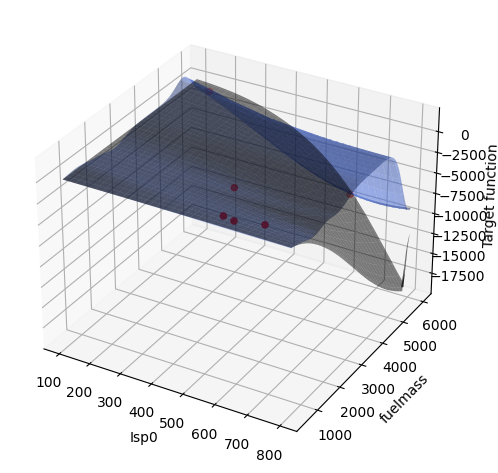

In [19]:
if run_grid_simulation:
    # 3D Plot
    add_bands = False
    
    # REVERSE
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # True surface
    surf = ax.plot_surface(m2_y_plot_mesh, m2_x_plot_mesh, (m2_Z).transpose(), 
                           alpha = .5, 
                           label='target function',
                           color='black'
                          )
    # Mean predicted
    surf = ax.plot_surface(m2_y_plot_mesh, m2_x_plot_mesh, (m2_mu_plot_pred1).transpose(), 
                           alpha = .5, 
                           label='model', # Mean
                           color='royalblue'
                          )
    # True points observed
    ax.scatter(m2_x[:,1], m2_x[:,0], m2_y, marker='o', color='red')

    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    ax.set_zlabel('Target function')
    plt.tight_layout()



 /var/folders/98/fv11ygzs4p51c21s8jln0jzc0000gn/T/ipykernel_12821/375354680.py:16: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
 /var/folders/98/fv11ygzs4p51c21s8jln0jzc0000gn/T/ipykernel_12821/375354680.py:25: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
 /var/folders/98/fv11ygzs4p51c21s8jln0jzc0000gn/T/ipykernel_12821/375354680.py:41: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


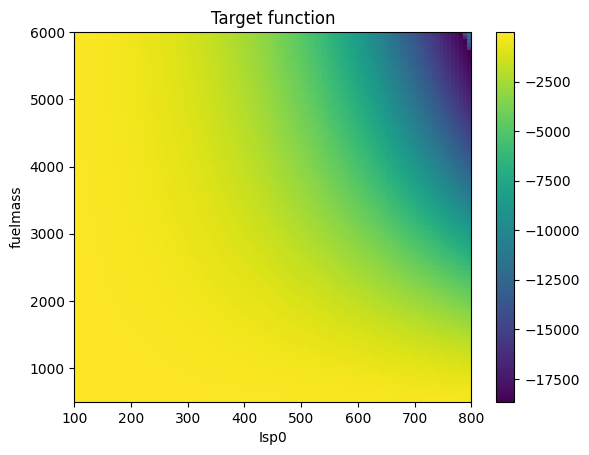

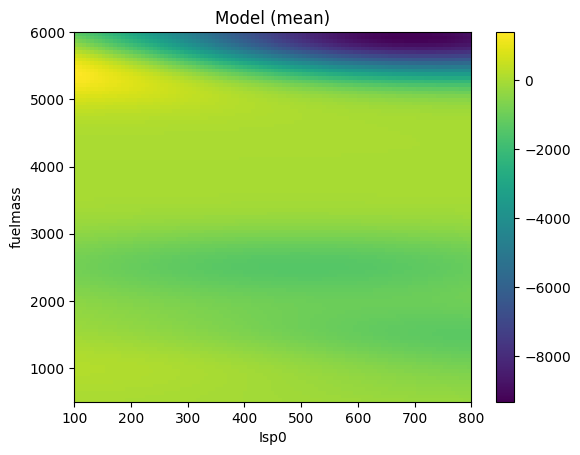

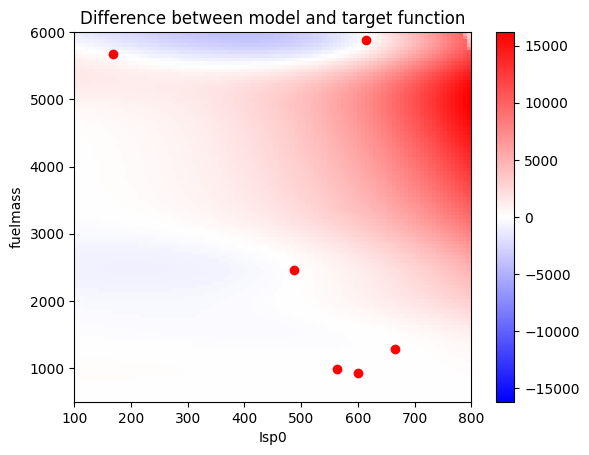

In [20]:
if run_grid_simulation:
    from matplotlib import colors
    divnorm=colors.TwoSlopeNorm(vcenter=0.) # vmin=-5., vcenter=0., vmax=10

    ## Heatmaps
    extents = [m2_space.parameters[1].min, m2_space.parameters[1].max, 
               m2_space.parameters[0].min, m2_space.parameters[0].max]

    # True values
    fig, ax = plt.subplots()
    im = ax.imshow(m2_Z, extent=extents, aspect='auto',  origin='lower')
    ax.set_title('Target function')
    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    fig.colorbar(im, ax=ax)
    fig.show()

    # Model
    fig, ax = plt.subplots()
    im = ax.imshow(m2_mu_plot_pred1, extent=extents, aspect='auto', origin='lower')
    ax.set_title('Model (mean)')
    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    fig.colorbar(im, ax=ax)
    fig.show()


    # Difference
    fig, ax = plt.subplots()
    vmin = (m2_mu_plot_pred1-m2_Z).min()
    vmax = (m2_mu_plot_pred1-m2_Z).max()
    vmin_max = max(abs(vmin), abs(vmax))
    divnorm=colors.TwoSlopeNorm(vcenter=0., vmin=-vmin_max, vmax=vmin_max) # vmin=-5., vcenter=0., vmax=10
    im = ax.imshow(m2_mu_plot_pred1-m2_Z, extent=extents, aspect='auto', cmap="bwr", norm=divnorm, origin='lower')
    ax.set_title('Difference between model and target function')
    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    # Add points where simulation evaluated
    ax.plot(m2_x[:,1], m2_x[:,0], 'ro')
    fig.colorbar(im, ax=ax)
    fig.show()



In [21]:
m2_x

array([[2461.69983073,  486.92597367],
       [ 920.14777038,  599.86268916],
       [5672.14884133,  167.5983593 ],
       [1289.47873523,  666.29049565],
       [5884.74931052,  614.81076196],
       [ 984.24246437,  562.9484052 ]])

### Use the model created for model-based experimental design
use the model to decide which are the best points to collect using some data collection criteria (acquisition function).

In [22]:
from emukit.experimental_design.experimental_design_loop import ExperimentalDesignLoop
from emukit.experimental_design.acquisitions import IntegratedVarianceReduction, ModelVariance


In [23]:
# help(ExperimentalDesignLoop)

In [24]:
m2_2_model_emukit = m2_model_emukit

In [25]:
wirte_output_txt = False

integrated_variance = IntegratedVarianceReduction(space=m2_space,
                                                  model=m2_2_model_emukit)
m2_ed = ExperimentalDesignLoop(space=m2_space, 
                            model=m2_2_model_emukit, 
                            acquisition = integrated_variance,
                            batch_size = 1) 

m2_ed.run_loop(user_function=neg_run_missile_sim, stopping_condition=10*2)




New simulation 

fuelmass: 4878.682066574241
Isp0: 461.4762727822375


Stage 1 burnout
Velocity (km/s):  4.60441860679277
Angle (deg h):  43.654584270916445
Range (km):  180.9857845303747
Time (sec):  245.29999999999035
Final results: 
Range (km):  3158.6045364931383
Apogee (km):  1024.5547134484984
Time to target (sec):  1305.599999999908



New simulation 

fuelmass: 4063.558783485642
Isp0: 453.93151760855153


Stage 1 burnout
Velocity (km/s):  4.148526147315459
Angle (deg h):  43.6658239525756
Range (km):  141.29851062716125
Time (sec):  200.99999999999287
Final results: 
Range (km):  2455.4076192902166
Apogee (km):  780.1861276418522
Time to target (sec):  1080.5000000001128



New simulation 

fuelmass: 3359.559699489315
Isp0: 454.40837486922806


Stage 1 burnout
Velocity (km/s):  3.7347111955387606
Angle (deg h):  43.65568417600361
Range (km):  110.61947219954926
Time (sec):  166.39999999999483
Final results: 
Range (km):  1921.834343633677
Apogee (km):  601.3264485166641
Time t

 /Users/ilariasartori/opt/anaconda3/envs/mlphysical/lib/python3.10/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1



New simulation 

fuelmass: 2896.2379759805713
Isp0: 331.12115826598097


Stage 1 burnout
Velocity (km/s):  2.302811097766833
Angle (deg h):  43.67993464313428
Range (km):  45.242701936516895
Time (sec):  104.49999999999834
Final results: 
Range (km):  683.8659833643062
Apogee (km):  212.4717865973708
Time to target (sec):  502.00000000004565



New simulation 

fuelmass: 4302.336283094621
Isp0: 109.29918212473977


Stage 1 burnout
Velocity (km/s):  0.8040715537876274
Angle (deg h):  43.64002781579093
Range (km):  7.515094916182927
Time (sec):  51.30000000000046
Final results: 
Range (km):  84.6779995910292
Apogee (km):  27.832012844593667
Time to target (sec):  184.4999999999938



New simulation 

fuelmass: 5477.659772906554
Isp0: 572.3713751105622


Stage 1 burnout
Velocity (km/s):  6.165465906582221
Angle (deg h):  43.652665713593436
Range (km):  322.98278611907114
Time (sec):  341.7000000000092
Final results: 
Range (km):  6665.66385236041
Apogee (km):  2454.426413741662
Time to t

 /Users/ilariasartori/opt/anaconda3/envs/mlphysical/lib/python3.10/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in divide
 /Users/ilariasartori/opt/anaconda3/envs/mlphysical/lib/python3.10/site-packages/GPy/kern/src/rbf.py:76: RuntimeWarning:invalid value encountered in multiply



New simulation 

fuelmass: 2260.443240465954
Isp0: 163.12095340257792


Stage 1 burnout
Velocity (km/s):  0.8696399980272381
Angle (deg h):  43.70693234408902
Range (km):  7.148694549839851
Time (sec):  40.2000000000003
Final results: 
Range (km):  96.08810747152313
Apogee (km):  30.95470331963349
Time to target (sec):  182.39999999999392



New simulation 

fuelmass: 4858.534711073726
Isp0: 690.8678746429392


Stage 1 burnout
Velocity (km/s):  7.282476943800215
Angle (deg h):  43.65652882926793
Range (km):  423.61641898494685
Time (sec):  365.8000000000147
Final results: 
Range (km):  10508.38724670863
Apogee (km):  4779.527743628276
Time to target (sec):  4161.699999997609



New simulation 

fuelmass: 5201.95186360266
Isp0: 182.18562042460977


Stage 1 burnout
Velocity (km/s):  1.543963902919711
Angle (deg h):  43.657267408173055
Range (km):  26.244727751061593
Time (sec):  103.2999999999984
Final results: 
Range (km):  311.52260811939465
Apogee (km):  99.66079834232968
Time to tar

In [26]:
m2_2_model_emukit.X.shape


(26, 2)

In [27]:
m2_2_model_emukit.__dict__

{'model': <GPy.models.gp_regression.GPRegression at 0x7fba29a8d2d0>,
 'n_restarts': 1}

In [28]:
m2_ed.__dict__

{'candidate_point_calculator': <emukit.core.loop.candidate_point_calculators.SequentialPointCalculator at 0x7fba588c0040>,
 'model_updaters': [<emukit.core.loop.model_updaters.FixedIntervalUpdater at 0x7fba48e45ea0>],
 'loop_state': <emukit.core.loop.loop_state.LoopState at 0x7fba48e45db0>,
 'loop_start_event': Event([]),
 'iteration_end_event': Event([]),
 'model': <emukit.model_wrappers.gpy_model_wrappers.GPyModelWrapper at 0x7fba29a8c3d0>}

In [29]:
if run_grid_simulation:
    # Compute new prediction
    m2_mu_plot_grid_pred2, var_plot_grid_pred2 = m2_2_model_emukit.predict(m2_x_plot)
    m2_mu_plot_pred2 = m2_mu_plot_grid_pred2.reshape(m2_x_plot_mesh.shape)
    m2_var_plot_pred2 = var_plot_grid_pred2.reshape(m2_x_plot_mesh.shape)
    
    m2_2_rmse = evaluate_prediction(y_actual=m2_y_plot, y_predicted=m2_mu_plot_grid_pred2)
    print("RMSE m2 (post experiment design loop): ", m2_2_rmse)




RMSE m2 (post experiment design loop):  295.0875402186592


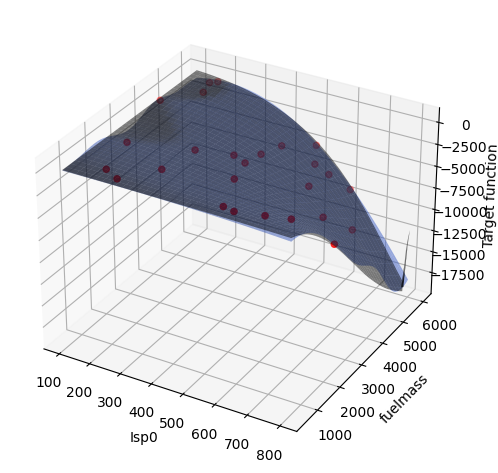

In [30]:
if run_grid_simulation:
    # 3D Plot
    add_bands = False

    
    # REVERSE
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # True surface
    surf = ax.plot_surface(m2_y_plot_mesh, m2_x_plot_mesh, (m2_Z).transpose(), 
                           alpha = .5, 
                           label='target function',
                           color='black'
                          )
    # Mean predicted
    surf = ax.plot_surface(m2_y_plot_mesh, m2_x_plot_mesh, (m2_mu_plot_pred2).transpose(), 
                           alpha = .5, 
                           label='model', # Mean
                           color='royalblue'
                          )
    # True points observed
    ax.scatter(np.array(m2_2_model_emukit.X)[:,1], 
               np.array(m2_2_model_emukit.X)[:,0], m2_2_model_emukit.Y, marker='o', color='red')

    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    ax.set_zlabel('Target function')
    plt.tight_layout()




 /var/folders/98/fv11ygzs4p51c21s8jln0jzc0000gn/T/ipykernel_12821/2861625379.py:15: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
 /var/folders/98/fv11ygzs4p51c21s8jln0jzc0000gn/T/ipykernel_12821/2861625379.py:24: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
 /var/folders/98/fv11ygzs4p51c21s8jln0jzc0000gn/T/ipykernel_12821/2861625379.py:40: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


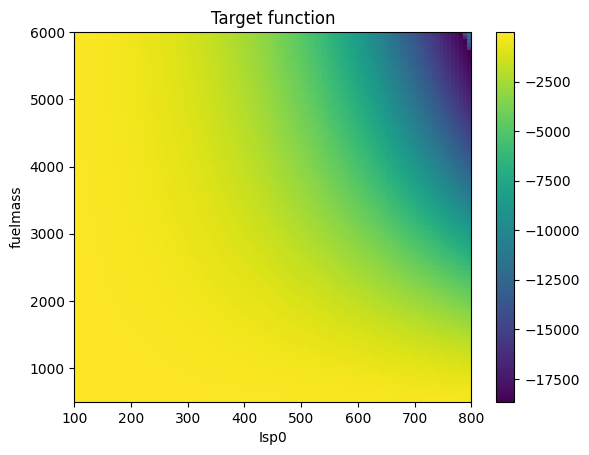

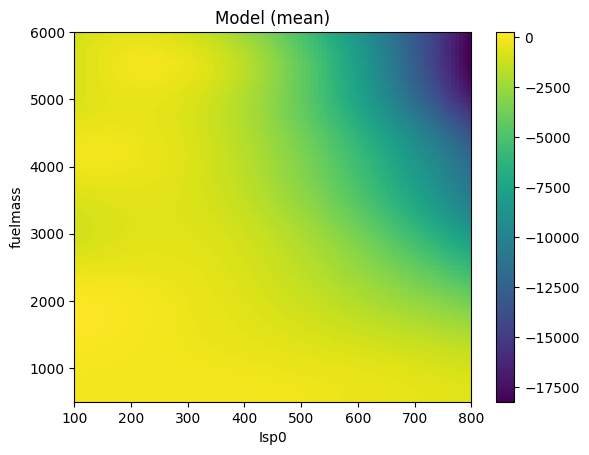

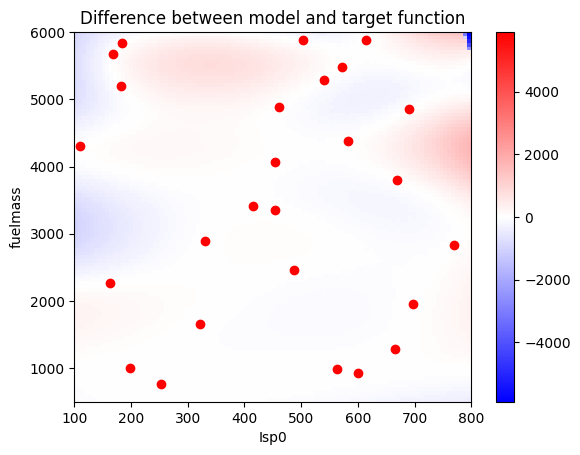

In [31]:
if run_grid_simulation:

    # REVERSE
    ## Heatmaps
    extents = [m2_space.parameters[1].min, m2_space.parameters[1].max, 
               m2_space.parameters[0].min, m2_space.parameters[0].max]

    # True values
    fig, ax = plt.subplots()
    im = ax.imshow(m2_Z, extent=extents, aspect='auto', origin='lower')
    ax.set_title('Target function')
    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    fig.colorbar(im, ax=ax)
    fig.show()

    # Model
    fig, ax = plt.subplots()
    im = ax.imshow(m2_mu_plot_pred2, extent=extents, aspect='auto', origin='lower')
    ax.set_title('Model (mean)')
    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    fig.colorbar(im, ax=ax)
    fig.show()


    # Difference
    fig, ax = plt.subplots()
    vmin = (m2_mu_plot_pred2-m2_Z).min()
    vmax = (m2_mu_plot_pred2-m2_Z).max()
    vmin_max = max(abs(vmin), abs(vmax))
    divnorm=colors.TwoSlopeNorm(vcenter=0., vmin=-vmin_max, vmax=vmin_max) # vmin=-5., vcenter=0., vmax=10
    im = ax.imshow(m2_mu_plot_pred2-m2_Z, extent=extents, aspect='auto', cmap="bwr", norm=divnorm, origin='lower')
    ax.set_title('Difference between model and target function')
    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    # Add points where simulation evaluated
    ax.plot(np.array(m2_2_model_emukit.X)[:,1], np.array(m2_2_model_emukit.X)[:,0], 'ro')
    fig.colorbar(im, ax=ax)
    fig.show()



## 2. Maximization


In [32]:
m2_model_gpy = GPRegression(m2_x,m2_y, kernel=m2_kern)
m2_model_gpy.kern.variance =  m2_var_kernel 
m2_model_gpy.likelihood.variance.fix(m2_var_noise)  

m2_model_emukit = GPyModelWrapper(m2_model_gpy)
m2_model_emukit.optimize()


 /Users/ilariasartori/opt/anaconda3/envs/mlphysical/lib/python3.10/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1


In [33]:
# Compute current prediction
m2_mu_plot_grid_pred1, var_plot_grid_pred1 = m2_model_emukit.predict(m2_x_plot)
m2_mu_plot_pred1 = m2_mu_plot_grid_pred1.reshape(m2_x_plot_mesh.shape)
m2_var_plot_pred1 = var_plot_grid_pred1.reshape(m2_x_plot_mesh.shape)

if run_grid_simulation:
    m2_rmse = evaluate_prediction(y_actual=m2_y_plot, y_predicted=m2_mu_plot_grid_pred1)
    print("RMSE m2 (before experiment design loop): ", m2_rmse)



RMSE m2 (before experiment design loop):  3903.716104090036


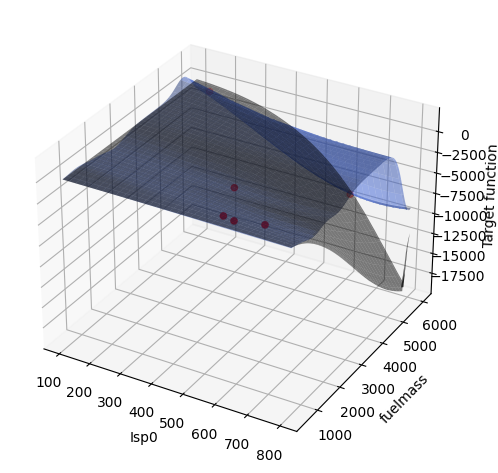

In [34]:
if run_grid_simulation:
    # 3D Plot
    add_bands = False
    
    # REVERSE
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # True surface
    surf = ax.plot_surface(m2_y_plot_mesh, m2_x_plot_mesh, (m2_Z).transpose(), 
                           alpha = .5, 
                           label='target function',
                           color='black'
                          )
    # Mean predicted
    surf = ax.plot_surface(m2_y_plot_mesh, m2_x_plot_mesh, (m2_mu_plot_pred1).transpose(), 
                           alpha = .5, 
                           label='model', # Mean
                           color='royalblue'
                          )
    # True points observed
    ax.scatter(m2_x[:,1], m2_x[:,0], m2_y, marker='o', color='red')

    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    ax.set_zlabel('Target function')
    plt.tight_layout()


 /var/folders/98/fv11ygzs4p51c21s8jln0jzc0000gn/T/ipykernel_12821/2119566484.py:17: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
 /var/folders/98/fv11ygzs4p51c21s8jln0jzc0000gn/T/ipykernel_12821/2119566484.py:26: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
 /var/folders/98/fv11ygzs4p51c21s8jln0jzc0000gn/T/ipykernel_12821/2119566484.py:42: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


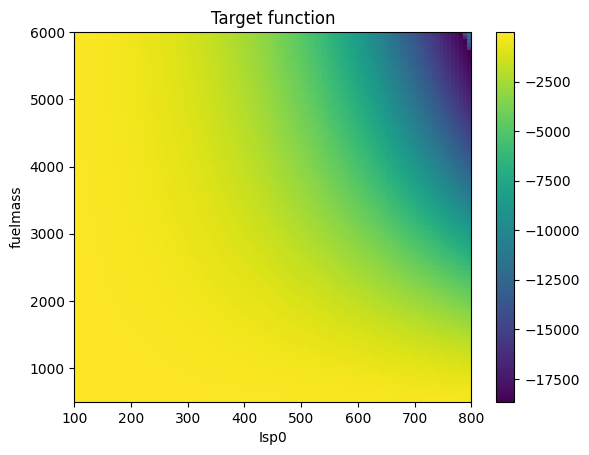

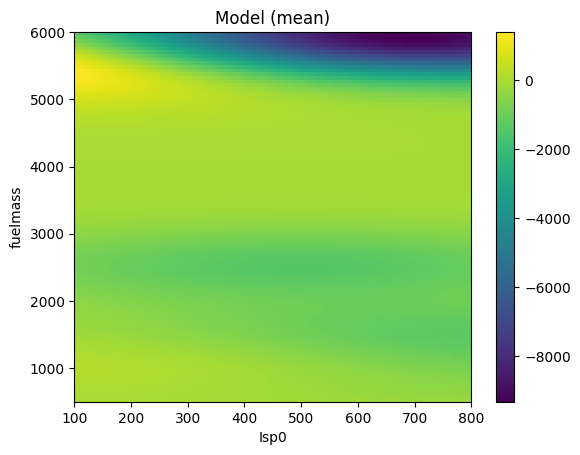

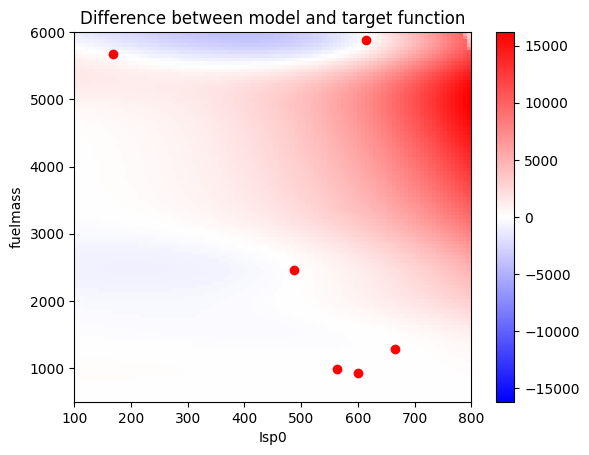

In [35]:
if run_grid_simulation:
    from matplotlib import colors
#     divnorm=colors.TwoSlopeNorm(vcenter=0.) # vmin=-5., vcenter=0., vmax=10

    # REVERSE
    ## Heatmaps
    extents = [m2_space.parameters[1].min, m2_space.parameters[1].max, 
               m2_space.parameters[0].min, m2_space.parameters[0].max]

    # True values
    fig, ax = plt.subplots()
    im = ax.imshow(m2_Z, extent=extents, aspect='auto', origin='lower')
    ax.set_title('Target function')
    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    fig.colorbar(im, ax=ax)
    fig.show()

    # Model
    fig, ax = plt.subplots()
    im = ax.imshow(m2_mu_plot_pred1, extent=extents, aspect='auto', origin='lower')
    ax.set_title('Model (mean)')
    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    fig.colorbar(im, ax=ax)
    fig.show()


    # Difference
    vmin = (m2_mu_plot_pred1-m2_Z).min()
    vmax = (m2_mu_plot_pred1-m2_Z).max()
    vmin_max = max(abs(vmin), abs(vmax))
    divnorm=colors.TwoSlopeNorm(vcenter=0., vmin=-vmin_max, vmax=vmin_max) # vmin=-5., vcenter=0., vmax=10
    fig, ax = plt.subplots()
    im = ax.imshow(m2_mu_plot_pred1-m2_Z, extent=extents, aspect='auto', cmap="bwr", norm=divnorm, origin='lower')
    ax.set_title('Difference between model and target function')
    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    # Add points where simulation evaluated
    ax.plot(m2_x[:,1], m2_x[:,0], 'ro')
    fig.colorbar(im, ax=ax)
    fig.show()



### Use the model created for model-based bayes optimization
use the model to decide which are the best points to collect using some data collection criteria (that we call acquisition).

In [36]:
m2_max_model_emukit = m2_model_emukit

In [37]:
# Bayesian optimization using emulator
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement
from emukit.bayesian_optimization.loops import BayesianOptimizationLoop

maxim_aquisition = ExpectedImprovement(model=m2_max_model_emukit)


bayesopt_loop = BayesianOptimizationLoop(model = m2_max_model_emukit,
                                         space = m2_space,
                                         acquisition = maxim_aquisition,
                                         batch_size = 1)

max_iterations = 5*2

bayesopt_loop.run_loop(neg_run_missile_sim, max_iterations) 



 /Users/ilariasartori/opt/anaconda3/envs/mlphysical/lib/python3.10/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1



New simulation 

fuelmass: 6000.0
Isp0: 794.360549356994


Stage 1 burnout
Velocity (km/s):  9.178508685748767
Angle (deg h):  43.65600014577831
Range (km):  686.5357746028335
Time (sec):  519.4000000000495
Simulation exceeded time limit.
Final results: 
Range (km):  13730.204805621252
Apogee (km):  24848.814173837214
Time to target (sec):  20000.099999989452



New simulation 

fuelmass: 5725.99797866685
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  9.118048401086302
Angle (deg h):  43.65626668225193
Range (km):  669.0264340484053
Time (sec):  499.200000000045
Final results: 
Range (km):  18662.00297949803
Apogee (km):  22913.42429568097
Time to target (sec):  19851.69999999161



New simulation 

fuelmass: 5491.501957409965
Isp0: 800.0


Stage 1 burnout
Velocity (km/s):  8.986868397237318
Angle (deg h):  43.66205072403367
Range (km):  643.8666194042343
Time (sec):  478.70000000004035
Final results: 
Range (km):  18068.70181252249
Apogee (km):  19560.869158892732
Time to target (se

In [38]:
results = bayesopt_loop.get_results()
results



In [39]:
m2_max_model_emukit.X.shape

(16, 2)

In [40]:
m2_max_model_emukit.__dict__

{'model': <GPy.models.gp_regression.GPRegression at 0x7fba308d0ca0>,
 'n_restarts': 1}

In [41]:
if run_grid_simulation:
    # Compute new prediction
    m2_mu_plot_grid_pred2, var_plot_grid_pred2 = m2_max_model_emukit.predict(m2_x_plot)
    m2_mu_plot_pred2 = m2_mu_plot_grid_pred2.reshape(m2_x_plot_mesh.shape)
    m2_var_plot_pred2 = var_plot_grid_pred2.reshape(m2_x_plot_mesh.shape)
    
    m2_max_rmse = evaluate_prediction(y_actual=m2_y_plot, y_predicted=m2_mu_plot_grid_pred2)
    print("RMSE m2 (post bayes opt loop): ", m2_max_rmse)




RMSE m2 (post bayes opt loop):  1896.673493025905


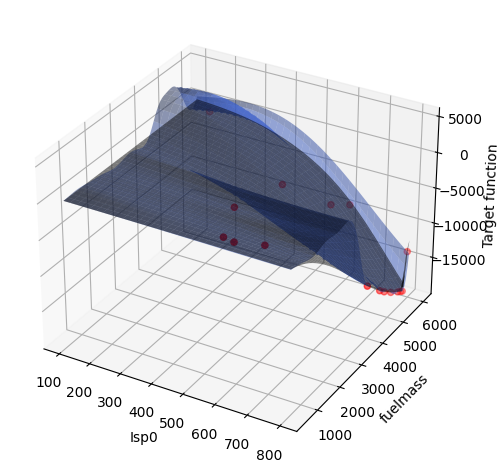

In [42]:
if run_grid_simulation:
    # 3D Plot
    add_bands = False

    
    # REVERSE
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    # True surface
    surf = ax.plot_surface(m2_y_plot_mesh, m2_x_plot_mesh, (m2_Z).transpose(), 
                           alpha = .5, 
                           label='target function',
                           color='black'
                          )
    # Mean predicted
    surf = ax.plot_surface(m2_y_plot_mesh, m2_x_plot_mesh, (m2_mu_plot_pred2).transpose(), 
                           alpha = .5, 
                           label='model', # Mean
                           color='royalblue'
                          )
    # True points observed
    ax.scatter(np.array(m2_max_model_emukit.X)[:,1], 
               np.array(m2_max_model_emukit.X)[:,0], m2_max_model_emukit.Y, marker='o', color='red')

    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    ax.set_zlabel('Target function')
    plt.tight_layout()



 /var/folders/98/fv11ygzs4p51c21s8jln0jzc0000gn/T/ipykernel_12821/2525306052.py:14: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
 /var/folders/98/fv11ygzs4p51c21s8jln0jzc0000gn/T/ipykernel_12821/2525306052.py:23: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
 /var/folders/98/fv11ygzs4p51c21s8jln0jzc0000gn/T/ipykernel_12821/2525306052.py:41: UserWarning:Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


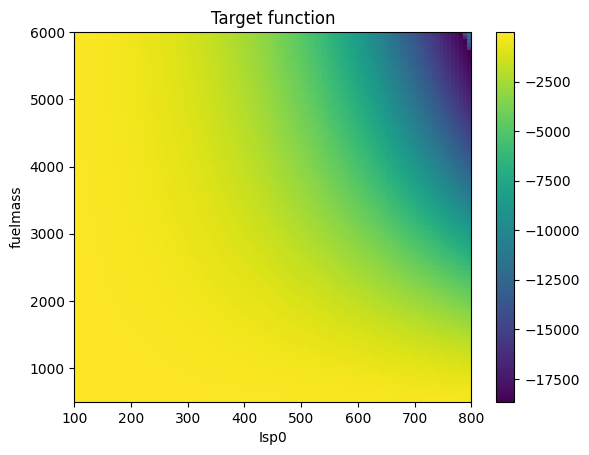

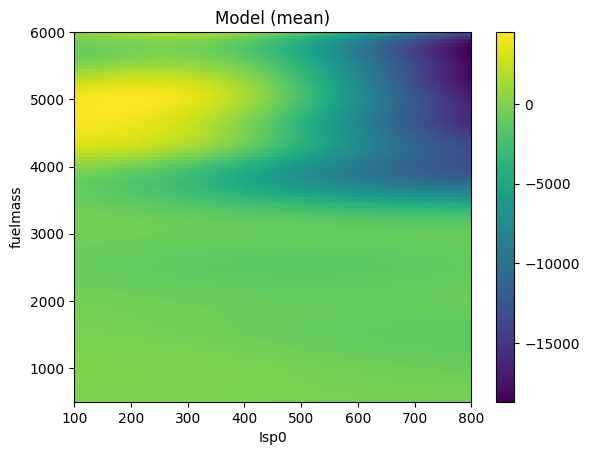

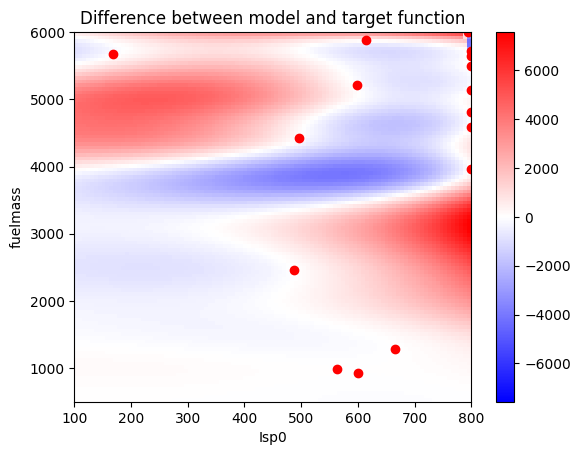

In [43]:
if run_grid_simulation:

    ## Heatmaps
    extents = [m2_space.parameters[1].min, m2_space.parameters[1].max, 
               m2_space.parameters[0].min, m2_space.parameters[0].max]

    # True values
    fig, ax = plt.subplots()
    im = ax.imshow(m2_Z, extent=extents, aspect='auto', origin='lower')
    ax.set_title('Target function')
    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    fig.colorbar(im, ax=ax)
    fig.show()

    # Model
    fig, ax = plt.subplots()
    im = ax.imshow(m2_mu_plot_pred2, extent=extents, aspect='auto', origin='lower')
    ax.set_title('Model (mean)')
    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    fig.colorbar(im, ax=ax)
    fig.show()


    # Difference
    fig, ax = plt.subplots()
    vmin = (m2_mu_plot_pred2-m2_Z).min()
    vmax = (m2_mu_plot_pred2-m2_Z).max()
    vmin_max = max(abs(vmin), abs(vmax))
    divnorm=colors.TwoSlopeNorm(vcenter=0., vmin=-vmin_max, vmax=vmin_max) # vmin=-5., vcenter=0., vmax=10
    im = ax.imshow(m2_mu_plot_pred2-m2_Z, extent=extents, aspect='auto', cmap="bwr", norm=divnorm, origin='lower')
    ax.set_title('Difference between model and target function')
    ax.set_xlabel(m2_param_2)
    ax.set_ylabel(m2_param_1)
    # Add points where simulation evaluated
#     ax.plot(m2_x[:,0], m2_x[:,1], 'ro')
#     ax.plot(m2_x[:,1], m2_x[:,0], 'ro')
    ax.plot(np.array(m2_max_model_emukit.X)[:,1], np.array(m2_max_model_emukit.X)[:,0], 'ro')
    fig.colorbar(im, ax=ax)
    fig.show()



In [44]:
## Greedy maximization using the simulator
# # opt 1
from collections import namedtuple
Min_val = namedtuple('Min_val', 'fun x')
min_idx = np.argmin(m2_y_plot)
true_minim = Min_val( m2_y_plot[min_idx], m2_x_plot[min_idx])

print("True min value: ", m2_y_plot[min_idx])
print("True min location: ", m2_x_plot[min_idx])

# # # opt2
# nr_custom_params = 2
# wirte_output_txt = False
# from scipy.optimize import minimize


# # func_to_minimize = lambda x: (x[0] - 1)**2 + (x[1] - 2.5)**2  
# def func_to_minimize(x):
#     print(x)
#     return neg_run_missile_sim(np.array(x).reshape(1,nr_custom_params))

# bnds = [(m2_domain_param_1),
#         (m2_domain_param_2),
# #         (m3_domain_param_3),
# #         (m3_domain_param_4),
# #         (m3_domain_param_5),
# #         (m3_domain_param_6)
#        ]


# initial_guess = [np.mean(m2_domain_param_1),
#                  np.mean(m2_domain_param_2),
# #                  np.mean(m3_domain_param_3),
# #                  np.mean(m3_domain_param_4),
# #                  np.mean(m3_domain_param_5),
# #                  np.mean(m3_domain_param_6)
#                 ]
# true_minim = minimize(func_to_minimize, initial_guess, bounds=bnds) # , method='SLSQP'constraints=cons



True min value:  [-18655.87990491]
True min location:  [5725.  800.]


In [45]:
min_val_from_sim = true_minim.fun
min_loc_from_sim = true_minim.x
min_val_from_emu = results.minimum_value
min_loc_from_emu = results.minimum_location

min_val_diff = min_val_from_sim - min_val_from_emu
min_loc_diff = min_loc_from_sim - min_loc_from_emu

print("Min val from sim - min val from em: \n", min_val_diff)
print('\n')
print("Min location from sim - min location from em: \n", min_loc_diff)
print('\n')
print('\n')
print("Min location from sim: \n", min_loc_from_sim)
print("Min location from emu: \n", min_loc_from_emu)
print('\n')
print('\n')
print("Min value from sim: \n", min_val_from_sim)
print("Min value from emu: \n", min_val_from_emu)

Min val from sim - min val from em: 
 [5.35667777]


Min location from sim - min location from em: 
 [-0.99797867  0.        ]




Min location from sim: 
 [5725.  800.]
Min location from emu: 
 [5725.99797867  800.        ]




Min value from sim: 
 [-18655.87990491]
Min value from emu: 
 -18661.23658268512
